## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import train_test
import friedman3Dataset
import network
import dataset
import matplotlib.pyplot as plt
import sanityChecks
import performanceMetrics
import torch 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error 
import scrapbook as sb
from statistics import mean
import numpy as np
from pytorch_tabnet.tab_model import TabNetClassifier
from pytorch_tabnet.tab_model import TabNetRegressor

## Dataset

In [3]:
#Dataset Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [4]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)

          X1           X2        X3        X4         Y
0  81.370014  1681.667058  0.268566  8.320149  1.314254
1   6.225111   289.943624  0.659367  4.045927  1.534518
2  21.097977   437.746443  0.431424  6.356640  1.233433
3  82.684084  1426.261307  0.317230  4.482779  1.499782
4  95.270320  1218.444481  0.262437  8.450428  1.317474


## Parameters 

In [5]:
n_epochs = 1000
batch_size = 32
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

## GAN Model

**Training GAN for n_epochs number of epochs** 

In [6]:
generator = network.GeneratorTabnet(n_features+1).to(device)
discriminator = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(generator.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(discriminator.parameters(), lr=0.001, betas=(0.5, 0.999))

In [7]:
discLossG1,genLossG1 = train_test.training_GAN(discriminator,generator,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,device)


tensor([[ 0.2222],
        [ 0.4989],
        [ 2.1748],
        [ 1.1188],
        [ 0.9878],
        [ 0.2951],
        [ 0.4109],
        [ 2.3796],
        [ 1.5115],
        [ 0.3395],
        [ 0.9363],
        [ 1.2021],
        [ 1.1896],
        [ 1.3828],
        [ 0.6821],
        [ 0.5022],
        [ 0.7997],
        [ 0.3853],
        [ 1.9227],
        [ 1.1373],
        [ 0.3062],
        [ 1.4134],
        [ 0.2856],
        [ 1.6395],
        [ 1.4314],
        [ 1.8351],
        [-0.2212],
        [ 1.6039],
        [ 4.2535],
        [ 0.2949],
        [ 0.6687],
        [-0.0531]], grad_fn=<MmBackward>)


tensor([[-0.2995],
        [-0.0297],
        [ 1.2280],
        [ 0.8572],
        [ 0.4916],
        [ 0.8242],
        [ 1.4980],
        [-0.1310],
        [ 2.9626],
        [ 1.0647],
        [ 0.6981],
        [ 0.4807],
        [ 1.5995],
        [ 1.7479],
        [ 0.6370],
        [ 1.6910],
        [ 1.1698],
        [ 0.2156],
        [ 0.1687],
        [ 1.4479],
        [ 1.5864],
        [ 1.7472],
        [ 0.4869],
        [ 1.4482],
        [ 1.0228],
        [ 2.0036],
        [ 0.3239],
        [ 1.6461],
        [ 0.8075],
        [-0.0236],
        [ 1.4917],
        [-0.1145]], grad_fn=<MmBackward>)
tensor([[ 1.2984],
        [ 1.7545],
        [ 0.7850],
        [ 1.8815],
        [ 1.4798],
        [ 0.1203],
        [ 0.2786],
        [ 0.9691],
        [ 0.1116],
        [ 0.3000],
        [ 0.0189],
        [ 0.4012],
        [ 0.8162],
        [ 0.3192],
        [ 1.2990],
        [ 2.4056],
        [ 0.7481],
        [ 1.6223],
        [ 1.2899],
        

tensor([[ 1.3323],
        [ 1.0420],
        [ 2.5123],
        [ 0.7818],
        [ 0.8386],
        [ 0.3971],
        [ 0.3398],
        [ 0.9535],
        [ 1.8293],
        [ 0.1005],
        [-0.1409],
        [ 1.3592],
        [ 0.9765],
        [ 1.0748],
        [-0.0028],
        [ 1.2024],
        [ 2.2351],
        [-0.2904],
        [ 1.1710],
        [ 1.2261],
        [ 0.5844],
        [ 2.4500],
        [ 1.7794],
        [ 0.3378],
        [ 0.1796],
        [ 0.1929],
        [ 1.2196],
        [ 1.4119],
        [ 0.4382],
        [ 0.5253],
        [ 0.2188],
        [ 1.0659]], grad_fn=<MmBackward>)
tensor([[ 2.8033e-01],
        [ 1.6437e+00],
        [ 1.0952e+00],
        [ 1.2605e+00],
        [ 1.8907e+00],
        [-5.0983e-02],
        [ 6.5112e-01],
        [ 1.5752e+00],
        [ 1.3552e+00],
        [ 4.8088e-01],
        [ 7.2836e-01],
        [ 9.2690e-01],
        [ 1.2959e+00],
        [ 8.5066e-01],
        [ 5.0795e-02],
        [ 6.5522e-01],
 

tensor([[0.2076],
        [3.5470],
        [1.0147],
        [0.8711],
        [1.4749],
        [0.8253],
        [0.4867],
        [1.8604],
        [1.5974],
        [1.2432],
        [2.2784],
        [0.8063],
        [0.0638],
        [1.0086],
        [0.3967],
        [3.4313],
        [0.9421],
        [0.1575],
        [0.4085],
        [1.1361],
        [0.1838],
        [0.7346],
        [0.5081],
        [1.1001],
        [1.5887],
        [1.4705],
        [0.5403],
        [1.0252],
        [0.1523],
        [0.3290],
        [0.3700],
        [0.5761]], grad_fn=<MmBackward>)
tensor([[-0.0908],
        [ 0.9284],
        [ 0.8568],
        [-0.0250],
        [ 1.7651],
        [ 1.6728],
        [ 0.8599],
        [ 5.0312],
        [ 1.5047],
        [ 2.7521],
        [ 0.7533],
        [ 0.9088],
        [-0.0088],
        [ 0.5205],
        [ 0.1953],
        [ 0.0187],
        [ 0.4739],
        [ 0.0722],
        [-0.1423],
        [ 1.5005],
        [ 0.2381],
  

tensor([[ 0.3682],
        [ 0.7271],
        [ 0.8290],
        [ 1.7435],
        [ 1.0715],
        [ 0.4898],
        [ 2.7344],
        [ 0.0895],
        [-0.0805],
        [ 0.0623],
        [ 0.8040],
        [ 1.0508],
        [-0.1028],
        [ 0.2323],
        [ 2.1121],
        [-0.1664],
        [ 2.8684],
        [ 0.3770],
        [-0.2121],
        [-0.3981],
        [ 0.1454],
        [ 1.2017],
        [ 0.7263],
        [ 0.0870],
        [ 0.5704],
        [ 1.2744],
        [ 2.6229],
        [ 0.5535],
        [ 0.0648],
        [ 0.9774],
        [ 0.8417],
        [ 0.8206]], grad_fn=<MmBackward>)
tensor([[-0.2908],
        [ 0.1928],
        [ 1.0855],
        [-0.1369],
        [ 0.6735],
        [ 1.2589],
        [ 0.1190],
        [ 6.1591],
        [ 1.1486],
        [ 0.5483],
        [ 1.5403],
        [ 0.0084],
        [ 1.1040],
        [ 1.1386],
        [ 0.5953],
        [-0.0793],
        [ 3.4526],
        [ 0.2969],
        [-0.3129],
        

tensor([[ 0.8562],
        [ 0.2793],
        [ 1.2094],
        [-0.2437],
        [ 1.7954],
        [ 1.2068],
        [ 0.1514],
        [ 5.8822],
        [ 1.0434],
        [ 1.0690],
        [ 1.2300],
        [ 2.4572],
        [ 1.0135],
        [ 0.6330],
        [ 0.6893],
        [-0.0707],
        [-0.3625],
        [-0.0494],
        [-0.0494],
        [ 0.9725],
        [ 2.4786],
        [ 1.0408],
        [-0.1898],
        [-0.4164],
        [ 1.4645],
        [ 0.2221],
        [ 0.3949],
        [-0.3352],
        [ 0.6230],
        [ 0.8163],
        [ 0.4991],
        [ 0.5531]], grad_fn=<MmBackward>)
tensor([[0.1855],
        [0.6847],
        [1.1368],
        [3.2346],
        [1.5007],
        [1.4341],
        [0.5541],
        [0.9223],
        [0.0762],
        [0.1166],
        [0.1165],
        [0.8299],
        [0.5041],
        [0.6688],
        [1.1422],
        [2.5139]], grad_fn=<MmBackward>)
tensor([[ 1.1363],
        [ 2.9786],
        [ 0.0340],
 

tensor([[-0.1665],
        [ 1.9781],
        [ 2.8519],
        [ 0.5462],
        [ 0.1694],
        [ 1.5576],
        [ 1.1347],
        [ 1.8954],
        [ 0.1736],
        [-0.1485],
        [ 1.3450],
        [-0.7682],
        [ 0.0429],
        [-0.1707],
        [ 1.7307],
        [ 0.1032],
        [ 0.4946],
        [ 0.6039],
        [-0.1938],
        [ 1.7793],
        [-0.0378],
        [ 1.1098],
        [ 1.5310],
        [ 0.1102],
        [ 0.5663],
        [ 0.4094],
        [-0.2956],
        [ 0.4071],
        [ 0.3772],
        [ 0.6228],
        [ 0.2899],
        [-0.0794]], grad_fn=<MmBackward>)
tensor([[ 0.2365],
        [ 1.9616],
        [ 3.4818],
        [ 0.8663],
        [ 0.4635],
        [ 0.1253],
        [ 2.1934],
        [ 0.4147],
        [-0.1040],
        [ 0.8746],
        [ 1.4138],
        [-0.0725],
        [ 0.0676],
        [ 0.0812],
        [ 0.1359],
        [ 0.2596],
        [ 0.6637],
        [ 0.2705],
        [-0.2840],
        

tensor([[ 0.4321],
        [ 1.2929],
        [ 0.0814],
        [ 0.4477],
        [-0.0917],
        [ 0.7177],
        [ 0.2528],
        [ 1.0979],
        [ 0.9233],
        [-0.7619],
        [ 0.1022],
        [ 0.1955],
        [ 0.9878],
        [ 1.1338],
        [ 0.1978],
        [ 2.2381]], grad_fn=<MmBackward>)
tensor([[ 0.4031],
        [ 1.0446],
        [-0.1175],
        [ 0.9365],
        [ 0.2815],
        [ 0.5950],
        [-0.0102],
        [ 0.6013],
        [ 0.3177],
        [-0.3886],
        [-0.3969],
        [ 0.1351],
        [ 0.1829],
        [ 0.1690],
        [ 0.6036],
        [ 1.4542]], grad_fn=<MmBackward>)
tensor([[ 0.7688],
        [ 0.7992],
        [-0.8854],
        [ 3.3709],
        [ 2.3588],
        [ 0.1413],
        [ 0.7093],
        [ 0.0977],
        [ 0.2562],
        [ 1.1403],
        [ 0.3356],
        [-0.2325],
        [ 1.8185],
        [ 0.1298],
        [ 0.2300],
        [ 1.0031],
        [-0.5260],
        [ 0.7652],
    

tensor([[-0.4150],
        [ 0.5635],
        [ 0.6595],
        [-0.2394],
        [ 0.1836],
        [-0.4173],
        [ 0.1596],
        [ 2.4636],
        [-0.3835],
        [ 2.4195],
        [-0.4061],
        [-0.5873],
        [ 0.7941],
        [ 0.1949],
        [-0.1019],
        [ 0.6380],
        [-0.5826],
        [ 0.4285],
        [-0.5174],
        [-0.7543],
        [ 0.3353],
        [ 0.2605],
        [ 0.9466],
        [ 1.4934],
        [ 1.1427],
        [ 0.5280],
        [-0.4012],
        [ 0.7606],
        [ 1.1496],
        [-0.3817],
        [ 0.6852],
        [-0.1585]], grad_fn=<MmBackward>)
tensor([[-0.1952],
        [-0.0026],
        [ 0.0299],
        [ 1.0368],
        [-0.2668],
        [ 0.7104],
        [-0.1105],
        [ 2.3041],
        [-0.4078],
        [ 0.8496],
        [ 0.4608],
        [-0.4535],
        [ 1.5251],
        [ 0.6494],
        [-0.6564],
        [ 0.1072]], grad_fn=<MmBackward>)


tensor([[-0.5182],
        [ 1.7955],
        [ 0.4335],
        [ 1.0859],
        [ 0.0768],
        [ 0.3236],
        [ 0.1561],
        [ 0.6506],
        [-0.3919],
        [ 0.9424],
        [ 0.3450],
        [ 0.0231],
        [ 1.7063],
        [ 0.1876],
        [-0.8291],
        [ 0.0273]], grad_fn=<MmBackward>)
tensor([[-1.2447],
        [-0.0354],
        [-0.5702],
        [-0.2508],
        [ 0.0940],
        [-0.3128],
        [-0.3399],
        [-0.4851],
        [ 0.1705],
        [ 1.4064],
        [ 2.7099],
        [ 0.1442],
        [ 0.3331],
        [ 0.4835],
        [-0.2457],
        [ 0.3764],
        [ 2.8836],
        [-0.1035],
        [-0.3298],
        [ 0.1760],
        [ 1.2192],
        [-0.0416],
        [ 0.3200],
        [ 1.8863],
        [ 0.6417],
        [-0.1651],
        [-1.0710],
        [ 1.3846],
        [ 0.4655],
        [-0.2706],
        [ 0.7057],
        [ 0.3613]], grad_fn=<MmBackward>)
tensor([[-0.6936],
        [ 0.4264],
    

tensor([[ 0.0922],
        [-0.4871],
        [-0.2963],
        [ 0.4835],
        [ 2.8385],
        [ 0.1159],
        [ 0.6905],
        [ 1.0683],
        [-0.3682],
        [-0.5474],
        [ 1.0587],
        [-0.1143],
        [ 0.7765],
        [-0.3194],
        [-0.3143],
        [ 0.1853],
        [-0.2791],
        [ 0.0384],
        [ 1.0550],
        [-0.3484],
        [-0.7758],
        [-0.6439],
        [-0.4016],
        [-1.1314],
        [ 0.0906],
        [ 1.1530],
        [ 1.8877],
        [ 0.8693],
        [-0.6268],
        [ 0.0128],
        [-0.1458],
        [ 0.5844]], grad_fn=<MmBackward>)
tensor([[-0.4526],
        [-0.6996],
        [ 0.7064],
        [ 1.4319],
        [ 0.0557],
        [-0.7817],
        [ 0.9547],
        [-0.0980],
        [ 0.6572],
        [ 1.5299],
        [-0.4366],
        [ 0.7051],
        [-0.0738],
        [ 0.1266],
        [ 0.9787],
        [-0.9860]], grad_fn=<MmBackward>)


tensor([[-7.3356e-02],
        [-6.2930e-01],
        [ 1.4413e-01],
        [ 1.3794e+00],
        [ 2.7332e-01],
        [-1.7517e+00],
        [ 1.5377e+00],
        [-2.2819e-01],
        [ 5.5291e-01],
        [ 7.7066e-01],
        [ 3.2521e-01],
        [ 6.1941e-01],
        [ 1.5502e-03],
        [ 1.2227e-01],
        [ 8.4109e-02],
        [-3.3940e-01]], grad_fn=<MmBackward>)
tensor([[-1.7759e-01],
        [-1.6680e-01],
        [-6.1157e-01],
        [ 1.8136e-01],
        [ 2.8011e-01],
        [-1.9185e-01],
        [-6.5478e-01],
        [-9.8528e-03],
        [-8.9875e-01],
        [ 2.3813e+00],
        [-4.5088e-01],
        [-3.0314e-01],
        [-1.2743e-01],
        [-3.4519e-01],
        [-4.0810e-01],
        [-3.6705e-01],
        [-3.8342e-02],
        [-8.4714e-02],
        [ 1.5221e+00],
        [ 9.7261e-01],
        [ 4.5652e-01],
        [ 5.6045e-01],
        [ 3.1870e-04],
        [ 1.1562e-01],
        [ 4.6193e-01],
        [-1.4403e-02],
        [-3

tensor([[ 0.6462],
        [-1.1363],
        [-1.0573],
        [-0.4438],
        [-0.0017],
        [-0.8831],
        [-0.2775],
        [-0.1744],
        [-0.1216],
        [ 0.8626],
        [ 0.3908],
        [-0.0894],
        [-0.2632],
        [-0.3197],
        [ 0.5285],
        [ 0.3810]], grad_fn=<MmBackward>)
tensor([[ 0.0401],
        [-0.5007],
        [ 0.1344],
        [-0.3533],
        [-0.0562],
        [-1.0529],
        [-0.0032],
        [ 1.1617],
        [ 0.4257],
        [-0.8563],
        [-0.1017],
        [-0.0494],
        [-0.5164],
        [ 0.1121],
        [ 0.3193],
        [ 0.1009]], grad_fn=<MmBackward>)


tensor([[-0.5996],
        [ 0.1127],
        [-0.8014],
        [ 0.4609],
        [-0.1508],
        [-0.0184],
        [-0.1394],
        [ 1.8486],
        [ 0.3291],
        [-0.8963],
        [-1.2884],
        [-0.0964],
        [ 0.7523],
        [-0.9762],
        [ 0.2706],
        [ 1.6920],
        [-0.5595],
        [ 0.0087],
        [-0.1536],
        [ 0.7978],
        [-0.7752],
        [ 0.0765],
        [-0.0167],
        [ 0.0743],
        [-0.2418],
        [-1.6750],
        [-0.4809],
        [-0.0743],
        [ 0.4541],
        [ 0.6259],
        [-1.3287],
        [-0.9298]], grad_fn=<MmBackward>)
tensor([[-0.5929],
        [-0.0162],
        [-1.3841],
        [ 0.6157],
        [-0.1182],
        [ 0.3111],
        [-0.2296],
        [ 0.1808],
        [ 0.0327],
        [-0.1695],
        [-0.4140],
        [ 0.1112],
        [ 0.6800],
        [-1.5974],
        [ 0.1307],
        [-0.2120],
        [-0.3669],
        [ 0.1117],
        [-0.0575],
        

tensor([[-0.3617],
        [-0.4228],
        [-0.4743],
        [-0.6862],
        [-0.8570],
        [ 0.5972],
        [ 1.5635],
        [-0.2406],
        [ 0.4241],
        [ 0.2128],
        [-0.4118],
        [ 0.3769],
        [ 0.7729],
        [-0.9193],
        [-0.8018],
        [-0.4171]], grad_fn=<MmBackward>)
tensor([[-0.0169],
        [-0.9684],
        [-1.4106],
        [-1.1516],
        [ 0.1289],
        [-1.1761],
        [-1.1415],
        [-0.1661],
        [-0.1481],
        [-0.1841],
        [-1.0891],
        [ 0.6182],
        [ 0.7909],
        [ 0.6919],
        [-0.2104],
        [ 0.4329],
        [-0.7299],
        [-0.7105],
        [-0.2633],
        [-0.3810],
        [ 0.9668],
        [ 0.3965],
        [ 0.3604],
        [-0.3760],
        [-1.2586],
        [-0.2613],
        [-0.0902],
        [-0.8937],
        [-0.7121],
        [ 3.2040],
        [ 0.1472],
        [ 0.3317]], grad_fn=<MmBackward>)


tensor([[-0.1620],
        [-0.6066],
        [ 0.8757],
        [-1.0041],
        [ 0.1095],
        [-0.8360],
        [-2.3341],
        [-0.0867],
        [ 0.3125],
        [-0.3527],
        [-0.9783],
        [-0.4276],
        [ 1.0616],
        [ 0.1571],
        [ 0.4376],
        [ 0.4905],
        [-0.2243],
        [-0.6584],
        [-0.3234],
        [-0.3343],
        [ 0.9515],
        [ 0.3744],
        [-0.0786],
        [-0.3015],
        [-1.6521],
        [-0.5650],
        [-0.8080],
        [-0.7095],
        [-0.5680],
        [-0.5055],
        [-0.1261],
        [-0.0882]], grad_fn=<MmBackward>)
tensor([[ 0.4547],
        [-0.5676],
        [ 0.4246],
        [-0.0955],
        [-0.3967],
        [ 0.7182],
        [ 0.9148],
        [-0.4073],
        [ 0.5572],
        [-0.5260],
        [-0.2239],
        [-0.5547],
        [-0.9707],
        [ 0.6213],
        [-0.2562],
        [-0.3988],
        [ 0.7630],
        [ 0.1078],
        [-0.0842],
        

tensor([[-0.7741],
        [ 0.3927],
        [-0.4725],
        [-0.8538],
        [ 0.3787],
        [-0.7239],
        [ 0.0954],
        [ 0.5416],
        [-1.1373],
        [-0.8409],
        [-0.3193],
        [-0.7250],
        [ 0.8003],
        [-0.7552],
        [-0.6198],
        [-0.1459]], grad_fn=<MmBackward>)
tensor([[-1.3966],
        [-1.2844],
        [-0.4830],
        [-0.3501],
        [-0.2097],
        [ 0.1506],
        [-0.0255],
        [-0.5572],
        [-1.4017],
        [-0.6146],
        [-0.1252],
        [-0.5752],
        [-0.2499],
        [-0.2206],
        [ 1.9724],
        [-0.4463],
        [-1.2825],
        [-0.3606],
        [ 0.1363],
        [-0.8433],
        [ 0.0866],
        [ 0.1472],
        [-0.1919],
        [ 1.6657],
        [-0.2154],
        [ 0.7102],
        [-0.6053],
        [ 0.1271],
        [-1.7923],
        [-1.5081],
        [-0.5765],
        [-0.9116]], grad_fn=<MmBackward>)


tensor([[-1.7249],
        [-0.6653],
        [-0.7543],
        [ 0.4074],
        [-0.7365],
        [ 0.4020],
        [ 0.4511],
        [-0.5132],
        [-1.8615],
        [-0.6153],
        [-0.5428],
        [-0.8897],
        [-0.4487],
        [-0.2015],
        [-1.0693],
        [-0.6094],
        [ 0.5521],
        [-0.5334],
        [ 0.2897],
        [-0.5286],
        [ 0.1812],
        [-0.4685],
        [ 0.0554],
        [ 0.8345],
        [-0.0987],
        [-0.1255],
        [ 0.8849],
        [ 0.1537],
        [-1.7708],
        [ 0.9167],
        [-0.3542],
        [-1.1880]], grad_fn=<MmBackward>)
tensor([[-0.7082],
        [-0.1492],
        [-0.4373],
        [-0.1425],
        [-0.9779],
        [-0.6602],
        [-1.4149],
        [-1.3432],
        [-0.5346],
        [-0.4730],
        [-0.7548],
        [ 0.3269],
        [-0.2545],
        [-0.4916],
        [ 0.2732],
        [-0.1372],
        [-0.5711],
        [ 0.4440],
        [ 1.3072],
        

tensor([[-0.9614],
        [-0.4614],
        [-0.5894],
        [-0.2385],
        [-0.6372],
        [-0.4316],
        [-0.8207],
        [-0.1248],
        [-1.4326],
        [-1.0933],
        [ 0.4556],
        [-0.0881],
        [ 0.0777],
        [-0.2575],
        [-0.5243],
        [-0.0146],
        [ 0.0222],
        [-1.0896],
        [ 0.5087],
        [-0.0207],
        [-0.2355],
        [-0.9864],
        [-3.1094],
        [-0.2065],
        [ 0.5564],
        [-0.8545],
        [-0.0855],
        [-1.5938],
        [ 0.1498],
        [ 1.1866],
        [ 0.7339],
        [-0.8699]], grad_fn=<MmBackward>)
tensor([[-1.1148e+00],
        [-5.7943e-01],
        [-5.4413e-01],
        [-3.3366e-01],
        [-1.0402e+00],
        [-5.6900e-01],
        [-9.6393e-01],
        [-8.3600e-01],
        [-4.3502e-01],
        [ 1.3916e-01],
        [ 4.8654e-01],
        [-6.6427e-01],
        [-7.4708e-01],
        [-1.9159e-03],
        [-7.7606e-01],
        [ 1.3186e-01],
 

tensor([[ 2.9287e-01],
        [ 1.8378e-01],
        [-2.2517e-01],
        [-1.5989e+00],
        [-1.1332e-01],
        [-7.9538e-01],
        [-1.3773e+00],
        [ 1.8561e-01],
        [ 6.2717e-01],
        [-8.6222e-01],
        [-8.0591e-02],
        [-2.1392e-02],
        [-6.5471e-01],
        [-1.1739e+00],
        [-1.6083e+00],
        [-6.9096e-01],
        [ 7.7048e-01],
        [ 1.7121e-03],
        [-4.5510e-01],
        [-3.8155e-01],
        [-1.9834e+00],
        [-1.3246e+00],
        [ 2.9236e+00],
        [-1.9788e+00],
        [-1.9998e-01],
        [-1.0471e+00],
        [ 5.4167e-01],
        [-2.2340e-01],
        [-1.1226e+00],
        [-9.7978e-01],
        [ 1.5803e-01],
        [ 1.1002e-01]], grad_fn=<MmBackward>)
tensor([[ 0.4830],
        [ 0.0168],
        [-0.2416],
        [-1.4834],
        [ 0.8923],
        [-0.8546],
        [-1.8964],
        [-0.0247],
        [ 0.2707],
        [ 0.1865],
        [-0.0315],
        [-0.0103],
        [-1.1

tensor([[-0.9060],
        [-0.4319],
        [ 0.2293],
        [ 0.1309],
        [-1.0760],
        [-2.3837],
        [-0.2208],
        [-0.8140],
        [-0.5212],
        [-1.1008],
        [-0.9679],
        [-1.1103],
        [-0.5130],
        [-0.5612],
        [ 0.9314],
        [-1.3405],
        [-0.4449],
        [-1.0143],
        [ 0.0140],
        [-0.8416],
        [ 0.0337],
        [-0.3876],
        [-1.4817],
        [-0.1013],
        [ 0.3347],
        [-0.4025],
        [-0.3294],
        [-0.5239],
        [-0.7617],
        [-0.7142],
        [-0.9498],
        [-0.4452]], grad_fn=<MmBackward>)
tensor([[-1.7730],
        [-1.0850],
        [-0.6369],
        [ 0.1250],
        [-1.0611],
        [-0.2445],
        [ 0.3718],
        [-0.8555],
        [-1.8055],
        [-1.8966],
        [ 0.0707],
        [ 0.0207],
        [-0.8791],
        [-0.2104],
        [-0.0563],
        [-0.0251],
        [-0.2903],
        [-0.1129],
        [-1.1461],
        

tensor([[-2.0025e+00],
        [ 3.3689e+00],
        [-6.5760e-01],
        [ 5.8278e-02],
        [-6.8562e-01],
        [-6.6622e-01],
        [-8.3318e-02],
        [-5.3917e-01],
        [-2.2854e+00],
        [-1.8964e+00],
        [-3.0393e-01],
        [ 2.2285e-01],
        [-2.1242e+00],
        [-4.5851e-01],
        [ 2.5011e-02],
        [-5.9090e-01],
        [ 6.9272e-01],
        [-4.5799e-01],
        [-2.7139e-01],
        [-1.3847e-01],
        [-3.0908e-01],
        [-1.8446e-01],
        [-5.6972e-01],
        [-3.6632e-03],
        [-2.3486e-03],
        [-1.2589e-01],
        [-7.5471e-02],
        [-6.8251e-01],
        [-1.3286e-01],
        [-1.3961e+00],
        [-1.5298e+00],
        [-1.3833e-01]], grad_fn=<MmBackward>)
tensor([[-0.2151],
        [ 2.8482],
        [ 0.0497],
        [-0.7116],
        [-0.7179],
        [-0.1426],
        [ 0.0335],
        [-1.2826],
        [-0.5963],
        [-0.5076],
        [ 0.5480],
        [-0.4722],
        [-1.0

tensor([[-0.4460],
        [-1.2493],
        [ 0.2176],
        [-1.2522],
        [-0.7758],
        [ 1.9730],
        [-0.7917],
        [-0.5137],
        [-0.1505],
        [-0.0752],
        [-0.3517],
        [-0.8506],
        [-0.7420],
        [-1.2666],
        [ 0.5520],
        [ 0.3554],
        [-0.0535],
        [ 0.0673],
        [ 0.2497],
        [-0.2559],
        [-1.1608],
        [-0.0835],
        [-0.1210],
        [-0.8024],
        [-0.0850],
        [-1.4635],
        [ 0.2755],
        [-0.5341],
        [-0.2838],
        [-1.4633],
        [-0.2018],
        [-0.8937]], grad_fn=<MmBackward>)
tensor([[-0.9780],
        [-1.4462],
        [-0.6607],
        [-0.8782],
        [-1.0022],
        [ 0.1775],
        [-0.4928],
        [-0.9200],
        [-1.3486],
        [-0.4259],
        [-0.5506],
        [-0.6724],
        [-0.7237],
        [-0.0147],
        [ 0.4183],
        [ 0.3390],
        [-0.5656],
        [-0.0458],
        [-0.4223],
        

tensor([[ 0.3434],
        [-0.7411],
        [-1.5087],
        [-1.2816],
        [ 0.5549],
        [-2.3177],
        [ 0.6557],
        [-0.9597],
        [ 1.8070],
        [ 0.3715],
        [ 1.4855],
        [-0.0384],
        [-0.5828],
        [-0.7754],
        [-1.4404],
        [ 0.0083]], grad_fn=<MmBackward>)
tensor([[ 2.0467],
        [-1.3917],
        [-0.8540],
        [-1.1084],
        [ 0.0280],
        [-0.1977],
        [ 0.2377],
        [-1.0477],
        [-0.1789],
        [-0.7550],
        [ 0.5225],
        [-0.5332],
        [-1.3163],
        [ 0.3258],
        [-0.6465],
        [ 0.9447]], grad_fn=<MmBackward>)
tensor([[-0.6458],
        [-0.9947],
        [-0.1251],
        [-0.6366],
        [-0.8396],
        [ 0.1912],
        [-0.0430],
        [-1.8066],
        [-0.6616],
        [ 0.1635],
        [-0.9940],
        [-0.8583],
        [-0.4186],
        [-0.1168],
        [ 0.3908],
        [ 0.3242],
        [ 0.0799],
        [-1.8669],
    

tensor([[-0.9028],
        [-0.9991],
        [-0.2200],
        [-0.9889],
        [-0.7692],
        [-2.2099],
        [ 0.2190],
        [-1.5099],
        [ 0.4647],
        [ 0.5722],
        [-0.4218],
        [-0.2835],
        [-0.9107],
        [ 0.1632],
        [-0.1641],
        [-0.5562],
        [ 0.4471],
        [-0.1263],
        [-0.8010],
        [-0.4027],
        [-1.2242],
        [-0.6896],
        [ 0.0358],
        [-0.2566],
        [-2.6301],
        [-0.1591],
        [ 0.9142],
        [ 0.2176],
        [-1.1339],
        [-0.8158],
        [ 0.4119],
        [-1.0579]], grad_fn=<MmBackward>)
tensor([[-0.1425],
        [-1.6058],
        [ 1.0965],
        [-0.1288],
        [-0.9478],
        [-0.4765],
        [-0.0436],
        [-0.5024],
        [ 0.7739],
        [ 0.0505],
        [-1.0616],
        [-0.7759],
        [-0.6075],
        [-0.8812],
        [-0.1677],
        [-0.8220]], grad_fn=<MmBackward>)


tensor([[-0.3095],
        [-1.8277],
        [ 0.7657],
        [-1.0361],
        [ 0.1259],
        [-0.1225],
        [-0.2385],
        [-0.4083],
        [-0.2764],
        [-0.3524],
        [-0.2217],
        [ 0.5058],
        [-1.1607],
        [-0.5749],
        [ 0.3390],
        [-0.3730]], grad_fn=<MmBackward>)
tensor([[ 0.4656],
        [-0.4998],
        [-0.2563],
        [-0.0703],
        [-1.1025],
        [-1.7985],
        [-0.1653],
        [-0.3410],
        [-0.5867],
        [-0.4842],
        [ 1.1360],
        [-0.1922],
        [-2.3813],
        [-0.4975],
        [-0.8464],
        [-0.1995],
        [-0.3635],
        [-0.4709],
        [ 0.1179],
        [ 0.0441],
        [-0.1734],
        [-0.6129],
        [-0.0968],
        [-0.8987],
        [-0.2731],
        [ 0.3558],
        [ 0.4721],
        [ 0.3226],
        [-0.3982],
        [ 0.1805],
        [-0.1642],
        [-0.6434]], grad_fn=<MmBackward>)
tensor([[-0.6631],
        [-0.2744],
    

tensor([[-0.6743],
        [-0.5296],
        [-0.8028],
        [-0.1827],
        [ 1.3625],
        [-0.4546],
        [-0.2251],
        [-0.7232],
        [ 0.3719],
        [ 0.2859],
        [-0.7360],
        [ 1.3346],
        [ 0.1957],
        [ 0.6029],
        [ 0.0067],
        [ 0.3501],
        [ 0.0370],
        [-1.7520],
        [-0.3055],
        [-0.7682],
        [ 0.4329],
        [-0.0575],
        [-0.0426],
        [-1.3217],
        [ 0.4986],
        [-0.6393],
        [-0.7348],
        [ 0.0659],
        [ 0.7670],
        [-1.0042],
        [ 0.1671],
        [-0.8720]], grad_fn=<MmBackward>)
tensor([[ 0.5897],
        [-1.2177],
        [ 2.1394],
        [ 0.0782],
        [-0.2786],
        [-0.4211],
        [-0.0352],
        [-0.5000],
        [-0.9565],
        [-0.3900],
        [-0.1673],
        [ 0.0970],
        [ 0.0088],
        [ 0.3837],
        [-1.3874],
        [-0.9630]], grad_fn=<MmBackward>)


tensor([[ 0.3437],
        [-1.2885],
        [ 2.6671],
        [-0.0091],
        [-2.0418],
        [-1.2823],
        [ 0.0039],
        [-0.2207],
        [-1.0312],
        [-0.1122],
        [ 0.1906],
        [ 0.1681],
        [ 0.0131],
        [ 1.7776],
        [-0.4444],
        [-0.3549]], grad_fn=<MmBackward>)
tensor([[-2.5150e-04],
        [-3.9123e-03],
        [-4.8525e-01],
        [-2.3403e+00],
        [-1.0796e+00],
        [ 3.3123e-01],
        [ 1.3624e-01],
        [-7.4631e-02],
        [ 4.8851e-01],
        [-4.1713e-01],
        [ 2.5231e-02],
        [ 3.1418e-01],
        [ 7.1141e-01],
        [ 3.6883e-01],
        [-5.0784e-01],
        [-7.5782e-01],
        [-5.0251e-01],
        [-1.5631e-01],
        [ 7.7535e-01],
        [-2.3401e-01],
        [-1.6361e+00],
        [-5.3387e-01],
        [-9.7767e-01],
        [ 1.1532e-01],
        [-1.1329e+00],
        [ 5.3347e-01],
        [-1.4097e+00],
        [-2.8250e-01],
        [-9.6624e-01],
      

tensor([[-0.5922],
        [-0.1269],
        [-0.4761],
        [-1.5155],
        [ 3.0521],
        [-0.4375],
        [ 0.3793],
        [ 0.8181],
        [-0.0259],
        [ 0.1438],
        [ 0.2191],
        [-0.2484],
        [-1.5293],
        [-0.7792],
        [ 0.2046],
        [-0.6287]], grad_fn=<MmBackward>)
tensor([[-0.9653],
        [ 0.3711],
        [-1.2959],
        [-0.7431],
        [ 0.2506],
        [-0.0335],
        [ 2.6002],
        [ 1.1239],
        [-0.0828],
        [-0.0654],
        [ 0.4199],
        [-0.4400],
        [-1.8149],
        [-0.4343],
        [ 0.4907],
        [-0.2646]], grad_fn=<MmBackward>)


tensor([[-1.3542],
        [-0.7877],
        [-1.1603],
        [ 0.3675],
        [-0.0758],
        [-0.3938],
        [-0.8263],
        [ 1.3204],
        [-0.0977],
        [-0.3145],
        [ 0.2450],
        [ 0.0083],
        [ 1.3936],
        [-0.5323],
        [ 0.8071],
        [ 0.0860],
        [-0.5974],
        [-1.8748],
        [ 0.6051],
        [ 1.1248],
        [ 0.1581],
        [ 1.5754],
        [-1.9707],
        [-0.3174],
        [ 0.1542],
        [-0.4924],
        [-0.1410],
        [-0.9447],
        [-0.3441],
        [-0.9136],
        [-0.5160],
        [ 0.1942]], grad_fn=<MmBackward>)
tensor([[-1.8195e+00],
        [-1.4622e+00],
        [-1.1376e+00],
        [ 2.6590e-01],
        [ 2.7939e-02],
        [-8.9820e-01],
        [-1.0367e+00],
        [ 1.5175e+00],
        [-4.6769e-01],
        [-6.1121e-01],
        [-2.0173e-03],
        [ 1.6135e-01],
        [ 2.3714e-01],
        [-5.9563e-01],
        [-3.1752e-01],
        [-2.8577e-02],
 

tensor([[ 0.0151],
        [-0.1228],
        [ 0.2936],
        [-0.4352],
        [-1.0376],
        [ 0.3892],
        [ 0.1889],
        [ 0.3118],
        [-0.4489],
        [ 0.5976],
        [ 1.6269],
        [-0.2720],
        [ 0.7522],
        [-0.8395],
        [-1.2253],
        [ 0.0044]], grad_fn=<MmBackward>)
tensor([[-0.2597],
        [ 0.1233],
        [-0.6746],
        [ 0.1287],
        [ 0.4130],
        [ 0.6216],
        [ 0.4185],
        [-0.5676],
        [-0.2694],
        [-0.0323],
        [ 1.3326],
        [ 0.1195],
        [ 0.1647],
        [-1.2936],
        [-0.6323],
        [ 0.4530],
        [-0.9799],
        [ 0.6828],
        [ 1.1525],
        [ 0.4558],
        [-1.0143],
        [ 2.2207],
        [-1.0876],
        [-0.1230],
        [ 0.6505],
        [-1.3163],
        [-1.5253],
        [ 0.4056],
        [ 0.2582],
        [ 0.6165],
        [ 0.1667],
        [-0.7578]], grad_fn=<MmBackward>)


tensor([[-0.6777],
        [ 1.8084],
        [-0.2645],
        [-0.5151],
        [ 0.7159],
        [-0.1642],
        [ 0.5633],
        [ 0.1817],
        [-0.6073],
        [-0.0639],
        [ 1.3043],
        [-0.2818],
        [ 0.0703],
        [-1.3398],
        [-0.7208],
        [ 0.5254],
        [-0.5725],
        [ 2.7363],
        [ 0.1585],
        [-0.2242],
        [-0.8830],
        [-0.0057],
        [-0.5153],
        [-0.1238],
        [-0.5031],
        [-1.2096],
        [-1.2424],
        [ 0.5870],
        [ 0.5656],
        [ 0.2044],
        [ 0.0411],
        [-0.7535]], grad_fn=<MmBackward>)
tensor([[ 0.6195],
        [ 2.8800],
        [-0.0738],
        [-0.3265],
        [-0.1671],
        [ 0.0799],
        [ 0.0498],
        [ 0.1643],
        [ 1.0312],
        [-1.3926],
        [ 0.1427],
        [-0.7490],
        [-0.0306],
        [-1.1918],
        [-0.0961],
        [ 0.3788],
        [-0.1525],
        [-0.6398],
        [-0.1210],
        

tensor([[ 0.1281],
        [-0.1799],
        [ 1.5247],
        [-0.0467],
        [ 2.7625],
        [ 0.6780],
        [-0.2513],
        [ 1.3447],
        [ 0.3549],
        [ 0.2811],
        [-0.0925],
        [ 0.8306],
        [ 0.2943],
        [-1.3665],
        [ 0.6283],
        [-0.2761],
        [ 0.2388],
        [-0.1110],
        [-0.9980],
        [-0.6430],
        [ 0.0364],
        [ 3.1675],
        [ 0.2973],
        [ 0.3604],
        [ 3.1655],
        [-1.1801],
        [-0.8517],
        [-0.4853],
        [-0.1490],
        [-0.1322],
        [ 0.0580],
        [ 0.2455]], grad_fn=<MmBackward>)
tensor([[ 1.2450],
        [-0.2910],
        [ 0.2720],
        [ 0.0667],
        [ 0.9332],
        [ 1.1910],
        [-0.5442],
        [ 0.0858],
        [ 0.7075],
        [ 0.2266],
        [ 0.6124],
        [ 0.1734],
        [ 0.4594],
        [-0.6748],
        [-0.5742],
        [-0.8441],
        [ 0.2196],
        [ 0.7307],
        [-1.1252],
        

tensor([[ 0.1216],
        [-0.9202],
        [ 2.6152],
        [ 1.1660],
        [ 0.0792],
        [-0.0698],
        [-0.2050],
        [ 0.0975],
        [ 0.1870],
        [ 0.2043],
        [-0.8329],
        [ 0.4071],
        [-0.2456],
        [ 0.7469],
        [-0.8608],
        [ 0.5807],
        [ 1.4549],
        [ 1.8257],
        [-0.2776],
        [-0.3334],
        [ 2.5718],
        [-0.2469],
        [ 0.4988],
        [-0.1877],
        [-1.9294],
        [-0.1278],
        [-0.8218],
        [ 2.0549],
        [-0.4542],
        [-0.9121],
        [ 0.4902],
        [-0.0328]], grad_fn=<MmBackward>)
tensor([[ 0.1546],
        [-1.0108],
        [ 1.2489],
        [-0.2834],
        [-0.1187],
        [-0.4599],
        [-0.0286],
        [ 0.2096],
        [ 0.1460],
        [-0.1246],
        [-0.6100],
        [-0.0301],
        [-0.0249],
        [ 0.7343],
        [-0.9384],
        [ 0.7709],
        [ 0.2222],
        [-0.1646],
        [ 0.4408],
        

tensor([[-0.8452],
        [-0.1334],
        [-0.8557],
        [ 2.0998],
        [-0.0386],
        [ 0.1119],
        [ 0.1318],
        [ 0.5356],
        [ 0.2609],
        [-0.5240],
        [ 1.2020],
        [-0.3648],
        [ 0.3522],
        [-0.3715],
        [ 0.1630],
        [ 1.8388],
        [-1.1557],
        [ 2.2176],
        [-0.0642],
        [-0.6146],
        [-0.0052],
        [ 0.0608],
        [-0.1632],
        [ 1.3204],
        [-1.2270],
        [ 0.3130],
        [ 0.2963],
        [ 0.0781],
        [-0.1653],
        [ 0.0752],
        [ 0.2504],
        [-0.7455]], grad_fn=<MmBackward>)


tensor([[ 0.5155],
        [-0.6341],
        [ 0.1305],
        [ 0.7189],
        [ 1.3297],
        [ 0.1087],
        [-0.8182],
        [-0.5225],
        [ 0.9256],
        [-0.3481],
        [-0.6246],
        [-1.1079],
        [ 1.0681],
        [-0.3165],
        [-0.5998],
        [-0.1159],
        [-0.5851],
        [ 0.0995],
        [ 0.3730],
        [-0.3847],
        [ 0.7648],
        [ 2.6712],
        [-1.7849],
        [-0.5596],
        [ 1.2488],
        [ 0.1870],
        [ 0.5483],
        [ 0.2870],
        [-0.5013],
        [-0.6880],
        [ 1.5622],
        [ 0.0557]], grad_fn=<MmBackward>)
tensor([[ 0.9375],
        [-0.9573],
        [ 0.0312],
        [ 0.0213],
        [ 1.3379],
        [-0.0735],
        [-0.6025],
        [-0.1105],
        [-0.0206],
        [-0.2058],
        [-0.7378],
        [-0.3742],
        [ 0.2742],
        [ 0.5777],
        [-0.3428],
        [-0.0729],
        [ 0.4597],
        [ 0.1330],
        [-0.5432],
        

tensor([[-0.8364],
        [ 1.3166],
        [-0.7259],
        [-0.8680],
        [ 1.1052],
        [ 1.1757],
        [-0.6894],
        [ 0.2370],
        [-0.3041],
        [-0.8262],
        [ 1.8625],
        [-0.7375],
        [-0.0427],
        [ 0.0755],
        [ 1.3378],
        [ 2.5420]], grad_fn=<MmBackward>)


tensor([[ 0.0752],
        [-0.8305],
        [ 1.8158],
        [ 0.1493],
        [-0.0800],
        [ 0.0335],
        [-0.5765],
        [-0.5511],
        [ 0.1889],
        [ 0.2610],
        [ 0.6406],
        [ 1.7864],
        [ 0.0114],
        [ 0.0921],
        [-0.4456],
        [ 0.3016],
        [ 1.2280],
        [-0.2614],
        [-0.5370],
        [ 0.0209],
        [ 0.1498],
        [-0.9623],
        [ 0.2367],
        [-1.1156],
        [-0.0386],
        [ 1.4237],
        [-0.7419],
        [ 0.6727],
        [ 0.5483],
        [ 0.4731],
        [-0.5054],
        [-0.3803]], grad_fn=<MmBackward>)
tensor([[ 0.0870],
        [-0.7090],
        [ 2.0227],
        [ 0.1696],
        [-0.1947],
        [-0.0925],
        [-0.7458],
        [-0.8421],
        [ 0.2458],
        [ 0.1171],
        [ 1.2917],
        [ 0.6549],
        [-0.0485],
        [ 0.5356],
        [-0.4146],
        [ 0.5542],
        [ 2.5699],
        [-0.0839],
        [-0.1158],
        

tensor([[-0.3041],
        [ 0.2054],
        [-1.3372],
        [ 1.7145],
        [-0.1281],
        [ 0.3331],
        [-0.1011],
        [-0.2008],
        [-0.2688],
        [-0.3689],
        [ 1.0446],
        [-0.6983],
        [ 0.3792],
        [ 0.8755],
        [ 0.0145],
        [ 0.0573]], grad_fn=<MmBackward>)


tensor([[ 0.0822],
        [ 2.2656],
        [ 0.8179],
        [-0.2029],
        [-0.2568],
        [ 0.7032],
        [-0.2037],
        [-0.4543],
        [ 0.5409],
        [ 0.5578],
        [-1.2330],
        [ 0.5458],
        [ 0.3106],
        [-0.6012],
        [-1.1599],
        [ 0.3412],
        [-1.1663],
        [ 0.0077],
        [-0.9115],
        [ 0.3121],
        [-0.7405],
        [-0.8770],
        [ 0.4489],
        [ 0.5063],
        [ 0.7195],
        [ 0.6740],
        [-0.6970],
        [-0.4449],
        [ 0.1902],
        [-0.1458],
        [ 0.3578],
        [ 2.7635]], grad_fn=<MmBackward>)
tensor([[-0.0366],
        [ 1.1335],
        [ 0.7925],
        [-0.2514],
        [-0.2362],
        [ 0.2865],
        [-0.2013],
        [ 0.1543],
        [-0.1268],
        [ 0.1492],
        [-1.3552],
        [ 1.2457],
        [ 0.0513],
        [-0.2237],
        [-0.3474],
        [-0.2001],
        [-1.1011],
        [-0.7837],
        [-1.1896],
        

tensor([[-2.9447e-01],
        [ 2.5385e-02],
        [ 1.1224e+00],
        [ 1.3319e+00],
        [ 4.7120e-01],
        [-5.0093e-01],
        [-3.5415e-03],
        [ 2.3832e-01],
        [-2.6312e-01],
        [ 9.5956e-01],
        [ 7.7860e-02],
        [-2.9941e-02],
        [-1.0579e+00],
        [-4.8819e-01],
        [ 1.2071e-01],
        [-2.2550e-02],
        [-2.4898e-01],
        [-8.2561e-02],
        [ 1.1911e+00],
        [ 5.3492e-01],
        [-5.1016e-02],
        [-6.6237e-01],
        [-3.0672e-01],
        [-1.4283e-01],
        [-7.1007e-01],
        [-7.0039e-01],
        [ 4.1648e+00],
        [-1.9318e+00],
        [-1.0613e+00],
        [-4.6988e-03],
        [ 3.5496e-01],
        [ 7.3675e-01]], grad_fn=<MmBackward>)


tensor([[ 0.5861],
        [-0.3331],
        [ 0.5346],
        [ 1.4932],
        [-0.9639],
        [-0.5968],
        [-0.5293],
        [-0.2231],
        [ 0.9143],
        [ 1.2873],
        [-0.1561],
        [-0.0764],
        [-1.0231],
        [-0.6241],
        [ 0.2558],
        [ 0.4830],
        [-0.5985],
        [ 0.0183],
        [ 0.0075],
        [-0.1852],
        [-0.1827],
        [-1.4126],
        [ 0.0061],
        [ 0.0915],
        [-1.0761],
        [-0.2218],
        [ 4.1066],
        [-1.8021],
        [-0.6320],
        [-0.8091],
        [ 0.3551],
        [ 0.2647]], grad_fn=<MmBackward>)
tensor([[-0.2871],
        [ 0.0574],
        [-0.7265],
        [-0.4058],
        [ 1.3917],
        [-0.0940],
        [-0.9558],
        [-0.3539],
        [-0.6519],
        [-0.7753],
        [-1.2283],
        [-1.4304],
        [-1.2223],
        [ 0.3800],
        [ 0.0390],
        [-0.3748],
        [-0.1340],
        [-1.1755],
        [-0.1141],
        

tensor([[-0.2194],
        [ 0.1608],
        [-0.0930],
        [-0.6019],
        [ 0.9745],
        [ 0.7850],
        [ 0.5840],
        [-1.7287],
        [-0.4976],
        [ 0.1273],
        [ 0.2268],
        [-0.8050],
        [-0.5778],
        [ 0.6599],
        [-0.1856],
        [ 0.5201],
        [ 3.3025],
        [-1.1595],
        [-0.0440],
        [ 0.6341],
        [-0.2433],
        [-0.7305],
        [ 1.3454],
        [-1.2645],
        [-0.0104],
        [ 1.7646],
        [ 0.1318],
        [ 0.6642],
        [-0.8538],
        [-0.5065],
        [-0.8300],
        [-0.4172]], grad_fn=<MmBackward>)


tensor([[ 1.3055],
        [ 0.6843],
        [-1.4548],
        [-0.2258],
        [ 0.1273],
        [ 0.2605],
        [-0.1290],
        [ 0.0524],
        [ 0.4178],
        [ 1.6606],
        [ 0.4080],
        [-0.5712],
        [ 2.3711],
        [-0.0887],
        [ 0.4157],
        [-1.5581],
        [-1.3265],
        [-0.9137],
        [ 2.0386],
        [ 0.0891],
        [-1.3373],
        [-1.0902],
        [-1.3155],
        [ 1.2088],
        [-0.0465],
        [-0.4972],
        [-1.1840],
        [-1.2659],
        [ 0.2908],
        [-0.2093],
        [ 0.2058],
        [-0.0403]], grad_fn=<MmBackward>)
tensor([[ 0.0843],
        [ 2.9707],
        [-1.6313],
        [-0.2892],
        [-0.1931],
        [ 0.2960],
        [-1.3553],
        [-0.7310],
        [ 0.1982],
        [ 0.6728],
        [-0.2888],
        [-0.5408],
        [ 0.9379],
        [-0.2172],
        [ 0.1742],
        [-0.3656],
        [-0.4402],
        [-0.6992],
        [ 2.1256],
        

tensor([[-0.8218],
        [-0.5075],
        [-0.2056],
        [-0.7721],
        [ 0.7335],
        [-0.5900],
        [ 0.4189],
        [-1.2267],
        [-0.9051],
        [ 0.3234],
        [ 0.3197],
        [ 2.1950],
        [ 0.1790],
        [ 0.4195],
        [-0.1237],
        [-2.1120],
        [ 2.1369],
        [-0.5733],
        [ 1.1869],
        [-0.3176],
        [ 0.8536],
        [-0.7932],
        [ 0.2041],
        [-0.1537],
        [-0.7857],
        [-0.7628],
        [-0.1823],
        [ 0.2821],
        [-0.7676],
        [-0.4857],
        [ 0.5870],
        [ 1.4986]], grad_fn=<MmBackward>)


tensor([[-0.8819],
        [-0.6622],
        [ 0.9667],
        [-0.6685],
        [ 0.3808],
        [-0.1622],
        [ 0.7596],
        [-0.9677],
        [-0.6119],
        [ 0.0935],
        [-0.0310],
        [ 0.3893],
        [ 1.0555],
        [ 0.0189],
        [-0.9995],
        [-1.9700],
        [ 1.7840],
        [-0.2573],
        [ 1.4535],
        [ 0.1002],
        [ 0.7012],
        [-0.3981],
        [-0.2399],
        [-0.0920],
        [-0.6136],
        [ 0.2690],
        [-1.1051],
        [-0.5058],
        [-0.7203],
        [ 1.7438],
        [ 0.3235],
        [ 1.3652]], grad_fn=<MmBackward>)
tensor([[-0.0662],
        [ 0.0570],
        [-0.0144],
        [ 0.3721],
        [ 1.1440],
        [-0.7286],
        [ 1.4489],
        [-1.0127],
        [-0.2013],
        [-1.9568],
        [ 0.4001],
        [ 0.4081],
        [-0.4794],
        [ 0.0186],
        [-0.6386],
        [-0.4641]], grad_fn=<MmBackward>)
tensor([[ 0.8125],
        [-0.0115],
    

tensor([[ 0.0373],
        [-1.4201],
        [ 0.5809],
        [-0.5901],
        [-0.3235],
        [-0.4693],
        [ 4.5113],
        [ 1.4233],
        [-0.7733],
        [-1.0279],
        [-1.3274],
        [-0.3932],
        [-0.6551],
        [-0.0046],
        [ 0.2162],
        [ 0.8691],
        [-1.5328],
        [-0.8739],
        [ 0.0057],
        [ 0.0245],
        [ 0.0160],
        [-1.3227],
        [-0.2209],
        [-1.1626],
        [ 0.4803],
        [ 0.3091],
        [ 1.3227],
        [-0.0952],
        [-0.3688],
        [-0.1738],
        [-0.2097],
        [-0.2026]], grad_fn=<MmBackward>)


tensor([[-0.0412],
        [-0.8233],
        [-0.9176],
        [ 0.8234],
        [ 1.1341],
        [ 0.1678],
        [-0.6639],
        [-0.4293],
        [ 0.5919],
        [ 1.2646],
        [-1.5004],
        [ 0.3045],
        [ 0.2428],
        [ 0.6156],
        [ 0.2364],
        [-0.5157]], grad_fn=<MmBackward>)
tensor([[-0.2349],
        [-0.7542],
        [-1.5231],
        [ 0.8657],
        [ 0.2280],
        [ 0.1936],
        [-0.7325],
        [-0.0734],
        [ 0.1699],
        [ 0.6318],
        [-0.7344],
        [ 0.1436],
        [ 0.0962],
        [ 0.4245],
        [ 0.1894],
        [-0.3512]], grad_fn=<MmBackward>)
tensor([[ 0.8932],
        [-0.5123],
        [ 0.0843],
        [-1.0934],
        [ 1.1200],
        [ 0.3745],
        [-0.3242],
        [-0.2112],
        [ 0.9905],
        [-0.1560],
        [-1.1148],
        [-0.1174],
        [-0.7014],
        [-0.2363],
        [-0.0455],
        [-0.0166],
        [-0.0625],
        [-0.5721],
    

tensor([[ 0.7112],
        [-0.0984],
        [-0.0885],
        [ 1.4869],
        [-0.8246],
        [ 0.5818],
        [ 0.4025],
        [-1.4930],
        [-0.8398],
        [-0.7597],
        [-0.0916],
        [ 1.2919],
        [ 0.1938],
        [-0.4240],
        [-0.0992],
        [-0.0678]], grad_fn=<MmBackward>)


tensor([[ 0.2390],
        [ 0.3500],
        [-0.0995],
        [ 1.5491],
        [-0.9245],
        [ 0.4209],
        [-0.5744],
        [ 0.8172],
        [-0.6995],
        [-0.7984],
        [ 0.8067],
        [ 0.3534],
        [ 0.3999],
        [-0.4023],
        [ 0.5706],
        [-1.9514]], grad_fn=<MmBackward>)
tensor([[ 1.4136],
        [-0.0113],
        [ 2.0634],
        [ 0.0448],
        [-0.4046],
        [-1.3057],
        [-0.9835],
        [-0.5868],
        [-1.7325],
        [-0.4537],
        [-0.1104],
        [-0.0982],
        [-0.4275],
        [ 0.2591],
        [-1.6415],
        [-0.2100],
        [ 0.0995],
        [-0.3930],
        [-1.0499],
        [-0.5291],
        [ 0.1075],
        [ 0.7973],
        [-0.4026],
        [ 0.0953],
        [ 1.0991],
        [-0.0689],
        [-0.0376],
        [-0.0306],
        [ 1.4903],
        [ 2.3489],
        [-1.5644],
        [-0.0903]], grad_fn=<MmBackward>)
tensor([[ 0.7913],
        [ 0.0589],
    

tensor([[ 0.0098],
        [ 0.0237],
        [ 0.4962],
        [ 0.8677],
        [-1.1497],
        [-0.6615],
        [ 0.6816],
        [ 0.0137],
        [ 1.6050],
        [-1.5534],
        [ 0.0904],
        [ 0.1826],
        [-1.1964],
        [-0.7009],
        [ 0.6976],
        [-0.3569]], grad_fn=<MmBackward>)


tensor([[-0.1055],
        [ 0.9146],
        [-0.4828],
        [ 0.3183],
        [ 1.4532],
        [ 0.3695],
        [-0.2436],
        [ 0.0899],
        [ 0.5820],
        [-0.3888],
        [-1.9715],
        [-0.3559],
        [-0.3020],
        [ 0.0689],
        [ 0.0893],
        [ 1.3126],
        [-1.7267],
        [ 1.7579],
        [-0.5100],
        [ 0.3676],
        [ 0.5247],
        [-0.1161],
        [ 0.0700],
        [-0.3589],
        [ 0.9826],
        [-0.3610],
        [-1.4882],
        [-1.1301],
        [-0.0574],
        [-0.4087],
        [ 0.7301],
        [-1.2507]], grad_fn=<MmBackward>)
tensor([[ 0.5497],
        [ 0.8485],
        [-0.4298],
        [-0.5514],
        [ 1.4433],
        [-0.0739],
        [-0.3376],
        [ 0.2479],
        [ 0.1775],
        [-0.1520],
        [-2.2430],
        [-0.4542],
        [-0.5618],
        [ 1.0065],
        [ 1.1459],
        [ 1.1055],
        [-1.6078],
        [ 1.4420],
        [ 0.8134],
        

tensor([[ 1.4546],
        [ 0.5863],
        [-0.0216],
        [-0.2622],
        [-0.3803],
        [-1.1721],
        [ 0.9574],
        [ 0.5361],
        [-1.3449],
        [-0.1432],
        [-0.2754],
        [ 1.7018],
        [-0.2015],
        [-0.2383],
        [-2.1948],
        [ 0.7143],
        [-0.2189],
        [-0.0624],
        [-0.5310],
        [-0.2495],
        [-0.0206],
        [-0.1904],
        [-1.3244],
        [ 1.2552],
        [-0.0893],
        [ 0.1413],
        [-0.2800],
        [-1.2197],
        [-0.4461],
        [-1.2511],
        [ 1.5725],
        [ 0.0130]], grad_fn=<MmBackward>)


tensor([[ 1.7379],
        [ 1.2390],
        [ 0.0372],
        [ 0.1326],
        [ 0.2806],
        [-1.3620],
        [ 0.6338],
        [ 0.4141],
        [-1.3579],
        [ 0.3463],
        [ 0.1246],
        [-0.4914],
        [-0.1057],
        [-0.0388],
        [-1.4504],
        [ 1.0530],
        [-0.3775],
        [-0.3505],
        [-0.2526],
        [ 0.0958],
        [-0.0495],
        [ 0.0231],
        [-1.4056],
        [-0.2614],
        [-0.6530],
        [-0.0618],
        [ 0.7836],
        [ 0.8517],
        [-1.1584],
        [-1.3679],
        [ 1.5442],
        [ 0.0954]], grad_fn=<MmBackward>)
tensor([[ 0.9222],
        [-1.3140],
        [-0.4701],
        [-1.0538],
        [ 0.6430],
        [-0.0145],
        [-0.8127],
        [-0.3428],
        [ 0.5570],
        [ 0.1440],
        [ 1.3101],
        [ 0.0120],
        [ 0.4597],
        [ 0.2197],
        [ 0.5591],
        [-0.0814],
        [-0.0545],
        [ 0.0746],
        [ 1.3288],
        

tensor([[ 0.2780],
        [ 1.5021],
        [ 0.6370],
        [-1.8536],
        [-0.4236],
        [ 0.6080],
        [-1.4605],
        [-0.5557],
        [ 0.1016],
        [ 0.1267],
        [-0.3900],
        [ 0.4098],
        [-1.6763],
        [-0.1680],
        [-1.4049],
        [-0.0696],
        [-0.2834],
        [ 0.7737],
        [ 0.9558],
        [ 0.9294],
        [-0.4146],
        [ 0.8735],
        [-0.7160],
        [ 0.7284],
        [-0.0464],
        [ 0.0226],
        [-0.2119],
        [ 1.7896],
        [ 0.9397],
        [-2.0208],
        [ 0.6215],
        [-0.5462]], grad_fn=<MmBackward>)
tensor([[-0.5708],
        [-0.0395],
        [-0.1169],
        [ 0.8306],
        [-0.2825],
        [ 0.4892],
        [-0.2498],
        [-1.3041],
        [-1.7686],
        [-1.4109],
        [ 0.2614],
        [ 0.9056],
        [-0.0931],
        [ 0.8348],
        [ 1.4151],
        [ 0.9129],
        [ 0.1677],
        [ 0.1797],
        [-0.2906],
        

tensor([[ 0.6020],
        [ 1.7785],
        [-0.5604],
        [-1.1192],
        [-0.4722],
        [-1.9625],
        [ 1.2075],
        [ 0.0127],
        [-1.4556],
        [ 0.1921],
        [-0.2025],
        [-0.5120],
        [ 0.2485],
        [ 0.4892],
        [ 0.2785],
        [-1.5637],
        [-0.0624],
        [ 0.3328],
        [ 0.4341],
        [-1.6185],
        [ 1.9420],
        [-0.6304],
        [ 0.0869],
        [-0.0048],
        [ 0.5772],
        [-0.1347],
        [-0.2564],
        [-0.1153],
        [ 1.3931],
        [-0.1472],
        [-0.2133],
        [-0.0399]], grad_fn=<MmBackward>)
tensor([[ 0.0174],
        [ 1.3991],
        [-0.8585],
        [-0.8326],
        [-0.3923],
        [-0.4842],
        [ 0.9247],
        [-0.1967],
        [-1.8540],
        [ 0.0833],
        [ 0.2992],
        [ 0.1462],
        [ 0.4932],
        [ 0.3852],
        [ 0.5626],
        [-1.4768],
        [ 0.0362],
        [ 0.0562],
        [ 0.4506],
        

tensor([[-0.1420],
        [-1.0530],
        [-0.2971],
        [-1.4718],
        [ 0.6821],
        [ 1.0299],
        [-0.2723],
        [-0.0620],
        [ 0.8616],
        [ 0.6609],
        [ 0.9182],
        [-0.2239],
        [ 0.2184],
        [ 0.0854],
        [-2.5611],
        [ 0.7347],
        [-0.5272],
        [-0.2866],
        [ 0.3900],
        [ 0.1093],
        [-2.0266],
        [ 0.2991],
        [ 0.9108],
        [ 0.0645],
        [-0.3917],
        [-1.1938],
        [-0.8123],
        [ 0.2557],
        [ 1.0759],
        [ 0.3484],
        [-0.0125],
        [ 0.0092]], grad_fn=<MmBackward>)
tensor([[ 1.0881],
        [-1.7886],
        [ 0.8189],
        [-0.2884],
        [ 1.4259],
        [-0.4264],
        [ 0.5892],
        [ 0.5699],
        [ 0.0296],
        [-0.0178],
        [-0.1012],
        [-0.6681],
        [ 0.9939],
        [ 0.5691],
        [-0.0064],
        [-1.5883]], grad_fn=<MmBackward>)
tensor([[ 0.7493],
        [-1.4750],
    

tensor([[-0.2948],
        [ 1.2366],
        [ 0.2630],
        [ 0.3499],
        [ 0.3665],
        [-0.4084],
        [-1.8784],
        [-0.5728],
        [-0.4429],
        [ 1.4245],
        [ 0.3201],
        [-0.6400],
        [-1.8241],
        [ 0.0179],
        [ 0.3336],
        [-0.0471]], grad_fn=<MmBackward>)
tensor([[ 0.1592],
        [ 1.7055],
        [ 0.0647],
        [ 0.8071],
        [-0.2682],
        [-0.6771],
        [-1.9262],
        [-0.3568],
        [-0.2376],
        [ 0.7904],
        [ 1.1276],
        [-0.8921],
        [-1.1310],
        [ 0.2837],
        [ 0.2737],
        [-0.9619]], grad_fn=<MmBackward>)
tensor([[ 0.6351],
        [ 0.0862],
        [-0.4956],
        [ 1.3685],
        [ 0.2831],
        [-0.5299],
        [-0.3925],
        [-0.3208],
        [ 0.8306],
        [ 1.1956],
        [-1.7913],
        [ 0.8610],
        [ 0.5153],
        [-1.5094],
        [-0.3452],
        [ 0.1188],
        [-0.4564],
        [-1.3175],
    

tensor([[ 1.3761],
        [-1.8094],
        [ 0.5830],
        [ 0.1185],
        [ 0.9399],
        [-0.5701],
        [-1.3029],
        [ 0.0702],
        [ 0.2648],
        [-0.4124],
        [ 0.8660],
        [ 0.4401],
        [ 0.4000],
        [ 0.1674],
        [-1.6520],
        [-0.0428]], grad_fn=<MmBackward>)
tensor([[ 1.0440],
        [ 0.9311],
        [ 1.2335],
        [ 0.9670],
        [-1.2006],
        [-2.3611],
        [-1.8262],
        [ 0.1963],
        [-1.5660],
        [-0.1077],
        [-0.0414],
        [-0.0576],
        [ 0.1174],
        [ 1.2785],
        [-0.9753],
        [ 1.2296],
        [ 0.7266],
        [-0.3640],
        [ 0.5655],
        [ 0.1327],
        [-0.0537],
        [ 0.4025],
        [ 0.3946],
        [ 0.4210],
        [ 1.3934],
        [-0.9850],
        [-0.7325],
        [-0.3501],
        [ 0.7560],
        [-0.4188],
        [ 1.3707],
        [ 0.8127]], grad_fn=<MmBackward>)
tensor([[ 0.6104],
        [ 0.2385],
    

tensor([[ 0.5551],
        [-0.3292],
        [-0.5608],
        [-0.9836],
        [-1.2076],
        [ 0.7900],
        [ 0.3107],
        [ 0.0210],
        [-0.2721],
        [-1.3628],
        [ 0.2604],
        [ 0.7342],
        [ 1.3096],
        [ 0.5907],
        [ 0.3910],
        [-1.2390]], grad_fn=<MmBackward>)
tensor([[ 0.9599],
        [ 0.2608],
        [-0.7435],
        [-1.6689],
        [-1.6915],
        [-0.2037],
        [ 0.4563],
        [ 0.8845],
        [-2.2375],
        [ 0.4092],
        [ 1.1643],
        [ 0.5307],
        [-0.1969],
        [ 0.0690],
        [-0.7156],
        [ 0.1654],
        [ 0.5602],
        [-0.0769],
        [-0.1287],
        [-0.2347],
        [-2.4912],
        [ 0.0703],
        [ 0.7496],
        [ 0.3966],
        [ 0.5280],
        [-0.7912],
        [-0.2675],
        [ 0.5971],
        [-0.4098],
        [-0.0624],
        [ 0.9057],
        [ 0.8300]], grad_fn=<MmBackward>)
tensor([[ 8.3584e-01],
        [ 1.5232e+0

tensor([[-0.9526],
        [-1.2474],
        [ 0.4473],
        [ 0.2787],
        [ 0.6910],
        [-3.7528],
        [ 1.2743],
        [-0.4273],
        [ 0.5284],
        [ 0.6288],
        [ 0.3443],
        [-0.1640],
        [-0.0863],
        [ 0.2242],
        [-1.3223],
        [ 0.4651],
        [-0.6949],
        [-1.9976],
        [ 0.2672],
        [ 0.0219],
        [-0.5753],
        [-0.0544],
        [ 0.3145],
        [-1.6396],
        [-0.2097],
        [-0.3917],
        [-1.3654],
        [ 0.6065],
        [ 0.9748],
        [ 0.2685],
        [ 0.3877],
        [ 1.2446]], grad_fn=<MmBackward>)
tensor([[-0.8471],
        [-0.6780],
        [-0.2490],
        [ 0.3784],
        [ 0.7376],
        [-2.1144],
        [ 1.0449],
        [-2.4644],
        [ 0.5799],
        [ 0.7787],
        [ 0.2095],
        [ 0.0108],
        [ 0.6469],
        [ 1.2026],
        [-1.0980],
        [ 0.4522],
        [-0.3539],
        [-1.1049],
        [-1.5707],
        

tensor([[-0.2313],
        [-0.3219],
        [ 0.6440],
        [-0.1581],
        [-0.2218],
        [-0.1060],
        [ 0.2127],
        [ 1.0924],
        [-0.1237],
        [-0.1894],
        [ 0.1636],
        [-0.2274],
        [-0.8536],
        [ 0.1062],
        [-1.6318],
        [-2.0981],
        [ 1.3106],
        [-0.3541],
        [ 0.3031],
        [ 1.3038],
        [ 1.0040],
        [ 0.2863],
        [-1.4050],
        [ 0.2101],
        [ 0.0072],
        [ 0.5972],
        [ 0.1646],
        [ 0.2830],
        [-0.0658],
        [-0.0921],
        [ 0.9176],
        [-3.3544]], grad_fn=<MmBackward>)
tensor([[-1.2253],
        [-0.8945],
        [ 0.5339],
        [-0.4088],
        [ 0.2343],
        [ 0.0816],
        [ 0.2519],
        [ 0.5977],
        [ 0.8402],
        [-0.2542],
        [ 0.0993],
        [-0.3538],
        [-2.5559],
        [ 0.1346],
        [ 0.4618],
        [-1.8812],
        [ 0.2300],
        [-0.4386],
        [ 0.4724],
        

tensor([[ 0.0191],
        [-1.3873],
        [ 1.1215],
        [ 0.6835],
        [ 0.8930],
        [-0.3440],
        [ 0.2352],
        [-0.2364],
        [-0.0295],
        [ 0.4022],
        [ 0.7682],
        [-1.9463],
        [ 0.5138],
        [-2.1739],
        [-3.3951],
        [ 0.8266],
        [-2.1460],
        [-1.0296],
        [-0.1605],
        [ 0.1452],
        [ 0.3469],
        [ 0.9983],
        [ 0.6866],
        [ 0.4306],
        [ 0.5375],
        [ 0.4387],
        [ 0.1080],
        [ 1.2200],
        [-1.5195],
        [ 0.5227],
        [ 0.9746],
        [ 0.7858]], grad_fn=<MmBackward>)
tensor([[ 4.3406e-02],
        [ 4.8389e-01],
        [ 1.5688e-03],
        [ 5.2454e-01],
        [ 2.0280e-01],
        [ 3.1350e-01],
        [-1.4022e+00],
        [ 4.2198e-01],
        [-1.7490e-01],
        [-2.7121e-01],
        [-3.5798e+00],
        [-1.0592e+00],
        [ 1.1648e+00],
        [ 7.1509e-01],
        [ 4.7795e-01],
        [ 1.9181e+00],
 

tensor([[ 0.3299],
        [-2.5141],
        [-0.1552],
        [ 0.4146],
        [ 0.3771],
        [-0.6160],
        [ 0.3580],
        [ 0.7351],
        [ 0.7205],
        [ 0.3522],
        [ 0.6965],
        [ 0.1485],
        [-1.1578],
        [-1.2730],
        [ 0.0941],
        [ 0.5151],
        [ 0.7089],
        [ 0.0059],
        [-0.5719],
        [ 0.5746],
        [ 0.1704],
        [-3.0411],
        [ 0.8925],
        [ 0.7200],
        [-1.3035],
        [ 0.2376],
        [ 0.9604],
        [ 0.9868],
        [-3.2773],
        [-0.1958],
        [ 0.6964],
        [ 1.5707]], grad_fn=<MmBackward>)
tensor([[ 5.6469e-01],
        [-2.8674e+00],
        [-2.3122e-03],
        [ 4.2512e-01],
        [ 1.1725e-01],
        [-1.3519e+00],
        [ 1.2877e-01],
        [ 6.8472e-01],
        [ 7.8598e-01],
        [ 1.0953e-01],
        [ 4.4547e-01],
        [ 7.4146e-02],
        [-7.0763e-01],
        [-1.0248e+00],
        [ 2.4049e-01],
        [ 7.1607e-01],
 

tensor([[ 0.1973],
        [ 0.7490],
        [ 0.4171],
        [-1.4472],
        [ 0.5401],
        [-0.6776],
        [ 0.5829],
        [ 0.6866],
        [-0.1223],
        [ 0.3806],
        [-2.5294],
        [ 0.5519],
        [ 0.3193],
        [-0.0034],
        [ 0.5843],
        [ 0.0231],
        [ 0.7826],
        [ 0.6018],
        [ 1.2412],
        [ 0.7205],
        [ 0.4644],
        [ 0.0286],
        [-0.2449],
        [-2.2483],
        [-0.2787],
        [ 1.1340],
        [ 0.4932],
        [-2.8821],
        [-3.1691],
        [-0.2654],
        [-0.1609],
        [ 0.5830]], grad_fn=<MmBackward>)
tensor([[ 0.3568],
        [ 0.9810],
        [ 0.8869],
        [-0.4362],
        [ 0.4052],
        [-1.1758],
        [ 0.6491],
        [ 0.3985],
        [ 0.2276],
        [ 0.6204],
        [-2.8579],
        [-0.6090],
        [-0.0275],
        [ 0.0765],
        [ 0.4541],
        [ 0.0638],
        [ 1.1434],
        [ 0.3812],
        [-0.0917],
        

tensor([[ 0.1340],
        [-0.0889],
        [-0.0683],
        [-1.1631],
        [-0.3235],
        [-0.0545],
        [ 0.6454],
        [-0.3592],
        [-0.2209],
        [-0.1138],
        [ 0.3952],
        [ 0.2807],
        [ 0.1045],
        [-1.8770],
        [ 0.6677],
        [-0.4727],
        [ 1.3891],
        [-0.4063],
        [-0.0985],
        [-0.0094],
        [ 0.3948],
        [ 0.9947],
        [-3.7318],
        [ 0.7377],
        [ 0.2681],
        [-0.3386],
        [ 0.1414],
        [ 0.4590],
        [ 0.7226],
        [ 0.2942],
        [-0.1580],
        [-1.2964]], grad_fn=<MmBackward>)
tensor([[ 0.6853],
        [-3.4316],
        [ 0.8621],
        [ 1.2305],
        [ 0.4517],
        [-0.0542],
        [-1.9672],
        [-0.2842],
        [ 0.6499],
        [ 0.9424],
        [ 1.3887],
        [-1.3547],
        [ 0.6625],
        [ 0.6167],
        [ 0.5458],
        [-0.9703]], grad_fn=<MmBackward>)
tensor([[-0.0327],
        [-2.3171],
    

tensor([[ 0.4060],
        [ 0.6216],
        [ 0.0355],
        [-0.3292],
        [ 1.2355],
        [ 0.7395],
        [-3.2534],
        [ 0.9964],
        [ 0.5946],
        [-0.1489],
        [ 0.4086],
        [-1.5520],
        [-1.3117],
        [ 1.1257],
        [-0.5681],
        [-1.2884]], grad_fn=<MmBackward>)
tensor([[ 0.3111],
        [ 0.3150],
        [ 0.1267],
        [ 0.1429],
        [ 2.2152],
        [ 0.7573],
        [-2.6854],
        [ 1.1425],
        [-0.0686],
        [-1.8781],
        [ 0.1861],
        [-0.8261],
        [-1.5474],
        [ 0.4883],
        [ 1.4002],
        [-0.1421]], grad_fn=<MmBackward>)
tensor([[ 0.0609],
        [-1.3561],
        [-0.6027],
        [ 0.2731],
        [ 0.1102],
        [ 0.6221],
        [ 0.0847],
        [ 0.2467],
        [ 1.3891],
        [-2.1084],
        [ 0.5322],
        [ 1.4133],
        [ 0.8885],
        [ 0.3742],
        [-2.0007],
        [-1.8805],
        [-0.6997],
        [ 0.2415],
    

tensor([[ 0.8166],
        [ 0.1237],
        [ 0.4391],
        [-1.5214],
        [ 0.4201],
        [-0.8052],
        [-0.2505],
        [ 0.3516],
        [ 0.2678],
        [ 0.6714],
        [-0.7471],
        [-1.7678],
        [ 0.0773],
        [ 0.8375],
        [-1.2946],
        [ 1.0215]], grad_fn=<MmBackward>)
tensor([[-1.0347],
        [-0.4009],
        [ 0.1180],
        [ 0.1718],
        [-1.6684],
        [ 0.8274],
        [-0.3226],
        [ 0.1237],
        [-1.0624],
        [ 0.3966],
        [ 0.1824],
        [ 0.1150],
        [ 0.5571],
        [ 0.3659],
        [ 0.2407],
        [-0.2275],
        [-0.5697],
        [ 0.7740],
        [ 0.1103],
        [-0.8392],
        [-4.5840],
        [ 0.8371],
        [ 1.8294],
        [-0.2982],
        [ 0.7495],
        [ 0.6588],
        [ 0.8437],
        [ 0.5164],
        [ 0.3936],
        [ 0.1134],
        [-0.3076],
        [-0.1645]], grad_fn=<MmBackward>)
tensor([[-2.1187],
        [-0.4018],
    

tensor([[-0.0210],
        [-2.9748],
        [ 0.5208],
        [-0.1618],
        [-0.1348],
        [ 0.1802],
        [-0.0815],
        [-0.2291],
        [ 0.7634],
        [-0.7361],
        [-0.1454],
        [-2.4379],
        [ 0.4660],
        [ 2.0392],
        [-0.3787],
        [-0.1222],
        [ 0.0222],
        [ 0.2675],
        [ 1.0144],
        [ 0.4852],
        [ 0.4667],
        [ 0.8414],
        [-0.7955],
        [-0.3775],
        [ 0.6183],
        [ 0.0757],
        [ 0.6286],
        [-1.8895],
        [ 0.1476],
        [ 0.4787],
        [ 0.8879],
        [ 0.0717]], grad_fn=<MmBackward>)
tensor([[ 1.7595e-02],
        [-4.1946e+00],
        [ 2.4910e-01],
        [-1.9357e-01],
        [-9.3959e-02],
        [ 3.7571e-01],
        [ 2.1323e-01],
        [-3.5776e-02],
        [ 3.6171e-01],
        [-1.4023e+00],
        [-2.4781e-02],
        [-2.4811e+00],
        [ 7.6495e-01],
        [ 1.1522e+00],
        [-5.5245e-01],
        [ 3.1372e-01],
 

tensor([[ 0.4429],
        [ 0.2126],
        [ 0.6825],
        [ 0.5121],
        [ 0.0412],
        [ 0.6021],
        [ 0.2723],
        [-0.0318],
        [-0.0474],
        [ 0.8291],
        [ 0.5339],
        [ 0.6303],
        [-1.9396],
        [-2.6661],
        [-3.1446],
        [-0.7730],
        [-0.3889],
        [ 0.2994],
        [ 1.0513],
        [ 0.6103],
        [-1.3307],
        [ 0.9827],
        [ 0.4547],
        [ 0.8067],
        [ 0.7861],
        [ 0.9983],
        [-2.6001],
        [-0.2087],
        [ 0.9264],
        [-0.2813],
        [-0.0343],
        [-0.3265]], grad_fn=<MmBackward>)
tensor([[ 1.1841],
        [-2.5930],
        [ 0.5125],
        [ 0.1840],
        [ 0.2826],
        [ 0.5296],
        [ 0.1515],
        [ 0.1010],
        [ 0.5985],
        [ 0.4158],
        [-1.8614],
        [ 0.0948],
        [-3.7181],
        [-0.3486],
        [-1.3222],
        [-0.0345],
        [ 1.1627],
        [-0.3671],
        [-0.0195],
        

tensor([[ 0.5729],
        [ 0.9486],
        [ 0.6888],
        [-0.1707],
        [-0.0829],
        [-3.2022],
        [ 0.6281],
        [ 0.6007],
        [-0.0268],
        [-1.8694],
        [-0.9829],
        [-0.2837],
        [ 0.5961],
        [ 0.2548],
        [ 0.2635],
        [ 0.1874],
        [-0.4468],
        [-0.9676],
        [-0.1013],
        [ 0.8838],
        [ 1.0673],
        [ 0.3178],
        [ 0.8969],
        [-0.5641],
        [ 0.4285],
        [ 0.3303],
        [-0.4589],
        [-0.1329],
        [-0.1819],
        [-1.0820],
        [ 0.9761],
        [-1.0300]], grad_fn=<MmBackward>)
tensor([[ 0.4726],
        [ 0.4354],
        [ 0.6723],
        [ 0.0307],
        [-0.5260],
        [-2.9437],
        [ 0.9343],
        [ 0.8887],
        [-0.3090],
        [-1.8402],
        [ 0.4337],
        [-0.1381],
        [ 0.3988],
        [ 0.3760],
        [ 0.7120],
        [ 0.3015],
        [-0.3658],
        [-0.4510],
        [-2.6766],
        

tensor([[ 0.3135],
        [-3.2920],
        [-0.1078],
        [ 0.4044],
        [ 0.2558],
        [ 1.0478],
        [-0.6931],
        [ 0.3506],
        [ 0.6010],
        [-0.4790],
        [ 0.9414],
        [ 0.8547],
        [ 0.4150],
        [-0.0422],
        [-1.4947],
        [ 1.0311],
        [ 0.4374],
        [ 0.6775],
        [ 0.4865],
        [-3.9669],
        [ 0.7059],
        [ 0.5295],
        [-0.2485],
        [ 0.2677],
        [-0.4332],
        [ 0.2467],
        [-1.8247],
        [ 0.3408],
        [ 0.0825],
        [ 0.2620],
        [ 0.5915],
        [ 0.3359]], grad_fn=<MmBackward>)
tensor([[-1.2964],
        [-1.1197],
        [ 0.3095],
        [ 0.6465],
        [ 0.3342],
        [ 0.7259],
        [ 1.5149],
        [ 0.1732],
        [ 0.1204],
        [ 1.3524],
        [ 0.3812],
        [-1.7833],
        [ 0.9584],
        [ 0.5090],
        [ 0.8318],
        [-0.3055]], grad_fn=<MmBackward>)
tensor([[-2.8934],
        [-0.8237],
    

tensor([[ 0.5824],
        [ 0.7285],
        [ 0.3121],
        [ 0.8452],
        [ 0.0238],
        [-2.2244],
        [ 1.4202],
        [ 0.2341],
        [ 0.8671],
        [-0.8271],
        [-0.2968],
        [-1.6466],
        [-0.2049],
        [-1.6778],
        [-0.0936],
        [ 0.4489]], grad_fn=<MmBackward>)
tensor([[-0.2318],
        [ 0.5118],
        [ 0.8876],
        [ 0.3118],
        [ 0.7859],
        [-0.5057],
        [ 1.4765],
        [ 0.5658],
        [ 0.2430],
        [-1.2341],
        [-1.1024],
        [-1.3952],
        [-0.5353],
        [-1.9092],
        [ 0.4974],
        [ 0.4309]], grad_fn=<MmBackward>)
tensor([[ 0.5222],
        [ 0.1203],
        [ 1.1646],
        [-0.1432],
        [ 0.7412],
        [-0.5777],
        [-0.0923],
        [-0.0417],
        [ 0.4253],
        [-0.3662],
        [-3.0066],
        [ 0.2858],
        [ 0.2848],
        [ 0.2271],
        [ 0.3182],
        [-0.0917],
        [-0.0523],
        [-0.1693],
    

tensor([[ 0.2993],
        [ 0.5897],
        [-1.8173],
        [ 0.6613],
        [ 0.3416],
        [-0.2525],
        [ 0.9510],
        [-0.0064],
        [ 0.8471],
        [ 0.5480],
        [ 0.9495],
        [-0.4501],
        [-1.7151],
        [ 0.0725],
        [-0.0853],
        [-0.8148]], grad_fn=<MmBackward>)
tensor([[ 0.1788],
        [-0.8366],
        [-1.2052],
        [-1.4284],
        [ 0.6675],
        [-0.1127],
        [-1.6440],
        [-2.3618],
        [-0.2888],
        [ 0.7050],
        [ 0.5563],
        [-0.0865],
        [ 1.1080],
        [-0.5023],
        [ 0.7562],
        [-0.2034],
        [ 0.3820],
        [-0.6020],
        [ 0.7776],
        [ 0.3958],
        [-0.2729],
        [ 0.7913],
        [-0.7468],
        [ 1.3968],
        [-2.0290],
        [ 0.3806],
        [ 1.3512],
        [ 1.5354],
        [-2.7256],
        [-0.3411],
        [ 0.7855],
        [ 0.1185]], grad_fn=<MmBackward>)
tensor([[-0.0612],
        [-0.5693],
    

tensor([[ 1.3372],
        [ 0.1383],
        [-0.9003],
        [-0.0289],
        [ 0.0127],
        [ 0.1866],
        [-1.3400],
        [-0.5538],
        [ 0.4376],
        [ 0.7263],
        [ 0.7581],
        [ 0.2995],
        [ 0.3108],
        [ 0.2568],
        [ 1.4164],
        [ 0.2110],
        [-0.2984],
        [ 0.2034],
        [ 0.5116],
        [-1.5686],
        [ 0.1010],
        [ 0.6610],
        [-0.2136],
        [ 0.1291],
        [-3.2697],
        [-3.4929],
        [-0.2371],
        [ 0.2610],
        [ 0.9182],
        [ 1.0040],
        [ 0.8793],
        [ 0.2970]], grad_fn=<MmBackward>)
tensor([[ 1.1138],
        [ 0.3205],
        [-0.7613],
        [ 0.0378],
        [ 0.1070],
        [-0.6360],
        [-1.2518],
        [-0.2628],
        [ 0.4486],
        [ 0.1894],
        [ 1.1237],
        [ 0.3573],
        [ 0.3702],
        [-1.8185],
        [ 1.2144],
        [ 0.8337],
        [ 0.1442],
        [-0.1266],
        [ 0.6290],
        

tensor([[-1.2307],
        [ 0.4253],
        [ 0.2327],
        [-2.7370],
        [-0.0238],
        [ 0.8739],
        [ 0.3504],
        [ 0.7938],
        [ 0.3457],
        [-0.7538],
        [-1.0704],
        [ 0.0747],
        [-0.4106],
        [ 0.0128],
        [ 0.7783],
        [ 0.0170],
        [ 0.6090],
        [ 0.7301],
        [ 0.3467],
        [ 0.2765],
        [-3.5397],
        [ 0.2561],
        [ 0.2129],
        [-0.0427],
        [ 1.2305],
        [ 1.4012],
        [ 0.6626],
        [ 0.5900],
        [-0.8097],
        [ 0.1372],
        [ 0.7992],
        [-0.3165]], grad_fn=<MmBackward>)
tensor([[ 0.0820],
        [ 0.8875],
        [ 0.2394],
        [ 0.7748],
        [ 0.8741],
        [-0.9119],
        [ 0.8761],
        [ 0.1443],
        [ 0.7091],
        [ 1.0663],
        [ 0.4900],
        [-1.0387],
        [-0.0204],
        [-0.3123],
        [-0.0637],
        [ 0.0561],
        [-1.3456],
        [-0.7359],
        [-0.0523],
        

tensor([[ 1.2802],
        [ 0.5992],
        [-1.0072],
        [ 0.3113],
        [ 0.0151],
        [ 0.6352],
        [-0.0760],
        [ 0.5506],
        [ 0.6372],
        [-2.3557],
        [ 0.0359],
        [ 0.6460],
        [-0.0999],
        [ 0.5340],
        [ 1.1850],
        [-0.3448],
        [ 0.7496],
        [ 0.0693],
        [ 0.1142],
        [ 0.3078],
        [-0.3341],
        [ 0.4841],
        [-0.5131],
        [ 0.4710],
        [-0.1040],
        [ 0.8624],
        [ 0.1960],
        [ 0.7074],
        [ 0.7622],
        [ 0.6884],
        [-1.2582],
        [-4.8323]], grad_fn=<MmBackward>)
tensor([[ 1.0082],
        [ 0.1163],
        [-0.8057],
        [ 1.0460],
        [ 0.2473],
        [ 0.5559],
        [-0.1431],
        [-0.1721],
        [ 0.5172],
        [-1.7830],
        [ 0.0333],
        [ 0.2551],
        [-0.2150],
        [ 0.6954],
        [ 1.4410],
        [ 0.3065],
        [ 0.4896],
        [-0.6652],
        [ 0.2620],
        

tensor([[ 1.0566],
        [-1.4360],
        [ 0.2617],
        [ 0.2607],
        [ 0.2451],
        [ 0.3363],
        [-0.0995],
        [ 0.6003],
        [-4.8232],
        [ 0.2375],
        [-0.1117],
        [-0.2332],
        [ 0.3014],
        [-1.6474],
        [ 1.0654],
        [-1.2277],
        [-0.6599],
        [ 0.6279],
        [ 0.9463],
        [ 1.0863],
        [ 1.0512],
        [ 0.2020],
        [-0.0131],
        [ 0.5970],
        [ 0.3719],
        [ 0.4193],
        [ 0.9078],
        [-0.4247],
        [ 0.5338],
        [-0.9758],
        [-1.0597],
        [ 0.4373]], grad_fn=<MmBackward>)
tensor([[ 0.7210],
        [ 0.1754],
        [-0.0874],
        [ 0.3504],
        [-0.6458],
        [ 0.4953],
        [-0.3408],
        [ 0.0186],
        [ 0.3803],
        [ 0.2251],
        [ 0.3703],
        [-0.9567],
        [-0.1424],
        [-2.0108],
        [ 0.4708],
        [-0.3399]], grad_fn=<MmBackward>)
tensor([[ 1.0451],
        [-0.1760],
    

tensor([[ 0.7569],
        [ 0.0589],
        [ 0.1401],
        [-0.2904],
        [ 0.9182],
        [ 1.0594],
        [ 0.7004],
        [ 0.0723],
        [-0.1306],
        [ 0.2873],
        [ 0.8585],
        [ 0.7452],
        [ 0.8125],
        [ 1.0291],
        [-4.3498],
        [-1.5637],
        [-1.3136],
        [-0.2673],
        [-0.9673],
        [ 0.7233],
        [-1.5202],
        [ 0.5324],
        [ 0.9177],
        [ 0.6637],
        [ 0.1534],
        [ 0.1743],
        [ 1.2072],
        [-0.3836],
        [-2.1268],
        [-0.6041],
        [-0.9075],
        [-1.3279]], grad_fn=<MmBackward>)
tensor([[ 0.0834],
        [ 0.0984],
        [ 0.5289],
        [-0.6627],
        [-3.2854],
        [-0.3541],
        [ 1.4344],
        [-1.1424],
        [-0.1779],
        [ 0.5831],
        [-0.4638],
        [ 0.1508],
        [ 0.3248],
        [-0.0750],
        [ 0.2567],
        [ 0.2826]], grad_fn=<MmBackward>)
tensor([[ 0.3478],
        [ 0.9098],
    

tensor([[-0.4933],
        [ 0.7136],
        [-0.5533],
        [-0.5581],
        [ 1.0918],
        [-2.0899],
        [-1.2904],
        [ 0.5754],
        [ 0.2381],
        [ 0.8664],
        [ 0.2624],
        [ 0.9819],
        [ 0.6117],
        [ 0.9377],
        [-0.3099],
        [-1.1360]], grad_fn=<MmBackward>)
tensor([[-0.7896],
        [ 0.1545],
        [-0.1022],
        [ 0.8002],
        [ 0.5388],
        [ 0.2426],
        [-0.7181],
        [ 1.3872],
        [ 0.7295],
        [ 0.0153],
        [ 0.5093],
        [-4.4608],
        [-0.1556],
        [ 0.1116],
        [-0.2951],
        [ 0.6439],
        [ 0.7248],
        [ 0.6079],
        [ 0.4464],
        [ 0.0845],
        [ 0.4556],
        [-0.5446],
        [-1.0966],
        [-0.0294],
        [ 0.8682],
        [ 0.0634],
        [ 1.1209],
        [-1.2593],
        [-1.8055],
        [-2.5083],
        [ 0.2645],
        [ 0.6416]], grad_fn=<MmBackward>)
tensor([[ 0.6707],
        [ 0.1562],
    

tensor([[-1.4039e+00],
        [ 6.6161e-01],
        [-1.9110e+00],
        [-6.6475e-01],
        [ 5.2723e-01],
        [-4.3191e-01],
        [ 4.7401e-01],
        [ 8.7119e-01],
        [-1.7636e-03],
        [ 6.4179e-01],
        [ 7.6648e-01],
        [ 1.7994e-01],
        [ 9.6668e-01],
        [ 7.2653e-01],
        [ 7.4350e-01],
        [-4.1454e+00],
        [ 9.3340e-01],
        [-1.5393e+00],
        [ 3.6600e-01],
        [-4.5842e-01],
        [ 8.6429e-01],
        [-1.6463e-01],
        [-3.6214e-01],
        [ 4.8646e-02],
        [ 2.7571e-01],
        [ 7.0962e-01],
        [ 3.7471e-01],
        [-1.8348e-01],
        [ 1.5233e-01],
        [ 3.3389e-01],
        [-9.3421e-02],
        [ 7.2537e-02]], grad_fn=<MmBackward>)
tensor([[-2.0703],
        [ 0.2403],
        [-1.6398],
        [-0.4661],
        [ 0.5297],
        [-0.3079],
        [ 0.6209],
        [ 0.3365],
        [-0.2254],
        [ 0.9693],
        [ 0.7696],
        [ 0.3245],
        [ 1.0

tensor([[ 0.3116],
        [ 0.0412],
        [ 0.9765],
        [ 0.1290],
        [ 0.4761],
        [-1.5010],
        [-0.7667],
        [ 1.1797],
        [ 0.8556],
        [ 0.0612],
        [-0.2695],
        [-0.8589],
        [ 0.3762],
        [ 0.1116],
        [-1.2637],
        [-3.1927],
        [ 0.5026],
        [-0.4702],
        [ 0.9013],
        [ 0.4353],
        [-1.0539],
        [ 0.6555],
        [ 0.8026],
        [ 0.9862],
        [-1.0159],
        [ 0.4811],
        [ 0.0156],
        [-0.7525],
        [ 0.1850],
        [ 1.1533],
        [ 0.4780],
        [ 0.5227]], grad_fn=<MmBackward>)
tensor([[ 4.3737e-01],
        [ 1.1067e+00],
        [-1.2318e+00],
        [ 6.7715e-01],
        [ 2.0168e-03],
        [ 8.6945e-01],
        [ 3.0634e-01],
        [-1.6856e+00],
        [-2.6845e+00],
        [ 7.9177e-02],
        [ 6.0288e-01],
        [ 1.2570e+00],
        [-2.8574e+00],
        [-9.0628e-01],
        [ 5.4134e-02],
        [ 6.2981e-01],
 

tensor([[ 0.9649],
        [-0.1864],
        [ 0.3665],
        [ 0.5678],
        [ 0.2511],
        [-0.1689],
        [ 0.5510],
        [ 0.9844],
        [ 1.4978],
        [ 0.6155],
        [-0.6888],
        [-0.3253],
        [ 0.7707],
        [ 0.5965],
        [-0.3884],
        [-0.1281],
        [ 0.9282],
        [ 0.8717],
        [-0.9356],
        [-3.4337],
        [-0.5276],
        [ 0.2356],
        [ 0.7210],
        [-0.2440],
        [ 1.0095],
        [ 0.7201],
        [ 0.2065],
        [-0.0772],
        [-1.9811],
        [-3.7396],
        [-0.0631],
        [-0.0276]], grad_fn=<MmBackward>)
tensor([[ 0.9509],
        [-0.1481],
        [ 0.6022],
        [ 0.5274],
        [ 0.1467],
        [-0.3368],
        [ 0.5584],
        [ 1.0971],
        [ 1.1479],
        [ 0.5414],
        [-0.4902],
        [-0.0598],
        [ 0.3563],
        [ 0.9409],
        [-0.4768],
        [ 0.0076],
        [ 0.6435],
        [ 0.8224],
        [-1.0338],
        

tensor([[-0.1533],
        [-0.0250],
        [-0.0419],
        [-0.2677],
        [ 0.7468],
        [ 0.7622],
        [ 0.5893],
        [ 1.0940],
        [ 0.7670],
        [ 0.2519],
        [-0.2301],
        [-1.1325],
        [ 0.4349],
        [ 0.9092],
        [ 0.1493],
        [-3.4283],
        [ 0.1829],
        [-0.5129],
        [-0.4523],
        [ 0.3060],
        [-0.1286],
        [ 0.8085],
        [-3.5320],
        [ 0.0634],
        [-0.7856],
        [-1.4880],
        [ 0.5211],
        [-0.0743],
        [ 0.0288],
        [ 0.4668],
        [ 1.0294],
        [-0.7048]], grad_fn=<MmBackward>)
tensor([[ 7.4452e-01],
        [ 1.1372e-01],
        [ 1.0798e+00],
        [-1.0755e-01],
        [-4.6759e-01],
        [-9.6856e-01],
        [ 4.2467e-02],
        [-1.0439e+00],
        [ 1.7616e-04],
        [ 8.0613e-01],
        [ 9.9013e-01],
        [ 2.6834e-02],
        [-4.0232e-01],
        [-1.6602e+00],
        [ 5.5480e-01],
        [ 1.5555e+00]], 

tensor([[ 0.2051],
        [-3.4102],
        [ 0.7223],
        [ 0.3181],
        [ 0.3029],
        [ 0.9052],
        [-0.3867],
        [ 0.5425],
        [ 0.6526],
        [ 0.1695],
        [ 0.5468],
        [-0.5803],
        [ 0.9370],
        [ 0.1758],
        [-1.7998],
        [ 0.1200]], grad_fn=<MmBackward>)
tensor([[ 0.4603],
        [-3.0608],
        [ 0.7973],
        [ 1.0766],
        [ 0.1992],
        [ 1.2181],
        [-0.9519],
        [-0.1083],
        [ 1.0913],
        [-0.0252],
        [ 1.1543],
        [-0.1756],
        [ 0.6469],
        [ 0.6628],
        [-1.5049],
        [-0.8788]], grad_fn=<MmBackward>)
tensor([[ 0.4266],
        [ 0.3152],
        [ 1.0665],
        [-2.6426],
        [-0.4921],
        [ 0.3562],
        [ 0.7135],
        [-0.3282],
        [-3.4461],
        [ 1.1536],
        [ 0.4314],
        [-0.2204],
        [ 0.6901],
        [-1.4173],
        [ 0.8669],
        [-0.5114],
        [ 0.1117],
        [ 0.2067],
    

tensor([[ 0.7599],
        [ 0.2629],
        [ 0.5301],
        [-0.5434],
        [-0.1129],
        [-0.2570],
        [-0.4967],
        [ 0.6578],
        [ 1.0617],
        [ 1.3606],
        [-0.3170],
        [ 1.4286],
        [-0.4498],
        [ 1.0836],
        [-1.3700],
        [-3.1606]], grad_fn=<MmBackward>)
tensor([[-0.0932],
        [ 0.0230],
        [-0.4705],
        [ 1.0636],
        [ 0.9588],
        [ 0.3379],
        [-0.2539],
        [ 0.8435],
        [-0.0244],
        [ 0.0939],
        [-0.7065],
        [-0.2180],
        [ 0.2281],
        [-0.0590],
        [-4.4689],
        [ 0.8445],
        [ 0.9507],
        [-0.7074],
        [-0.2957],
        [ 0.6934],
        [ 0.5343],
        [ 0.7450],
        [ 0.9313],
        [ 0.6851],
        [ 0.9531],
        [-0.7782],
        [-0.1429],
        [ 0.1042],
        [ 0.2785],
        [-1.8720],
        [ 0.0582],
        [-0.2317]], grad_fn=<MmBackward>)
tensor([[ 0.0992],
        [ 0.3675],
    

tensor([[ 0.3310],
        [-4.2337],
        [ 0.4744],
        [ 0.5843],
        [ 0.3878],
        [-3.4699],
        [ 0.5670],
        [ 0.5209],
        [ 0.8179],
        [-0.3962],
        [ 0.2119],
        [-0.9765],
        [ 0.7165],
        [-0.3023],
        [ 0.4702],
        [ 0.0505],
        [-0.2704],
        [ 0.6876],
        [-0.3171],
        [ 0.7256],
        [-0.4523],
        [ 0.0129],
        [ 0.0448],
        [ 0.7033],
        [ 0.1950],
        [ 0.3968],
        [ 0.3253],
        [ 0.0212],
        [ 0.6409],
        [-0.2878],
        [-1.9095],
        [-0.9122]], grad_fn=<MmBackward>)
tensor([[-0.2588],
        [-4.6566],
        [ 0.3759],
        [ 0.5344],
        [ 0.5920],
        [-1.1902],
        [ 0.2673],
        [ 0.4044],
        [ 0.2082],
        [-1.0668],
        [-0.6306],
        [-1.0172],
        [ 0.7125],
        [-0.6870],
        [ 0.5891],
        [-0.6616],
        [ 0.6511],
        [ 1.2229],
        [-0.5909],
        

tensor([[ 0.5887],
        [-0.8571],
        [ 0.1293],
        [-1.1862],
        [-1.1185],
        [-0.3016],
        [ 0.1621],
        [-0.7320],
        [ 0.5261],
        [ 1.0630],
        [ 0.1574],
        [ 0.6068],
        [ 0.2663],
        [-0.1831],
        [-2.1818],
        [ 1.1100],
        [-0.1393],
        [ 0.9597],
        [-1.0954],
        [ 0.1604],
        [ 0.2021],
        [ 0.4083],
        [ 0.4838],
        [ 1.1014],
        [ 0.8271],
        [-2.8322],
        [-0.6792],
        [-0.2152],
        [-1.9258],
        [ 1.0248],
        [ 0.1008],
        [-0.0749]], grad_fn=<MmBackward>)
tensor([[-2.2995],
        [-0.6625],
        [-0.1285],
        [ 0.8697],
        [-0.6882],
        [ 0.8443],
        [ 0.5600],
        [-3.6974],
        [-0.8414],
        [ 1.0246],
        [ 0.6820],
        [-0.8440],
        [ 0.8111],
        [ 0.5591],
        [-0.1440],
        [ 0.3619],
        [ 0.6134],
        [ 0.7769],
        [-0.3925],
        

tensor([[ 0.0733],
        [-0.0121],
        [-1.9554],
        [-0.1486],
        [ 0.3908],
        [ 0.3282],
        [ 0.3572],
        [ 0.3028],
        [-4.2524],
        [-0.2354],
        [ 0.5519],
        [-0.0881],
        [ 0.3107],
        [-1.4778],
        [-0.0913],
        [ 0.3136],
        [ 0.8900],
        [-0.3273],
        [ 0.8019],
        [-3.2239],
        [ 1.0916],
        [ 1.1417],
        [-0.3486],
        [ 0.7804],
        [ 0.5656],
        [ 0.0685],
        [ 0.1823],
        [-1.8028],
        [ 0.2774],
        [ 0.2740],
        [ 0.5810],
        [ 0.5610]], grad_fn=<MmBackward>)
tensor([[ 0.1183],
        [ 0.0936],
        [-0.3843],
        [-0.4272],
        [ 0.3195],
        [ 0.4870],
        [ 0.1815],
        [ 0.1681],
        [-4.3044],
        [-0.3923],
        [ 0.0751],
        [-0.2698],
        [ 0.6008],
        [-1.0685],
        [ 0.1149],
        [ 0.8826],
        [ 1.1014],
        [-1.3742],
        [ 0.5988],
        

tensor([[ 0.8579],
        [-0.1339],
        [-3.5243],
        [ 1.0345],
        [ 0.1502],
        [-4.7378],
        [ 0.5815],
        [ 1.5279],
        [ 0.0255],
        [ 0.4595],
        [ 0.2925],
        [-0.1452],
        [ 1.0654],
        [ 0.6024],
        [ 0.2245],
        [ 0.1565],
        [-0.2772],
        [ 0.6148],
        [-0.9916],
        [ 0.0318],
        [-1.3986],
        [ 0.5946],
        [ 0.9559],
        [ 0.4509],
        [-0.5871],
        [ 0.0878],
        [-1.6468],
        [-0.5257],
        [ 0.3655],
        [-0.0271],
        [ 0.4328],
        [-0.3037]], grad_fn=<MmBackward>)
tensor([[ 0.4914],
        [-0.9393],
        [ 0.4213],
        [-0.9490],
        [ 0.7531],
        [ 1.0655],
        [ 0.5469],
        [-0.2868],
        [-0.8164],
        [ 0.5582],
        [-0.3110],
        [ 1.0476],
        [ 0.7536],
        [-0.0434],
        [-2.4514],
        [-0.0704]], grad_fn=<MmBackward>)
tensor([[ 0.5007],
        [-0.2791],
    

tensor([[ 0.0592],
        [ 0.4123],
        [-0.0556],
        [-0.5108],
        [ 0.7551],
        [-0.4235],
        [ 0.3099],
        [ 0.5073],
        [ 0.0939],
        [-0.4611],
        [-0.6430],
        [ 0.5239],
        [-0.1528],
        [ 0.2080],
        [-0.2694],
        [ 0.3857]], grad_fn=<MmBackward>)
tensor([[ 0.1813],
        [ 0.4285],
        [-1.5429],
        [-0.8455],
        [-0.6021],
        [-0.1498],
        [ 0.2689],
        [ 0.1857],
        [ 0.4258],
        [ 0.1524],
        [ 0.8174],
        [ 0.7906],
        [-0.0730],
        [ 0.1123],
        [ 0.0146],
        [ 0.5524]], grad_fn=<MmBackward>)
tensor([[-2.5476],
        [-0.2889],
        [-1.4349],
        [-1.6304],
        [-0.7113],
        [ 0.5374],
        [ 0.3235],
        [ 0.8719],
        [ 0.2836],
        [ 0.7013],
        [ 1.0150],
        [ 0.3729],
        [ 0.5832],
        [-0.2569],
        [ 0.7693],
        [ 1.0658],
        [ 1.0168],
        [ 0.5280],
    

tensor([[-0.1625],
        [ 0.6034],
        [-0.0229],
        [ 0.5754],
        [ 0.5756],
        [ 0.5944],
        [-0.0931],
        [-0.7052],
        [ 0.1836],
        [ 0.9877],
        [-0.0160],
        [ 0.5468],
        [ 1.4314],
        [-1.0943],
        [ 0.0067],
        [-2.7224]], grad_fn=<MmBackward>)
tensor([[-1.3437],
        [ 0.8268],
        [ 0.3064],
        [ 1.2517],
        [ 0.1643],
        [ 0.5489],
        [ 0.8105],
        [ 0.4867],
        [ 0.4451],
        [ 0.9318],
        [ 0.9398],
        [-0.2529],
        [-0.0952],
        [ 0.6162],
        [ 1.1290],
        [ 0.2142],
        [-4.1130],
        [-1.6938],
        [ 0.3897],
        [-0.7625],
        [ 0.6688],
        [-3.6881],
        [ 0.6891],
        [-0.1833],
        [-1.1248],
        [-0.2463],
        [ 0.9919],
        [-0.2602],
        [-0.2117],
        [ 0.8100],
        [ 0.4251],
        [ 0.4394]], grad_fn=<MmBackward>)
tensor([[-1.0252],
        [ 0.9643],
    

tensor([[-0.5715],
        [-0.2334],
        [-1.8213],
        [-0.4136],
        [ 0.7137],
        [ 0.2302],
        [ 0.9252],
        [-0.5236],
        [ 0.4734],
        [ 0.8206],
        [-1.0050],
        [ 0.1588],
        [ 0.5099],
        [ 0.5214],
        [ 0.0222],
        [-0.0938]], grad_fn=<MmBackward>)
tensor([[-0.1678],
        [-0.0198],
        [-2.6808],
        [ 0.1103],
        [ 0.3763],
        [ 0.1041],
        [ 0.8847],
        [-1.2574],
        [ 0.5751],
        [ 0.8778],
        [-1.6732],
        [ 0.8421],
        [-0.7324],
        [ 1.0452],
        [-0.4811],
        [ 0.6571]], grad_fn=<MmBackward>)
tensor([[ 0.0906],
        [ 0.0982],
        [ 0.3043],
        [ 0.1300],
        [-0.8163],
        [-0.9247],
        [ 1.2911],
        [ 0.4109],
        [-2.0236],
        [-2.3145],
        [ 0.1627],
        [-2.6565],
        [ 0.7029],
        [-0.0900],
        [ 0.8643],
        [-0.5502],
        [ 0.5887],
        [ 0.5277],
    

tensor([[ 0.7085],
        [-0.4792],
        [ 0.5780],
        [ 0.6271],
        [ 0.0740],
        [ 1.3062],
        [-1.3929],
        [ 0.3965],
        [ 0.6389],
        [-1.3858],
        [ 0.0817],
        [-0.2726],
        [ 0.6433],
        [ 1.2617],
        [-3.8381],
        [-0.0587]], grad_fn=<MmBackward>)
tensor([[ 0.9271],
        [-0.0863],
        [-2.8407],
        [-1.1388],
        [ 0.3683],
        [-1.0080],
        [ 0.8196],
        [ 0.7273],
        [ 0.6122],
        [ 0.8487],
        [ 0.1516],
        [ 0.5212],
        [-0.7701],
        [-0.0804],
        [-0.5145],
        [ 0.6190],
        [ 0.5096],
        [ 1.6027],
        [ 0.2044],
        [-1.1193],
        [ 0.1967],
        [ 0.4382],
        [-1.0768],
        [-0.3599],
        [ 0.6530],
        [ 0.9243],
        [ 0.5868],
        [ 0.7290],
        [-1.1832],
        [ 0.3606],
        [ 0.0161],
        [-1.4963]], grad_fn=<MmBackward>)
tensor([[ 0.6619],
        [ 0.0602],
    

tensor([[ 0.0543],
        [ 0.4618],
        [-0.1815],
        [ 0.2266],
        [-0.5117],
        [-1.2797],
        [-0.6773],
        [-5.1598],
        [ 0.1673],
        [-0.0719],
        [ 0.2145],
        [-1.7573],
        [ 1.2786],
        [-0.4352],
        [-0.1598],
        [ 0.6098],
        [ 0.4236],
        [ 0.0535],
        [-0.4880],
        [ 0.9865],
        [ 0.4459],
        [ 0.3002],
        [ 1.0519],
        [ 0.6602],
        [ 1.4370],
        [ 0.6132],
        [ 0.1044],
        [ 0.9305],
        [ 0.2702],
        [-0.1895],
        [ 0.1862],
        [-0.5925]], grad_fn=<MmBackward>)
tensor([[ 0.9017],
        [ 0.1481],
        [ 0.5802],
        [-0.1586],
        [-0.8880],
        [-0.3671],
        [-0.6636],
        [-5.4097],
        [ 0.0063],
        [-0.2415],
        [ 0.0140],
        [-1.2846],
        [ 1.2934],
        [-0.5334],
        [-0.0384],
        [ 0.6272],
        [ 0.4331],
        [ 0.1773],
        [-0.6836],
        

tensor([[-2.2972],
        [ 0.5113],
        [-0.4022],
        [-1.7218],
        [-0.0785],
        [ 0.3809],
        [ 1.0120],
        [-0.7350],
        [ 0.7531],
        [-1.0034],
        [ 0.6319],
        [-0.5738],
        [-0.3910],
        [ 0.1303],
        [ 0.3593],
        [-0.1378],
        [-0.5633],
        [ 0.4128],
        [ 0.4551],
        [ 0.3444],
        [-0.3105],
        [ 0.1844],
        [-1.8955],
        [-1.0421],
        [ 0.9388],
        [ 0.9941],
        [-0.0492],
        [ 0.3264],
        [-0.5040],
        [ 0.6779],
        [-1.1270],
        [-0.5488]], grad_fn=<MmBackward>)
tensor([[-0.0389],
        [ 0.7489],
        [ 0.5893],
        [ 0.9094],
        [-0.9319],
        [ 0.6145],
        [-3.2314],
        [ 0.5225],
        [ 0.7261],
        [-0.1350],
        [ 0.4599],
        [ 0.3131],
        [ 0.2322],
        [-0.3950],
        [-0.8829],
        [-0.4502],
        [-1.6520],
        [ 0.3221],
        [-0.8592],
        

tensor([[ 1.1881],
        [-1.0199],
        [-1.2135],
        [ 0.1162],
        [ 0.5238],
        [ 0.2759],
        [ 1.2480],
        [-0.7009],
        [-0.7956],
        [ 0.4154],
        [ 0.8682],
        [ 0.2841],
        [ 0.0567],
        [ 0.1197],
        [ 0.8660],
        [ 0.6502],
        [-0.9401],
        [-0.2075],
        [ 0.8133],
        [ 0.3246],
        [ 0.7824],
        [-0.6228],
        [-2.0535],
        [-0.7914],
        [ 0.2021],
        [-4.5694],
        [ 0.8827],
        [ 0.3866],
        [ 0.8538],
        [ 0.2212],
        [-0.3815],
        [-0.0252]], grad_fn=<MmBackward>)
tensor([[ 1.0546],
        [-1.0660],
        [-1.4066],
        [-0.0964],
        [-0.2234],
        [ 0.2674],
        [ 0.6651],
        [ 0.9863],
        [-1.2269],
        [ 0.4227],
        [ 0.8168],
        [ 0.2155],
        [ 0.1968],
        [ 0.1211],
        [ 0.7230],
        [ 1.1467],
        [-0.9986],
        [ 0.3454],
        [ 0.5723],
        

tensor([[ 0.4375],
        [ 0.5238],
        [-0.1796],
        [ 0.9417],
        [-0.7933],
        [ 0.3659],
        [-0.1356],
        [ 0.6690],
        [ 0.6861],
        [-1.1397],
        [-0.2082],
        [-0.2499],
        [ 0.8623],
        [-2.0685],
        [-0.2323],
        [ 0.9673],
        [-1.7718],
        [ 0.8566],
        [-2.2553],
        [-0.0130],
        [ 0.5153],
        [-2.5019],
        [ 0.6325],
        [ 0.7108],
        [ 0.2768],
        [ 0.5252],
        [-0.0319],
        [ 0.7664],
        [-2.0218],
        [ 0.4825],
        [-0.0475],
        [-0.6342]], grad_fn=<MmBackward>)
tensor([[ 0.0262],
        [-0.0571],
        [-0.0859],
        [ 0.2664],
        [-0.4152],
        [-0.5492],
        [ 0.1278],
        [-0.6919],
        [ 0.7397],
        [-1.7949],
        [ 0.4646],
        [ 0.7440],
        [ 0.9111],
        [ 0.4503],
        [-0.6783],
        [ 0.7830],
        [ 0.5500],
        [ 0.4451],
        [ 0.8992],
        

tensor([[ 0.6823],
        [ 0.8989],
        [-1.3915],
        [ 0.2234],
        [ 0.7373],
        [ 0.0245],
        [ 0.7396],
        [-4.6029],
        [-0.9410],
        [-0.5407],
        [ 0.3211],
        [ 0.4686],
        [ 1.1856],
        [ 0.2977],
        [ 0.6732],
        [ 0.1187],
        [-1.9313],
        [-0.4161],
        [ 0.3517],
        [-0.2607],
        [-0.3856],
        [ 0.1937],
        [ 0.9625],
        [-1.3327],
        [ 0.5489],
        [-1.2477],
        [ 0.7966],
        [-1.1317],
        [ 0.7105],
        [ 0.4866],
        [ 0.7758],
        [ 0.5721]], grad_fn=<MmBackward>)
tensor([[ 0.6111],
        [ 0.5073],
        [-0.9266],
        [ 0.1502],
        [ 0.6011],
        [ 0.2434],
        [ 0.4063],
        [-4.6700],
        [-0.2260],
        [ 0.6872],
        [ 0.4589],
        [ 0.5871],
        [-0.2310],
        [ 0.1920],
        [ 0.7830],
        [ 0.0282],
        [-2.0503],
        [-1.2817],
        [-0.1044],
        

tensor([[ 0.8240],
        [-2.5585],
        [ 0.6042],
        [-1.3334],
        [-0.6356],
        [-0.6016],
        [ 0.8841],
        [ 0.4613],
        [-0.2089],
        [ 1.2047],
        [-0.8207],
        [-0.1397],
        [ 0.9841],
        [-3.5538],
        [ 1.1463],
        [-0.0534],
        [ 0.1742],
        [ 0.5406],
        [ 0.2396],
        [ 0.3632],
        [ 0.7657],
        [ 0.5316],
        [ 0.9741],
        [ 0.3321],
        [-0.0870],
        [-0.1258],
        [-0.4610],
        [ 0.4268],
        [-0.7181],
        [-1.1081],
        [ 0.6459],
        [-0.1724]], grad_fn=<MmBackward>)
tensor([[ 0.9942],
        [ 0.6220],
        [ 0.6458],
        [ 0.2316],
        [ 0.8745],
        [-1.8745],
        [ 0.8772],
        [ 0.8837],
        [-0.2135],
        [-0.0509],
        [ 0.4467],
        [-2.8355],
        [-0.0174],
        [-0.7537],
        [ 0.6731],
        [-0.9297]], grad_fn=<MmBackward>)
tensor([[ 0.6008],
        [ 0.9119],
    

tensor([[-1.0994],
        [ 0.0505],
        [-0.7522],
        [-3.7370],
        [ 0.1399],
        [-0.7096],
        [ 0.4786],
        [ 0.0768],
        [ 0.3218],
        [ 0.3323],
        [ 1.4920],
        [ 0.2006],
        [ 0.0828],
        [ 0.8246],
        [ 0.4818],
        [ 0.1429]], grad_fn=<MmBackward>)
tensor([[-1.2682],
        [ 0.2498],
        [-0.4039],
        [-4.0766],
        [ 0.0960],
        [ 0.5873],
        [ 0.5225],
        [ 0.0630],
        [-0.0726],
        [ 0.1888],
        [ 0.6363],
        [ 0.2833],
        [ 0.1332],
        [ 0.5548],
        [ 0.4725],
        [ 0.2310]], grad_fn=<MmBackward>)
tensor([[-0.2149],
        [-1.3034],
        [-0.4216],
        [ 0.1228],
        [ 0.0787],
        [-2.3548],
        [ 0.1849],
        [ 0.4535],
        [-0.1023],
        [ 0.2308],
        [ 0.5340],
        [ 0.8180],
        [-4.9794],
        [ 0.6514],
        [ 0.2643],
        [-0.0485],
        [-0.9944],
        [ 1.2974],
    

tensor([[-0.8320],
        [-0.1237],
        [ 0.2748],
        [-0.0743],
        [ 1.2698],
        [-0.2791],
        [ 0.4187],
        [ 0.2812],
        [ 0.7664],
        [ 0.3611],
        [-0.0179],
        [-1.0349],
        [-0.3316],
        [ 0.5850],
        [ 0.9705],
        [-3.8088]], grad_fn=<MmBackward>)
tensor([[-1.3196],
        [-0.7682],
        [-0.0710],
        [-0.0773],
        [-0.4110],
        [ 0.0137],
        [-0.0443],
        [ 0.1105],
        [ 1.3941],
        [ 0.0953],
        [ 0.5296],
        [-0.6864],
        [ 0.2112],
        [-0.5486],
        [-0.6756],
        [ 0.4890],
        [-0.8212],
        [ 0.5216],
        [ 0.1886],
        [-0.5535],
        [ 0.6877],
        [ 0.9050],
        [-0.5008],
        [-0.6422],
        [ 0.6315],
        [-0.3756],
        [-0.6011],
        [ 0.1031],
        [ 0.4269],
        [-0.0194],
        [ 0.1391],
        [ 1.0416]], grad_fn=<MmBackward>)
tensor([[-1.1456],
        [-1.0354],
    

tensor([[ 0.9961],
        [ 0.2794],
        [ 0.5749],
        [ 0.5916],
        [-0.8316],
        [-0.2408],
        [-0.0691],
        [ 0.4891],
        [ 0.1734],
        [-2.7257],
        [ 0.6504],
        [ 1.0157],
        [ 0.9153],
        [ 0.1929],
        [ 0.7555],
        [ 0.3846],
        [ 0.0595],
        [-1.1130],
        [-0.4988],
        [ 0.3860],
        [-2.1306],
        [ 0.5861],
        [ 0.7762],
        [-0.3713],
        [-0.7535],
        [-1.1254],
        [ 1.4925],
        [ 0.1931],
        [ 0.5330],
        [-0.2824],
        [ 0.8038],
        [-1.6644]], grad_fn=<MmBackward>)
tensor([[ 0.5896],
        [-0.6925],
        [ 0.6018],
        [-0.5263],
        [-0.9776],
        [-0.1666],
        [-0.0133],
        [ 0.2685],
        [ 1.2205],
        [-3.3309],
        [ 0.6598],
        [ 0.6406],
        [ 1.0367],
        [ 0.1505],
        [ 0.9476],
        [ 0.9648],
        [-0.0547],
        [-0.8610],
        [ 0.1042],
        

tensor([[ 0.3518],
        [ 0.7328],
        [ 0.2123],
        [-3.2709],
        [ 0.9118],
        [-1.3531],
        [-2.1983],
        [ 0.0853],
        [ 0.4360],
        [-0.4222],
        [ 0.8227],
        [-3.1005],
        [-0.3128],
        [ 0.5488],
        [-1.4638],
        [-0.2931],
        [-0.0197],
        [ 0.6701],
        [ 0.1024],
        [-0.0561],
        [ 0.3409],
        [ 0.7438],
        [ 0.4874],
        [ 0.2067],
        [ 0.3924],
        [-0.1967],
        [ 0.9819],
        [ 0.6018],
        [-0.6513],
        [ 0.9561],
        [ 0.4472],
        [ 0.7331]], grad_fn=<MmBackward>)
tensor([[ 0.3455],
        [ 0.2758],
        [-0.7317],
        [ 0.5597],
        [ 0.6665],
        [-1.0447],
        [ 1.0043],
        [-2.2611],
        [ 0.0580],
        [ 0.1289],
        [ 0.2710],
        [-1.4345],
        [-0.7012],
        [ 0.5751],
        [ 0.0323],
        [ 0.7161],
        [-0.8386],
        [ 0.6007],
        [ 0.5919],
        

tensor([[-1.3431],
        [-0.2414],
        [ 0.0083],
        [ 0.7703],
        [ 0.5869],
        [ 0.8942],
        [ 0.0082],
        [ 0.3428],
        [ 0.6907],
        [ 1.1077],
        [ 0.3158],
        [ 0.8167],
        [-1.3663],
        [ 0.0423],
        [ 0.6939],
        [ 0.5185],
        [ 0.7496],
        [-1.4002],
        [ 0.0602],
        [-1.6949],
        [ 0.5783],
        [-1.2377],
        [ 0.0223],
        [-1.4368],
        [-0.6648],
        [-0.5752],
        [ 1.2116],
        [ 0.0112],
        [-0.8565],
        [ 0.1531],
        [ 1.1092],
        [ 0.2970]], grad_fn=<MmBackward>)
tensor([[-1.0962e+00],
        [-1.1115e-01],
        [ 3.8999e-02],
        [ 1.2248e+00],
        [ 4.4915e-01],
        [ 9.1246e-01],
        [-3.0814e-03],
        [ 1.3690e-01],
        [ 5.5960e-01],
        [ 6.3923e-01],
        [ 5.1274e-01],
        [ 7.4530e-01],
        [-1.0408e+00],
        [-8.6911e-02],
        [ 7.3632e-01],
        [ 2.0687e-01],
 

tensor([[-4.0539e-02],
        [-8.0885e-01],
        [-1.3418e+00],
        [-2.3979e+00],
        [-1.4176e-01],
        [ 6.4137e-01],
        [ 7.6427e-01],
        [ 3.9792e-01],
        [ 7.6297e-01],
        [-9.6430e-01],
        [-2.4329e-02],
        [ 7.3584e-01],
        [-1.4665e+00],
        [-3.4328e-01],
        [ 2.0116e-01],
        [ 1.1351e-01],
        [ 7.3969e-01],
        [ 8.2064e-01],
        [ 7.6861e-01],
        [-7.7969e-01],
        [ 1.9361e-03],
        [ 6.3311e-01],
        [ 1.2230e-01],
        [ 8.7731e-02],
        [ 6.3760e-01],
        [ 1.0807e+00],
        [ 3.1538e-01],
        [-1.0370e+00],
        [ 7.9566e-01],
        [-1.3424e+00],
        [-5.9834e-03],
        [-4.7585e+00]], grad_fn=<MmBackward>)
tensor([[ 0.1736],
        [-0.0193],
        [ 0.0415],
        [ 0.0831],
        [ 0.3027],
        [ 0.6373],
        [ 0.5322],
        [-3.4476],
        [ 0.2244],
        [ 0.6884],
        [-0.0687],
        [-0.5496],
        [ 0.6

tensor([[ 0.9646],
        [ 0.2597],
        [ 0.6620],
        [ 0.7969],
        [ 0.0831],
        [-1.2413],
        [-0.4172],
        [-0.0291],
        [-0.3309],
        [-0.2257],
        [-1.6671],
        [ 0.8738],
        [ 0.2972],
        [-0.4289],
        [ 0.5892],
        [-0.2357]], grad_fn=<MmBackward>)
tensor([[ 0.7615],
        [-0.1689],
        [ 0.9105],
        [ 0.6682],
        [ 0.1769],
        [-0.7235],
        [-1.0727],
        [ 0.1559],
        [-1.1909],
        [-0.6714],
        [-2.0063],
        [ 0.7247],
        [-0.3679],
        [-0.7045],
        [ 0.6005],
        [-0.0927]], grad_fn=<MmBackward>)
tensor([[ 0.8122],
        [ 0.1414],
        [-0.7621],
        [-1.2686],
        [-0.2015],
        [ 0.3649],
        [ 0.7749],
        [-1.2410],
        [ 0.2798],
        [ 0.0961],
        [ 0.3201],
        [ 0.2317],
        [ 0.0677],
        [ 0.6366],
        [ 0.0398],
        [-4.2016],
        [ 0.4624],
        [ 0.6064],
    

tensor([[-0.1591],
        [ 0.2539],
        [ 0.2707],
        [ 0.8113],
        [ 1.6397],
        [-0.0596],
        [-3.8814],
        [ 0.0192],
        [-0.3009],
        [ 0.4472],
        [-1.7498],
        [-0.1290],
        [ 0.0243],
        [-0.0150],
        [ 0.3220],
        [-0.1535]], grad_fn=<MmBackward>)
tensor([[ 9.7135e-02],
        [ 8.9794e-01],
        [ 2.7526e-01],
        [ 8.2278e-01],
        [-8.5893e-02],
        [ 5.1005e-01],
        [ 6.8386e-01],
        [ 6.7794e-01],
        [ 2.3252e-01],
        [-1.9477e+00],
        [ 8.6198e-01],
        [ 8.8816e-02],
        [ 7.7374e-01],
        [ 3.8226e-01],
        [ 5.2119e-02],
        [ 3.8654e-03],
        [-1.0061e+00],
        [ 7.4264e-01],
        [ 4.6422e-01],
        [-4.0413e+00],
        [-1.2876e+00],
        [-2.3171e+00],
        [ 2.7276e-01],
        [ 1.1169e-01],
        [ 7.5066e-01],
        [-7.2831e-01],
        [-5.7789e-01],
        [-5.2633e-01],
        [ 8.0997e-01],
      

tensor([[-0.3123],
        [-0.4959],
        [ 0.9536],
        [ 0.9577],
        [-1.0531],
        [ 0.4560],
        [ 0.1043],
        [-0.2985],
        [ 0.4923],
        [ 0.5815],
        [-0.4451],
        [ 0.3872],
        [-1.0810],
        [ 0.1010],
        [-0.2562],
        [-0.6059],
        [ 0.7595],
        [ 0.5142],
        [ 0.8344],
        [ 1.1353],
        [-2.7969],
        [ 0.9021],
        [-0.1242],
        [ 0.3653],
        [-0.0341],
        [-4.1357],
        [ 0.3189],
        [ 0.4275],
        [-1.0237],
        [ 1.0999],
        [ 0.2805],
        [ 0.0485]], grad_fn=<MmBackward>)
tensor([[-0.2896],
        [-0.2363],
        [ 0.7223],
        [ 0.7945],
        [-0.8632],
        [ 0.5488],
        [ 0.0209],
        [-0.4557],
        [ 0.4429],
        [ 0.6546],
        [ 0.1322],
        [-0.0051],
        [-0.7592],
        [-0.0287],
        [-0.1526],
        [-0.6533],
        [ 0.6171],
        [ 0.5296],
        [-1.9143],
        

tensor([[-1.5959],
        [ 0.5161],
        [-1.2271],
        [ 0.0522],
        [ 0.4382],
        [ 0.4425],
        [ 0.7131],
        [ 0.8090],
        [-0.7093],
        [ 0.2838],
        [-4.1225],
        [ 0.7968],
        [ 0.7327],
        [-2.1905],
        [-1.6705],
        [-0.2790],
        [ 0.8571],
        [ 0.8613],
        [-0.2557],
        [ 0.1177],
        [-0.9498],
        [ 0.9266],
        [ 0.6555],
        [ 0.3271],
        [ 0.6744],
        [ 0.3380],
        [ 0.5885],
        [ 0.7650],
        [ 0.2820],
        [-0.0240],
        [ 0.4957],
        [-0.5525]], grad_fn=<MmBackward>)
tensor([[ 0.1042],
        [ 1.1663],
        [ 0.2706],
        [ 0.4081],
        [ 0.7692],
        [-0.0265],
        [ 1.0900],
        [ 0.0655],
        [ 0.1508],
        [-1.1543],
        [-1.3478],
        [ 0.2373],
        [ 0.1532],
        [-0.2817],
        [ 0.9566],
        [ 0.4109],
        [-0.1880],
        [-1.8052],
        [-0.5384],
        

tensor([[-1.2303],
        [ 0.4381],
        [ 0.9590],
        [-0.3715],
        [-2.5044],
        [ 0.7558],
        [ 0.7253],
        [-0.0433],
        [-0.3531],
        [ 0.3086],
        [ 0.7850],
        [ 0.4304],
        [ 0.4711],
        [ 0.0681],
        [ 0.1122],
        [-1.2315],
        [ 0.0276],
        [-0.7934],
        [ 0.3523],
        [-0.3585],
        [ 0.3205],
        [ 0.9610],
        [ 0.3128],
        [-1.4020],
        [ 0.1620],
        [ 0.7033],
        [ 0.1392],
        [ 0.7361],
        [-0.2719],
        [-0.6885],
        [ 1.0005],
        [-0.2149]], grad_fn=<MmBackward>)
tensor([[-2.6513],
        [-0.5220],
        [ 0.8573],
        [-0.9888],
        [-2.2631],
        [ 0.6333],
        [ 1.4398],
        [-0.2552],
        [-0.2480],
        [ 0.0889],
        [ 1.3161],
        [ 0.6780],
        [ 0.6227],
        [ 0.4955],
        [-0.0249],
        [-1.7596],
        [-0.0383],
        [-0.6056],
        [ 0.4286],
        

tensor([[-1.7884],
        [-1.1950],
        [ 0.1684],
        [ 0.3088],
        [ 0.4679],
        [-2.0130],
        [-0.0121],
        [ 1.4044],
        [ 0.9358],
        [ 0.8229],
        [ 0.6791],
        [ 0.1039],
        [ 0.9720],
        [ 0.5845],
        [ 0.2663],
        [-0.8321],
        [-3.5968],
        [ 1.0398],
        [-0.2346],
        [ 0.6834],
        [-0.4957],
        [-0.2634],
        [-0.2362],
        [ 0.0114],
        [ 0.4769],
        [ 0.5283],
        [ 0.8525],
        [-3.4103],
        [ 0.9140],
        [ 0.6641],
        [-0.1017],
        [ 0.6019]], grad_fn=<MmBackward>)
tensor([[ 0.4864],
        [-0.1944],
        [-0.1167],
        [ 0.2530],
        [ 0.6458],
        [ 0.6975],
        [-0.4921],
        [ 0.6480],
        [ 0.7064],
        [-3.6551],
        [ 0.4501],
        [ 0.6752],
        [-0.9112],
        [ 0.8565],
        [ 0.0526],
        [ 0.2194]], grad_fn=<MmBackward>)
tensor([[ 0.3789],
        [ 0.0218],
    

tensor([[ 0.4647],
        [-0.3638],
        [-0.9431],
        [-1.0925],
        [ 0.7303],
        [ 0.2818],
        [-0.1817],
        [-4.0818],
        [ 0.2201],
        [ 0.3260],
        [ 1.1137],
        [ 0.4689],
        [ 0.4613],
        [ 0.4292],
        [ 0.5100],
        [-0.3595]], grad_fn=<MmBackward>)
tensor([[ 0.3078],
        [-0.0774],
        [-0.6068],
        [-2.1623],
        [ 0.6202],
        [-0.3438],
        [ 0.6405],
        [-3.4324],
        [ 0.1126],
        [ 0.0123],
        [ 0.6381],
        [ 0.5439],
        [ 0.6348],
        [ 0.7602],
        [ 0.5087],
        [ 0.1746]], grad_fn=<MmBackward>)
tensor([[ 0.7372],
        [-0.2113],
        [-0.1459],
        [ 0.2338],
        [ 0.1604],
        [ 0.7090],
        [ 0.4807],
        [ 0.1617],
        [-2.3097],
        [ 0.6081],
        [-0.2961],
        [-1.8735],
        [ 0.4587],
        [ 0.9073],
        [ 1.0035],
        [-0.1593],
        [-0.0145],
        [-0.2865],
    

tensor([[-2.5958],
        [-0.2196],
        [ 0.0085],
        [-0.9875],
        [-0.0905],
        [ 1.2198],
        [ 0.9104],
        [-1.5367],
        [-0.0816],
        [-0.3170],
        [ 0.5294],
        [-0.6335],
        [ 0.3488],
        [ 0.3373],
        [ 0.4145],
        [ 0.7191]], grad_fn=<MmBackward>)
tensor([[ 0.3342],
        [-0.1121],
        [ 0.3859],
        [-0.9664],
        [-3.1227],
        [ 0.9538],
        [ 0.1217],
        [ 0.0613],
        [ 0.8026],
        [-1.8210],
        [ 0.0053],
        [ 0.3307],
        [-0.8641],
        [ 0.0383],
        [ 0.5211],
        [ 0.1480],
        [ 0.3718],
        [-2.0008],
        [ 0.4563],
        [ 0.1288],
        [ 0.9410],
        [ 0.3349],
        [ 0.4712],
        [ 0.0211],
        [-1.6391],
        [ 0.7853],
        [-0.0353],
        [ 0.9791],
        [ 0.2242],
        [ 1.2419],
        [-3.4475],
        [-0.3387]], grad_fn=<MmBackward>)
tensor([[ 0.4473],
        [ 0.0824],
    

tensor([[-0.0547],
        [-0.6518],
        [ 0.6926],
        [-1.2014],
        [-1.1071],
        [ 0.5362],
        [ 0.3124],
        [ 0.3352],
        [ 0.5819],
        [ 0.5614],
        [ 0.5458],
        [-1.9547],
        [ 0.0755],
        [ 0.5638],
        [-2.0431],
        [ 0.7805],
        [-0.2420],
        [ 0.7008],
        [ 0.5991],
        [-0.0299],
        [ 0.4218],
        [ 0.2186],
        [ 0.3342],
        [ 0.7542],
        [-1.1819],
        [ 0.7034],
        [ 0.2628],
        [-0.2339],
        [ 0.0695],
        [ 0.0774],
        [-4.1634],
        [-1.6330]], grad_fn=<MmBackward>)
tensor([[ 0.1156],
        [-0.6649],
        [ 0.5442],
        [ 0.0102],
        [-0.3204],
        [ 0.4327],
        [ 0.2982],
        [ 0.1548],
        [ 1.1985],
        [ 0.5042],
        [ 0.6176],
        [-2.1903],
        [-0.8198],
        [ 0.5344],
        [-3.3641],
        [ 0.7355],
        [-0.1215],
        [ 0.7014],
        [ 0.5447],
        

tensor([[ 0.1339],
        [ 0.8534],
        [ 0.3887],
        [-0.8867],
        [ 0.4664],
        [-3.8596],
        [ 0.7467],
        [ 0.6508],
        [-0.8149],
        [-3.0302],
        [ 0.7385],
        [ 0.3266],
        [ 0.2756],
        [-0.2173],
        [ 0.5874],
        [ 1.5590],
        [ 0.7320],
        [ 0.9427],
        [ 0.4534],
        [-0.2415],
        [ 0.3280],
        [ 0.1803],
        [ 0.4380],
        [ 0.5635],
        [ 0.0929],
        [-1.0310],
        [ 0.2016],
        [-2.8109],
        [ 0.5935],
        [ 0.0471],
        [ 0.1015],
        [ 0.2963]], grad_fn=<MmBackward>)
tensor([[ 0.3512],
        [ 0.0246],
        [-0.3933],
        [-0.3874],
        [ 0.3691],
        [-0.1390],
        [ 0.7890],
        [ 1.2143],
        [ 0.8556],
        [ 0.0627],
        [-0.1496],
        [ 1.0822],
        [-0.7677],
        [-0.1167],
        [ 0.9496],
        [ 0.0889],
        [-3.5521],
        [-0.4328],
        [ 1.1946],
        

tensor([[ 4.1234e-01],
        [-3.4162e+00],
        [-1.1909e+00],
        [-1.5986e+00],
        [ 8.7976e-01],
        [ 7.0287e-01],
        [ 1.2066e+00],
        [-6.5582e-01],
        [ 1.0509e+00],
        [-1.8495e-01],
        [-1.1819e-01],
        [ 5.4793e-01],
        [ 8.6409e-02],
        [ 5.1084e-01],
        [-5.2624e-01],
        [ 9.2917e-01],
        [ 6.0625e-01],
        [ 4.8819e-01],
        [ 1.1258e-01],
        [-8.6466e-02],
        [-3.6683e-01],
        [ 2.3286e-01],
        [-1.9471e-03],
        [ 8.1556e-01],
        [ 7.0192e-01],
        [-2.3709e+00],
        [ 5.7590e-01],
        [-1.6296e+00],
        [ 2.3131e-01],
        [ 1.4194e-02],
        [ 4.0362e-01],
        [-3.9989e-01]], grad_fn=<MmBackward>)
tensor([[ 0.3365],
        [-1.5404],
        [-1.3561],
        [-1.5170],
        [ 0.9551],
        [ 0.2392],
        [ 0.8189],
        [-0.8780],
        [ 1.1502],
        [-0.3523],
        [ 0.0500],
        [ 0.6940],
        [-0.2

tensor([[ 7.6465e-01],
        [ 1.5379e-01],
        [-2.5805e-01],
        [-3.5500e-01],
        [ 6.5659e-01],
        [-1.2343e+00],
        [ 6.9244e-01],
        [ 8.1465e-01],
        [-3.3295e+00],
        [ 5.7501e-01],
        [ 1.9994e-03],
        [ 7.3032e-01],
        [ 8.4320e-01],
        [-2.7478e-01],
        [ 5.4816e-01],
        [ 7.5001e-01],
        [ 3.0860e-01],
        [-2.8917e+00],
        [ 5.4380e-01],
        [ 7.7289e-01],
        [-3.2735e+00],
        [-1.7085e+00],
        [-5.6919e-01],
        [-1.0531e-01],
        [ 4.9592e-01],
        [ 4.3896e-01],
        [-1.0153e-01],
        [ 6.4272e-01],
        [-7.1788e-01],
        [ 5.3134e-01],
        [ 1.0908e+00],
        [ 9.8689e-01]], grad_fn=<MmBackward>)
tensor([[ 0.3025],
        [-0.9170],
        [-0.4316],
        [-0.8275],
        [-0.4597],
        [ 0.2048],
        [ 1.2059],
        [ 0.7168],
        [-0.1479],
        [ 0.1007],
        [-3.5704],
        [ 0.1077],
        [ 0.3

tensor([[ 0.7928],
        [ 0.5884],
        [-0.2123],
        [ 1.3394],
        [ 0.0735],
        [ 0.7694],
        [-1.2324],
        [-0.1638],
        [ 0.2511],
        [-1.4873],
        [-0.0893],
        [ 0.3264],
        [ 0.3850],
        [-0.1879],
        [-0.3992],
        [-0.5740]], grad_fn=<MmBackward>)
tensor([[ 0.9704],
        [ 0.6413],
        [-0.4387],
        [ 1.1298],
        [-1.0415],
        [ 1.0089],
        [ 0.2348],
        [-0.3031],
        [ 0.4270],
        [-0.2060],
        [ 1.0123],
        [-0.3386],
        [-0.6024],
        [-0.1666],
        [-1.1830],
        [-0.9600]], grad_fn=<MmBackward>)
tensor([[ 0.1521],
        [-0.3665],
        [-1.1612],
        [ 0.1197],
        [-0.2899],
        [ 0.8526],
        [-1.3452],
        [ 0.7259],
        [ 0.8924],
        [ 0.8318],
        [ 0.0814],
        [ 1.2558],
        [-0.1872],
        [-0.4173],
        [ 0.2402],
        [-2.9986],
        [ 0.9096],
        [ 0.4509],
    

tensor([[ 0.5110],
        [ 0.1960],
        [-0.1581],
        [-1.1397],
        [-0.3071],
        [ 0.1580],
        [ 0.6793],
        [ 0.5169],
        [ 1.6008],
        [ 0.8318],
        [-1.6074],
        [-3.3777],
        [ 0.7821],
        [-0.5090],
        [ 1.2607],
        [-0.0497]], grad_fn=<MmBackward>)
tensor([[-1.6362],
        [-0.8038],
        [ 0.7358],
        [ 0.1762],
        [-0.2367],
        [-0.0215],
        [ 0.8954],
        [-3.0146],
        [ 0.0882],
        [ 0.1170],
        [ 0.3528],
        [-0.3577],
        [ 0.4069],
        [-1.5269],
        [ 0.2893],
        [ 0.0819],
        [-0.6063],
        [ 0.1092],
        [ 0.3257],
        [-0.1586],
        [ 0.1288],
        [ 0.0950],
        [-1.5392],
        [-1.4645],
        [ 0.4232],
        [ 1.1735],
        [-0.1136],
        [ 1.0075],
        [ 0.9562],
        [ 0.7794],
        [ 0.6662],
        [ 0.3965]], grad_fn=<MmBackward>)
tensor([[ 0.6245],
        [-1.0028],
    

tensor([[-1.5897],
        [-3.7099],
        [ 0.0817],
        [ 0.7220],
        [-0.3726],
        [ 0.7689],
        [ 0.1769],
        [-0.0585],
        [-0.1763],
        [ 0.7751],
        [-0.1132],
        [ 0.7901],
        [ 0.4254],
        [-3.2043],
        [ 0.7682],
        [-0.1670],
        [ 0.9237],
        [ 0.4586],
        [-1.5813],
        [ 1.0973],
        [ 1.1358],
        [ 0.5309],
        [-0.9616],
        [ 0.0476],
        [-0.0539],
        [-0.9970],
        [-0.1459],
        [ 0.0618],
        [ 0.1390],
        [ 0.2448],
        [ 0.7459],
        [-1.3475]], grad_fn=<MmBackward>)
tensor([[-1.2679],
        [-4.0769],
        [-0.0739],
        [ 0.6103],
        [-0.3099],
        [ 0.5050],
        [ 0.3144],
        [-0.0614],
        [ 0.0321],
        [ 0.6774],
        [ 0.0169],
        [ 0.8906],
        [ 0.3933],
        [-1.6346],
        [ 1.1883],
        [ 0.1210],
        [ 1.2980],
        [ 0.5215],
        [-1.4570],
        

tensor([[-0.2593],
        [-0.8815],
        [-0.8236],
        [ 0.5954],
        [ 0.6223],
        [ 0.5577],
        [-0.1593],
        [ 0.4927],
        [-0.1441],
        [-1.2587],
        [-0.1661],
        [ 0.7066],
        [ 1.2505],
        [ 0.6229],
        [ 0.1359],
        [-0.2063],
        [-1.8782],
        [ 0.3868],
        [-1.8644],
        [ 0.0226],
        [ 0.6568],
        [ 0.2552],
        [ 0.5549],
        [-0.2128],
        [ 0.6327],
        [-0.0100],
        [ 0.3982],
        [ 0.9042],
        [-1.9059],
        [ 0.6747],
        [ 0.0736],
        [ 0.4613]], grad_fn=<MmBackward>)
tensor([[-0.2103],
        [-1.3035],
        [-0.6713],
        [ 0.5850],
        [ 0.6887],
        [ 0.7078],
        [ 0.0075],
        [-1.8932],
        [ 0.0938],
        [-0.6847],
        [ 0.0980],
        [ 1.0283],
        [ 0.9069],
        [ 0.5706],
        [ 0.2943],
        [-1.0983],
        [-1.4392],
        [ 0.3770],
        [-0.7392],
        

tensor([[ 0.8826],
        [ 1.0570],
        [ 0.2569],
        [ 0.5846],
        [ 0.2026],
        [ 0.1650],
        [-0.1137],
        [ 0.6392],
        [ 0.9199],
        [ 0.2424],
        [ 0.3287],
        [ 0.0791],
        [-1.1433],
        [ 0.4205],
        [ 0.5612],
        [ 0.4877],
        [ 0.0866],
        [-0.5889],
        [ 0.9265],
        [ 1.1580],
        [ 0.3335],
        [ 0.1889],
        [-0.3776],
        [-0.1458],
        [-1.6909],
        [ 0.0969],
        [-0.5612],
        [-0.0823],
        [-2.4238],
        [-4.0363],
        [ 1.1756],
        [-0.3359]], grad_fn=<MmBackward>)
tensor([[ 0.7691],
        [ 0.7469],
        [ 0.5238],
        [ 0.3180],
        [ 0.2363],
        [ 0.3176],
        [ 0.5268],
        [ 0.6002],
        [ 1.4618],
        [ 0.1303],
        [ 0.8983],
        [-0.3048],
        [-2.3608],
        [ 0.0765],
        [ 1.0968],
        [ 0.6939],
        [-0.1059],
        [-0.3112],
        [ 0.8708],
        

tensor([[-0.3557],
        [-0.4308],
        [-0.2717],
        [-0.6438],
        [ 0.3620],
        [ 0.3778],
        [-0.0973],
        [-0.1438],
        [ 0.0060],
        [ 0.8109],
        [ 0.5177],
        [ 0.8312],
        [ 0.4218],
        [ 0.5548],
        [ 0.8968],
        [ 1.0646],
        [ 1.1759],
        [ 0.0970],
        [-0.4532],
        [ 0.8752],
        [-0.4863],
        [ 0.7085],
        [-3.0084],
        [-0.4466],
        [ 0.8192],
        [ 0.2461],
        [-0.2683],
        [ 0.2198],
        [ 0.8809],
        [ 0.1019],
        [-2.3695],
        [-1.9654]], grad_fn=<MmBackward>)
tensor([[-0.0694],
        [-0.5243],
        [ 0.2024],
        [ 0.2762],
        [ 0.9753],
        [-1.2257],
        [ 0.8838],
        [ 0.0754],
        [-0.6760],
        [-0.2163],
        [ 0.6741],
        [-3.1524],
        [ 0.3439],
        [ 0.2372],
        [ 0.5633],
        [ 0.4468]], grad_fn=<MmBackward>)
tensor([[ 0.1304],
        [-0.6074],
    

tensor([[ 4.4883e-01],
        [-3.0752e-01],
        [-1.9451e+00],
        [ 2.2432e-01],
        [-1.5953e-03],
        [ 1.1228e-01],
        [ 5.8198e-01],
        [ 1.0076e+00],
        [-2.2948e+00],
        [-1.0679e+00],
        [ 7.1959e-01],
        [-1.6234e-02],
        [ 6.3449e-01],
        [-1.1019e+00],
        [ 1.7711e-01],
        [ 1.0536e+00]], grad_fn=<MmBackward>)
tensor([[ 0.3359],
        [ 0.0866],
        [-2.7998],
        [ 0.5427],
        [-0.2544],
        [ 0.2003],
        [ 0.4950],
        [ 0.1707],
        [-1.4226],
        [-1.0216],
        [ 1.3064],
        [-0.2325],
        [ 0.7296],
        [-0.5344],
        [ 0.6354],
        [ 1.1187]], grad_fn=<MmBackward>)
tensor([[-3.3823],
        [ 0.0782],
        [ 0.2322],
        [ 0.3417],
        [ 0.4777],
        [ 0.9081],
        [ 0.9566],
        [ 0.7684],
        [ 0.1397],
        [-1.2560],
        [ 0.2605],
        [-0.0493],
        [ 0.3217],
        [ 0.1279],
        [-0.1063

tensor([[ 0.5210],
        [-0.2115],
        [ 0.1652],
        [ 0.2791],
        [-1.7838],
        [ 0.8223],
        [ 1.0351],
        [ 0.6433],
        [-0.8753],
        [ 0.9974],
        [ 0.4613],
        [-0.2130],
        [ 0.5002],
        [-0.5105],
        [ 0.5474],
        [-2.1632]], grad_fn=<MmBackward>)
tensor([[ 0.6845],
        [ 0.3580],
        [ 0.0269],
        [-0.5165],
        [ 0.1109],
        [-1.4625],
        [ 0.9092],
        [-3.3864],
        [-0.8024],
        [-1.1712],
        [ 0.3074],
        [-0.9384],
        [ 0.4108],
        [ 0.8566],
        [ 0.2305],
        [ 0.3171],
        [ 0.6555],
        [ 1.2129],
        [ 0.4272],
        [-0.0688],
        [ 0.3515],
        [ 0.4904],
        [ 0.7684],
        [ 0.5388],
        [ 0.9805],
        [ 0.0171],
        [-0.5634],
        [-1.2871],
        [-3.2702],
        [-0.9816],
        [-1.0427],
        [ 0.3047]], grad_fn=<MmBackward>)
tensor([[ 1.1880],
        [ 0.5025],
    

tensor([[-1.3253],
        [ 0.2414],
        [-0.0677],
        [-2.1590],
        [ 0.5548],
        [ 0.6530],
        [ 0.5963],
        [-0.1731],
        [ 0.2398],
        [ 0.3331],
        [ 0.0523],
        [-0.6711],
        [-2.4402],
        [ 0.5074],
        [ 0.6629],
        [ 0.1456]], grad_fn=<MmBackward>)
tensor([[-0.0040],
        [ 1.0425],
        [ 0.2618],
        [-0.1164],
        [ 0.6110],
        [ 0.0882],
        [-2.5093],
        [ 0.0374],
        [ 0.6977],
        [-0.2622],
        [ 0.4960],
        [-2.9412],
        [-0.4282],
        [ 0.5405],
        [-0.3394],
        [ 0.3850],
        [ 0.8342],
        [ 1.7998],
        [ 0.2678],
        [-2.8295],
        [ 0.7846],
        [ 0.0654],
        [ 0.7047],
        [ 0.7864],
        [ 0.1077],
        [ 0.5221],
        [-0.5237],
        [-0.5911],
        [-1.0193],
        [-0.3584],
        [-1.4849],
        [ 0.7189]], grad_fn=<MmBackward>)
tensor([[ 0.0714],
        [ 0.6677],
    

tensor([[-0.1153],
        [ 0.5071],
        [-1.2218],
        [-0.3687],
        [-0.8302],
        [-0.0123],
        [ 0.2757],
        [ 0.0155],
        [ 0.9689],
        [ 0.1348],
        [ 0.5664],
        [-0.1176],
        [-0.9433],
        [ 0.2087],
        [ 0.1922],
        [-1.7514],
        [ 1.0366],
        [ 0.6596],
        [ 0.2812],
        [-0.9927],
        [ 0.1341],
        [-0.1736],
        [ 0.1897],
        [ 0.7288],
        [ 0.2404],
        [ 0.4122],
        [-0.9342],
        [ 0.6607],
        [-3.4315],
        [ 0.8697],
        [ 1.1674],
        [-0.3297]], grad_fn=<MmBackward>)
tensor([[-0.0690],
        [ 0.0161],
        [-1.6570],
        [ 0.1277],
        [-0.9089],
        [ 0.2602],
        [-0.0336],
        [ 0.0228],
        [ 0.6029],
        [ 0.3205],
        [ 0.4260],
        [-0.3184],
        [-1.2814],
        [ 0.4557],
        [ 0.9845],
        [-1.5644],
        [ 1.0324],
        [ 0.5125],
        [ 0.2205],
        

tensor([[ 0.6317],
        [ 0.2152],
        [ 0.3120],
        [-1.9616],
        [ 0.1924],
        [ 0.1647],
        [ 0.8287],
        [-0.8671],
        [ 0.1428],
        [-3.2980],
        [ 1.0698],
        [ 0.8191],
        [ 0.4646],
        [ 0.1925],
        [ 1.0119],
        [ 0.6128],
        [-0.0591],
        [-0.2692],
        [-0.4579],
        [-0.8354],
        [-0.9631],
        [ 0.3276],
        [-1.3250],
        [ 0.5030],
        [-1.5304],
        [-0.9546],
        [ 0.6076],
        [ 0.6591],
        [ 0.8667],
        [-1.5780],
        [ 0.9049],
        [ 1.1155]], grad_fn=<MmBackward>)
tensor([[ 5.0556e-01],
        [ 9.9845e-03],
        [ 8.8848e-01],
        [ 7.8916e-02],
        [-7.3431e-01],
        [ 7.1618e-02],
        [ 1.1039e-03],
        [-1.1905e+00],
        [ 5.3687e-01],
        [-5.0493e+00],
        [-1.4236e+00],
        [ 7.6285e-01],
        [ 3.9224e-01],
        [-1.8355e-01],
        [-1.1966e-01],
        [ 8.0451e-01],
 

tensor([[-0.0090],
        [ 0.0351],
        [ 0.5855],
        [-0.6570],
        [ 0.9474],
        [ 0.8522],
        [ 0.2521],
        [-1.4104],
        [-3.2150],
        [ 1.0730],
        [-0.5714],
        [-1.6515],
        [ 0.4889],
        [ 1.3491],
        [-1.1191],
        [ 0.1853],
        [ 0.3889],
        [ 0.0740],
        [-0.3194],
        [ 0.7600],
        [-1.6345],
        [ 0.6577],
        [ 0.1785],
        [ 1.4873],
        [-0.5811],
        [ 0.4783],
        [ 0.4399],
        [ 0.1726],
        [ 0.4795],
        [ 0.6807],
        [-0.1988],
        [-3.8542]], grad_fn=<MmBackward>)
tensor([[ 8.3846e-01],
        [ 2.6838e-01],
        [ 1.6583e-01],
        [-2.9675e-01],
        [ 7.7589e-01],
        [ 4.5283e-01],
        [-1.2535e+00],
        [-8.4526e-01],
        [-2.5176e+00],
        [ 9.8341e-01],
        [-5.4007e-01],
        [-1.2484e+00],
        [ 5.4168e-01],
        [ 8.3044e-01],
        [-8.0118e-01],
        [ 1.2810e-03],
 

tensor([[ 0.0275],
        [-3.5659],
        [ 0.5529],
        [-2.0537],
        [ 0.3680],
        [-0.2182],
        [ 0.3432],
        [ 0.1195],
        [ 0.4734],
        [ 0.7766],
        [ 0.4668],
        [ 0.7476],
        [-0.0965],
        [ 0.0307],
        [ 0.6290],
        [ 0.9449],
        [-3.5059],
        [-0.6770],
        [-2.6332],
        [-0.0273],
        [-0.7082],
        [-0.5340],
        [ 0.7734],
        [ 0.8768],
        [ 0.4767],
        [-0.1074],
        [ 0.4765],
        [-0.4993],
        [ 0.0045],
        [ 0.8049],
        [ 0.8561],
        [ 1.0570]], grad_fn=<MmBackward>)
tensor([[-0.0117],
        [-0.0456],
        [-0.2811],
        [-0.7752],
        [-0.1826],
        [ 0.3720],
        [ 0.0588],
        [ 0.5429],
        [-1.5366],
        [ 0.0082],
        [ 0.9842],
        [-0.9245],
        [ 0.9940],
        [ 0.0305],
        [-0.5071],
        [ 0.4348]], grad_fn=<MmBackward>)
tensor([[ 0.3947],
        [-0.3466],
    

tensor([[ 1.0990],
        [-0.8426],
        [ 0.1232],
        [-0.0851],
        [ 0.4977],
        [ 0.6272],
        [ 1.1253],
        [ 0.4778],
        [-1.3962],
        [-1.7973],
        [ 0.0394],
        [ 0.4127],
        [ 0.2877],
        [ 0.0967],
        [ 0.0964],
        [-0.2323]], grad_fn=<MmBackward>)
tensor([[ 0.7770],
        [-0.8217],
        [ 0.3874],
        [ 0.3678],
        [ 0.5448],
        [ 0.8910],
        [ 0.8154],
        [ 0.4282],
        [-1.7231],
        [-1.4810],
        [ 0.0729],
        [ 0.1840],
        [-0.0662],
        [-0.0464],
        [-0.3161],
        [-0.5413]], grad_fn=<MmBackward>)
tensor([[-0.0870],
        [-0.4458],
        [ 0.9144],
        [ 0.1397],
        [-0.3730],
        [ 0.1834],
        [-3.6401],
        [ 0.4069],
        [ 0.2240],
        [-0.5253],
        [ 0.7326],
        [ 0.7898],
        [ 0.0842],
        [-0.6733],
        [ 0.0136],
        [ 0.2770],
        [-2.8233],
        [ 0.2481],
    

tensor([[ 0.0991],
        [-0.1679],
        [ 0.8298],
        [-0.7872],
        [-0.4753],
        [ 0.5068],
        [-3.0244],
        [ 0.5886],
        [ 0.3232],
        [-0.2122],
        [ 0.9007],
        [-1.1151],
        [ 0.1202],
        [ 0.6116],
        [ 0.5680],
        [-0.3230]], grad_fn=<MmBackward>)
tensor([[ 0.2329],
        [ 0.9588],
        [ 1.1403],
        [-0.3863],
        [ 0.2455],
        [-0.4132],
        [ 0.0170],
        [ 0.1140],
        [ 0.8152],
        [-0.6368],
        [ 0.5924],
        [ 0.3299],
        [-3.5279],
        [ 0.7207],
        [ 0.4027],
        [ 0.1768],
        [ 0.9870],
        [ 0.2306],
        [ 0.8966],
        [ 0.1190],
        [ 0.9535],
        [ 0.3361],
        [-1.3598],
        [-1.3296],
        [ 0.6256],
        [ 0.4613],
        [ 0.1022],
        [ 0.3029],
        [-2.9918],
        [-0.3899],
        [ 0.1697],
        [-1.5277]], grad_fn=<MmBackward>)
tensor([[ 0.1178],
        [ 0.9941],
    

tensor([[ 1.1520],
        [ 0.4931],
        [-0.0526],
        [ 0.9731],
        [ 0.2831],
        [ 0.8197],
        [-0.1215],
        [ 0.7958],
        [-1.3954],
        [-0.2632],
        [ 0.4302],
        [ 0.8208],
        [ 1.2465],
        [-1.4386],
        [ 0.5870],
        [ 0.3412],
        [ 0.1908],
        [-0.9946],
        [-0.2946],
        [ 0.1560],
        [ 1.1888],
        [ 0.3441],
        [ 0.6398],
        [ 0.5020],
        [-4.0357],
        [ 0.2819],
        [-3.4187],
        [ 1.0174],
        [-0.2319],
        [ 0.6267],
        [ 1.0294],
        [ 0.7068]], grad_fn=<MmBackward>)
tensor([[ 1.2576],
        [ 0.3015],
        [ 0.1947],
        [ 0.7965],
        [ 0.1389],
        [ 0.8476],
        [-0.0906],
        [ 0.6891],
        [-2.0341],
        [-0.0728],
        [ 0.2049],
        [ 0.7598],
        [ 0.4783],
        [-2.1194],
        [ 0.5256],
        [ 0.3865],
        [-0.5308],
        [-1.0184],
        [-0.1884],
        

tensor([[ 0.8102],
        [ 0.0348],
        [-0.1754],
        [-2.1585],
        [ 0.6266],
        [ 0.2846],
        [ 0.7933],
        [-2.7479],
        [ 0.4623],
        [ 0.7006],
        [ 0.2182],
        [ 0.0544],
        [ 0.4891],
        [ 0.2508],
        [ 0.7254],
        [-0.0436],
        [-0.7441],
        [ 0.6251],
        [ 0.8355],
        [-0.0746],
        [ 0.3261],
        [ 0.0444],
        [ 0.4484],
        [ 0.6102],
        [-0.4439],
        [ 0.4652],
        [-0.0472],
        [-1.8519],
        [-1.3970],
        [ 0.3636],
        [ 0.3000],
        [-0.1289]], grad_fn=<MmBackward>)
tensor([[ 0.0543],
        [ 0.3049],
        [ 0.3603],
        [ 0.2415],
        [ 0.8557],
        [ 0.3788],
        [ 0.3547],
        [-1.3490],
        [ 0.0702],
        [-1.0413],
        [ 0.6219],
        [-1.7118],
        [-0.4523],
        [ 0.8173],
        [-0.4915],
        [ 0.2089],
        [ 0.7778],
        [-0.1819],
        [-0.7644],
        

tensor([[ 0.6996],
        [ 0.8154],
        [ 0.4823],
        [ 0.7143],
        [-1.9085],
        [-0.2989],
        [ 0.9961],
        [ 0.3245],
        [-0.6773],
        [-0.2684],
        [-2.0937],
        [ 0.1207],
        [-0.0174],
        [ 0.6868],
        [ 0.7140],
        [-0.2983],
        [ 0.0982],
        [ 0.4060],
        [ 1.1154],
        [ 0.2731],
        [-0.8213],
        [-2.3143],
        [-0.6952],
        [-0.1075],
        [ 0.5644],
        [ 0.9137],
        [ 0.1944],
        [ 0.3069],
        [ 0.6757],
        [-1.9022],
        [ 0.9644],
        [ 0.6529]], grad_fn=<MmBackward>)
tensor([[-0.4016],
        [ 0.3218],
        [ 0.1877],
        [-3.3813],
        [ 0.2902],
        [ 0.7413],
        [ 0.5992],
        [ 0.3289],
        [ 0.5177],
        [ 0.5978],
        [-0.7562],
        [ 0.5490],
        [ 0.1373],
        [-0.0774],
        [-1.2172],
        [-0.4836],
        [ 0.7254],
        [ 0.2605],
        [ 0.1473],
        

tensor([[-1.4395],
        [-2.2061],
        [-0.1461],
        [ 0.3088],
        [-0.6291],
        [ 0.8428],
        [ 0.8186],
        [-0.3085],
        [ 0.7738],
        [ 0.4887],
        [-0.2217],
        [ 0.4493],
        [-0.2812],
        [ 0.1656],
        [ 0.4933],
        [-0.0761],
        [ 0.4582],
        [ 0.2122],
        [ 0.6385],
        [ 0.3962],
        [ 0.6685],
        [ 0.3425],
        [-0.3293],
        [ 0.3304],
        [ 0.7098],
        [-1.0014],
        [ 0.2477],
        [-1.7698],
        [-0.1526],
        [-0.0177],
        [-0.1635],
        [-0.1467]], grad_fn=<MmBackward>)
tensor([[-2.0794],
        [-0.9414],
        [-0.1684],
        [ 0.3564],
        [-0.4339],
        [ 0.7870],
        [ 0.7790],
        [-0.3121],
        [ 0.9521],
        [-0.1378],
        [-0.1298],
        [ 0.5850],
        [-0.3265],
        [-2.0006],
        [ 0.7166],
        [ 0.0671],
        [ 0.4590],
        [ 0.1897],
        [ 0.6560],
        

tensor([[ 0.6214],
        [-1.7379],
        [ 0.6856],
        [ 0.2574],
        [-0.1246],
        [-0.8739],
        [ 0.5488],
        [ 0.7329],
        [-1.6002],
        [ 0.6824],
        [-0.2387],
        [ 0.3402],
        [ 0.0951],
        [ 0.8825],
        [-0.2707],
        [ 0.5010],
        [-0.1520],
        [-0.2397],
        [ 0.3351],
        [-0.3755],
        [ 0.7981],
        [ 0.1120],
        [ 0.6427],
        [ 0.3780],
        [ 0.3973],
        [-0.9274],
        [-0.9787],
        [ 0.5959],
        [-1.4848],
        [-0.1158],
        [-0.3057],
        [ 0.1777]], grad_fn=<MmBackward>)
tensor([[ 4.3649e-01],
        [-1.4146e+00],
        [ 7.7023e-01],
        [ 5.3106e-01],
        [ 7.9427e-01],
        [-7.0912e-01],
        [-4.4628e-01],
        [-2.2028e-03],
        [-4.9465e-01],
        [ 2.6246e-01],
        [ 4.8649e-01],
        [-3.3406e+00],
        [-7.1202e-01],
        [-7.2217e-01],
        [ 7.3544e-01],
        [ 1.1565e-01]], 

tensor([[ 0.3385],
        [ 0.3333],
        [-0.5843],
        [ 1.3482],
        [-0.7580],
        [ 0.0836],
        [-0.0550],
        [-3.1661],
        [ 0.4660],
        [-0.2974],
        [ 0.4853],
        [ 1.1911],
        [ 0.5067],
        [ 0.0057],
        [ 0.0609],
        [-0.1532]], grad_fn=<MmBackward>)
tensor([[ 0.4007],
        [ 0.2599],
        [-0.4304],
        [ 1.2838],
        [-0.6279],
        [ 0.4349],
        [-0.0371],
        [-3.1090],
        [ 0.1992],
        [ 0.1700],
        [ 0.4473],
        [ 1.2742],
        [ 0.9552],
        [-0.1716],
        [ 0.1024],
        [-0.4831]], grad_fn=<MmBackward>)
tensor([[ 0.2584],
        [ 0.2109],
        [ 0.1982],
        [-0.2840],
        [ 0.1082],
        [ 0.1146],
        [ 0.9029],
        [-0.0048],
        [ 0.2118],
        [ 0.2050],
        [ 0.5770],
        [-1.6380],
        [ 0.6031],
        [-0.4852],
        [ 0.7585],
        [-4.0446],
        [ 0.4512],
        [ 0.0684],
    

tensor([[-1.3847],
        [-2.3652],
        [ 0.5617],
        [-0.1977],
        [ 0.4759],
        [ 0.6828],
        [ 0.0645],
        [ 0.6040],
        [ 0.6344],
        [ 0.4983],
        [-1.2984],
        [ 0.9495],
        [ 0.7103],
        [ 1.2403],
        [-0.3785],
        [-3.0190]], grad_fn=<MmBackward>)
tensor([[ 1.4020],
        [ 0.1403],
        [ 0.6809],
        [-2.5055],
        [ 0.6506],
        [-2.1994],
        [-0.0771],
        [ 0.3461],
        [ 0.9112],
        [ 1.1848],
        [-1.0030],
        [ 0.1736],
        [-0.0683],
        [-1.6226],
        [ 0.5972],
        [-3.4384],
        [-0.1800],
        [-0.5680],
        [-0.9652],
        [ 1.7179],
        [ 0.8232],
        [-2.0242],
        [ 0.4479],
        [ 0.1829],
        [ 0.5638],
        [ 0.0510],
        [ 0.2035],
        [-0.1757],
        [ 0.3345],
        [-0.3429],
        [ 0.0254],
        [ 0.8149]], grad_fn=<MmBackward>)
tensor([[ 1.2120],
        [-0.1301],
    

tensor([[ 0.2477],
        [ 0.0876],
        [ 0.1848],
        [ 0.7408],
        [-2.4740],
        [ 0.1455],
        [ 0.0125],
        [ 0.9384],
        [-3.7605],
        [-0.8895],
        [-0.2047],
        [ 0.5400],
        [ 0.3653],
        [ 0.1867],
        [ 0.4118],
        [ 0.6527],
        [-0.1264],
        [ 0.9059],
        [ 0.3149],
        [ 1.1529],
        [-0.6878],
        [ 0.5721],
        [ 1.1434],
        [ 0.1878],
        [ 0.5734],
        [ 0.6764],
        [ 0.2710],
        [ 0.0079],
        [ 0.7969],
        [-1.9431],
        [ 0.1930],
        [-1.7972]], grad_fn=<MmBackward>)
tensor([[ 0.1338],
        [ 0.1777],
        [-0.0777],
        [ 0.6628],
        [-2.1742],
        [ 0.3561],
        [ 0.1172],
        [ 0.9451],
        [-4.3055],
        [-1.7422],
        [-0.8235],
        [ 0.6200],
        [ 0.1994],
        [-0.0311],
        [ 0.5397],
        [ 0.6980],
        [-0.0755],
        [ 0.3169],
        [ 0.3920],
        

tensor([[-0.0361],
        [ 0.5411],
        [ 1.1430],
        [-0.3881],
        [ 0.5304],
        [ 0.5741],
        [-2.6889],
        [ 0.9241],
        [-0.9755],
        [ 0.2203],
        [ 0.4739],
        [ 0.8688],
        [ 1.0202],
        [-0.0400],
        [ 1.1582],
        [-1.5341],
        [ 0.3493],
        [-0.1058],
        [ 0.7232],
        [-0.2508],
        [ 0.8329],
        [-0.0094],
        [ 0.3057],
        [-0.4377],
        [-1.5560],
        [-0.3107],
        [-2.4203],
        [ 0.3122],
        [-2.9701],
        [ 0.1816],
        [ 1.0953],
        [ 0.8698]], grad_fn=<MmBackward>)
tensor([[-0.0085],
        [ 0.5319],
        [-1.3311],
        [-0.5931],
        [ 0.2623],
        [-0.2668],
        [-0.2494],
        [ 0.8620],
        [ 0.1158],
        [-1.7913],
        [-0.6341],
        [-0.2515],
        [-3.4796],
        [ 0.0726],
        [-0.1266],
        [-0.5061],
        [ 0.0183],
        [ 0.1532],
        [ 0.5718],
        

tensor([[-0.0318],
        [-2.2008],
        [ 0.1724],
        [ 1.0929],
        [ 0.5307],
        [-0.2036],
        [ 0.5396],
        [-1.3532],
        [-0.4444],
        [-0.1373],
        [ 0.7119],
        [-0.2787],
        [ 0.2864],
        [-1.0875],
        [ 0.1771],
        [ 0.1788],
        [-2.2941],
        [ 0.6742],
        [-0.1883],
        [-4.3158],
        [ 0.5601],
        [ 0.6872],
        [-0.5901],
        [-0.0935],
        [ 0.5385],
        [ 0.8417],
        [ 0.6179],
        [ 0.8724],
        [ 0.0461],
        [ 0.1284],
        [-1.0047],
        [ 0.3867]], grad_fn=<MmBackward>)
tensor([[ 0.0940],
        [-3.7729],
        [ 0.5690],
        [ 1.1384],
        [ 0.5838],
        [-0.0764],
        [ 0.2310],
        [-1.1664],
        [-0.0799],
        [ 0.3078],
        [ 0.9201],
        [-0.2305],
        [ 0.3267],
        [-0.3841],
        [-0.0310],
        [-0.0081],
        [-3.5830],
        [ 0.3069],
        [-0.5602],
        

tensor([[ 0.4651],
        [-0.2595],
        [ 0.5543],
        [-3.6363],
        [ 0.6300],
        [ 1.1891],
        [ 0.2878],
        [ 0.3834],
        [-0.1596],
        [ 0.7856],
        [ 0.9686],
        [ 0.7024],
        [-0.6906],
        [ 0.0038],
        [-0.1797],
        [ 0.2346],
        [ 0.3940],
        [ 1.0650],
        [-1.5108],
        [-0.0120],
        [ 0.3743],
        [-2.0734],
        [-0.3469],
        [-0.4042],
        [-0.1837],
        [-0.9828],
        [ 0.6336],
        [ 0.8397],
        [-1.1818],
        [ 0.4694],
        [ 0.7976],
        [ 0.2925]], grad_fn=<MmBackward>)
tensor([[-0.2074],
        [-1.1049],
        [ 0.6746],
        [ 1.1402],
        [ 0.1841],
        [-1.2035],
        [ 0.6706],
        [ 0.6049],
        [-0.3331],
        [-0.9422],
        [ 0.2441],
        [ 0.5425],
        [-0.8134],
        [-0.4005],
        [-0.2473],
        [ 0.5303]], grad_fn=<MmBackward>)
tensor([[-0.0887],
        [-1.0864],
    

tensor([[ 0.4302],
        [-0.3367],
        [ 0.4432],
        [-1.2103],
        [ 0.6716],
        [-0.2510],
        [ 0.2285],
        [-0.5054],
        [ 0.0837],
        [ 0.3839],
        [ 0.9462],
        [-1.7481],
        [ 0.4635],
        [ 0.6935],
        [-1.6906],
        [ 0.9467]], grad_fn=<MmBackward>)
tensor([[ 0.3857],
        [-0.4568],
        [ 0.2175],
        [-1.1104],
        [ 0.3321],
        [-0.2060],
        [ 0.3146],
        [-0.1165],
        [-0.7672],
        [ 0.0353],
        [ 0.6940],
        [-1.1455],
        [ 0.4063],
        [ 0.8657],
        [-1.6653],
        [ 0.8519]], grad_fn=<MmBackward>)
tensor([[ 1.0402],
        [ 0.2998],
        [ 0.1935],
        [ 0.3315],
        [ 0.6076],
        [-1.0118],
        [-2.6749],
        [ 0.3540],
        [ 0.5697],
        [ 0.1515],
        [-1.6008],
        [ 0.7271],
        [ 0.9444],
        [-2.7852],
        [ 0.3812],
        [-0.0869],
        [-0.1658],
        [ 0.8658],
    

tensor([[ 0.5137],
        [-1.5354],
        [-0.0617],
        [-0.1466],
        [-1.3095],
        [ 0.9514],
        [-0.3275],
        [ 0.4935],
        [-0.2146],
        [ 0.1715],
        [ 0.6094],
        [-0.0820],
        [-3.0156],
        [ 0.2403],
        [ 0.5226],
        [ 1.0961]], grad_fn=<MmBackward>)
tensor([[ 0.2392],
        [ 0.8140],
        [-0.9859],
        [ 0.0133],
        [-0.3862],
        [ 0.1696],
        [ 0.6444],
        [ 0.3620],
        [-0.1804],
        [ 0.1641],
        [-3.5583],
        [ 0.7459],
        [ 0.1129],
        [ 0.8059],
        [-0.0056],
        [ 0.3811],
        [ 0.4834],
        [ 0.4405],
        [-0.1328],
        [-0.5414],
        [-0.7676],
        [-0.0896],
        [-0.6503],
        [-0.9938],
        [-1.5748],
        [-1.7084],
        [ 0.5992],
        [ 0.5727],
        [ 0.5493],
        [ 0.3928],
        [ 1.0528],
        [ 0.3426]], grad_fn=<MmBackward>)
tensor([[ 0.1061],
        [ 0.4012],
    

tensor([[ 0.4964],
        [ 0.3911],
        [ 0.2178],
        [-3.0088],
        [ 0.5096],
        [-0.2511],
        [ 0.8602],
        [ 0.3654],
        [-1.2996],
        [-0.0180],
        [-0.1578],
        [-1.1320],
        [ 0.2420],
        [ 0.5208],
        [-3.0717],
        [ 0.5183],
        [ 0.1436],
        [ 1.0157],
        [ 0.4251],
        [ 0.1992],
        [ 0.2169],
        [ 0.0805],
        [-1.1052],
        [ 0.2606],
        [ 0.7409],
        [ 0.4595],
        [ 0.6177],
        [ 0.3884],
        [ 0.5571],
        [ 0.2931],
        [-0.1078],
        [ 0.8364]], grad_fn=<MmBackward>)
tensor([[ 0.2938],
        [ 0.3472],
        [ 0.1907],
        [-1.6093],
        [ 0.1902],
        [-0.4223],
        [ 0.8465],
        [ 0.3766],
        [ 0.5222],
        [-0.1349],
        [-0.6802],
        [-1.2929],
        [ 0.2845],
        [ 0.4551],
        [-3.3114],
        [ 0.4716],
        [ 0.1511],
        [ 0.9561],
        [ 0.6115],
        

tensor([[ 5.3511e-01],
        [-7.8247e-01],
        [-3.7719e+00],
        [ 5.5382e-01],
        [ 8.8165e-01],
        [-8.4228e-02],
        [ 7.3913e-04],
        [-1.4790e+00],
        [-2.4774e-02],
        [ 4.3675e-01],
        [ 4.8681e-01],
        [-2.9983e+00],
        [ 7.0418e-01],
        [-4.0432e-01],
        [ 6.8735e-01],
        [ 1.5882e-01],
        [-9.0505e-02],
        [ 1.0896e+00],
        [ 7.4204e-01],
        [ 1.9011e-01],
        [ 1.4111e-01],
        [ 8.3083e-01],
        [ 8.2336e-01],
        [ 9.4626e-02],
        [ 4.6533e-01],
        [ 8.7784e-01],
        [ 1.3320e-02],
        [-1.5198e+00],
        [ 1.0239e+00],
        [-5.1752e-01],
        [-4.1218e-01],
        [-7.4872e-01]], grad_fn=<MmBackward>)
tensor([[-0.4640],
        [ 0.8851],
        [ 0.0992],
        [-2.2795],
        [ 0.3303],
        [ 0.8758],
        [ 0.6092],
        [-0.0383],
        [ 0.9789],
        [ 0.6077],
        [ 0.3850],
        [ 0.9337],
        [ 0.2

tensor([[-0.2113],
        [ 0.5494],
        [-1.3245],
        [ 0.8427],
        [ 0.4931],
        [ 0.2831],
        [ 0.2309],
        [-0.0054],
        [ 0.8342],
        [ 0.2607],
        [ 0.8379],
        [ 0.5406],
        [ 0.3840],
        [ 0.9939],
        [ 0.5849],
        [-2.8513],
        [-1.8246],
        [-0.4798],
        [ 0.4127],
        [ 0.6229],
        [ 0.1559],
        [ 0.4886],
        [ 0.2145],
        [ 0.6823],
        [-0.0422],
        [-3.2370],
        [-2.9772],
        [ 0.5896],
        [-0.0506],
        [-0.6936],
        [ 0.8350],
        [ 0.0142]], grad_fn=<MmBackward>)
tensor([[-0.0178],
        [ 1.1212],
        [-1.4012],
        [ 0.6292],
        [ 0.4473],
        [ 0.3167],
        [ 0.4876],
        [-0.1880],
        [ 0.7890],
        [ 0.4191],
        [ 0.9570],
        [ 0.5277],
        [ 0.1426],
        [ 0.6749],
        [ 0.7177],
        [-2.3701],
        [-1.9299],
        [-0.7405],
        [ 0.5451],
        

tensor([[ 0.8408],
        [-0.4443],
        [-0.1248],
        [ 0.0852],
        [ 0.4230],
        [ 0.1693],
        [ 1.3510],
        [ 0.1893],
        [-3.4228],
        [ 0.6428],
        [ 0.0390],
        [-0.0274],
        [ 0.0459],
        [ 0.4214],
        [ 0.1432],
        [-3.6476],
        [ 0.6635],
        [ 0.9142],
        [-0.3402],
        [-1.1463],
        [ 0.4818],
        [-0.5620],
        [-2.2126],
        [-0.1297],
        [ 0.4206],
        [ 0.8724],
        [-0.6923],
        [ 0.8451],
        [ 0.9282],
        [ 0.2597],
        [ 1.0070],
        [ 0.1459]], grad_fn=<MmBackward>)
tensor([[ 0.2689],
        [ 1.5432],
        [ 0.4446],
        [-0.2266],
        [-0.4955],
        [ 0.5194],
        [-0.4339],
        [ 0.2893],
        [-1.2351],
        [-0.4499],
        [ 0.4255],
        [-0.1732],
        [ 0.2835],
        [-0.6381],
        [ 0.5749],
        [ 0.4562]], grad_fn=<MmBackward>)
tensor([[-0.1759],
        [ 0.1901],
    

tensor([[ 0.4442],
        [-0.3341],
        [ 1.2051],
        [-0.2885],
        [ 0.4136],
        [ 0.1470],
        [-2.1143],
        [ 0.2471],
        [ 1.0837],
        [-0.0953],
        [ 0.1202],
        [ 0.5418],
        [-0.3498],
        [ 0.1726],
        [ 0.5051],
        [-0.4732]], grad_fn=<MmBackward>)
tensor([[-0.0633],
        [ 0.1214],
        [ 1.5325],
        [-1.4930],
        [ 0.8044],
        [-0.0467],
        [-2.5533],
        [ 0.6136],
        [ 0.7519],
        [-0.0234],
        [ 0.5722],
        [ 0.8248],
        [-0.3516],
        [ 0.0719],
        [ 0.4557],
        [-0.7438]], grad_fn=<MmBackward>)
tensor([[ 0.3929],
        [-2.1752],
        [ 0.8241],
        [-0.4871],
        [-1.0552],
        [ 0.6783],
        [ 0.2242],
        [ 1.2858],
        [ 0.5039],
        [-0.2680],
        [-2.8302],
        [-0.4764],
        [ 0.1185],
        [ 0.1694],
        [ 0.1123],
        [-0.6147],
        [ 0.9444],
        [-2.9540],
    

tensor([[ 0.2926],
        [ 1.0645],
        [ 0.9033],
        [-3.2613],
        [-0.9016],
        [ 0.9213],
        [ 0.6824],
        [-1.8806],
        [ 0.0702],
        [-0.4230],
        [ 0.5777],
        [-0.1431],
        [-0.5023],
        [ 0.1815],
        [ 0.1817],
        [-0.8157]], grad_fn=<MmBackward>)
tensor([[ 0.8091],
        [ 0.1813],
        [-0.5484],
        [ 0.2646],
        [-0.9302],
        [-0.3368],
        [-2.3634],
        [ 0.1520],
        [ 0.2138],
        [ 0.5217],
        [ 0.7409],
        [ 0.6567],
        [ 1.1095],
        [ 0.2808],
        [-0.2258],
        [ 0.7595],
        [ 0.8508],
        [ 0.1791],
        [ 0.1458],
        [ 1.2616],
        [-0.1101],
        [ 0.4877],
        [-0.3012],
        [-1.6376],
        [ 0.1394],
        [-0.1620],
        [-3.7264],
        [ 0.1879],
        [ 0.1425],
        [ 0.5718],
        [ 1.0871],
        [ 0.2239]], grad_fn=<MmBackward>)
tensor([[ 9.3998e-01],
        [ 2.4857e-0

tensor([[ 0.4148],
        [ 0.8893],
        [-1.2291],
        [ 1.1441],
        [ 0.1077],
        [ 0.1896],
        [ 1.0439],
        [-1.1211],
        [-3.3728],
        [ 0.3571],
        [ 0.2579],
        [-0.7106],
        [ 0.0440],
        [ 1.0571],
        [-0.0736],
        [-2.0873],
        [-0.1704],
        [ 0.5325],
        [ 1.0714],
        [ 0.4238],
        [ 0.0532],
        [-0.5463],
        [-0.6775],
        [ 0.6394],
        [-0.9023],
        [-0.2456],
        [ 0.1489],
        [ 0.4874],
        [ 0.8376],
        [ 0.2357],
        [-0.1664],
        [-0.8713]], grad_fn=<MmBackward>)
tensor([[ 0.3377],
        [ 0.8765],
        [-0.9576],
        [ 1.0026],
        [ 0.1801],
        [ 0.4644],
        [ 0.8797],
        [-1.7767],
        [-3.3968],
        [ 0.3475],
        [ 0.3142],
        [-1.2778],
        [ 0.1102],
        [ 1.0006],
        [ 0.0660],
        [-1.7775],
        [ 0.0200],
        [ 0.5508],
        [ 1.1162],
        

tensor([[ 0.2839],
        [ 0.6688],
        [ 0.8030],
        [-0.7158],
        [ 0.1479],
        [ 0.7486],
        [-2.8724],
        [ 0.0742],
        [-0.2207],
        [ 0.7622],
        [-0.1508],
        [ 0.2241],
        [ 0.0318],
        [-1.2758],
        [ 0.0503],
        [-0.0180],
        [ 0.1669],
        [ 0.9796],
        [-0.4442],
        [-0.4143],
        [ 0.7022],
        [ 0.5130],
        [ 0.7769],
        [ 0.8743],
        [ 0.6432],
        [ 0.6823],
        [ 0.3040],
        [ 0.1427],
        [ 0.3991],
        [-1.1789],
        [-3.6246],
        [ 0.6283]], grad_fn=<MmBackward>)
tensor([[ 0.0617],
        [ 0.6616],
        [ 0.7955],
        [-3.5197],
        [ 0.2023],
        [-1.0355],
        [-1.1482],
        [-2.1048],
        [ 0.4690],
        [ 0.4735],
        [ 0.3086],
        [ 0.3062],
        [ 0.1574],
        [ 0.6094],
        [-2.2949],
        [ 0.6694],
        [ 0.2189],
        [-1.2826],
        [-1.3524],
        

tensor([[ 0.6680],
        [ 0.2044],
        [-1.3553],
        [ 0.2326],
        [-0.3737],
        [-2.5422],
        [-1.1355],
        [-3.4556],
        [ 0.1429],
        [ 0.9558],
        [ 0.5379],
        [ 0.8822],
        [ 0.8349],
        [ 1.2842],
        [ 0.2275],
        [ 0.1836],
        [ 0.2287],
        [-3.6668],
        [-0.7060],
        [ 0.6442],
        [ 0.4765],
        [ 0.6636],
        [ 0.0553],
        [-0.3409],
        [ 0.1834],
        [ 0.8210],
        [ 0.2360],
        [ 0.3281],
        [ 0.1771],
        [ 1.0165],
        [-0.1416],
        [-1.0168]], grad_fn=<MmBackward>)
tensor([[ 0.4742],
        [ 0.1570],
        [ 0.9240],
        [ 0.2800],
        [ 0.2800],
        [-0.3346],
        [ 0.4850],
        [ 0.2658],
        [ 0.9244],
        [ 0.8445],
        [ 0.1464],
        [ 0.2580],
        [-0.2743],
        [-0.3114],
        [-0.3951],
        [-0.8198],
        [ 0.4506],
        [-0.2795],
        [-0.1784],
        

tensor([[ 5.9180e-01],
        [ 6.8280e-01],
        [ 3.4534e-01],
        [-2.0178e-01],
        [ 4.8954e-01],
        [ 7.1171e-01],
        [ 2.1652e-02],
        [-1.5510e+00],
        [-1.2341e+00],
        [-2.2547e-01],
        [ 1.1168e+00],
        [ 2.8756e-01],
        [ 1.4079e-01],
        [ 8.4994e-01],
        [-3.8213e+00],
        [-2.3123e+00],
        [ 4.9943e-02],
        [ 3.0810e-01],
        [ 1.0814e-01],
        [ 1.3095e-01],
        [ 1.1255e+00],
        [-1.1085e-01],
        [ 6.5534e-01],
        [ 4.8944e-01],
        [-8.5112e-01],
        [ 6.7146e-01],
        [ 1.5592e-01],
        [ 2.3741e-03],
        [-1.9639e+00],
        [-1.2144e+00],
        [ 6.8031e-01],
        [-1.9513e-01]], grad_fn=<MmBackward>)
tensor([[ 0.6180],
        [ 0.7675],
        [ 0.3001],
        [ 0.1875],
        [ 0.2108],
        [ 1.0235],
        [ 0.3653],
        [-1.5536],
        [-0.9511],
        [ 0.2350],
        [ 0.8736],
        [ 0.2969],
        [ 0.2

tensor([[-0.3473],
        [-0.2516],
        [-0.2070],
        [ 0.6127],
        [ 0.5680],
        [-0.1233],
        [-0.4152],
        [ 0.1660],
        [ 0.7300],
        [ 0.6170],
        [-0.9023],
        [ 1.0176],
        [ 0.2885],
        [-1.5688],
        [ 0.0578],
        [ 0.9600],
        [-1.8451],
        [ 0.6777],
        [ 0.1838],
        [ 0.1802],
        [ 0.2313],
        [ 0.3289],
        [ 0.8571],
        [ 0.7975],
        [-0.1261],
        [-0.6985],
        [-3.1007],
        [ 1.0289],
        [-1.3451],
        [-1.8686],
        [ 0.4470],
        [ 0.7985]], grad_fn=<MmBackward>)
tensor([[-0.3532],
        [ 0.3888],
        [ 0.2463],
        [-1.5658],
        [ 0.6033],
        [ 0.3286],
        [ 0.3388],
        [ 0.0880],
        [-0.2254],
        [ 0.3279],
        [ 0.4782],
        [ 0.5424],
        [ 0.2969],
        [-0.7207],
        [ 0.1814],
        [-0.3768]], grad_fn=<MmBackward>)
tensor([[-0.3938],
        [ 0.4582],
    

tensor([[-0.3999],
        [-0.0699],
        [ 0.1549],
        [-0.1769],
        [ 0.6425],
        [ 0.0904],
        [ 0.2919],
        [ 0.6033],
        [ 0.7859],
        [ 0.2369],
        [-0.0541],
        [-0.7051],
        [ 1.1455],
        [-0.7373],
        [-2.6250],
        [ 0.3797]], grad_fn=<MmBackward>)
tensor([[-1.8492],
        [-0.3490],
        [ 0.6050],
        [-0.7620],
        [ 0.8382],
        [ 0.4983],
        [ 0.8171],
        [-0.4379],
        [ 0.9128],
        [ 0.6496],
        [-0.2575],
        [-0.3005],
        [ 0.3001],
        [-0.7416],
        [-1.8842],
        [ 0.7596]], grad_fn=<MmBackward>)
tensor([[ 1.3283e+00],
        [-8.8823e-01],
        [-4.6229e-01],
        [ 7.5492e-01],
        [-1.2431e+00],
        [ 5.5632e-01],
        [ 9.4038e-01],
        [ 1.2831e+00],
        [ 7.9134e-01],
        [ 1.1673e+00],
        [ 5.0451e-02],
        [-2.4085e-01],
        [-4.3765e-01],
        [-1.8988e-01],
        [-3.8701e-02],
 

tensor([[ 0.7950],
        [ 0.0944],
        [ 0.6568],
        [ 0.2659],
        [-0.5198],
        [ 0.8759],
        [-0.4605],
        [-2.6587],
        [-0.7229],
        [ 0.4082],
        [-2.6112],
        [ 0.8203],
        [-0.1180],
        [ 0.8525],
        [ 0.6696],
        [ 0.8416]], grad_fn=<MmBackward>)
tensor([[-0.0465],
        [ 1.0153],
        [-1.6432],
        [-3.1169],
        [-1.5054],
        [ 0.2811],
        [-1.5667],
        [ 1.0190],
        [-1.2176],
        [ 0.3179],
        [ 0.3117],
        [ 0.5125],
        [ 0.5327],
        [ 0.1924],
        [-0.4036],
        [-0.5680],
        [ 0.9841],
        [ 0.2905],
        [ 0.1969],
        [ 0.2350],
        [ 0.5572],
        [ 0.9151],
        [ 0.9103],
        [ 0.0758],
        [ 0.4759],
        [-0.4900],
        [ 0.8079],
        [ 0.8714],
        [ 0.8071],
        [-1.9221],
        [ 0.0682],
        [ 0.2550]], grad_fn=<MmBackward>)
tensor([[ 0.0562],
        [ 0.7567],
    

tensor([[-3.5992],
        [ 0.3069],
        [ 0.9331],
        [-0.3994],
        [ 0.1493],
        [ 0.8152],
        [ 0.5265],
        [ 0.8167],
        [ 0.2720],
        [ 0.0190],
        [ 0.0802],
        [ 0.3397],
        [ 0.4118],
        [ 0.1450],
        [ 0.1924],
        [-1.1732],
        [-0.1497],
        [ 0.8294],
        [ 0.3834],
        [ 0.3732],
        [ 0.2028],
        [-3.3688],
        [-1.9723],
        [-0.6211],
        [-0.4165],
        [ 0.1490],
        [ 0.9796],
        [ 0.2363],
        [ 1.1677],
        [-0.8073],
        [ 0.7569],
        [-1.2430]], grad_fn=<MmBackward>)
tensor([[-3.7234],
        [ 0.3904],
        [ 1.0169],
        [ 0.3060],
        [ 0.2099],
        [ 0.7251],
        [ 0.5096],
        [ 1.0845],
        [ 0.3532],
        [-0.0613],
        [ 0.0052],
        [ 0.3595],
        [ 0.3855],
        [ 0.3640],
        [ 0.3669],
        [-1.0614],
        [-0.5430],
        [ 0.7309],
        [ 0.7105],
        

tensor([[ 0.3905],
        [-0.0260],
        [-0.0947],
        [ 0.3866],
        [ 0.0381],
        [-1.2202],
        [-0.6837],
        [-2.0270],
        [ 0.4951],
        [ 0.1605],
        [ 0.5718],
        [-0.0869],
        [ 0.7517],
        [-0.3076],
        [ 0.2779],
        [ 0.4360],
        [ 0.6181],
        [ 1.1375],
        [ 0.5989],
        [-1.5128],
        [-1.4061],
        [-3.6101],
        [-0.1066],
        [ 0.2071],
        [ 0.4607],
        [ 0.8983],
        [-0.7431],
        [ 0.8992],
        [ 0.4341],
        [-1.9276],
        [ 0.1348],
        [ 0.3331]], grad_fn=<MmBackward>)
tensor([[-2.5993],
        [-0.1554],
        [-0.7992],
        [ 0.6478],
        [ 0.4177],
        [ 0.2354],
        [-2.4062],
        [ 0.3420],
        [ 0.3577],
        [-0.4568],
        [ 1.1963],
        [ 0.7680],
        [ 0.8518],
        [ 0.0327],
        [ 0.4610],
        [ 0.2890],
        [-0.0175],
        [-0.1581],
        [ 0.5956],
        

tensor([[ 1.5732e-01],
        [-1.6718e-01],
        [ 2.3914e-01],
        [ 5.8770e-01],
        [ 4.4751e-01],
        [ 8.4372e-01],
        [ 7.6721e-02],
        [-4.7489e-01],
        [ 2.7705e-02],
        [ 2.8229e-01],
        [ 8.5363e-01],
        [ 3.1379e-01],
        [-1.0966e+00],
        [ 9.6569e-01],
        [-2.1282e-03],
        [-2.0191e+00],
        [-4.1007e-01],
        [-1.7986e+00],
        [ 1.0605e-02],
        [ 4.2690e-01],
        [ 6.1880e-03],
        [ 1.2836e-01],
        [-3.2563e+00],
        [ 6.8629e-01],
        [-6.0272e-01],
        [ 5.4931e-01],
        [ 2.7032e-01],
        [-1.3374e-01],
        [-2.3414e-01],
        [ 8.5236e-01],
        [ 1.0808e+00],
        [-7.6520e-01]], grad_fn=<MmBackward>)
tensor([[-0.0547],
        [ 0.1613],
        [ 0.1479],
        [ 0.8765],
        [-0.1769],
        [ 1.0410],
        [ 0.2387],
        [-0.1651],
        [-0.5241],
        [-0.1428],
        [ 1.0991],
        [ 0.1741],
        [-0.3

tensor([[ 0.3615],
        [ 0.1945],
        [-1.5775],
        [ 0.8111],
        [-0.1183],
        [ 0.8003],
        [-0.3137],
        [ 0.5220],
        [ 0.4627],
        [-0.5356],
        [ 0.6969],
        [ 0.8810],
        [ 0.8815],
        [ 0.0584],
        [ 0.9317],
        [-2.0302],
        [ 1.1264],
        [-1.1361],
        [-0.2742],
        [ 0.1202],
        [-1.2523],
        [ 0.3059],
        [-1.4854],
        [ 0.9109],
        [ 0.6116],
        [-3.4675],
        [ 0.4459],
        [ 0.4376],
        [ 1.0216],
        [ 0.0838],
        [ 0.8919],
        [-0.1476]], grad_fn=<MmBackward>)
tensor([[ 9.1618e-01],
        [ 8.9604e-01],
        [-1.1760e+00],
        [ 5.1944e-01],
        [ 3.2784e-01],
        [-2.0449e-03],
        [ 4.2855e-01],
        [-2.2252e-01],
        [-1.1028e+00],
        [-3.2118e+00],
        [ 2.2081e-01],
        [ 4.3158e-01],
        [ 1.0732e+00],
        [ 2.6666e-01],
        [ 5.4233e-01],
        [ 5.5487e-01]], 

tensor([[-1.5227],
        [ 0.9082],
        [ 0.3106],
        [ 0.0436],
        [-0.8635],
        [ 0.9615],
        [ 0.6542],
        [-1.3686],
        [ 0.4834],
        [ 0.3508],
        [ 0.7728],
        [-0.3502],
        [-0.4068],
        [ 1.0850],
        [-1.2214],
        [-0.1169]], grad_fn=<MmBackward>)
tensor([[-0.4432],
        [ 1.0681],
        [ 0.0299],
        [ 0.4899],
        [-1.3514],
        [ 0.8948],
        [ 0.4187],
        [-2.4919],
        [ 0.9171],
        [ 0.2906],
        [ 0.6323],
        [-0.5293],
        [-0.3484],
        [ 1.0213],
        [-1.2840],
        [ 0.1348]], grad_fn=<MmBackward>)
tensor([[ 0.5442],
        [ 0.4791],
        [ 0.1362],
        [ 0.7757],
        [ 0.4141],
        [ 0.0941],
        [-0.5798],
        [ 0.4675],
        [ 0.0708],
        [ 0.4427],
        [ 0.8577],
        [-1.3523],
        [ 0.0171],
        [-1.0734],
        [ 0.6198],
        [-0.7379],
        [-0.0170],
        [ 1.0944],
    

tensor([[ 0.0330],
        [ 0.8800],
        [-1.2427],
        [ 0.1545],
        [ 0.6463],
        [ 0.1261],
        [-0.3222],
        [ 0.9578],
        [ 0.7914],
        [ 0.0578],
        [-3.0946],
        [ 0.3729],
        [ 0.1388],
        [ 0.4846],
        [-0.7441],
        [ 0.0359]], grad_fn=<MmBackward>)
tensor([[ 0.2392],
        [-4.1705],
        [-0.6113],
        [ 0.7185],
        [ 0.2977],
        [ 0.8090],
        [-0.0140],
        [ 0.8504],
        [ 0.9129],
        [-1.5971],
        [ 0.1959],
        [ 0.3736],
        [-0.1324],
        [ 0.9863],
        [ 0.4445],
        [ 0.0598],
        [ 0.4137],
        [-2.2498],
        [ 0.9118],
        [ 0.1941],
        [-0.1927],
        [ 0.4978],
        [-1.5616],
        [ 0.6794],
        [ 1.0004],
        [ 0.0930],
        [-1.5888],
        [-0.5755],
        [-0.0150],
        [ 0.3069],
        [-0.2914],
        [ 0.1509]], grad_fn=<MmBackward>)
tensor([[ 0.1528],
        [-4.0173],
    

tensor([[-0.1188],
        [ 0.5338],
        [ 0.7771],
        [-0.2479],
        [-2.2190],
        [ 0.5428],
        [-0.4268],
        [ 0.1356],
        [ 0.3117],
        [ 0.1410],
        [ 0.9618],
        [ 0.3680],
        [-0.2314],
        [ 1.0762],
        [ 0.5352],
        [-0.0471],
        [-0.2523],
        [ 0.3291],
        [ 0.5450],
        [-0.1351],
        [ 0.9277],
        [ 0.0042],
        [-3.6504],
        [-0.1119],
        [ 1.2057],
        [ 0.6640],
        [ 0.5782],
        [-0.8424],
        [-1.6869],
        [-0.5926],
        [ 1.2275],
        [-0.9025]], grad_fn=<MmBackward>)
tensor([[-0.0898],
        [ 0.3538],
        [ 0.6226],
        [-0.0645],
        [-0.7714],
        [ 0.6686],
        [-0.1626],
        [ 0.2499],
        [ 0.3649],
        [ 0.2598],
        [ 0.8298],
        [ 0.0469],
        [-1.7445],
        [ 1.4791],
        [ 0.4642],
        [ 0.1331],
        [-0.2801],
        [ 0.0705],
        [ 0.5631],
        

tensor([[-1.8773],
        [ 0.9858],
        [ 0.8283],
        [ 0.4306],
        [-0.6058],
        [ 0.4243],
        [-1.8966],
        [ 0.8172],
        [ 0.9151],
        [-0.3341],
        [ 0.0603],
        [ 0.9928],
        [ 0.3360],
        [-0.5847],
        [-1.0217],
        [ 0.0845],
        [-0.4377],
        [ 0.4221],
        [ 0.3644],
        [ 0.2490],
        [ 0.1884],
        [ 0.8883],
        [ 0.3186],
        [ 0.1665],
        [-0.7996],
        [ 0.6266],
        [ 0.2451],
        [-1.8230],
        [-2.1991],
        [ 0.0426],
        [-0.8386],
        [ 0.5038]], grad_fn=<MmBackward>)
tensor([[ 3.2353e-01],
        [-4.8013e-02],
        [ 2.1425e-01],
        [ 9.5472e-01],
        [-1.8598e+00],
        [-4.1500e+00],
        [ 9.2544e-01],
        [-1.6448e-01],
        [-1.2580e-01],
        [-3.1690e-01],
        [ 5.8996e-01],
        [ 3.8759e-01],
        [ 6.6689e-01],
        [ 4.4400e-01],
        [ 8.7172e-01],
        [-3.5345e-01],
 

tensor([[ 0.7221],
        [-1.3164],
        [-0.9431],
        [ 0.8328],
        [ 0.7475],
        [-1.2412],
        [ 0.1328],
        [-3.4569],
        [-0.0329],
        [-2.4607],
        [ 0.1471],
        [ 0.0093],
        [ 0.8054],
        [-0.1824],
        [ 0.2495],
        [ 0.0776],
        [-0.2939],
        [ 0.1379],
        [ 0.5195],
        [ 0.2280],
        [ 0.9830],
        [ 0.5164],
        [ 0.2495],
        [-0.4313],
        [-1.1261],
        [ 0.3989],
        [ 0.8058],
        [ 0.3259],
        [-0.5576],
        [ 0.8747],
        [ 1.0288],
        [ 1.3345]], grad_fn=<MmBackward>)
tensor([[ 0.8472],
        [-1.9811],
        [-0.6930],
        [ 0.8402],
        [ 0.7954],
        [-1.2695],
        [-0.4112],
        [-3.4154],
        [-0.0644],
        [-2.0128],
        [ 0.1660],
        [ 0.5299],
        [ 0.8012],
        [-0.1070],
        [ 0.2978],
        [-0.0364],
        [-0.3703],
        [-1.0381],
        [ 0.4529],
        

tensor([[ 0.5592],
        [ 0.3929],
        [-3.6144],
        [ 0.4527],
        [ 0.4637],
        [-1.5003],
        [ 1.1373],
        [-0.1549],
        [ 0.2298],
        [ 0.3850],
        [ 0.4900],
        [ 0.8292],
        [-1.0409],
        [-1.4372],
        [ 0.1577],
        [-1.3869],
        [ 1.0191],
        [ 0.6897],
        [-3.6117],
        [ 0.3828],
        [ 0.0978],
        [-1.2423],
        [ 0.2837],
        [ 0.0075],
        [-0.1931],
        [-0.0965],
        [-1.5876],
        [ 0.3272],
        [ 0.5809],
        [ 0.5951],
        [ 1.2550],
        [ 0.5986]], grad_fn=<MmBackward>)
tensor([[ 0.4872],
        [ 0.3417],
        [-3.5048],
        [ 0.3468],
        [ 0.4669],
        [ 0.6004],
        [ 0.8587],
        [-0.3390],
        [-0.0342],
        [ 0.5845],
        [ 0.2721],
        [ 0.7135],
        [-1.4269],
        [-0.8153],
        [-0.0137],
        [-1.8835],
        [ 1.2161],
        [ 0.9652],
        [-3.4897],
        

tensor([[ 0.3062],
        [ 0.7427],
        [ 0.1605],
        [-1.6371],
        [ 0.0312],
        [ 0.3780],
        [ 0.1935],
        [ 0.0304],
        [-1.0057],
        [-0.0353],
        [ 1.1562],
        [ 0.1499],
        [-0.1665],
        [ 0.2005],
        [ 0.6773],
        [ 0.4237],
        [-0.0145],
        [-2.8122],
        [-1.8731],
        [ 0.2963],
        [-0.0977],
        [ 0.4954],
        [ 0.3756],
        [ 0.2685],
        [ 0.4801],
        [-2.0659],
        [ 0.9564],
        [-2.6089],
        [ 0.7235],
        [ 0.0690],
        [-1.2865],
        [ 0.3629]], grad_fn=<MmBackward>)
tensor([[ 0.3197],
        [ 0.8642],
        [ 0.0037],
        [-1.5550],
        [ 0.0687],
        [ 0.3884],
        [ 0.2560],
        [ 0.1713],
        [-1.0048],
        [ 0.2974],
        [ 1.3616],
        [ 0.3297],
        [-0.0205],
        [ 0.1708],
        [ 0.8972],
        [ 0.8186],
        [ 0.0792],
        [-2.5188],
        [-1.9938],
        

tensor([[ 0.9068],
        [ 0.3972],
        [-0.4897],
        [ 0.5422],
        [ 0.2101],
        [-4.1223],
        [ 0.0640],
        [ 0.4583],
        [ 0.0322],
        [ 0.3172],
        [-1.1458],
        [ 0.4700],
        [ 0.5878],
        [ 0.3588],
        [ 1.0209],
        [ 0.1215]], grad_fn=<MmBackward>)
tensor([[ 0.7354],
        [-2.4352],
        [ 0.2620],
        [ 1.3046],
        [ 0.1943],
        [ 0.3258],
        [ 0.2185],
        [ 0.6390],
        [-1.6420],
        [ 0.1673],
        [ 1.0313],
        [-0.0081],
        [ 0.3809],
        [ 0.2890],
        [-1.4270],
        [ 0.4886],
        [ 0.4743],
        [ 1.0012],
        [ 0.2569],
        [ 0.2268],
        [-0.4276],
        [-2.2108],
        [ 0.0360],
        [ 0.4264],
        [ 0.2524],
        [ 0.3491],
        [-2.9618],
        [ 0.3844],
        [-1.1469],
        [-3.3962],
        [ 0.7267],
        [ 0.5592]], grad_fn=<MmBackward>)
tensor([[ 0.8955],
        [-0.7345],
    

tensor([[-1.5844],
        [ 1.0430],
        [ 0.7830],
        [ 1.0155],
        [ 0.6957],
        [ 0.1370],
        [ 1.0868],
        [-0.0537],
        [-4.0790],
        [-0.0779],
        [ 0.5499],
        [ 0.7584],
        [ 0.6530],
        [-0.1372],
        [ 0.1362],
        [ 0.3971],
        [ 0.5335],
        [-3.6911],
        [ 0.0423],
        [ 0.6728],
        [ 0.4863],
        [-0.1385],
        [-2.0222],
        [ 0.5896],
        [ 0.3526],
        [-0.7480],
        [ 0.8961],
        [ 0.4812],
        [ 0.1164],
        [ 1.0540],
        [-0.5857],
        [-0.0829]], grad_fn=<MmBackward>)
tensor([[-1.8840],
        [ 0.9780],
        [ 0.7556],
        [ 1.0191],
        [ 0.5959],
        [ 0.1799],
        [ 0.7871],
        [ 0.1207],
        [-3.8063],
        [-0.3769],
        [ 0.6026],
        [ 0.7985],
        [ 0.5081],
        [-0.0472],
        [ 0.0942],
        [ 0.3369],
        [ 0.5613],
        [-4.0179],
        [ 0.1835],
        

tensor([[ 0.2971],
        [ 0.3041],
        [-0.9419],
        [ 0.2085],
        [ 1.0604],
        [-2.8982],
        [ 0.3194],
        [-0.8572],
        [-0.2049],
        [ 0.2062],
        [ 0.2248],
        [ 0.5504],
        [ 0.3696],
        [-0.2154],
        [ 0.1054],
        [ 0.2818]], grad_fn=<MmBackward>)
tensor([[-0.0496],
        [ 0.0761],
        [-0.9629],
        [ 0.3019],
        [ 0.9236],
        [-2.6234],
        [ 0.9888],
        [-1.1908],
        [-0.0180],
        [ 0.4747],
        [-0.1282],
        [ 0.5063],
        [ 0.2178],
        [-0.5246],
        [ 0.5260],
        [-0.0513]], grad_fn=<MmBackward>)
tensor([[-0.3766],
        [ 0.2121],
        [ 0.1876],
        [ 0.0467],
        [ 0.1541],
        [ 0.3168],
        [ 0.1425],
        [ 0.3364],
        [-1.0814],
        [-0.5089],
        [ 0.3722],
        [ 0.4495],
        [ 1.2595],
        [ 0.5795],
        [-0.6530],
        [-0.5446],
        [-0.7776],
        [-0.6449],
    

tensor([[ 0.5605],
        [-2.1137],
        [ 0.0332],
        [-0.0787],
        [ 0.0278],
        [ 0.4472],
        [-0.4351],
        [ 1.0780],
        [-0.7463],
        [ 0.6279],
        [ 0.1878],
        [ 0.2859],
        [-0.2922],
        [ 0.2166],
        [ 0.2509],
        [ 0.1997],
        [-3.5661],
        [-1.3984],
        [ 0.4495],
        [-0.1113],
        [ 0.6659],
        [ 0.8530],
        [-3.8455],
        [-0.9335],
        [ 1.0962],
        [ 0.3109],
        [ 0.3128],
        [ 0.9575],
        [ 0.1466],
        [ 0.7822],
        [ 0.1266],
        [ 0.2192]], grad_fn=<MmBackward>)
tensor([[ 0.3131],
        [-2.0342],
        [-0.1090],
        [-0.1050],
        [-0.3348],
        [ 0.3252],
        [-0.5202],
        [ 1.0259],
        [ 0.3245],
        [ 0.5234],
        [ 0.1039],
        [ 0.1052],
        [-0.1220],
        [-0.0861],
        [ 0.2645],
        [-0.1708],
        [-3.7522],
        [-1.4254],
        [ 0.3586],
        

tensor([[ 0.2435],
        [ 0.2130],
        [ 0.5412],
        [ 0.2816],
        [-2.2108],
        [ 0.8671],
        [ 0.3608],
        [-0.3149],
        [ 0.5809],
        [-1.0573],
        [ 0.9608],
        [ 0.2355],
        [ 0.5575],
        [-1.3588],
        [-1.9871],
        [ 0.3349]], grad_fn=<MmBackward>)
tensor([[ 0.1905],
        [-0.2548],
        [ 0.6022],
        [-0.0464],
        [ 0.5937],
        [ 0.4079],
        [-0.3518],
        [ 0.7701],
        [ 0.9753],
        [ 0.4131],
        [ 0.9216],
        [-0.0597],
        [-3.8055],
        [ 0.4768],
        [ 0.2405],
        [-1.0671],
        [ 0.8105],
        [-1.4485],
        [-0.9420],
        [ 0.9658],
        [ 0.0117],
        [-0.7574],
        [ 0.4904],
        [ 0.9957],
        [-1.6745],
        [-2.2607],
        [ 0.1816],
        [ 0.4611],
        [ 1.0353],
        [-0.6730],
        [ 0.3916],
        [ 0.8199]], grad_fn=<MmBackward>)
tensor([[-0.1150],
        [-0.2564],
    

tensor([[-1.0039],
        [ 0.0749],
        [ 1.0828],
        [-4.1551],
        [ 0.8124],
        [ 1.1554],
        [ 0.0811],
        [ 0.3871],
        [ 0.5806],
        [ 0.2999],
        [-0.2252],
        [ 0.2382],
        [ 0.6339],
        [ 0.5426],
        [ 0.0143],
        [-1.3053],
        [ 0.4838],
        [-0.9052],
        [ 0.6260],
        [ 0.2986],
        [ 0.1536],
        [-1.5547],
        [-1.3981],
        [ 0.9284],
        [ 0.2349],
        [ 0.2625],
        [-0.2471],
        [ 0.1668],
        [-0.3498],
        [ 0.0687],
        [-0.6269],
        [ 0.3486]], grad_fn=<MmBackward>)
tensor([[-0.3587],
        [-0.1819],
        [ 1.0072],
        [-4.2807],
        [ 0.8040],
        [ 1.1304],
        [-0.0394],
        [-0.0710],
        [ 0.4609],
        [ 0.2668],
        [-0.3655],
        [ 0.2140],
        [ 0.3920],
        [ 0.5014],
        [ 0.4197],
        [-0.4831],
        [-0.3944],
        [-0.7831],
        [ 0.6402],
        

tensor([[ 0.3151],
        [ 0.4060],
        [-0.0376],
        [ 0.2059],
        [ 0.3775],
        [ 0.8287],
        [ 0.2721],
        [ 0.2145],
        [ 0.8922],
        [-1.6487],
        [-0.5601],
        [ 0.4824],
        [-4.3801],
        [ 1.4290],
        [-0.5211],
        [ 0.2127],
        [-2.4567],
        [ 0.8754],
        [ 0.2614],
        [-0.4195],
        [ 0.1763],
        [ 0.5683],
        [ 0.1122],
        [ 0.4550],
        [-0.6746],
        [ 0.2816],
        [-0.6875],
        [ 0.3561],
        [ 0.7744],
        [ 0.6298],
        [ 1.3356],
        [-0.8656]], grad_fn=<MmBackward>)
tensor([[ 0.4959],
        [ 0.5249],
        [-0.8314],
        [ 0.4548],
        [ 0.2057],
        [ 1.0958],
        [ 0.2334],
        [ 0.3556],
        [ 0.5863],
        [-1.4417],
        [ 0.4640],
        [ 0.4662],
        [-3.6156],
        [ 0.6942],
        [-0.4199],
        [ 0.2325],
        [-2.1444],
        [ 1.0073],
        [ 0.3514],
        

tensor([[ 0.7166],
        [ 0.4418],
        [ 0.8726],
        [ 0.1449],
        [ 1.0123],
        [ 0.1545],
        [-1.0154],
        [-0.4496],
        [ 0.1149],
        [ 0.6754],
        [ 0.4285],
        [-1.4759],
        [ 0.6827],
        [ 0.5216],
        [ 0.8039],
        [ 0.1769],
        [-0.5663],
        [ 0.2305],
        [ 0.1030],
        [-0.1265],
        [ 1.0436],
        [-0.0672],
        [ 0.0766],
        [ 0.7707],
        [ 0.3192],
        [-4.6755],
        [ 0.8070],
        [-0.7110],
        [-0.1447],
        [-1.5556],
        [ 0.2970],
        [ 1.0578]], grad_fn=<MmBackward>)
tensor([[ 5.5530e-01],
        [ 4.3192e-01],
        [ 8.5576e-01],
        [ 8.3663e-02],
        [ 8.2693e-01],
        [ 1.0742e-01],
        [-1.4121e+00],
        [ 3.0039e-01],
        [ 4.0888e-02],
        [ 9.5645e-01],
        [ 3.6470e-01],
        [-1.8246e+00],
        [ 8.7100e-01],
        [ 4.3881e-01],
        [ 7.8959e-01],
        [ 1.9345e-01],
 

tensor([[ 0.3478],
        [ 0.6284],
        [ 0.8056],
        [-1.1966],
        [ 0.1211],
        [-0.0337],
        [-0.8004],
        [ 0.3679],
        [-2.1237],
        [ 1.2173],
        [ 0.5340],
        [-0.2398],
        [ 0.5986],
        [ 0.2580],
        [-0.2729],
        [ 0.6456],
        [-0.3014],
        [ 0.7842],
        [ 0.9741],
        [-1.0604],
        [ 0.2740],
        [ 0.6584],
        [ 0.2611],
        [ 0.8072],
        [-0.2233],
        [ 0.1090],
        [-0.4112],
        [-4.1209],
        [ 0.4871],
        [-3.5365],
        [ 0.7494],
        [ 0.2811]], grad_fn=<MmBackward>)
tensor([[ 0.3311],
        [ 0.9416],
        [ 0.7425],
        [-0.7579],
        [ 0.3981],
        [-1.1675],
        [-0.9072],
        [ 0.4275],
        [-3.2607],
        [ 0.8452],
        [ 0.5954],
        [-0.2034],
        [ 0.2297],
        [ 0.3435],
        [ 0.0189],
        [ 0.6060],
        [-0.6072],
        [ 0.7578],
        [ 1.0707],
        

tensor([[ 6.7711e-01],
        [ 9.0822e-01],
        [ 4.2907e-01],
        [ 3.9621e-01],
        [ 7.0742e-02],
        [-1.1071e+00],
        [-3.5528e+00],
        [-4.5249e-01],
        [ 5.1438e-01],
        [ 1.1947e+00],
        [ 1.0549e+00],
        [ 8.7026e-02],
        [-3.5641e-01],
        [-5.0338e-02],
        [-9.9331e-01],
        [ 9.1248e-01],
        [ 2.8789e-01],
        [ 6.4485e-01],
        [ 1.0199e-01],
        [-8.3681e-01],
        [ 1.2049e-01],
        [-3.3620e-01],
        [ 6.4092e-01],
        [ 1.4380e-01],
        [ 8.4163e-01],
        [ 7.8994e-02],
        [-5.9288e-01],
        [-2.8767e+00],
        [ 1.0084e+00],
        [ 6.1046e-04],
        [ 2.3668e-01],
        [-1.3441e+00]], grad_fn=<MmBackward>)
tensor([[ 0.9560],
        [ 0.6597],
        [-2.2022],
        [ 0.1751],
        [ 0.0333],
        [ 0.5644],
        [-1.0932],
        [ 0.0793],
        [-3.4277],
        [-1.7076],
        [ 0.2807],
        [ 0.6198],
        [ 0.4

tensor([[-0.6226],
        [ 0.7457],
        [ 0.1175],
        [ 0.6745],
        [-3.4772],
        [ 1.2625],
        [-0.3859],
        [ 0.5350],
        [ 0.4459],
        [ 0.0864],
        [-0.1235],
        [ 0.5899],
        [ 0.3565],
        [ 0.4876],
        [ 0.5514],
        [ 0.0999],
        [ 0.2722],
        [-1.1888],
        [-1.9915],
        [ 0.4297],
        [ 1.0323],
        [-3.1179],
        [ 0.6883],
        [-2.4639],
        [-0.0628],
        [ 0.9055],
        [ 0.0491],
        [ 0.2434],
        [ 0.2470],
        [ 0.9199],
        [-0.2155],
        [ 0.0379]], grad_fn=<MmBackward>)
tensor([[-0.5732],
        [-0.3356],
        [-1.3298],
        [ 0.1362],
        [ 0.2623],
        [ 0.1867],
        [ 0.1743],
        [-1.8384],
        [ 0.5064],
        [ 0.8335],
        [ 0.0536],
        [ 0.4918],
        [ 0.0094],
        [ 0.5367],
        [ 0.7611],
        [ 0.1747]], grad_fn=<MmBackward>)
tensor([[ 0.4033],
        [-0.1686],
    

tensor([[ 0.2894],
        [ 0.9173],
        [ 0.2090],
        [-0.0451],
        [-0.6182],
        [-0.5910],
        [ 0.3832],
        [ 0.7932],
        [ 0.2944],
        [ 0.2430],
        [ 0.7294],
        [-0.0270],
        [ 0.0390],
        [ 0.5489],
        [-1.8426],
        [-0.2970]], grad_fn=<MmBackward>)
tensor([[ 0.0183],
        [ 0.6235],
        [ 0.5287],
        [-0.1659],
        [-0.3409],
        [-0.5395],
        [ 0.6453],
        [ 0.6491],
        [ 0.4083],
        [-0.1220],
        [ 0.6364],
        [-0.5485],
        [ 0.1722],
        [-0.1987],
        [-1.9608],
        [ 0.0608]], grad_fn=<MmBackward>)
tensor([[-3.2506],
        [ 0.3615],
        [ 0.2307],
        [ 0.2897],
        [ 0.0510],
        [-1.4927],
        [ 0.8748],
        [-3.0995],
        [-2.1461],
        [-0.1440],
        [ 0.3881],
        [ 0.5519],
        [ 0.7873],
        [ 0.5605],
        [ 0.1856],
        [ 1.0413],
        [ 0.6429],
        [ 0.1654],
    

tensor([[-2.2636],
        [-2.2130],
        [ 0.4031],
        [-0.0046],
        [ 0.5173],
        [ 0.2613],
        [ 0.0157],
        [ 0.8375],
        [ 0.5243],
        [ 0.3893],
        [-0.2785],
        [ 0.1620],
        [-1.5497],
        [ 0.1969],
        [-0.0864],
        [ 1.7810]], grad_fn=<MmBackward>)
tensor([[ 0.3066],
        [ 0.1782],
        [-1.5139],
        [-2.1405],
        [ 0.9162],
        [ 0.8432],
        [ 0.2448],
        [ 0.4824],
        [ 0.9538],
        [ 0.4027],
        [-0.5108],
        [-2.3093],
        [ 0.4983],
        [-0.4117],
        [-0.0737],
        [ 0.9000],
        [ 0.4304],
        [-0.6667],
        [-1.7844],
        [ 0.8280],
        [ 0.4453],
        [ 0.2536],
        [-0.5240],
        [-1.2274],
        [ 0.0257],
        [ 0.5234],
        [ 0.5407],
        [ 0.2794],
        [ 0.5498],
        [ 0.0892],
        [ 0.0899],
        [ 0.4660]], grad_fn=<MmBackward>)
tensor([[ 0.2976],
        [-0.2658],
    

tensor([[ 0.2989],
        [ 0.5838],
        [ 0.9510],
        [-2.7510],
        [ 0.8160],
        [-0.8672],
        [ 0.9276],
        [-0.0974],
        [ 0.8880],
        [-1.9062],
        [ 0.2932],
        [ 0.6175],
        [ 0.2674],
        [ 0.9977],
        [-1.1303],
        [ 0.7398],
        [-0.9973],
        [-0.6712],
        [-0.2074],
        [ 0.4565],
        [-0.1963],
        [ 0.3038],
        [ 0.0792],
        [-0.1440],
        [ 0.4118],
        [-0.0555],
        [ 0.2050],
        [-0.1815],
        [ 0.6639],
        [-0.5266],
        [ 0.9003],
        [ 0.5937]], grad_fn=<MmBackward>)
tensor([[-0.1445],
        [ 0.9198],
        [ 0.8774],
        [-2.4186],
        [ 0.3871],
        [-1.0273],
        [ 0.9461],
        [-0.0652],
        [ 0.7642],
        [-1.2081],
        [-0.1946],
        [ 0.3897],
        [ 0.3839],
        [ 0.8715],
        [-1.2594],
        [ 0.5715],
        [-0.6121],
        [-0.7612],
        [-0.2298],
        

tensor([[ 0.8171],
        [-0.2435],
        [ 0.1473],
        [ 0.2622],
        [ 0.0757],
        [ 0.3965],
        [-0.2722],
        [ 0.5919],
        [-0.9603],
        [-0.9864],
        [-2.0344],
        [ 0.0280],
        [ 0.8992],
        [ 0.1215],
        [ 0.3176],
        [-1.6610],
        [ 0.3148],
        [ 0.6286],
        [-0.1372],
        [-0.4414],
        [-0.2540],
        [ 0.2489],
        [ 0.7595],
        [ 0.6903],
        [ 0.3595],
        [-0.3301],
        [ 0.3258],
        [ 1.0028],
        [ 0.9765],
        [-1.8698],
        [ 0.6031],
        [-1.0142]], grad_fn=<MmBackward>)
tensor([[ 1.0653],
        [-0.5619],
        [ 0.2986],
        [-0.0417],
        [ 0.1959],
        [ 0.3051],
        [-0.4897],
        [ 0.8367],
        [-0.8733],
        [-1.1175],
        [-1.8386],
        [ 0.1012],
        [ 0.9247],
        [ 0.1264],
        [ 0.4557],
        [-1.5893],
        [ 0.2865],
        [ 0.4630],
        [-0.0487],
        

tensor([[ 0.2683],
        [ 0.6103],
        [ 0.6776],
        [ 0.1803],
        [-0.7945],
        [ 0.3837],
        [-0.4386],
        [-1.1580],
        [ 0.7229],
        [-3.3145],
        [ 0.3120],
        [ 0.4434],
        [-2.8502],
        [ 1.0584],
        [-0.7158],
        [-3.3734],
        [ 0.3170],
        [ 0.3175],
        [-0.1685],
        [ 0.0799],
        [ 1.0431],
        [ 0.4640],
        [ 1.2073],
        [ 0.4588],
        [-1.6510],
        [ 0.4568],
        [ 0.9658],
        [ 0.2373],
        [-0.1830],
        [-0.2226],
        [-0.2689],
        [ 0.2549]], grad_fn=<MmBackward>)
tensor([[ 0.6891],
        [ 0.5897],
        [ 0.9539],
        [ 0.0720],
        [ 0.4157],
        [-0.4543],
        [-0.3854],
        [ 0.3069],
        [ 0.7919],
        [ 0.2438],
        [ 0.4927],
        [ 0.6883],
        [-2.9513],
        [-1.2134],
        [ 0.1785],
        [ 0.1664]], grad_fn=<MmBackward>)
tensor([[ 0.7303],
        [ 0.4220],
    

tensor([[ 0.6885],
        [ 0.3008],
        [ 0.9898],
        [ 0.6669],
        [-2.0954],
        [ 0.7573],
        [ 0.0784],
        [-2.5662],
        [-0.3669],
        [ 0.1951],
        [ 0.3685],
        [-0.2812],
        [ 1.3590],
        [ 0.4586],
        [-0.4648],
        [ 0.2067]], grad_fn=<MmBackward>)
tensor([[ 8.2748e-01],
        [ 4.7004e-01],
        [ 1.0161e+00],
        [ 1.0284e+00],
        [-2.0168e+00],
        [ 6.5802e-01],
        [-3.2690e-01],
        [-1.6356e+00],
        [-4.4986e-01],
        [-1.1022e-01],
        [ 2.7535e-01],
        [-5.8027e-01],
        [ 1.1377e+00],
        [ 8.8274e-04],
        [ 3.7015e-01],
        [ 6.7324e-02]], grad_fn=<MmBackward>)
tensor([[ 0.5744],
        [ 0.0143],
        [-1.7644],
        [-0.3150],
        [ 0.6841],
        [-0.0899],
        [ 1.0211],
        [-0.9180],
        [-0.8979],
        [ 0.6251],
        [ 0.4547],
        [ 0.3437],
        [ 0.2323],
        [ 0.1219],
        [ 0.1938

tensor([[-0.9046],
        [ 0.1093],
        [ 0.2955],
        [ 0.4182],
        [ 0.7937],
        [ 0.3082],
        [-3.2175],
        [ 0.2868],
        [ 0.5047],
        [-0.0721],
        [-0.4080],
        [ 0.6470],
        [ 0.3363],
        [-1.4877],
        [ 1.1904],
        [ 0.2205]], grad_fn=<MmBackward>)
tensor([[-1.2847],
        [ 0.0467],
        [ 0.3728],
        [ 0.4488],
        [ 1.1528],
        [ 0.3254],
        [-3.3153],
        [ 0.6430],
        [-0.0984],
        [ 0.2189],
        [ 0.1740],
        [ 0.6752],
        [ 0.3707],
        [-1.3039],
        [ 1.3211],
        [ 0.1083]], grad_fn=<MmBackward>)
tensor([[ 2.4041e-02],
        [-9.8274e-01],
        [-2.1588e+00],
        [ 5.6378e-01],
        [ 4.7856e-01],
        [ 5.3069e-01],
        [ 2.4266e-03],
        [ 1.3476e+00],
        [-7.5264e-01],
        [ 9.4401e-01],
        [ 8.7744e-01],
        [-5.4162e-01],
        [ 3.4007e-01],
        [ 3.3958e-01],
        [ 4.8550e-01],
 

tensor([[ 0.0542],
        [ 1.2781],
        [ 0.1666],
        [ 0.3957],
        [ 0.2860],
        [-2.9657],
        [ 0.7965],
        [-1.3012],
        [ 0.1952],
        [-0.4253],
        [ 0.8691],
        [ 0.0398],
        [ 0.0330],
        [-0.4811],
        [-0.0878],
        [ 1.3790]], grad_fn=<MmBackward>)
tensor([[ 0.0618],
        [ 0.6705],
        [ 0.6135],
        [-0.3878],
        [-1.2985],
        [ 0.9990],
        [-0.6422],
        [ 0.0295],
        [ 1.1978],
        [ 0.1092],
        [ 0.3752],
        [-0.3604],
        [ 0.6150],
        [ 0.1445],
        [ 0.7587],
        [-0.8814],
        [ 0.0089],
        [-1.4068],
        [ 0.3384],
        [ 0.4803],
        [ 0.1010],
        [ 0.6373],
        [ 1.2001],
        [ 0.7324],
        [ 0.2095],
        [ 0.0849],
        [-4.2096],
        [-0.1758],
        [-0.0955],
        [-1.3998],
        [-0.7054],
        [ 0.8254]], grad_fn=<MmBackward>)
tensor([[ 0.0956],
        [ 0.7382],
    

tensor([[-0.2582],
        [ 0.2494],
        [ 0.8165],
        [-4.1487],
        [ 0.0302],
        [ 0.4073],
        [ 0.6494],
        [-0.3888],
        [-1.3013],
        [ 0.3440],
        [ 0.5014],
        [-0.4343],
        [ 0.4639],
        [-0.0644],
        [ 0.5440],
        [-0.3904],
        [ 0.1132],
        [-1.3948],
        [-1.9860],
        [ 1.1279],
        [-0.0133],
        [-0.6720],
        [ 1.1056],
        [-0.2314],
        [ 1.0934],
        [ 0.2074],
        [ 0.9045],
        [ 0.8595],
        [ 0.3354],
        [ 0.6190],
        [ 0.5979],
        [ 0.9872]], grad_fn=<MmBackward>)
tensor([[-0.2336],
        [ 0.1928],
        [ 0.6020],
        [-3.6997],
        [-0.9263],
        [ 0.4765],
        [ 0.5517],
        [-0.1221],
        [-1.6817],
        [-0.5462],
        [ 0.5159],
        [ 0.2529],
        [ 0.6104],
        [-0.6355],
        [ 0.4192],
        [-0.5063],
        [ 0.0342],
        [-1.7499],
        [-0.4501],
        

tensor([[ 0.0286],
        [ 0.2910],
        [ 0.8691],
        [ 0.0465],
        [ 0.1665],
        [-0.9552],
        [-2.4210],
        [ 0.3957],
        [ 0.7018],
        [ 0.4889],
        [-0.2506],
        [ 0.7576],
        [ 0.8466],
        [ 0.5650],
        [-0.8512],
        [ 0.5660],
        [-0.3794],
        [ 0.2962],
        [ 1.1314],
        [-0.2214],
        [-0.5078],
        [ 0.6073],
        [-0.1442],
        [-0.7962],
        [ 0.5345],
        [-2.3607],
        [ 0.2491],
        [ 0.4909],
        [-0.7048],
        [-1.8474],
        [ 0.6748],
        [ 0.5883]], grad_fn=<MmBackward>)
tensor([[ 0.5308],
        [ 0.9099],
        [ 0.9866],
        [ 0.0809],
        [ 0.6400],
        [ 0.2448],
        [-0.3497],
        [-1.4414],
        [ 0.4969],
        [ 0.5871],
        [-0.4446],
        [-0.4244],
        [ 0.1964],
        [-0.8330],
        [ 0.0821],
        [ 0.0875],
        [ 1.0294],
        [ 0.3664],
        [-2.7484],
        

tensor([[ 0.7666],
        [ 0.5901],
        [ 1.1380],
        [ 0.0813],
        [-4.2687],
        [ 0.9614],
        [ 0.4602],
        [ 0.1581],
        [-0.1685],
        [-1.9109],
        [ 0.2511],
        [ 0.3133],
        [ 0.4821],
        [-0.7842],
        [-4.3157],
        [ 0.7074],
        [-1.0508],
        [-0.0719],
        [ 0.5254],
        [ 0.0745],
        [ 0.9138],
        [ 0.1416],
        [-0.0531],
        [ 0.0527],
        [ 0.6130],
        [-0.3613],
        [ 0.6689],
        [ 0.3258],
        [ 0.1350],
        [ 0.3211],
        [-0.3559],
        [ 0.9084]], grad_fn=<MmBackward>)
tensor([[ 6.6815e-01],
        [ 7.5575e-01],
        [ 8.7189e-01],
        [-1.8169e+00],
        [-4.4248e+00],
        [ 8.4877e-01],
        [ 3.8521e-01],
        [-2.0842e-01],
        [ 1.5464e-01],
        [-2.0263e-01],
        [ 2.8540e-01],
        [ 2.9755e-01],
        [ 4.0076e-01],
        [-1.2456e+00],
        [-4.2997e+00],
        [ 5.9065e-01],
 

tensor([[-3.0678],
        [-0.3173],
        [ 0.3464],
        [ 0.5262],
        [-1.4650],
        [-0.0954],
        [-2.6772],
        [ 1.0958],
        [ 0.1564],
        [ 1.0214],
        [ 0.9703],
        [ 0.5981],
        [-0.1847],
        [ 0.6486],
        [-0.2697],
        [ 0.8399],
        [-0.4713],
        [ 0.4598],
        [-3.8704],
        [ 0.8222],
        [-0.6435],
        [-0.7781],
        [ 0.3031],
        [-0.1028],
        [ 1.0382],
        [ 0.3282],
        [-0.7600],
        [ 0.9923],
        [ 0.8830],
        [-0.0160],
        [ 0.0541],
        [ 0.4365]], grad_fn=<MmBackward>)
tensor([[-2.7159],
        [ 0.4144],
        [ 0.3999],
        [ 0.5047],
        [-1.3665],
        [-0.1647],
        [-2.5459],
        [ 0.9492],
        [ 0.0911],
        [ 1.0878],
        [ 0.9664],
        [ 0.7002],
        [-0.4745],
        [ 0.7253],
        [ 0.1230],
        [ 0.9974],
        [-0.4881],
        [ 0.5015],
        [-3.5347],
        

tensor([[ 0.1509],
        [-0.7136],
        [-0.2384],
        [ 0.2723],
        [-0.9388],
        [ 0.3447],
        [ 0.7623],
        [ 1.1515],
        [ 0.7797],
        [ 0.2392],
        [-0.8878],
        [-3.9438],
        [-0.0171],
        [ 0.8788],
        [ 0.1535],
        [ 0.8730],
        [ 0.4453],
        [-0.3385],
        [ 0.1004],
        [ 1.0331],
        [ 0.1668],
        [-1.6047],
        [ 0.0956],
        [ 0.1430],
        [ 0.1942],
        [ 0.4496],
        [ 0.5339],
        [ 0.8647],
        [-2.3696],
        [ 0.2627],
        [-0.3614],
        [-1.4653]], grad_fn=<MmBackward>)
tensor([[ 0.9118],
        [ 0.3145],
        [-1.8764],
        [ 0.2057],
        [-1.1110],
        [-2.2823],
        [ 0.8487],
        [ 0.1020],
        [-0.7429],
        [ 0.2718],
        [ 0.4341],
        [ 0.4399],
        [-0.2579],
        [ 0.9024],
        [-0.4365],
        [ 0.3819]], grad_fn=<MmBackward>)
tensor([[ 0.2567],
        [ 0.7856],
    

tensor([[ 0.7815],
        [-1.9266],
        [ 0.5957],
        [ 0.4257],
        [ 0.2425],
        [-0.0119],
        [-1.7786],
        [-0.2377],
        [ 0.2827],
        [-0.6587],
        [ 0.4752],
        [ 0.3163],
        [ 0.5511],
        [ 0.0716],
        [-0.0513],
        [ 0.8061]], grad_fn=<MmBackward>)
tensor([[ 0.6414],
        [-1.7784],
        [ 0.7798],
        [ 0.2337],
        [ 0.1940],
        [ 0.0937],
        [-1.5951],
        [-0.9776],
        [ 0.5460],
        [-0.4217],
        [-0.6984],
        [ 0.2359],
        [ 0.5348],
        [ 0.1662],
        [ 0.2563],
        [ 0.8044]], grad_fn=<MmBackward>)
tensor([[-1.2099],
        [-0.9480],
        [-0.9253],
        [ 0.1514],
        [-0.1004],
        [ 0.6697],
        [-1.0340],
        [ 0.9089],
        [ 0.6069],
        [-0.0306],
        [ 1.0528],
        [-0.2083],
        [ 0.3318],
        [ 0.0963],
        [ 0.2369],
        [-3.7271],
        [-1.6171],
        [ 0.4089],
    

tensor([[ 0.7307],
        [ 0.4262],
        [-0.6372],
        [ 0.5475],
        [ 0.1694],
        [ 0.4171],
        [-0.9837],
        [ 1.1205],
        [ 0.8091],
        [ 0.3467],
        [-3.3984],
        [ 0.5001],
        [-0.1821],
        [-1.3756],
        [ 0.5721],
        [-0.1456]], grad_fn=<MmBackward>)
tensor([[-2.5999],
        [ 1.1932],
        [-0.6876],
        [ 1.2561],
        [ 0.5228],
        [ 0.2522],
        [-0.6046],
        [ 0.1998],
        [-0.9317],
        [ 0.3742],
        [ 0.1257],
        [ 0.6740],
        [ 0.4689],
        [ 0.3275],
        [-1.2808],
        [-0.0970],
        [-0.7103],
        [ 0.3106],
        [ 1.0382],
        [-0.1405],
        [ 0.1436],
        [-0.0887],
        [ 0.0052],
        [ 0.0817],
        [-0.1206],
        [-2.7599],
        [-1.1616],
        [ 0.3470],
        [ 0.5033],
        [ 0.2521],
        [ 0.9017],
        [ 0.6645]], grad_fn=<MmBackward>)
tensor([[-2.3424],
        [ 1.2470],
    

tensor([[-0.9442],
        [ 0.3788],
        [-1.4861],
        [ 0.2348],
        [ 0.0784],
        [-3.3758],
        [-0.6155],
        [ 0.6906],
        [ 0.5608],
        [-0.8518],
        [ 0.8824],
        [ 0.3651],
        [ 0.7727],
        [ 0.4173],
        [ 0.3198],
        [ 0.9518],
        [ 0.5869],
        [-1.0198],
        [ 0.9703],
        [ 0.2478],
        [ 0.3064],
        [ 0.1657],
        [-0.0984],
        [ 1.0621],
        [ 0.3630],
        [-1.3280],
        [ 0.2762],
        [-1.0294],
        [ 0.9855],
        [-3.0074],
        [ 0.1236],
        [ 1.1187]], grad_fn=<MmBackward>)
tensor([[-0.7789],
        [ 0.3301],
        [-1.4674],
        [ 0.5156],
        [ 0.0898],
        [-2.8757],
        [-0.7092],
        [ 0.7841],
        [ 0.6371],
        [-0.6521],
        [ 0.9384],
        [ 0.1680],
        [ 0.6800],
        [ 0.4076],
        [ 0.3612],
        [ 1.0381],
        [ 0.7776],
        [-1.5985],
        [ 0.9404],
        

tensor([[ 0.5044],
        [-1.0336],
        [-1.7801],
        [ 0.8574],
        [-0.0559],
        [-1.0067],
        [ 0.1519],
        [ 0.4837],
        [-1.1036],
        [ 0.6667],
        [ 0.9114],
        [-0.6526],
        [ 0.8159],
        [ 0.3162],
        [ 0.3786],
        [ 0.1097],
        [ 0.5226],
        [ 0.2087],
        [ 0.3184],
        [ 0.6322],
        [-1.4160],
        [ 0.6260],
        [ 0.7140],
        [-0.0462],
        [ 0.6823],
        [ 1.1401],
        [-1.7362],
        [-0.3229],
        [ 0.0845],
        [-0.0100],
        [-0.2389],
        [ 0.0422]], grad_fn=<MmBackward>)
tensor([[ 0.7427],
        [-1.8803],
        [-1.7599],
        [ 0.8599],
        [-0.2397],
        [-0.9083],
        [ 0.3644],
        [ 0.4308],
        [-1.0677],
        [ 0.7397],
        [ 1.0146],
        [ 0.3642],
        [ 0.8208],
        [ 0.3408],
        [ 0.1434],
        [-0.0174],
        [ 0.5922],
        [ 0.1368],
        [ 0.4866],
        

tensor([[ 0.5131],
        [-0.0072],
        [ 0.9247],
        [ 0.4790],
        [-0.3193],
        [-3.3092],
        [-0.6908],
        [ 0.5386],
        [-2.4374],
        [ 0.3725],
        [ 0.1049],
        [ 0.5835],
        [ 0.3465],
        [-2.7646],
        [ 0.8862],
        [ 0.3439],
        [ 0.7342],
        [ 0.5140],
        [ 0.2990],
        [ 0.1814],
        [ 0.5769],
        [ 0.7858],
        [ 0.5097],
        [-1.5268],
        [-0.0252],
        [-0.7921],
        [ 0.7158],
        [ 1.0890],
        [ 0.1592],
        [ 0.1804],
        [-1.1045],
        [-0.2964]], grad_fn=<MmBackward>)
tensor([[ 0.3744],
        [ 0.6502],
        [ 0.9672],
        [ 0.4861],
        [-0.3334],
        [ 1.1019],
        [ 0.1645],
        [ 0.2854],
        [ 0.2627],
        [-0.7850],
        [-1.3865],
        [-2.6782],
        [-0.1644],
        [ 0.8222],
        [ 0.8229],
        [-0.5898],
        [ 0.4757],
        [-3.6842],
        [ 0.3973],
        

tensor([[ 0.2979],
        [ 0.5423],
        [-0.1880],
        [ 1.1503],
        [-0.1269],
        [-0.0487],
        [-3.3882],
        [ 0.3131],
        [ 0.7906],
        [ 0.3950],
        [-0.6113],
        [-0.0112],
        [-1.6207],
        [-1.8119],
        [-3.5618],
        [ 0.1344],
        [ 0.0500],
        [ 0.4363],
        [-1.7692],
        [ 1.0316],
        [ 0.2743],
        [ 0.6680],
        [ 0.2779],
        [ 0.2886],
        [-0.6367],
        [ 0.2951],
        [ 0.2408],
        [ 0.7972],
        [ 0.8446],
        [ 0.5511],
        [ 0.1787],
        [ 0.5676]], grad_fn=<MmBackward>)
tensor([[ 0.1768],
        [ 0.5091],
        [-0.0790],
        [ 0.8503],
        [ 0.2765],
        [-0.1257],
        [-3.0188],
        [ 0.3827],
        [ 0.9355],
        [ 0.5824],
        [-0.9866],
        [-0.0637],
        [-1.4798],
        [-1.4436],
        [-3.4694],
        [ 0.1521],
        [ 0.2150],
        [ 0.3478],
        [-1.6428],
        

tensor([[-1.0020],
        [ 0.0523],
        [-2.8710],
        [ 0.8226],
        [-0.2692],
        [ 0.5025],
        [ 0.3286],
        [ 0.2240],
        [ 0.3880],
        [ 0.3069],
        [ 0.6459],
        [ 0.4759],
        [-0.3773],
        [-0.8189],
        [ 0.2375],
        [-0.7435],
        [-1.4042],
        [-0.1791],
        [ 0.0775],
        [ 0.7037],
        [ 0.3865],
        [ 1.2084],
        [ 0.1379],
        [ 0.7184],
        [-0.5915],
        [-3.8819],
        [ 0.8623],
        [ 0.7280],
        [ 0.4570],
        [ 0.2222],
        [ 0.4579],
        [ 0.6994]], grad_fn=<MmBackward>)
tensor([[ 0.1447],
        [ 0.3528],
        [ 0.1020],
        [-0.6435],
        [-0.3196],
        [ 0.6405],
        [-1.2380],
        [ 0.8864],
        [ 0.7576],
        [-2.3179],
        [ 0.1958],
        [ 0.4860],
        [ 0.3200],
        [ 0.0307],
        [ 0.1392],
        [ 0.6024]], grad_fn=<MmBackward>)
tensor([[ 0.2003],
        [ 0.0798],
    

tensor([[-2.0615],
        [ 0.7775],
        [ 0.1681],
        [-1.7162],
        [ 0.5336],
        [-0.0072],
        [ 1.0270],
        [ 0.2533],
        [ 0.1496],
        [ 0.4098],
        [ 0.1283],
        [-0.2263],
        [ 0.5732],
        [ 0.1205],
        [ 0.0024],
        [-0.3517]], grad_fn=<MmBackward>)
tensor([[-1.7285],
        [ 0.7937],
        [ 0.5241],
        [-0.6276],
        [ 0.6030],
        [ 0.2704],
        [ 0.9863],
        [ 0.5543],
        [ 0.2553],
        [ 0.3737],
        [ 0.0569],
        [-0.0069],
        [ 0.8866],
        [-0.0486],
        [ 0.1240],
        [-0.8629]], grad_fn=<MmBackward>)
tensor([[ 0.4044],
        [-1.7160],
        [ 0.2889],
        [ 0.0789],
        [ 0.9326],
        [ 0.3140],
        [ 0.6633],
        [ 0.0928],
        [-0.7812],
        [ 0.2785],
        [ 0.6391],
        [-0.1567],
        [ 0.2199],
        [-0.0618],
        [-1.3577],
        [-0.4565],
        [ 0.2243],
        [ 1.2127],
    

tensor([[-0.1906],
        [ 0.9776],
        [ 0.4283],
        [ 0.6940],
        [ 0.5494],
        [ 0.2993],
        [-0.8387],
        [ 0.6621],
        [ 0.3362],
        [-0.4776],
        [ 0.2203],
        [-0.7943],
        [-2.0574],
        [-0.9008],
        [ 0.8284],
        [ 0.9688]], grad_fn=<MmBackward>)
tensor([[ 0.7060],
        [-0.0438],
        [-0.2757],
        [-0.9772],
        [ 0.7196],
        [-0.0734],
        [-0.5743],
        [-0.6461],
        [-2.0160],
        [ 0.4885],
        [-0.5531],
        [ 0.5546],
        [-0.2477],
        [-1.4547],
        [ 0.0834],
        [ 0.2852],
        [ 0.3546],
        [ 0.7487],
        [-2.5735],
        [ 0.7606],
        [-1.7870],
        [-0.0091],
        [ 0.6399],
        [ 0.2131],
        [ 0.4070],
        [ 0.7157],
        [ 1.0439],
        [ 1.0633],
        [-0.0553],
        [ 0.7965],
        [-0.7256],
        [ 0.7819]], grad_fn=<MmBackward>)
tensor([[ 0.6866],
        [-0.0202],
    

tensor([[ 0.9971],
        [ 0.3923],
        [-0.2651],
        [ 0.8705],
        [-0.8901],
        [ 0.2785],
        [ 0.1544],
        [-0.4911],
        [ 0.0992],
        [ 0.9617],
        [ 0.2784],
        [-2.1057],
        [-0.0500],
        [-1.4136],
        [ 0.5539],
        [ 0.5474],
        [-2.1569],
        [ 0.6311],
        [ 0.2529],
        [-0.1657],
        [-3.8418],
        [ 0.2191],
        [ 0.2954],
        [ 0.1542],
        [ 0.9168],
        [-0.1235],
        [-0.1829],
        [-1.4056],
        [ 0.0296],
        [ 0.5459],
        [ 0.6658],
        [ 0.6773]], grad_fn=<MmBackward>)
tensor([[ 1.3637],
        [ 0.4663],
        [-0.3454],
        [ 0.7737],
        [-1.2744],
        [ 0.3659],
        [ 0.0833],
        [-0.3147],
        [ 0.1639],
        [ 0.9450],
        [ 0.2205],
        [-2.0939],
        [-0.0567],
        [-0.6739],
        [ 0.4870],
        [ 0.7168],
        [-1.8584],
        [ 0.6406],
        [ 0.2142],
        

tensor([[ 1.1198],
        [ 0.4563],
        [-1.4851],
        [ 0.3654],
        [ 1.0981],
        [-0.7531],
        [ 0.9365],
        [-4.2917],
        [ 1.1616],
        [ 0.7168],
        [ 0.1797],
        [-0.6761],
        [-1.5293],
        [ 0.5662],
        [ 1.1393],
        [ 0.9086],
        [ 0.0666],
        [-0.5893],
        [ 0.1719],
        [-0.5507],
        [-1.7218],
        [ 0.2874],
        [ 0.8186],
        [-0.3053],
        [ 0.4074],
        [-0.5382],
        [ 0.1348],
        [ 0.1535],
        [ 0.2956],
        [-1.2141],
        [ 0.2329],
        [ 0.4029]], grad_fn=<MmBackward>)
tensor([[ 1.0448],
        [ 0.4479],
        [-2.5815],
        [-0.0925],
        [ 0.0790],
        [-0.3955],
        [ 1.0635],
        [-0.0256],
        [ 0.2178],
        [-0.0386],
        [-0.0399],
        [ 0.3742],
        [ 0.2716],
        [ 0.6182],
        [-0.1712],
        [ 0.9036],
        [ 0.4339],
        [-1.1563],
        [ 0.3715],
        

tensor([[ 0.5350],
        [ 0.2932],
        [ 0.6480],
        [-1.2708],
        [ 0.4467],
        [-0.4098],
        [ 0.6084],
        [ 1.1354],
        [-0.6169],
        [-1.7480],
        [-0.2538],
        [ 0.0525],
        [ 0.5522],
        [ 0.5188],
        [ 0.4077],
        [ 0.6431],
        [ 0.0989],
        [-0.0259],
        [ 1.3237],
        [ 0.3526],
        [-1.1910],
        [ 0.3994],
        [ 0.9474],
        [ 0.0246],
        [-2.9783],
        [ 0.2683],
        [ 0.4680],
        [ 0.8397],
        [-2.8127],
        [ 0.3187],
        [-1.0744],
        [-0.0633]], grad_fn=<MmBackward>)
tensor([[ 7.7129e-01],
        [ 2.3372e-01],
        [ 8.5850e-01],
        [-1.4068e+00],
        [-8.6846e-01],
        [-3.7926e-01],
        [ 4.1429e-01],
        [ 1.3477e+00],
        [-3.8641e-01],
        [-8.6063e-01],
        [ 5.8513e-02],
        [ 2.2554e-01],
        [ 6.8402e-01],
        [ 6.6050e-01],
        [ 4.5710e-01],
        [ 6.1425e-01],
 

tensor([[ 0.7748],
        [ 0.5503],
        [-1.2373],
        [ 0.1700],
        [-1.5836],
        [-1.1089],
        [ 0.0533],
        [-0.0830],
        [-0.7426],
        [-1.4428],
        [-0.0794],
        [ 0.4325],
        [ 0.9176],
        [ 0.1945],
        [ 0.7878],
        [-0.0777],
        [ 0.1988],
        [ 0.3356],
        [-0.4293],
        [-1.6991],
        [ 0.2321],
        [-0.5356],
        [ 0.2955],
        [ 0.3259],
        [ 0.5797],
        [ 0.7029],
        [ 0.1284],
        [ 0.1838],
        [ 0.5723],
        [ 0.3345],
        [ 0.3348],
        [ 0.5111]], grad_fn=<MmBackward>)
tensor([[ 0.8651],
        [ 0.4433],
        [-1.2105],
        [-0.0122],
        [-1.4783],
        [-1.4212],
        [ 0.0646],
        [ 0.0994],
        [-1.2679],
        [-1.3196],
        [-0.5748],
        [ 0.3619],
        [ 0.8890],
        [ 0.2581],
        [ 0.8726],
        [-0.7851],
        [ 0.5797],
        [ 0.2425],
        [-0.7631],
        

tensor([[-1.1752],
        [ 0.2715],
        [-0.0294],
        [ 0.8484],
        [ 0.4868],
        [ 1.0346],
        [-1.4333],
        [-2.6129],
        [ 0.3845],
        [ 0.1624],
        [ 1.0823],
        [ 0.4876],
        [ 0.1252],
        [-1.6749],
        [-2.5069],
        [-0.5412],
        [-0.0205],
        [-1.4138],
        [ 1.0684],
        [ 0.9810],
        [ 0.3488],
        [ 0.6455],
        [ 0.9373],
        [ 0.6337],
        [ 0.7256],
        [ 0.7379],
        [ 0.3199],
        [-0.2773],
        [ 0.3171],
        [ 0.7412],
        [-0.0378],
        [-0.9112]], grad_fn=<MmBackward>)
tensor([[-1.5056],
        [ 0.3758],
        [ 0.1658],
        [ 0.2909],
        [ 0.0401],
        [ 0.6164],
        [-0.6406],
        [ 0.8946],
        [ 0.0668],
        [-0.4348],
        [-0.1654],
        [ 0.2202],
        [-0.8093],
        [ 0.9773],
        [ 0.6450],
        [-0.3167]], grad_fn=<MmBackward>)
tensor([[-1.3762],
        [ 0.4614],
    

tensor([[-0.0824],
        [ 0.3566],
        [-1.6074],
        [-1.4977],
        [ 0.4627],
        [ 0.4390],
        [-1.6677],
        [-0.7670],
        [ 0.6107],
        [ 0.1265],
        [ 0.7400],
        [-0.5629],
        [ 0.8128],
        [ 0.1241],
        [ 0.3468],
        [ 0.7725]], grad_fn=<MmBackward>)
tensor([[-0.1117],
        [ 0.2340],
        [-1.9964],
        [-1.5297],
        [ 0.0363],
        [ 0.3375],
        [-1.5706],
        [-0.8273],
        [ 0.4210],
        [ 0.3303],
        [ 0.9112],
        [-0.1148],
        [ 1.2921],
        [ 0.0367],
        [ 0.3527],
        [ 0.6665]], grad_fn=<MmBackward>)
tensor([[-4.0527],
        [ 0.3790],
        [ 0.0647],
        [ 1.0133],
        [-1.1931],
        [-0.2265],
        [-0.6173],
        [ 0.2178],
        [-0.0684],
        [ 0.3114],
        [ 0.4733],
        [-1.5316],
        [-1.7160],
        [ 0.9367],
        [ 0.6229],
        [ 0.7683],
        [ 0.6995],
        [ 0.3278],
    

tensor([[-0.3027],
        [ 0.7000],
        [ 0.2981],
        [-0.9507],
        [ 0.1142],
        [ 0.8358],
        [-3.3333],
        [ 0.5969],
        [ 0.8241],
        [-3.0721],
        [ 0.0240],
        [ 0.6162],
        [ 0.1740],
        [ 0.2599],
        [-0.3313],
        [ 1.4119]], grad_fn=<MmBackward>)
tensor([[ 0.1903],
        [-1.3528],
        [ 0.0963],
        [ 0.2946],
        [ 0.2665],
        [ 0.5249],
        [ 0.9772],
        [ 0.9690],
        [ 0.6916],
        [ 0.1669],
        [ 0.4811],
        [-1.2202],
        [ 0.1599],
        [ 1.1613],
        [ 0.8763],
        [-2.7374],
        [ 0.6326],
        [-1.2491],
        [-3.6387],
        [ 0.0264],
        [-1.3484],
        [ 0.8823],
        [ 0.9197],
        [ 0.8294],
        [-0.5816],
        [ 0.7361],
        [ 0.2391],
        [ 0.7464],
        [-0.0143],
        [-2.3479],
        [ 0.2370],
        [ 0.5102]], grad_fn=<MmBackward>)
tensor([[ 0.2421],
        [-1.0844],
    

tensor([[ 0.8531],
        [-0.3251],
        [ 0.3403],
        [ 0.1385],
        [ 0.0565],
        [ 0.2911],
        [ 0.3791],
        [ 0.2057],
        [-1.3476],
        [-0.1090],
        [ 0.1327],
        [-0.9596],
        [ 0.3099],
        [ 0.8787],
        [-0.2554],
        [-1.0235],
        [ 0.0584],
        [ 0.3707],
        [-0.4548],
        [-2.4121],
        [-1.7008],
        [ 0.7253],
        [ 0.5050],
        [ 0.8665],
        [ 0.4529],
        [-3.5282],
        [ 0.4018],
        [-1.4456],
        [ 0.1173],
        [ 0.2965],
        [ 1.2450],
        [ 0.4385]], grad_fn=<MmBackward>)
tensor([[ 0.8806],
        [-0.3733],
        [ 0.3296],
        [ 0.1748],
        [-0.1080],
        [ 0.2202],
        [ 0.3854],
        [ 0.3619],
        [-1.3010],
        [-0.2035],
        [ 0.3102],
        [-1.1284],
        [ 0.3749],
        [ 0.7439],
        [-0.2621],
        [-0.9210],
        [ 0.2504],
        [ 0.3274],
        [-0.3434],
        

tensor([[ 1.0372],
        [ 0.1760],
        [ 0.8766],
        [ 0.8956],
        [ 0.8827],
        [-1.2740],
        [-0.2822],
        [ 0.6742],
        [ 1.0751],
        [-0.5816],
        [ 0.6775],
        [-0.4086],
        [ 0.6305],
        [ 0.5375],
        [-0.1352],
        [ 0.1177],
        [ 0.1868],
        [-3.7931],
        [ 1.0179],
        [-0.4295],
        [-2.3629],
        [ 0.6211],
        [ 0.5896],
        [ 0.4096],
        [-0.4701],
        [ 0.2174],
        [ 0.1503],
        [-0.1416],
        [-4.6978],
        [-0.2887],
        [ 0.5457],
        [-1.7408]], grad_fn=<MmBackward>)
tensor([[ 0.0440],
        [ 0.1565],
        [-0.2434],
        [ 0.1644],
        [ 0.6446],
        [ 0.4856],
        [ 0.8193],
        [ 0.0758],
        [ 0.4737],
        [-1.3533],
        [ 0.3456],
        [ 0.6165],
        [ 0.1434],
        [-2.8706],
        [ 0.1028],
        [ 0.9104],
        [ 0.2963],
        [ 0.4012],
        [ 0.1167],
        

tensor([[ 0.9447],
        [ 0.2389],
        [ 0.7312],
        [-1.4565],
        [ 0.2047],
        [ 0.0334],
        [ 0.3571],
        [-0.1674],
        [ 0.8201],
        [ 0.1758],
        [-0.0140],
        [ 0.7005],
        [ 0.3129],
        [ 0.1330],
        [-1.4466],
        [ 0.3635],
        [-0.1056],
        [ 0.2193],
        [-1.0861],
        [-0.0143],
        [ 0.1237],
        [ 0.7367],
        [ 0.1188],
        [ 0.0115],
        [ 0.5477],
        [ 0.6576],
        [-0.1576],
        [ 0.5543],
        [ 0.4428],
        [ 0.2991],
        [-0.5862],
        [-5.1014]], grad_fn=<MmBackward>)
tensor([[ 1.2199],
        [ 0.0713],
        [ 0.8398],
        [-1.6524],
        [ 0.2378],
        [ 0.2894],
        [ 0.3472],
        [-0.2190],
        [ 0.7697],
        [ 0.3540],
        [ 0.0199],
        [ 0.7155],
        [ 0.3381],
        [-0.9690],
        [-1.3457],
        [ 0.5553],
        [ 0.1353],
        [ 0.3381],
        [-1.3820],
        

tensor([[-0.1326],
        [ 0.2131],
        [ 0.4030],
        [ 0.7751],
        [ 0.9969],
        [ 0.5674],
        [ 0.0472],
        [-4.5016],
        [-1.3466],
        [-0.1788],
        [ 0.4188],
        [-0.0454],
        [ 0.2765],
        [ 0.7161],
        [ 0.7402],
        [ 0.3332],
        [ 0.1881],
        [ 0.2939],
        [-3.1120],
        [ 0.5719],
        [ 0.6575],
        [ 0.3220],
        [ 0.3301],
        [ 0.0388],
        [ 0.3791],
        [ 0.7265],
        [-0.9490],
        [-1.5477],
        [ 0.7091],
        [-2.5278],
        [ 0.6345],
        [ 0.5248]], grad_fn=<MmBackward>)
tensor([[ 0.4461],
        [ 0.2137],
        [ 0.3548],
        [ 0.5945],
        [ 1.3490],
        [ 0.3884],
        [ 0.1997],
        [-4.7355],
        [-1.7671],
        [-0.0825],
        [ 0.3686],
        [-0.3097],
        [ 0.3635],
        [ 0.6495],
        [ 1.2760],
        [ 0.1546],
        [ 0.5743],
        [ 0.3637],
        [-2.7099],
        

tensor([[ 6.4642e-01],
        [ 1.4072e-01],
        [ 4.3220e-01],
        [ 1.3274e+00],
        [-3.3121e+00],
        [ 5.4943e-01],
        [ 1.1910e-01],
        [-2.5419e-01],
        [-3.3536e-01],
        [ 2.9592e-01],
        [-1.5210e+00],
        [ 9.4651e-02],
        [ 9.3279e-02],
        [-2.0512e-03],
        [ 5.1813e-01],
        [ 6.3476e-01]], grad_fn=<MmBackward>)
tensor([[ 1.0694],
        [-0.1516],
        [ 0.5452],
        [ 1.2097],
        [-3.2339],
        [ 0.2058],
        [-0.4681],
        [-0.8313],
        [-0.8359],
        [ 0.3962],
        [-0.0786],
        [ 0.2344],
        [ 0.2477],
        [ 0.2660],
        [ 0.4641],
        [ 0.5856]], grad_fn=<MmBackward>)
tensor([[-9.0512e-01],
        [-2.8151e+00],
        [ 1.7598e-01],
        [-1.6831e-01],
        [ 1.0596e-01],
        [-4.0689e-01],
        [ 8.6605e-01],
        [ 2.3551e-02],
        [ 2.2820e-01],
        [ 7.9691e-01],
        [ 2.4650e-02],
        [ 5.7848e-01],
      

tensor([[-2.4974],
        [-1.2153],
        [-0.9058],
        [ 0.9445],
        [ 0.0760],
        [ 0.1370],
        [ 0.6243],
        [-1.7880],
        [ 0.2965],
        [ 0.2033],
        [ 0.5321],
        [ 0.8878],
        [-0.3254],
        [ 0.4688],
        [-0.0135],
        [ 0.4385]], grad_fn=<MmBackward>)
tensor([[ 0.1932],
        [-1.0223],
        [ 0.5926],
        [ 0.6881],
        [ 0.4144],
        [ 0.4972],
        [-0.6644],
        [-4.5499],
        [-2.4625],
        [ 0.7638],
        [ 1.2857],
        [ 0.4129],
        [ 0.4901],
        [-1.1893],
        [ 0.7543],
        [ 0.1902],
        [ 1.1312],
        [ 0.5951],
        [ 0.9246],
        [ 0.1560],
        [ 0.4351],
        [ 0.0082],
        [ 0.0765],
        [ 0.4182],
        [ 0.0622],
        [ 0.2917],
        [-0.0900],
        [-1.3788],
        [-1.7292],
        [ 0.4266],
        [ 0.2238],
        [ 0.8130]], grad_fn=<MmBackward>)
tensor([[ 0.1301],
        [-0.1947],
    

tensor([[-0.0412],
        [ 0.2613],
        [-3.7287],
        [-0.1351],
        [ 0.4714],
        [ 0.4157],
        [-1.0448],
        [-1.5514],
        [-0.4564],
        [ 0.2747],
        [ 1.0434],
        [ 0.4563],
        [ 0.3254],
        [ 0.2144],
        [ 1.0466],
        [ 0.0993],
        [ 0.1978],
        [-0.1543],
        [-3.6841],
        [-0.1055],
        [ 0.8219],
        [-0.0897],
        [ 1.0555],
        [-1.1008],
        [ 0.3788],
        [ 0.2131],
        [ 1.1529],
        [ 0.5993],
        [-1.6920],
        [ 0.1137],
        [ 0.2083],
        [ 1.0682]], grad_fn=<MmBackward>)
tensor([[ 0.1809],
        [ 0.2291],
        [-3.5305],
        [-0.2013],
        [ 0.5604],
        [ 0.5567],
        [-0.7636],
        [-1.4971],
        [-0.4420],
        [ 0.3652],
        [ 1.0176],
        [ 0.5014],
        [ 0.2380],
        [ 0.0929],
        [ 1.1398],
        [-0.3354],
        [ 0.1420],
        [ 0.0102],
        [-3.3251],
        

tensor([[ 0.1622],
        [ 0.2084],
        [ 0.9528],
        [-0.1024],
        [ 0.0771],
        [ 0.9312],
        [ 0.0604],
        [-3.2020],
        [ 1.0468],
        [-0.2449],
        [ 0.2181],
        [-0.3065],
        [-0.7098],
        [ 0.2206],
        [ 0.5146],
        [ 0.3543],
        [ 0.3920],
        [ 0.4550],
        [-1.0220],
        [ 0.9176],
        [-1.3583],
        [ 0.1889],
        [ 0.6105],
        [-1.9092],
        [-0.3285],
        [-1.9258],
        [ 0.6164],
        [ 0.5098],
        [-2.8727],
        [ 0.4511],
        [ 0.8033],
        [ 0.9574]], grad_fn=<MmBackward>)
tensor([[ 0.2698],
        [ 0.0574],
        [ 0.8741],
        [-0.2975],
        [-0.1237],
        [ 0.8588],
        [-0.1598],
        [-2.5766],
        [ 0.9522],
        [-0.2868],
        [ 0.0411],
        [-0.2274],
        [-1.2430],
        [ 0.2652],
        [ 0.0351],
        [ 0.3705],
        [ 0.2036],
        [ 0.6750],
        [-0.7250],
        

tensor([[ 0.3669],
        [ 0.8148],
        [ 0.8522],
        [-2.0101],
        [ 0.9710],
        [ 0.1646],
        [ 0.2597],
        [ 0.0863],
        [-0.7998],
        [-2.1417],
        [ 0.1490],
        [-1.9238],
        [ 0.0720],
        [-0.5504],
        [ 0.1667],
        [-0.5943],
        [ 0.2148],
        [-2.8922],
        [-0.0542],
        [-1.9959],
        [ 1.2967],
        [ 0.7330],
        [ 0.8416],
        [ 0.1527],
        [ 0.0209],
        [ 0.9516],
        [ 0.1891],
        [ 0.7364],
        [ 0.4179],
        [ 0.2272],
        [ 0.4366],
        [ 0.9234]], grad_fn=<MmBackward>)
tensor([[ 0.8195],
        [ 0.8223],
        [ 0.2025],
        [ 0.5844],
        [ 1.0886],
        [-1.1602],
        [ 1.0035],
        [ 0.2246],
        [-2.5489],
        [-0.2130],
        [-0.0974],
        [ 0.4489],
        [ 0.2737],
        [-0.5112],
        [-0.0837],
        [ 0.3168],
        [-2.8817],
        [-2.0812],
        [ 0.5794],
        

tensor([[ 0.0689],
        [-0.2087],
        [-0.8587],
        [-2.1677],
        [ 0.5063],
        [ 1.0197],
        [ 0.8071],
        [ 1.3270],
        [ 1.2533],
        [ 1.1529],
        [ 0.3128],
        [-0.0236],
        [ 0.0210],
        [ 0.1646],
        [-3.0420],
        [ 0.3873],
        [ 1.0604],
        [ 0.5251],
        [-0.1748],
        [-0.9210],
        [-1.1828],
        [ 0.2229],
        [ 0.7458],
        [ 0.2777],
        [ 0.1499],
        [-0.9260],
        [ 0.5325],
        [-2.2779],
        [ 0.5172],
        [-0.3553],
        [-0.0075],
        [ 0.0256]], grad_fn=<MmBackward>)
tensor([[ 0.4029],
        [-0.3712],
        [-0.9306],
        [-2.0400],
        [ 0.4489],
        [ 0.5953],
        [ 0.8061],
        [ 1.0514],
        [ 1.0440],
        [ 1.0938],
        [ 0.1934],
        [-0.0169],
        [ 0.0979],
        [ 0.6281],
        [-2.7797],
        [ 0.2461],
        [ 0.9415],
        [ 0.3274],
        [-0.3410],
        

tensor([[-0.2167],
        [ 0.4693],
        [-0.1450],
        [ 0.2831],
        [ 0.7037],
        [ 0.3628],
        [ 0.5550],
        [ 0.1495],
        [-4.1313],
        [ 0.8332],
        [ 0.0055],
        [-1.0810],
        [ 0.0694],
        [-2.6199],
        [ 0.8569],
        [ 0.3774],
        [-0.8636],
        [ 0.2900],
        [-0.1003],
        [ 0.5843],
        [ 1.0113],
        [ 0.1707],
        [-1.1897],
        [ 0.8332],
        [ 0.2984],
        [ 0.1471],
        [ 0.2938],
        [-0.1158],
        [ 0.8443],
        [ 0.2476],
        [-1.0195],
        [-0.2244]], grad_fn=<MmBackward>)
tensor([[-0.2292],
        [ 0.5132],
        [ 0.2052],
        [ 0.3372],
        [ 0.7538],
        [ 0.4325],
        [ 0.6565],
        [ 0.1612],
        [-3.9281],
        [ 0.7431],
        [-0.2032],
        [-0.9333],
        [ 0.4058],
        [-2.3226],
        [ 0.9523],
        [ 0.2665],
        [-0.9207],
        [ 0.5133],
        [-0.0276],
        

tensor([[ 0.2623],
        [ 0.4803],
        [ 0.1984],
        [-0.0746],
        [ 0.6858],
        [-0.4168],
        [ 0.5763],
        [ 0.2829],
        [ 0.1193],
        [-0.4754],
        [-0.7929],
        [ 0.3364],
        [-3.7523],
        [ 1.0972],
        [ 0.1744],
        [ 0.3462],
        [ 0.9624],
        [ 0.0900],
        [ 0.0556],
        [ 0.4617],
        [ 0.4331],
        [-2.4653],
        [ 0.9722],
        [ 0.2205],
        [-0.1663],
        [-0.5824],
        [ 0.7896],
        [-1.7625],
        [-0.1041],
        [-0.1362],
        [ 0.5964],
        [-1.8456]], grad_fn=<MmBackward>)
tensor([[ 0.3951],
        [ 0.3621],
        [-1.5493],
        [ 0.0685],
        [ 0.6604],
        [ 0.1389],
        [ 0.7777],
        [ 0.4180],
        [ 0.2135],
        [-0.0455],
        [-2.3351],
        [ 0.7298],
        [-3.1763],
        [ 0.8091],
        [-0.2649],
        [ 0.0188],
        [ 0.9390],
        [ 0.2428],
        [ 0.1972],
        

tensor([[-1.5013],
        [-1.8544],
        [ 0.0616],
        [-0.5902],
        [-0.1911],
        [ 0.7754],
        [-2.6624],
        [ 0.3116],
        [-0.0866],
        [ 0.1132],
        [ 0.4444],
        [-0.6722],
        [-1.7695],
        [ 0.1158],
        [ 0.1049],
        [ 0.4903],
        [ 0.7249],
        [ 0.6161],
        [ 0.2867],
        [-1.1432],
        [ 0.5711],
        [ 0.7268],
        [ 0.5826],
        [ 0.2065],
        [ 0.0658],
        [-1.0132],
        [ 0.1828],
        [ 0.3104],
        [ 1.1212],
        [ 0.5040],
        [ 0.5546],
        [ 1.0813]], grad_fn=<MmBackward>)
tensor([[-0.8279],
        [-1.6257],
        [-0.2925],
        [-0.8290],
        [-0.5599],
        [ 0.8545],
        [-3.2019],
        [ 0.1437],
        [-0.7284],
        [-0.3802],
        [ 0.4001],
        [ 0.2548],
        [-2.1382],
        [ 0.2042],
        [ 0.2911],
        [ 0.4347],
        [ 0.5835],
        [ 0.6562],
        [ 0.1698],
        

tensor([[-0.2631],
        [ 0.1880],
        [-0.8665],
        [-0.7121],
        [-2.0892],
        [ 0.9719],
        [ 0.3547],
        [ 0.5128],
        [-0.0383],
        [ 1.0280],
        [ 0.1591],
        [ 0.5338],
        [ 0.5446],
        [ 0.3263],
        [ 0.3613],
        [-0.0337]], grad_fn=<MmBackward>)
tensor([[-0.2678],
        [ 0.7595],
        [-0.3285],
        [-0.7975],
        [-2.1254],
        [ 0.8717],
        [-0.1128],
        [-0.0307],
        [-0.1533],
        [ 1.0748],
        [-1.3013],
        [ 0.2192],
        [ 0.6405],
        [ 0.0234],
        [-0.0599],
        [ 0.4691]], grad_fn=<MmBackward>)
tensor([[ 0.8218],
        [ 0.4226],
        [ 0.0669],
        [ 0.8367],
        [ 0.1069],
        [ 1.0396],
        [ 0.3791],
        [-0.6251],
        [ 0.6020],
        [ 0.1560],
        [-1.3879],
        [ 0.5593],
        [-0.0956],
        [ 0.0023],
        [-1.5304],
        [ 0.1075],
        [ 0.8498],
        [ 0.4119],
    

tensor([[ 0.9007],
        [ 0.4166],
        [-0.1458],
        [ 0.4651],
        [ 0.2398],
        [-0.1487],
        [-1.2183],
        [ 0.6102],
        [ 0.7515],
        [ 0.4754],
        [ 0.2098],
        [-2.1647],
        [-0.5570],
        [ 0.2408],
        [ 0.6985],
        [ 0.4211],
        [-2.5698],
        [ 0.2159],
        [ 0.0539],
        [ 0.4125],
        [ 0.7192],
        [-1.1752],
        [ 0.6124],
        [-0.6383],
        [ 1.2680],
        [ 0.0579],
        [ 0.1604],
        [-1.2877],
        [ 0.8189],
        [-1.6772],
        [ 0.3334],
        [ 0.7115]], grad_fn=<MmBackward>)
tensor([[ 0.7864],
        [ 0.2463],
        [ 0.3783],
        [ 0.4658],
        [ 0.3604],
        [-0.2432],
        [-1.2454],
        [ 0.4653],
        [ 0.8991],
        [ 0.5012],
        [ 0.1012],
        [-2.5686],
        [-0.8912],
        [ 0.1859],
        [ 0.6827],
        [ 0.1220],
        [-3.0365],
        [-0.1235],
        [ 0.3667],
        


tensor([[ 0.4519],
        [ 0.4310],
        [ 1.0584],
        [ 0.2554],
        [ 0.3070],
        [-2.4086],
        [ 0.8160],
        [-1.4258],
        [ 0.6323],
        [ 1.0874],
        [-0.4526],
        [ 0.1308],
        [ 0.3918],
        [-0.0946],
        [ 0.4817],
        [-3.1328]], grad_fn=<MmBackward>)
tensor([[-0.4361],
        [-1.5207],
        [ 0.7115],
        [ 0.0311],
        [-0.4765],
        [ 0.2200],
        [ 0.4570],
        [-0.8460],
        [ 0.5425],
        [ 0.0704],
        [ 0.4463],
        [ 0.2435],
        [ 0.6901],
        [ 0.9517],
        [ 0.6398],
        [-0.4538],
        [ 0.3701],
        [ 0.2318],
        [ 0.7315],
        [ 0.3963],
        [ 0.0484],
        [ 0.5698],
        [ 1.0281],
        [ 0.1675],
        [-3.7036],
        [ 0.1499],
        [-1.3387],
        [-0.0405],
        [-2.1916],
        [-3.0743],
        [ 0.9844],
        [ 0.5848]], grad_fn=<MmBackward>)
tensor([[ 0.7293],
        [-1.8965],
   

tensor([[-0.8846],
        [ 0.3017],
        [-1.5643],
        [-0.0422],
        [-0.2333],
        [-1.5994],
        [ 0.3727],
        [ 0.1611],
        [ 0.3724],
        [ 0.4495],
        [ 0.3877],
        [ 1.0746],
        [ 0.7710],
        [-0.1893],
        [ 0.9743],
        [-2.3488],
        [-0.6861],
        [-0.7857],
        [ 0.5902],
        [-1.5253],
        [ 0.7769],
        [ 0.1313],
        [ 0.2746],
        [ 0.6112],
        [ 1.0418],
        [ 0.9331],
        [ 0.3490],
        [ 0.0354],
        [ 0.1660],
        [-0.0988],
        [-2.3237],
        [-0.4970]], grad_fn=<MmBackward>)
tensor([[ 0.6898],
        [ 0.3595],
        [ 1.0290],
        [ 0.5305],
        [ 0.3109],
        [ 0.7290],
        [-2.1491],
        [-1.0009],
        [-0.2409],
        [-1.3070],
        [ 0.3571],
        [ 0.5148],
        [ 0.2659],
        [-0.8606],
        [-0.0673],
        [ 0.6461]], grad_fn=<MmBackward>)
tensor([[-0.7351],
        [ 0.3381],
    

tensor([[ 0.0099],
        [ 0.9205],
        [-0.1586],
        [ 0.3220],
        [ 0.1079],
        [ 0.7085],
        [-1.8697],
        [ 0.2585],
        [ 1.2077],
        [-0.7339],
        [ 0.1019],
        [ 0.3754],
        [ 0.4319],
        [ 0.1783],
        [ 0.1046],
        [-1.9531],
        [-1.0807],
        [-2.2575],
        [ 0.4797],
        [ 0.8873],
        [-0.6405],
        [-0.0911],
        [ 0.4392],
        [ 0.8849],
        [ 1.0223],
        [-0.4448],
        [-0.0268],
        [ 0.1915],
        [ 0.2164],
        [-0.5530],
        [ 0.8322],
        [ 0.6376]], grad_fn=<MmBackward>)
tensor([[-0.0090],
        [ 0.8544],
        [-0.2134],
        [ 0.3198],
        [ 0.1078],
        [ 0.7446],
        [-1.9230],
        [ 0.2392],
        [ 0.9272],
        [-0.5697],
        [ 0.1031],
        [ 0.2413],
        [ 0.3447],
        [ 0.0935],
        [ 0.0079],
        [-2.4261],
        [-0.2351],
        [-2.1709],
        [ 0.4602],
        

tensor([[ 6.8254e-01],
        [ 8.7907e-02],
        [-1.8852e+00],
        [ 2.9975e-01],
        [ 1.0088e+00],
        [ 9.0989e-01],
        [ 1.0690e+00],
        [ 1.2058e-01],
        [-1.4131e-01],
        [-4.5210e-01],
        [-1.5141e-02],
        [ 1.0827e+00],
        [-1.3098e+00],
        [ 7.0390e-01],
        [ 4.0119e-01],
        [ 1.7410e-01],
        [-6.9748e-01],
        [-1.2147e-04],
        [ 3.3974e-01],
        [ 3.1980e-01],
        [-6.6893e-01],
        [-1.0717e+00],
        [ 7.2236e-01],
        [-1.0005e+00],
        [-3.0613e-02],
        [-2.7447e-01],
        [ 2.2904e-01],
        [ 2.0086e-01],
        [ 7.5314e-01],
        [ 2.1407e-01],
        [-3.2939e-01],
        [-1.6564e+00]], grad_fn=<MmBackward>)
tensor([[-0.0867],
        [ 0.8217],
        [ 0.2532],
        [ 0.7614],
        [-0.2920],
        [-0.5061],
        [-1.4906],
        [ 0.3207],
        [-0.0506],
        [-1.0733],
        [-1.8054],
        [ 1.5150],
        [ 0.6

tensor([[ 0.6070],
        [-0.3273],
        [ 0.6153],
        [-0.9385],
        [ 0.5041],
        [ 0.8632],
        [ 0.0801],
        [ 0.9640],
        [ 0.0216],
        [ 0.1604],
        [-3.0201],
        [-0.0599],
        [ 0.6666],
        [ 0.3608],
        [ 0.0489],
        [-0.0929],
        [ 0.3467],
        [ 0.4037],
        [-2.2524],
        [ 0.6516],
        [-3.3163],
        [ 0.2733],
        [-0.4474],
        [-1.4386],
        [ 0.9817],
        [ 0.3313],
        [-0.4559],
        [ 0.3481],
        [ 0.2958],
        [ 0.8407],
        [-0.7837],
        [ 0.4630]], grad_fn=<MmBackward>)
tensor([[-1.5744],
        [-0.1520],
        [ 0.4147],
        [ 0.0203],
        [ 0.1663],
        [ 0.3414],
        [ 0.3862],
        [ 0.2822],
        [ 0.3374],
        [-1.7096],
        [ 0.3664],
        [-1.2945],
        [-0.1479],
        [ 0.4633],
        [ 1.1239],
        [ 1.1490]], grad_fn=<MmBackward>)
tensor([[-1.3141],
        [-0.2085],
    

tensor([[ 0.9214],
        [-3.5731],
        [ 1.0856],
        [ 0.8766],
        [ 1.0000],
        [ 0.2083],
        [-2.2886],
        [ 0.5794],
        [ 0.1543],
        [ 0.4180],
        [-0.6650],
        [ 0.7231],
        [-0.6655],
        [ 0.6193],
        [ 0.5110],
        [-0.8004],
        [-1.6780],
        [ 0.9346],
        [ 0.1273],
        [ 0.7951],
        [ 0.1314],
        [-1.4333],
        [ 1.0590],
        [ 0.1174],
        [ 0.2264],
        [ 0.9038],
        [-0.5521],
        [ 0.0379],
        [ 0.2833],
        [ 0.2115],
        [-3.2665],
        [ 0.3499]], grad_fn=<MmBackward>)
tensor([[ 0.1222],
        [ 0.7227],
        [ 0.2139],
        [ 0.6842],
        [ 0.1556],
        [ 0.7090],
        [ 0.2717],
        [-0.0194],
        [-0.0522],
        [ 0.0185],
        [ 0.2809],
        [ 0.3100],
        [ 0.5423],
        [ 0.8069],
        [ 0.6689],
        [ 0.0611],
        [ 0.5555],
        [ 0.0894],
        [-4.7306],
        

tensor([[-1.8661e-01],
        [ 4.3479e-02],
        [ 7.3287e-01],
        [ 1.1661e+00],
        [ 9.1320e-01],
        [-1.7045e+00],
        [-1.2999e+00],
        [ 4.0293e-01],
        [-2.7578e-01],
        [ 5.0751e-01],
        [ 6.1766e-01],
        [ 7.1979e-01],
        [ 4.9154e-02],
        [ 2.0532e-03],
        [-1.0950e-01],
        [ 1.5067e-01],
        [ 1.8934e-01],
        [ 4.5432e-01],
        [ 4.3881e-01],
        [ 9.3413e-01],
        [-1.2009e+00],
        [ 8.0206e-01],
        [-2.8948e+00],
        [-1.2269e+00],
        [ 8.6724e-01],
        [-1.0517e-01],
        [-2.1045e-02],
        [ 1.0446e+00],
        [ 1.5369e-01],
        [-1.7024e+00],
        [-5.6017e-01],
        [-5.2166e-01]], grad_fn=<MmBackward>)
tensor([[ 0.0069],
        [ 0.3528],
        [ 0.7708],
        [ 1.1997],
        [ 0.8151],
        [-1.6652],
        [ 0.3233],
        [ 0.0112],
        [ 0.3381],
        [ 0.5004],
        [ 0.2854],
        [ 0.7522],
        [ 0.0

tensor([[-0.1284],
        [ 0.7842],
        [ 0.1035],
        [-1.3326],
        [ 0.1162],
        [ 0.1727],
        [-1.4140],
        [ 0.4941],
        [ 0.6703],
        [-1.1147],
        [ 0.3772],
        [-0.1238],
        [-0.2835],
        [ 0.3826],
        [ 0.5596],
        [ 0.4197],
        [-1.8192],
        [ 0.9685],
        [ 0.1186],
        [ 0.4962],
        [ 0.5476],
        [ 0.1076],
        [ 0.2553],
        [ 0.4069],
        [ 0.9436],
        [ 0.8514],
        [-1.0825],
        [ 0.8045],
        [-0.4806],
        [-1.9617],
        [ 0.6096],
        [-3.7981]], grad_fn=<MmBackward>)
tensor([[-0.0230],
        [ 0.7887],
        [ 0.2753],
        [-1.4435],
        [ 0.1225],
        [ 0.0660],
        [-1.6083],
        [ 0.5528],
        [ 0.6500],
        [-0.8497],
        [ 0.5950],
        [ 0.1457],
        [-0.3990],
        [ 0.5482],
        [ 0.5513],
        [ 0.5542],
        [-0.6701],
        [ 0.7182],
        [ 0.0919],
        

tensor([[-0.0537],
        [-1.8196],
        [ 0.9373],
        [ 0.0765],
        [-1.4284],
        [ 0.1064],
        [-0.6108],
        [ 0.2492],
        [ 1.0840],
        [-2.0296],
        [ 0.6155],
        [-3.1829],
        [ 0.4027],
        [ 1.0496],
        [ 0.1997],
        [ 0.5283],
        [ 0.4799],
        [ 0.3893],
        [ 0.3572],
        [ 0.3025],
        [-0.6484],
        [ 0.0042],
        [ 0.4262],
        [ 0.8627],
        [ 0.9289],
        [-0.5794],
        [ 0.5582],
        [ 0.3023],
        [-1.1036],
        [ 0.7344],
        [-1.0638],
        [ 0.2390]], grad_fn=<MmBackward>)
tensor([[ 0.2636],
        [-1.9984],
        [ 1.0641],
        [ 0.1909],
        [-0.7238],
        [ 0.0945],
        [-1.0951],
        [ 0.2818],
        [ 0.9170],
        [-0.2572],
        [ 0.8798],
        [-3.8124],
        [ 0.4833],
        [ 1.0907],
        [-1.4815],
        [ 0.4255],
        [ 0.6830],
        [ 0.3549],
        [ 0.0336],
        

tensor([[-0.2792],
        [ 0.8487],
        [ 0.2861],
        [ 0.9495],
        [-1.6352],
        [ 0.6769],
        [-0.3795],
        [-2.5295],
        [ 0.1690],
        [ 0.8649],
        [ 0.4599],
        [ 0.0999],
        [-2.6120],
        [-0.5562],
        [-0.3244],
        [-0.0874]], grad_fn=<MmBackward>)
tensor([[ 0.8245],
        [-0.2170],
        [ 0.9915],
        [ 0.7411],
        [-3.1248],
        [-3.8691],
        [ 0.3090],
        [-0.5429],
        [ 0.6398],
        [-2.1506],
        [ 0.9853],
        [-1.4009],
        [ 0.5779],
        [-1.9624],
        [ 0.5524],
        [ 0.4060],
        [ 0.1464],
        [-0.4863],
        [ 0.0565],
        [ 0.6946],
        [ 0.7653],
        [ 0.0611],
        [ 0.2664],
        [ 0.1833],
        [ 0.3039],
        [ 0.2412],
        [ 0.2177],
        [ 1.3389],
        [ 0.7686],
        [ 0.7317],
        [ 0.7085],
        [ 0.5058]], grad_fn=<MmBackward>)
tensor([[ 0.8378],
        [-0.1581],
    

tensor([[-1.2578],
        [ 0.9036],
        [ 0.4048],
        [-0.0630],
        [-1.1372],
        [ 0.5936],
        [ 0.6524],
        [ 0.4266],
        [ 0.1328],
        [ 0.5882],
        [ 0.0340],
        [ 0.2933],
        [ 0.0982],
        [ 0.1231],
        [ 0.6096],
        [ 0.4225]], grad_fn=<MmBackward>)
tensor([[ 0.9943],
        [ 0.3004],
        [-0.8243],
        [ 0.6039],
        [ 0.4298],
        [ 0.2480],
        [ 0.0213],
        [ 0.2621],
        [ 1.0605],
        [ 0.2968],
        [-3.4451],
        [-0.0310],
        [ 0.6294],
        [ 0.4953],
        [ 1.0694],
        [ 0.7473],
        [-1.0629],
        [-0.2287],
        [ 0.5332],
        [-0.7963],
        [-1.2139],
        [-1.3615],
        [ 0.3406],
        [-1.1908],
        [-0.6182],
        [ 0.3123],
        [ 1.0607],
        [ 0.6845],
        [-1.3392],
        [ 0.9221],
        [ 0.8614],
        [ 0.1359]], grad_fn=<MmBackward>)
tensor([[ 0.8998],
        [ 0.4933],
    

tensor([[-0.2790],
        [-0.8311],
        [ 0.9429],
        [ 0.4035],
        [-1.4904],
        [ 0.9465],
        [-0.1980],
        [ 0.0493],
        [ 0.4499],
        [-0.3543],
        [-2.8560],
        [-1.0978],
        [ 0.9644],
        [-0.8881],
        [ 0.2547],
        [-0.2007],
        [-0.5494],
        [ 0.9249],
        [ 0.5878],
        [-0.8353],
        [ 0.2565],
        [ 1.0026],
        [ 0.3358],
        [-0.0682],
        [-1.1168],
        [ 0.6816],
        [ 0.5349],
        [ 0.3364],
        [ 0.2245],
        [ 0.2138],
        [-0.1073],
        [ 0.5130]], grad_fn=<MmBackward>)
tensor([[ 0.3739],
        [-0.8610],
        [ 0.7915],
        [ 0.3958],
        [-1.5979],
        [ 0.4741],
        [ 0.3403],
        [ 0.2126],
        [ 0.7102],
        [-0.2825],
        [-3.1162],
        [-1.3593],
        [ 0.8504],
        [-1.0353],
        [ 0.0434],
        [-0.2233],
        [-0.1926],
        [ 0.8443],
        [ 0.3076],
        

tensor([[-1.7331],
        [ 0.6235],
        [ 0.5244],
        [-0.7012],
        [-0.7189],
        [ 0.2894],
        [ 0.2968],
        [-2.7631],
        [ 0.4217],
        [ 0.6038],
        [ 0.8966],
        [-0.2665],
        [ 0.9616],
        [-0.5549],
        [ 0.6608],
        [-0.1425]], grad_fn=<MmBackward>)
tensor([[ 0.3031],
        [ 0.6435],
        [ 0.5195],
        [-2.0975],
        [-0.0427],
        [ 0.9450],
        [ 0.3358],
        [-1.7581],
        [ 0.4224],
        [-1.2326],
        [ 0.0701],
        [ 0.2969],
        [-0.2895],
        [ 0.8066],
        [ 0.8149],
        [ 0.7942],
        [ 0.4568],
        [-1.9931],
        [ 0.1776],
        [ 0.3535],
        [ 0.5431],
        [-0.1433],
        [ 0.8750],
        [ 0.3939],
        [-1.0467],
        [ 0.3792],
        [ 0.0405],
        [ 0.4347],
        [ 0.4540],
        [-1.1008],
        [ 0.3032],
        [-1.3141]], grad_fn=<MmBackward>)


tensor([[ 0.0871],
        [ 0.6771],
        [ 0.6488],
        [-1.8988],
        [-0.3275],
        [ 0.9431],
        [ 0.1838],
        [-1.4561],
        [ 0.3784],
        [-1.3550],
        [-0.1467],
        [ 0.3082],
        [-0.3156],
        [ 0.6222],
        [ 0.7812],
        [ 0.8944],
        [ 0.5299],
        [-1.2257],
        [ 0.2011],
        [ 0.1815],
        [ 0.4963],
        [-0.4842],
        [ 0.8385],
        [ 0.5196],
        [-0.8937],
        [ 0.3974],
        [ 0.0683],
        [-0.2348],
        [ 0.6132],
        [-0.9570],
        [ 0.5953],
        [-1.1535]], grad_fn=<MmBackward>)
tensor([[ 0.4723],
        [-1.0899],
        [ 1.2067],
        [ 0.7002],
        [ 0.8247],
        [ 1.2761],
        [-1.3550],
        [-0.5560],
        [-0.9064],
        [-0.4563],
        [ 0.9092],
        [-0.0346],
        [ 0.0850],
        [-1.8065],
        [-2.9045],
        [ 0.0448],
        [ 0.1110],
        [ 0.2051],
        [-0.9564],
        

tensor([[-0.5476],
        [-0.4099],
        [-0.0274],
        [ 0.8114],
        [ 0.2241],
        [ 0.0147],
        [ 0.7767],
        [ 0.2644],
        [ 0.9123],
        [ 0.3151],
        [ 0.9997],
        [ 0.3274],
        [ 0.2687],
        [-3.1127],
        [-1.4384],
        [ 0.4075]], grad_fn=<MmBackward>)
tensor([[ 0.5828],
        [ 0.2529],
        [ 0.9484],
        [-0.0372],
        [ 0.4904],
        [-0.1001],
        [-2.2520],
        [-1.7075],
        [ 0.2639],
        [ 0.7048],
        [ 0.3932],
        [ 0.8068],
        [ 1.2788],
        [-0.9330],
        [ 0.9814],
        [ 1.1139],
        [ 0.4784],
        [ 0.4750],
        [ 0.3026],
        [ 0.2306],
        [ 0.4272],
        [ 0.4202],
        [ 0.1326],
        [ 0.3147],
        [-3.0893],
        [-0.7365],
        [ 0.9669],
        [ 0.2377],
        [-1.0532],
        [-3.3444],
        [ 0.0375],
        [-0.1659]], grad_fn=<MmBackward>)
tensor([[ 0.5200],
        [ 0.0953],
    

tensor([[ 0.5238],
        [-2.9712],
        [-0.7955],
        [ 0.6351],
        [ 0.8201],
        [ 0.2659],
        [ 0.4242],
        [ 0.3689],
        [-1.3334],
        [ 0.3540],
        [-1.3638],
        [ 0.2870],
        [-0.1496],
        [-0.4812],
        [ 1.0301],
        [ 0.1045]], grad_fn=<MmBackward>)
tensor([[ 0.4806],
        [ 0.7493],
        [ 0.7220],
        [ 0.1277],
        [ 0.2522],
        [ 0.2596],
        [-2.8667],
        [ 1.2035],
        [ 0.2495],
        [ 0.8352],
        [-1.4506],
        [-3.5711],
        [ 0.3208],
        [ 0.7402],
        [-1.1957],
        [ 0.7469],
        [ 0.5705],
        [ 0.1212],
        [ 0.8101],
        [ 0.4918],
        [-0.1204],
        [-0.7004],
        [-1.5641],
        [-0.5345],
        [ 0.6219],
        [ 0.4665],
        [ 0.4413],
        [ 0.2735],
        [-1.2176],
        [ 0.2969],
        [-3.4183],
        [ 1.0646]], grad_fn=<MmBackward>)
tensor([[ 0.5350],
        [ 0.9006],
    

tensor([[-0.1185],
        [ 0.6559],
        [-0.1037],
        [-1.1982],
        [-0.0790],
        [ 0.1032],
        [ 0.3578],
        [-0.4646],
        [ 0.4447],
        [ 0.6342],
        [ 0.6204],
        [ 0.1866],
        [ 0.0746],
        [-0.8883],
        [-1.1640],
        [ 0.5073]], grad_fn=<MmBackward>)
tensor([[-0.0039],
        [ 0.2246],
        [ 0.0579],
        [ 0.8341],
        [ 0.8002],
        [-0.6263],
        [ 0.4250],
        [ 0.6735],
        [ 0.6438],
        [-0.8252],
        [ 0.3637],
        [ 0.5236],
        [ 0.3558],
        [-0.8599],
        [-0.0205],
        [ 0.5713],
        [-1.6636],
        [ 0.9604],
        [-0.9004],
        [ 0.5829],
        [ 0.5181],
        [ 0.2312],
        [ 0.5882],
        [-3.8410],
        [ 0.0332],
        [-2.9004],
        [ 0.5994],
        [ 0.5766],
        [-0.0431],
        [-0.0878],
        [-0.8957],
        [ 0.4676]], grad_fn=<MmBackward>)
tensor([[-0.1119],
        [ 0.3022],
    

tensor([[ 0.6344],
        [ 0.7976],
        [ 0.9512],
        [-1.1108],
        [ 0.4451],
        [-0.0555],
        [-1.4981],
        [ 0.0202],
        [-0.4544],
        [ 0.8557],
        [-1.3202],
        [ 0.8240],
        [-2.6684],
        [ 0.1759],
        [ 0.2540],
        [ 0.5121]], grad_fn=<MmBackward>)
tensor([[ 0.1278],
        [ 0.6497],
        [ 0.3796],
        [ 0.9527],
        [ 0.9122],
        [-3.2431],
        [ 0.2588],
        [-1.7972],
        [-0.6838],
        [-0.7373],
        [-2.0968],
        [ 0.8389],
        [ 0.4176],
        [ 0.8898],
        [-1.0750],
        [ 0.4053],
        [-1.3125],
        [ 0.7056],
        [-2.8813],
        [-0.5636],
        [ 0.1131],
        [ 0.7266],
        [ 0.7089],
        [ 0.3161],
        [ 0.3673],
        [ 0.7864],
        [ 1.0603],
        [ 0.0109],
        [ 0.2514],
        [ 0.0220],
        [ 0.1045],
        [ 0.2796]], grad_fn=<MmBackward>)
tensor([[-0.1784],
        [ 0.1650],
    

tensor([[ 0.2096],
        [-0.0643],
        [ 1.0445],
        [ 0.1635],
        [ 0.9526],
        [-3.0410],
        [ 0.5434],
        [-0.5866],
        [-1.4214],
        [ 0.2148],
        [ 0.3732],
        [ 0.7463],
        [ 1.0530],
        [ 0.3571],
        [-0.3702],
        [ 0.2856]], grad_fn=<MmBackward>)
tensor([[ 0.0632],
        [ 0.3203],
        [ 0.9523],
        [ 0.2266],
        [ 0.9751],
        [-3.9241],
        [ 0.5163],
        [-0.3533],
        [-0.9416],
        [ 0.1193],
        [ 0.7129],
        [ 0.7802],
        [ 0.5622],
        [-0.7932],
        [-0.1077],
        [ 0.3860]], grad_fn=<MmBackward>)
tensor([[ 0.0658],
        [ 0.6858],
        [ 0.0149],
        [-0.1122],
        [ 0.4492],
        [-1.0132],
        [-1.2622],
        [-1.5754],
        [ 1.1912],
        [ 0.1296],
        [ 0.4791],
        [ 0.2460],
        [ 0.0640],
        [ 0.7640],
        [ 0.6456],
        [-3.6061],
        [ 0.2688],
        [ 0.3276],
    

tensor([[-2.7081],
        [ 0.9894],
        [ 0.3677],
        [ 0.3022],
        [ 0.8152],
        [-0.3578],
        [-2.1013],
        [ 0.1581],
        [ 0.5601],
        [-0.1265],
        [ 0.6812],
        [ 0.4795],
        [-0.8338],
        [-0.8049],
        [ 0.3091],
        [ 0.5914],
        [ 0.8032],
        [-1.6252],
        [ 0.5811],
        [ 0.8680],
        [ 0.2263],
        [ 0.2868],
        [-1.2030],
        [ 1.0280],
        [ 0.6141],
        [-1.7503],
        [ 0.5575],
        [ 1.0175],
        [-0.9013],
        [ 0.0683],
        [ 0.3722],
        [ 0.7535]], grad_fn=<MmBackward>)
tensor([[-3.1410],
        [ 1.0456],
        [ 0.2018],
        [ 0.3428],
        [ 0.8684],
        [-0.3321],
        [-1.8269],
        [ 0.5604],
        [ 0.6068],
        [-0.0824],
        [ 0.7833],
        [ 0.2860],
        [-1.5693],
        [-0.9615],
        [-0.1368],
        [ 0.8033],
        [ 0.7686],
        [-1.9470],
        [ 0.6358],
        

tensor([[ 0.6046],
        [-2.2706],
        [ 0.5476],
        [ 1.0540],
        [-0.1924],
        [ 0.6480],
        [ 0.0969],
        [ 0.2609],
        [ 0.2939],
        [ 0.1500],
        [-3.0448],
        [ 0.1514],
        [-0.7917],
        [ 0.3495],
        [-0.2664],
        [ 0.6607]], grad_fn=<MmBackward>)
tensor([[ 0.9578],
        [-0.1906],
        [ 0.8805],
        [-2.8339],
        [ 1.2120],
        [ 0.4534],
        [ 0.2408],
        [-0.3629],
        [-0.1347],
        [-1.8507],
        [-1.3336],
        [ 1.1014],
        [ 0.5460],
        [-0.1318],
        [-1.5608],
        [ 0.4974],
        [ 0.1431],
        [-3.1010],
        [ 0.4295],
        [ 0.9929],
        [ 0.1029],
        [ 0.6326],
        [ 0.2293],
        [ 0.1476],
        [ 0.0699],
        [ 0.2338],
        [-0.8355],
        [-1.1111],
        [ 0.8470],
        [ 1.0481],
        [ 0.0713],
        [ 0.1394]], grad_fn=<MmBackward>)
tensor([[ 0.9251],
        [-0.0203],
    

tensor([[ 0.1351],
        [ 0.5579],
        [-2.8429],
        [-1.8666],
        [ 0.7159],
        [ 0.4045],
        [ 0.0574],
        [ 0.4245],
        [ 0.2225],
        [-0.2846],
        [-0.1871],
        [ 0.4399],
        [ 0.4352],
        [-4.1569],
        [-0.2653],
        [ 1.0532],
        [ 0.4313],
        [ 0.6626],
        [ 1.1242],
        [ 0.9432],
        [ 0.4827],
        [ 0.1430],
        [-2.6858],
        [ 0.3650],
        [-1.7092],
        [ 0.8164],
        [ 0.3536],
        [-0.0465],
        [-0.0954],
        [-0.1162],
        [ 0.0474],
        [ 0.3168]], grad_fn=<MmBackward>)
tensor([[ 8.4598e-01],
        [-1.8992e+00],
        [ 1.3566e-01],
        [ 9.6086e-01],
        [ 3.4799e-01],
        [-8.2710e-02],
        [ 7.9936e-02],
        [-3.6807e-01],
        [-2.0376e-01],
        [ 3.5718e-01],
        [ 2.9206e-06],
        [ 1.8736e-02],
        [-7.0756e-02],
        [-3.0683e-01],
        [ 5.1951e-01],
        [-8.9297e-01]], 

tensor([[ 0.0800],
        [ 0.1391],
        [ 0.4615],
        [ 0.0687],
        [ 0.9124],
        [-1.7219],
        [-0.2159],
        [-0.8937],
        [ 0.1025],
        [-1.3015],
        [ 0.0457],
        [ 0.2788],
        [ 1.1497],
        [ 0.2153],
        [-1.5510],
        [ 0.6576],
        [ 0.4086],
        [-0.8072],
        [ 0.3148],
        [-0.0200],
        [ 0.5000],
        [ 0.8986],
        [-1.5106],
        [ 0.9495],
        [ 0.1138],
        [ 0.5016],
        [-0.0977],
        [ 0.8174],
        [-0.1023],
        [ 1.0222],
        [-1.3448],
        [-0.1267]], grad_fn=<MmBackward>)
tensor([[-2.6227],
        [-0.2747],
        [ 0.5658],
        [-0.4655],
        [-3.1742],
        [-0.5240],
        [ 0.4271],
        [ 1.0091],
        [-0.0942],
        [ 0.2832],
        [ 1.2471],
        [ 0.7312],
        [ 0.3639],
        [-0.3476],
        [ 0.3443],
        [ 0.5097]], grad_fn=<MmBackward>)
tensor([[-3.0162],
        [ 0.2757],
    

tensor([[ 0.0846],
        [-0.4144],
        [ 0.0682],
        [ 0.7222],
        [ 0.3240],
        [-0.3648],
        [-1.1949],
        [ 0.1576],
        [-0.6308],
        [ 0.7451],
        [-0.2385],
        [ 0.3540],
        [ 0.6860],
        [ 0.7012],
        [-0.0868],
        [-4.4266],
        [ 1.0019],
        [ 0.3245],
        [-1.6576],
        [-1.7931],
        [ 0.4038],
        [ 0.7629],
        [-0.0133],
        [-0.0390],
        [ 0.8065],
        [-1.6545],
        [ 1.0060],
        [-0.1403],
        [-0.0868],
        [ 0.5577],
        [ 0.1076],
        [ 0.8057]], grad_fn=<MmBackward>)
tensor([[ 0.0546],
        [ 0.1062],
        [ 0.1191],
        [ 0.6476],
        [ 0.3891],
        [-0.2243],
        [-1.5742],
        [ 0.0527],
        [-0.5019],
        [ 0.8172],
        [-0.5368],
        [ 0.3768],
        [ 0.4894],
        [ 0.6343],
        [ 0.0427],
        [-4.2547],
        [ 0.8361],
        [ 0.4229],
        [-1.6761],
        

tensor([[ 0.2541],
        [ 0.6051],
        [ 0.8175],
        [ 0.2566],
        [ 0.2215],
        [ 0.1726],
        [ 0.1997],
        [ 0.0220],
        [ 0.4651],
        [-2.1799],
        [ 0.6339],
        [ 1.0439],
        [ 0.2772],
        [-2.9961],
        [-3.1200],
        [ 0.7847],
        [ 0.6116],
        [ 0.1838],
        [ 0.7066],
        [ 0.9722],
        [-1.1336],
        [ 0.3414],
        [-1.7495],
        [-0.3760],
        [-0.2009],
        [ 0.3763],
        [ 0.1127],
        [ 0.9144],
        [ 0.1377],
        [ 0.3135],
        [ 0.2626],
        [-0.4828]], grad_fn=<MmBackward>)
tensor([[ 0.2411],
        [ 0.4734],
        [ 0.6379],
        [ 0.3778],
        [ 0.0457],
        [ 0.0469],
        [ 0.2369],
        [ 0.1667],
        [ 0.5080],
        [-2.2924],
        [ 0.5840],
        [ 0.9817],
        [ 0.6554],
        [-3.1784],
        [-2.9676],
        [ 1.0597],
        [ 0.6316],
        [ 0.2307],
        [ 0.0592],
        

tensor([[-0.8176],
        [ 0.3965],
        [ 0.1598],
        [-0.9626],
        [ 0.5190],
        [-0.6315],
        [-1.9391],
        [ 0.1334],
        [ 0.5241],
        [-0.0860],
        [-0.0179],
        [ 1.4528],
        [-0.2852],
        [ 1.0488],
        [ 0.9437],
        [ 0.2794]], grad_fn=<MmBackward>)
tensor([[ 5.3189e-01],
        [ 9.1655e-01],
        [-1.2351e-01],
        [ 7.4794e-01],
        [-1.1674e+00],
        [-1.2669e+00],
        [-5.5067e-01],
        [ 8.1502e-01],
        [-1.3191e+00],
        [ 8.5925e-01],
        [ 6.2014e-01],
        [ 9.4105e-02],
        [ 2.7824e-01],
        [-4.5120e-01],
        [-6.7919e-01],
        [-1.0927e+00],
        [-6.5417e-02],
        [ 1.9909e-01],
        [ 9.0124e-01],
        [ 2.6590e-02],
        [ 1.6403e-03],
        [ 2.2272e-01],
        [-6.2225e-02],
        [ 4.9739e-01],
        [-4.6726e-01],
        [ 1.0302e+00],
        [ 2.8889e-01],
        [ 7.6500e-02],
        [ 5.8717e-01],
      

tensor([[-1.7334],
        [-2.1776],
        [ 0.0653],
        [ 0.7774],
        [ 0.0203],
        [ 0.3557],
        [ 0.3442],
        [ 0.7288],
        [ 0.2554],
        [-2.0646],
        [ 0.1576],
        [ 0.7054],
        [ 0.5534],
        [-0.3969],
        [-0.4508],
        [ 0.0740]], grad_fn=<MmBackward>)
tensor([[ 0.5554],
        [ 0.3737],
        [-1.9855],
        [ 0.3134],
        [-3.0446],
        [ 0.6347],
        [-0.5383],
        [ 0.4515],
        [-0.0726],
        [-2.2104],
        [ 0.6832],
        [ 0.2400],
        [-0.9679],
        [ 0.9032],
        [-0.2206],
        [ 0.0720],
        [ 0.3259],
        [-0.8736],
        [-1.5083],
        [ 0.9189],
        [ 1.3020],
        [-1.2865],
        [ 0.6270],
        [ 0.5683],
        [-0.8823],
        [ 0.0753],
        [ 0.1226],
        [ 0.6665],
        [ 0.7412],
        [ 0.4181],
        [ 0.1593],
        [ 0.1881]], grad_fn=<MmBackward>)
tensor([[ 0.6089],
        [ 0.4126],
    

tensor([[-3.9185e-01],
        [ 5.9212e-01],
        [ 6.2706e-01],
        [ 5.2161e-01],
        [-6.6483e-01],
        [-4.7749e+00],
        [-1.5458e+00],
        [ 5.3047e-01],
        [ 3.6096e-01],
        [-1.0635e-01],
        [-1.0393e+00],
        [ 2.4655e-01],
        [ 1.3524e-01],
        [ 2.3947e-01],
        [ 8.1894e-01],
        [-9.0134e-02],
        [ 9.0119e-01],
        [-1.7882e+00],
        [ 1.0543e-01],
        [ 2.5904e-01],
        [ 1.0847e+00],
        [-6.9153e-04],
        [-8.3379e-01],
        [ 1.4266e-01],
        [-5.9068e-01],
        [-1.3266e+00],
        [ 3.4131e-01],
        [ 3.2128e-02],
        [ 7.8968e-01],
        [ 4.1211e-01],
        [ 7.6988e-01],
        [ 5.3201e-01]], grad_fn=<MmBackward>)
tensor([[-0.3798],
        [ 0.5660],
        [ 0.8560],
        [ 0.0254],
        [-1.0669],
        [-5.1284],
        [-0.2820],
        [ 0.3750],
        [ 0.2501],
        [-0.0585],
        [-0.2461],
        [ 0.1488],
        [ 0.2

tensor([[-1.6975],
        [-0.1223],
        [ 0.3268],
        [ 0.8375],
        [-0.3961],
        [-0.3284],
        [-2.3844],
        [ 0.2331],
        [ 0.8322],
        [ 0.0648],
        [ 0.0436],
        [-0.5102],
        [-1.9509],
        [ 0.2708],
        [ 0.3974],
        [-0.4490],
        [ 0.7937],
        [ 0.3523],
        [ 0.2748],
        [-0.0671],
        [-0.0800],
        [ 0.5884],
        [-0.8743],
        [ 0.4161],
        [ 0.5116],
        [ 0.9658],
        [ 0.7920],
        [ 0.1888],
        [-0.2063],
        [-0.1643],
        [ 0.2447],
        [-1.7117]], grad_fn=<MmBackward>)
tensor([[ 0.2017],
        [ 0.3628],
        [-0.0971],
        [ 0.9774],
        [-2.8534],
        [-0.1087],
        [ 0.1968],
        [ 0.8601],
        [-0.0827],
        [ 0.3913],
        [-2.5412],
        [-0.3671],
        [ 0.6177],
        [ 0.3724],
        [-2.5937],
        [ 1.4418],
        [-0.7239],
        [ 0.2867],
        [ 0.5300],
        

tensor([[ 0.1004],
        [ 0.8546],
        [-0.3960],
        [ 0.5643],
        [-0.7740],
        [ 0.9292],
        [ 0.3788],
        [ 0.7592],
        [ 0.7658],
        [ 0.2841],
        [-1.8568],
        [ 0.4753],
        [ 0.3660],
        [-0.2379],
        [-1.7015],
        [-0.2234],
        [ 0.1263],
        [ 0.6494],
        [ 0.8943],
        [ 0.3008],
        [ 0.5737],
        [-1.9837],
        [ 0.1191],
        [ 0.7634],
        [ 0.2309],
        [ 0.1511],
        [-0.0721],
        [ 0.3644],
        [ 0.4440],
        [-4.5027],
        [-2.1756],
        [-1.1024]], grad_fn=<MmBackward>)
tensor([[-2.5922e+00],
        [-1.2214e+00],
        [-4.0118e-01],
        [ 2.2537e-01],
        [-3.1560e+00],
        [-1.4915e+00],
        [ 8.4871e-02],
        [-2.3541e+00],
        [ 9.0295e-02],
        [ 9.3902e-01],
        [-6.8356e-01],
        [ 8.4155e-02],
        [-2.4847e-01],
        [ 6.5355e-02],
        [-5.4141e-01],
        [ 8.2757e-02],
 

tensor([[-0.0302],
        [ 0.3533],
        [ 0.3341],
        [ 0.2798],
        [ 0.7181],
        [ 0.4006],
        [ 0.7441],
        [ 0.0433],
        [-1.7030],
        [-0.0375],
        [-0.2738],
        [ 0.7703],
        [ 1.0307],
        [ 0.7575],
        [ 0.6196],
        [-4.0866],
        [-1.3036],
        [-0.1551],
        [ 0.0398],
        [ 1.0948],
        [ 0.5910],
        [ 0.2122],
        [ 0.6743],
        [-0.0564],
        [ 0.2237],
        [-0.6358],
        [ 1.1990],
        [-2.0210],
        [-3.4416],
        [ 0.4598],
        [ 0.2443],
        [-0.1969]], grad_fn=<MmBackward>)
tensor([[ 7.7894e-02],
        [-1.6911e-01],
        [-1.2524e+00],
        [ 1.0792e+00],
        [ 7.8156e-01],
        [-1.5009e+00],
        [ 9.4283e-01],
        [-6.2923e-01],
        [ 3.2918e-01],
        [ 4.8717e-01],
        [ 7.3316e-01],
        [ 5.5730e-01],
        [ 8.4466e-01],
        [ 6.8653e-02],
        [ 2.9026e-01],
        [ 6.7179e-01],
 

tensor([[ 0.3887],
        [ 0.4983],
        [ 0.6810],
        [-1.0173],
        [ 0.2606],
        [ 1.0383],
        [ 0.4945],
        [-1.4249],
        [ 0.2865],
        [ 0.4781],
        [ 0.0700],
        [-0.0816],
        [ 0.6395],
        [-0.0991],
        [-3.6514],
        [ 0.9228]], grad_fn=<MmBackward>)
tensor([[-0.9149],
        [ 1.1065],
        [ 0.2038],
        [ 0.1017],
        [ 0.1289],
        [-3.1101],
        [-1.3045],
        [ 1.1348],
        [ 0.3243],
        [ 0.6049],
        [-0.9543],
        [-0.7010],
        [ 0.3265],
        [ 0.7121],
        [-1.2924],
        [-3.7049],
        [ 0.9770],
        [ 0.2307],
        [ 0.2322],
        [ 0.3828],
        [ 0.4543],
        [ 0.7834],
        [ 0.2206],
        [ 0.0428],
        [ 0.0663],
        [ 0.2176],
        [-1.2662],
        [-0.0445],
        [ 0.7489],
        [ 0.1548],
        [ 0.7243],
        [ 0.3404]], grad_fn=<MmBackward>)
tensor([[-1.3980],
        [ 1.0059],
    

tensor([[ 0.4778],
        [ 0.4243],
        [ 0.7989],
        [ 0.5145],
        [-0.2021],
        [ 0.1894],
        [ 0.5460],
        [ 0.5875],
        [ 0.9700],
        [-0.1451],
        [-1.7603],
        [ 0.0358],
        [ 0.2648],
        [-1.4034],
        [-1.0469],
        [-0.0728]], grad_fn=<MmBackward>)
tensor([[ 0.9388],
        [-1.0666],
        [ 0.1045],
        [ 0.5875],
        [-0.2105],
        [ 0.3650],
        [ 0.3253],
        [ 0.1676],
        [-4.2514],
        [ 0.8068],
        [-1.8010],
        [-1.2403],
        [ 0.7428],
        [-0.1039],
        [-0.7692],
        [-0.2714],
        [-0.9999],
        [ 1.0087],
        [ 1.0393],
        [ 0.4198],
        [ 0.8186],
        [ 0.2610],
        [ 0.4956],
        [-0.2246],
        [ 0.6686],
        [ 1.0871],
        [-0.0224],
        [ 0.0901],
        [-1.4973],
        [-0.6176],
        [ 0.4666],
        [ 0.1348]], grad_fn=<MmBackward>)
tensor([[ 0.9037],
        [-1.4277],
    

tensor([[-6.8739e-01],
        [ 6.4827e-01],
        [-9.2902e-01],
        [ 4.6865e-01],
        [-2.0721e+00],
        [ 1.0455e+00],
        [ 3.3558e-01],
        [ 4.3233e-02],
        [ 2.9099e-02],
        [ 7.3765e-01],
        [-2.8567e+00],
        [-1.3866e+00],
        [ 3.0583e-01],
        [-1.6271e+00],
        [ 2.5805e-01],
        [ 9.7727e-01],
        [ 5.2626e-01],
        [ 4.9098e-01],
        [ 7.9457e-02],
        [ 6.5595e-01],
        [-3.0603e-02],
        [ 9.0853e-01],
        [ 3.5643e-01],
        [ 6.6583e-01],
        [ 3.5680e-01],
        [-5.7452e-01],
        [ 5.1653e-04],
        [ 4.4135e-01],
        [-9.9152e-01],
        [ 4.2092e-01],
        [ 1.4105e+00],
        [-1.7831e-01]], grad_fn=<MmBackward>)
tensor([[-1.6831],
        [ 0.5079],
        [ 0.1674],
        [ 0.5777],
        [-2.5191],
        [ 0.9321],
        [ 0.3752],
        [ 0.2279],
        [ 0.1955],
        [ 0.7254],
        [-2.8450],
        [-1.5082],
        [ 0.3

tensor([[ 5.9132e-01],
        [ 1.2267e+00],
        [-6.4342e-01],
        [-1.1851e-01],
        [-2.1190e-01],
        [-7.7955e-01],
        [-1.3315e+00],
        [ 4.6408e-01],
        [ 3.9700e-01],
        [-1.2162e+00],
        [ 2.3233e-01],
        [-8.3306e-02],
        [-3.5363e-02],
        [ 1.1381e+00],
        [-2.5754e-01],
        [ 3.3013e-01],
        [-4.4571e-02],
        [-1.9037e-01],
        [-9.5802e-01],
        [ 6.4506e-01],
        [-7.5854e-01],
        [ 7.8677e-02],
        [-2.1941e+00],
        [-3.0502e+00],
        [ 2.5144e-03],
        [ 5.2640e-01],
        [ 7.7340e-01],
        [ 1.8466e-01],
        [ 2.7227e-04],
        [ 7.0190e-01],
        [ 4.3419e-01],
        [ 1.3176e+00]], grad_fn=<MmBackward>)
tensor([[ 0.5269],
        [-2.2375],
        [-0.7171],
        [ 0.1027],
        [ 0.6750],
        [ 0.9963],
        [-2.4046],
        [ 0.8501],
        [ 0.6056],
        [ 0.0885],
        [ 0.5324],
        [ 0.0388],
        [ 1.2

tensor([[ 0.4028],
        [ 0.1379],
        [-1.6457],
        [-0.0799],
        [ 0.6739],
        [ 0.6821],
        [ 0.7078],
        [-0.0602],
        [ 0.2278],
        [ 0.1941],
        [-0.6229],
        [-3.7670],
        [ 0.9368],
        [ 0.5053],
        [-3.6010],
        [ 0.0548],
        [-3.8478],
        [ 0.4762],
        [-1.8454],
        [-0.6310],
        [ 0.2206],
        [ 0.3101],
        [ 0.6707],
        [ 0.2431],
        [ 0.4936],
        [ 0.1163],
        [ 0.5559],
        [ 0.7625],
        [ 0.9357],
        [ 0.6807],
        [ 0.3815],
        [ 0.8874]], grad_fn=<MmBackward>)
tensor([[ 0.4120],
        [-0.0585],
        [-0.2963],
        [ 0.8785],
        [-0.2931],
        [-0.0300],
        [ 0.2048],
        [-0.2883],
        [ 1.2790],
        [-1.1729],
        [ 0.6881],
        [ 0.2567],
        [-0.3505],
        [ 0.0282],
        [-0.3616],
        [-1.2438]], grad_fn=<MmBackward>)
tensor([[ 0.5470],
        [-0.0220],
    

tensor([[ 0.4697],
        [ 1.0127],
        [ 0.1642],
        [ 0.2362],
        [-2.3677],
        [ 0.9582],
        [ 0.5973],
        [ 0.2158],
        [-0.7836],
        [-1.2371],
        [ 0.1174],
        [ 0.3293],
        [-0.0196],
        [ 1.0404],
        [ 0.2991],
        [-3.7502],
        [ 0.1104],
        [-1.3293],
        [-0.5808],
        [ 0.8209],
        [ 0.0476],
        [-1.5740],
        [ 0.8674],
        [ 1.0586],
        [ 0.2161],
        [ 0.4576],
        [ 0.4939],
        [-1.6961],
        [ 0.5399],
        [ 0.6705],
        [ 0.3973],
        [-0.0276]], grad_fn=<MmBackward>)
tensor([[ 0.4731],
        [ 0.0965],
        [-0.2178],
        [-0.4948],
        [ 0.0062],
        [-2.8092],
        [ 0.7188],
        [ 0.0213],
        [ 0.7783],
        [-0.5836],
        [-0.7383],
        [ 1.1751],
        [ 0.5453],
        [-0.1484],
        [ 0.6168],
        [-0.0805]], grad_fn=<MmBackward>)
tensor([[ 7.3249e-01],
        [ 1.3429e-0

tensor([[ 0.0702],
        [-0.7291],
        [-0.3504],
        [-0.1055],
        [ 0.3463],
        [ 1.1096],
        [-3.7540],
        [-1.9070],
        [-0.1785],
        [ 0.3241],
        [ 0.3770],
        [ 0.9008],
        [ 0.3752],
        [ 0.3599],
        [ 0.8525],
        [ 0.7192],
        [-0.3734],
        [-3.6548],
        [ 0.1074],
        [ 0.4806],
        [ 0.5239],
        [ 0.0587],
        [ 0.6810],
        [ 0.3369],
        [-3.0083],
        [ 0.3940],
        [-1.3942],
        [ 0.3412],
        [ 0.7335],
        [-0.0865],
        [ 0.5277],
        [-0.1543]], grad_fn=<MmBackward>)
tensor([[ 0.3004],
        [-1.2310],
        [ 0.1052],
        [-1.2501],
        [ 0.4672],
        [ 1.0772],
        [-3.4885],
        [-1.4993],
        [-0.1236],
        [ 0.0284],
        [ 0.3302],
        [ 0.9098],
        [ 0.1667],
        [ 0.4255],
        [ 0.7047],
        [ 0.6352],
        [-0.2879],
        [-3.5369],
        [ 0.1204],
        

tensor([[-0.8049],
        [ 1.1864],
        [-0.0781],
        [-0.1650],
        [ 0.3287],
        [ 0.3218],
        [ 0.5050],
        [ 0.0391],
        [ 0.2832],
        [ 0.0519],
        [-0.2764],
        [ 0.3768],
        [-1.6697],
        [-1.2417],
        [ 0.9136],
        [-1.3140]], grad_fn=<MmBackward>)
tensor([[-2.9321e-01],
        [ 9.4794e-01],
        [-1.0128e-01],
        [-1.0704e-03],
        [ 2.6344e-01],
        [ 2.3634e-01],
        [ 5.1908e-01],
        [-1.4060e-01],
        [ 3.5840e-01],
        [-1.7918e-03],
        [-2.2207e-01],
        [ 3.6154e-01],
        [-1.7767e+00],
        [-1.4522e+00],
        [ 1.0348e+00],
        [-5.1180e-01]], grad_fn=<MmBackward>)
tensor([[ 0.1845],
        [ 0.0192],
        [ 0.2910],
        [-0.0801],
        [ 0.9575],
        [ 0.0511],
        [ 0.1718],
        [-4.1465],
        [-0.7024],
        [ 0.5616],
        [-0.8237],
        [ 0.4345],
        [ 0.3987],
        [ 0.2166],
        [ 0.7355

tensor([[ 0.0031],
        [ 0.4177],
        [ 0.4428],
        [-0.2804],
        [ 0.3258],
        [ 1.0344],
        [ 0.8107],
        [ 0.8459],
        [ 0.8120],
        [ 0.5110],
        [-2.8552],
        [-1.3820],
        [ 0.4739],
        [-0.8539],
        [-1.3862],
        [-0.6059]], grad_fn=<MmBackward>)
tensor([[-4.8936],
        [-0.4833],
        [-0.5653],
        [-1.3916],
        [ 0.1655],
        [ 0.3118],
        [ 0.9527],
        [-0.0900],
        [ 0.3488],
        [ 1.0172],
        [ 1.2258],
        [ 0.9514],
        [ 0.0717],
        [ 0.4811],
        [ 0.6070],
        [ 0.3062],
        [ 0.5710],
        [-1.3840],
        [ 0.2128],
        [ 0.4773],
        [ 0.5570],
        [-0.3738],
        [-1.0155],
        [ 0.6381],
        [ 0.1788],
        [ 0.3608],
        [-1.3109],
        [-2.3837],
        [ 0.7917],
        [-0.1440],
        [-0.6443],
        [ 0.6316]], grad_fn=<MmBackward>)
tensor([[-4.4199],
        [-0.6849],
    

tensor([[ 0.1113],
        [ 0.2012],
        [ 1.0085],
        [ 0.1517],
        [ 0.3866],
        [-2.4117],
        [-0.4389],
        [-1.3842],
        [ 0.4011],
        [-0.1582],
        [ 0.4014],
        [ 0.9312],
        [ 0.1076],
        [-2.9116],
        [ 0.5582],
        [-0.4922]], grad_fn=<MmBackward>)
tensor([[-0.1663],
        [ 0.3522],
        [ 1.3719],
        [ 0.2536],
        [ 0.3447],
        [-2.6121],
        [-0.2435],
        [-1.1615],
        [ 0.1935],
        [-0.3759],
        [ 0.0589],
        [ 1.0658],
        [ 0.3103],
        [-2.5159],
        [ 1.0532],
        [-0.1785]], grad_fn=<MmBackward>)
tensor([[-1.8123],
        [ 0.6928],
        [ 0.5166],
        [ 0.4354],
        [ 0.3052],
        [ 0.0653],
        [ 0.5066],
        [ 0.0911],
        [-2.2581],
        [ 0.4216],
        [-0.2409],
        [ 0.2524],
        [-0.0530],
        [ 0.4270],
        [ 0.0370],
        [ 0.4711],
        [ 0.2489],
        [-0.3549],
    

tensor([[-1.2241],
        [ 1.0036],
        [ 0.6045],
        [-0.6432],
        [ 0.8205],
        [ 0.0572],
        [ 0.4935],
        [ 0.9801],
        [ 0.1614],
        [-0.4084],
        [-2.9370],
        [ 0.0890],
        [ 0.0090],
        [ 0.2368],
        [ 0.5756],
        [-0.7958]], grad_fn=<MmBackward>)
tensor([[ 0.2190],
        [-0.9725],
        [ 0.5374],
        [ 0.6058],
        [ 0.4949],
        [ 0.2575],
        [-1.7000],
        [-1.3901],
        [ 0.8490],
        [ 0.8189],
        [-2.3238],
        [ 0.1122],
        [ 0.0812],
        [ 1.1118],
        [ 0.9906],
        [-0.1234],
        [ 0.4961],
        [-0.0884],
        [-0.3291],
        [-0.0770],
        [ 0.3287],
        [-0.0610],
        [ 1.0517],
        [ 0.1758],
        [ 0.6406],
        [ 0.7803],
        [-0.7599],
        [-1.7105],
        [-3.5861],
        [ 0.0383],
        [ 0.2705],
        [ 0.4688]], grad_fn=<MmBackward>)
tensor([[ 0.3138],
        [-1.1445],
    

tensor([[-1.5910],
        [-0.6197],
        [ 0.5068],
        [-3.8475],
        [-0.6932],
        [-0.0544],
        [ 0.6122],
        [-0.1799],
        [ 0.6501],
        [-0.6351],
        [ 0.5595],
        [ 0.9262],
        [ 0.7082],
        [-0.4359],
        [-1.5526],
        [ 0.3465],
        [-0.2974],
        [ 0.5245],
        [ 0.7597],
        [-0.7831],
        [ 0.5922],
        [ 0.2675],
        [-0.4453],
        [-0.4159],
        [ 0.3766],
        [ 0.5699],
        [-2.1792],
        [ 0.9697],
        [ 1.0221],
        [ 0.7746],
        [ 0.5105],
        [-1.4352]], grad_fn=<MmBackward>)
tensor([[-1.5176],
        [-0.4374],
        [ 0.2685],
        [-3.6128],
        [-1.0620],
        [ 0.3765],
        [ 0.4799],
        [-0.3447],
        [ 0.6504],
        [-0.2133],
        [ 0.5250],
        [ 1.0990],
        [ 0.5742],
        [-0.3595],
        [-1.2814],
        [ 0.3166],
        [-0.8019],
        [ 0.4567],
        [ 0.7379],
        

tensor([[ 0.4440],
        [ 0.4975],
        [-0.3206],
        [ 0.8244],
        [ 0.2628],
        [ 0.1461],
        [-0.2575],
        [ 0.5359],
        [-2.4762],
        [ 0.3833],
        [ 0.7088],
        [ 0.5735],
        [ 0.6214],
        [ 0.3285],
        [-1.4023],
        [ 0.7472],
        [-0.4377],
        [-1.7769],
        [ 0.9117],
        [ 0.1634],
        [-0.0085],
        [ 0.2434],
        [ 0.0483],
        [-0.0083],
        [-1.1631],
        [-2.4397],
        [-1.7529],
        [ 1.2142],
        [ 0.9810],
        [ 0.1521],
        [ 0.2294],
        [ 0.0986]], grad_fn=<MmBackward>)
tensor([[ 0.3953],
        [-1.1969],
        [-4.7420],
        [ 0.8008],
        [ 0.2578],
        [ 1.0955],
        [ 0.9765],
        [ 0.4206],
        [-1.6424],
        [-1.1336],
        [-0.5153],
        [ 0.9952],
        [-1.7961],
        [-0.0097],
        [ 0.2629],
        [-0.0084],
        [ 0.5266],
        [ 0.6468],
        [ 0.3777],
        

tensor([[ 0.5227],
        [ 0.4328],
        [ 0.3594],
        [ 0.1746],
        [-1.8647],
        [-0.0154],
        [-0.0692],
        [ 0.2521],
        [ 0.5020],
        [ 0.0930],
        [ 0.3292],
        [ 0.1184],
        [-0.9198],
        [-1.2328],
        [ 0.8518],
        [ 0.6484],
        [ 1.3091],
        [-3.3218],
        [-1.3602],
        [ 0.7258],
        [ 0.1930],
        [ 0.3307],
        [ 0.3222],
        [ 0.3998],
        [ 1.2693],
        [-0.0949],
        [ 0.9108],
        [-2.3680],
        [ 0.5117],
        [-1.9053],
        [ 1.1757],
        [-0.0409]], grad_fn=<MmBackward>)
tensor([[ 0.5285],
        [ 0.3530],
        [ 0.1966],
        [ 0.1225],
        [-2.2136],
        [-0.2005],
        [-0.0738],
        [ 0.2010],
        [ 0.7051],
        [-0.0424],
        [ 0.1384],
        [-0.3201],
        [-0.5432],
        [-1.6267],
        [ 0.7016],
        [ 0.6228],
        [ 1.1888],
        [-4.1263],
        [-1.5681],
        

tensor([[ 0.3056],
        [-0.1077],
        [ 0.1639],
        [ 0.3581],
        [ 0.2058],
        [-1.0176],
        [-2.7537],
        [ 0.5131],
        [ 0.2584],
        [ 1.2173],
        [-1.1989],
        [ 0.2370],
        [ 0.1467],
        [-2.8989],
        [ 0.0048],
        [ 0.2952],
        [-1.2634],
        [ 0.9022],
        [ 0.8614],
        [ 0.6806],
        [ 0.1669],
        [ 0.6551],
        [-1.8754],
        [ 0.1840],
        [ 0.5722],
        [-4.0846],
        [-0.9131],
        [ 0.1193],
        [-1.1220],
        [ 0.9713],
        [ 0.8073],
        [ 0.3947]], grad_fn=<MmBackward>)
tensor([[ 0.3036],
        [-0.1383],
        [ 0.1042],
        [ 0.4225],
        [ 0.2047],
        [ 0.3625],
        [-1.9711],
        [ 0.4798],
        [ 0.2919],
        [ 1.0698],
        [-1.0827],
        [ 0.3277],
        [ 0.1720],
        [-2.6857],
        [ 0.1016],
        [ 0.4734],
        [-1.2200],
        [ 1.3351],
        [ 0.7658],
        

tensor([[ 0.1636],
        [ 0.4724],
        [ 1.2037],
        [ 0.4468],
        [ 0.1793],
        [-0.4578],
        [ 0.3491],
        [ 0.9179],
        [-3.1034],
        [-0.4853],
        [-0.0378],
        [ 0.5815],
        [ 0.4636],
        [-0.7602],
        [ 0.3774],
        [-1.5872]], grad_fn=<MmBackward>)
tensor([[ 0.1298],
        [ 0.8874],
        [ 0.9612],
        [ 0.0182],
        [-2.9972],
        [ 0.4571],
        [-0.0239],
        [-0.6861],
        [ 0.8760],
        [ 0.2132],
        [ 0.2589],
        [ 0.2015],
        [-0.0850],
        [-1.0833],
        [ 0.1502],
        [ 0.6029],
        [ 0.3851],
        [-0.0922],
        [ 0.6090],
        [ 1.1021],
        [ 0.1018],
        [ 0.2913],
        [ 0.9547],
        [-0.1172],
        [-0.1535],
        [ 0.3644],
        [ 0.2558],
        [ 0.6655],
        [-1.6323],
        [-0.4684],
        [-4.1198],
        [-2.1540]], grad_fn=<MmBackward>)
tensor([[ 0.4443],
        [ 0.9030],
    

tensor([[ 1.2014],
        [-0.0287],
        [ 0.4555],
        [ 1.0270],
        [-0.9795],
        [ 0.1718],
        [ 0.6013],
        [ 0.5293],
        [-1.0388],
        [-3.4874],
        [ 0.2548],
        [ 0.4804],
        [-1.0618],
        [ 0.5894],
        [ 0.3557],
        [-0.1381]], grad_fn=<MmBackward>)
tensor([[ 1.0776],
        [-0.4069],
        [ 0.3377],
        [ 0.6400],
        [-1.2523],
        [ 0.2612],
        [ 0.4717],
        [ 0.4050],
        [-1.2089],
        [-3.2668],
        [ 0.5421],
        [ 0.4231],
        [-0.9010],
        [ 0.5924],
        [ 0.3157],
        [-0.4998]], grad_fn=<MmBackward>)
tensor([[ 1.0102],
        [ 0.6181],
        [-0.1369],
        [ 0.1966],
        [ 0.5695],
        [-2.9404],
        [ 0.3221],
        [ 0.2771],
        [-0.9669],
        [ 1.0958],
        [ 0.1878],
        [-1.7325],
        [ 1.1004],
        [ 0.8937],
        [ 0.3264],
        [ 0.2032],
        [-0.1253],
        [-0.7295],
    

tensor([[-0.2499],
        [ 0.0370],
        [ 0.9083],
        [ 0.6052],
        [ 0.9369],
        [-0.2019],
        [ 0.8421],
        [ 0.2074],
        [-1.7714],
        [ 0.2520],
        [-1.7307],
        [-1.1099],
        [-0.1543],
        [ 0.1484],
        [ 0.8014],
        [ 0.3233]], grad_fn=<MmBackward>)
tensor([[-0.2077],
        [-0.0793],
        [-0.7304],
        [ 0.5431],
        [ 1.2209],
        [-2.3604],
        [ 1.1657],
        [ 0.3742],
        [-1.6289],
        [ 0.0704],
        [ 0.1117],
        [-1.4733],
        [ 0.2868],
        [ 0.3026],
        [ 0.9263],
        [ 0.5143]], grad_fn=<MmBackward>)
tensor([[-0.5714],
        [-2.1482],
        [ 0.3941],
        [ 1.0041],
        [ 0.0414],
        [-0.0740],
        [ 0.6494],
        [-3.5264],
        [ 0.1537],
        [ 0.4080],
        [ 1.1927],
        [ 0.2055],
        [ 0.2928],
        [-1.6591],
        [ 0.0667],
        [-2.5800],
        [-0.7890],
        [ 0.3812],
    

tensor([[-0.0841],
        [ 0.7546],
        [-0.3631],
        [ 0.9428],
        [ 0.1966],
        [ 0.3266],
        [-0.2108],
        [ 0.6113],
        [ 0.4234],
        [ 0.9652],
        [ 0.5241],
        [-1.6882],
        [-0.0787],
        [-0.7889],
        [-1.0534],
        [-0.0722]], grad_fn=<MmBackward>)
tensor([[-0.8425],
        [-0.1008],
        [ 0.2210],
        [ 0.2098],
        [ 0.1561],
        [ 1.0725],
        [-3.3360],
        [-1.0326],
        [ 0.3856],
        [ 0.4389],
        [ 0.3433],
        [ 0.6614],
        [ 0.1948],
        [-0.3905],
        [ 0.8375],
        [-0.4385],
        [ 1.0735],
        [-1.4889],
        [ 0.6411],
        [ 0.5315],
        [ 1.0799],
        [-1.1114],
        [ 0.1982],
        [ 0.4489],
        [-0.7754],
        [-0.4802],
        [-1.0756],
        [ 0.4436],
        [ 0.9462],
        [-2.1519],
        [ 0.0267],
        [ 0.8858]], grad_fn=<MmBackward>)
tensor([[-0.5074],
        [ 0.0513],
    

tensor([[-3.4122e-01],
        [-2.6070e-03],
        [ 8.1711e-01],
        [ 9.5569e-01],
        [ 4.2496e-01],
        [ 2.3493e-01],
        [ 5.4584e-01],
        [ 2.9128e-01],
        [ 4.7353e-01],
        [ 8.6919e-01],
        [-1.7018e-01],
        [ 1.3288e-01],
        [-7.0880e-01],
        [ 2.2413e-01],
        [-3.5637e-01],
        [ 4.7267e-01],
        [-4.0826e-01],
        [ 8.4505e-01],
        [ 6.3836e-01],
        [-2.0427e-02],
        [ 4.4088e-01],
        [ 5.4555e-01],
        [-2.8528e-01],
        [ 1.3271e+00],
        [-4.3555e-01],
        [ 2.1259e-01],
        [-4.7773e-01],
        [-1.2132e+00],
        [-1.1483e+00],
        [ 3.0992e-01],
        [ 8.1998e-01],
        [-4.3055e+00]], grad_fn=<MmBackward>)
tensor([[-0.0500],
        [ 0.3685],
        [ 0.1926],
        [ 0.3785],
        [ 0.5979],
        [ 1.0473],
        [-3.1044],
        [-0.1838],
        [ 0.1849],
        [ 0.9950],
        [ 0.4767],
        [ 0.6833],
        [ 0.6

tensor([[-1.1553],
        [-3.2168],
        [ 0.1375],
        [ 0.1806],
        [ 1.2278],
        [ 0.5532],
        [ 1.1571],
        [ 0.8138],
        [ 0.2507],
        [ 0.4038],
        [ 0.1138],
        [ 0.0717],
        [ 0.8767],
        [ 0.4615],
        [ 0.0760],
        [ 0.3467],
        [-2.3161],
        [-0.0738],
        [ 0.2903],
        [ 0.6333],
        [ 0.4435],
        [-0.1257],
        [ 0.7486],
        [ 0.2117],
        [-3.5700],
        [-0.4125],
        [-0.5383],
        [ 0.3666],
        [-1.2345],
        [-0.0261],
        [-0.0305],
        [ 0.3716]], grad_fn=<MmBackward>)
tensor([[ 0.1476],
        [ 0.4617],
        [ 0.9600],
        [ 0.2990],
        [ 0.5390],
        [-0.9388],
        [ 0.6632],
        [-0.2428],
        [ 0.3929],
        [ 0.3746],
        [-3.0550],
        [ 1.0213],
        [ 0.1768],
        [ 0.0374],
        [ 0.5264],
        [-0.5944]], grad_fn=<MmBackward>)
tensor([[ 0.0237],
        [ 0.2780],
    

tensor([[-1.1076],
        [-0.1931],
        [ 0.4154],
        [-1.7638],
        [ 0.2332],
        [ 0.7631],
        [ 0.0823],
        [ 0.6008],
        [-0.7386],
        [ 0.2441],
        [ 0.2070],
        [ 0.1595],
        [ 0.2570],
        [ 0.0722],
        [ 0.4425],
        [ 0.1885]], grad_fn=<MmBackward>)
tensor([[-1.4636],
        [ 0.1288],
        [ 0.1153],
        [-1.9049],
        [ 0.5864],
        [ 0.8524],
        [ 0.2669],
        [ 0.7369],
        [-1.9831],
        [ 0.4166],
        [ 0.3841],
        [-0.0123],
        [ 0.4074],
        [ 0.3586],
        [ 0.8404],
        [ 0.3453]], grad_fn=<MmBackward>)
tensor([[-0.1935],
        [ 0.9372],
        [ 0.6789],
        [ 0.6373],
        [-1.4958],
        [ 0.1460],
        [ 0.1850],
        [ 0.5625],
        [ 0.1545],
        [-0.0074],
        [-0.5934],
        [-0.0496],
        [ 0.2240],
        [ 0.2465],
        [ 0.6749],
        [ 0.5943],
        [ 0.4678],
        [ 0.2190],
    

tensor([[ 0.5749],
        [ 0.3356],
        [ 0.5536],
        [-0.0729],
        [ 0.1658],
        [-1.7382],
        [-2.5972],
        [-0.7667],
        [ 0.6092],
        [ 1.0954],
        [ 0.4607],
        [ 0.7289],
        [ 0.3766],
        [ 0.4704],
        [-0.0698],
        [ 0.6170]], grad_fn=<MmBackward>)
tensor([[ 0.6089],
        [ 0.2855],
        [ 0.7676],
        [-0.0202],
        [ 0.4343],
        [-1.3616],
        [-3.2058],
        [-1.4345],
        [ 0.7314],
        [ 0.9495],
        [ 0.5318],
        [ 0.7125],
        [ 0.4219],
        [-0.0956],
        [-0.1682],
        [ 0.5539]], grad_fn=<MmBackward>)
tensor([[ 0.3349],
        [ 1.0016],
        [ 0.5264],
        [ 0.0954],
        [-2.3096],
        [ 0.4043],
        [ 0.2840],
        [ 0.6094],
        [ 0.0595],
        [ 0.1444],
        [ 0.3969],
        [-2.3167],
        [-2.9243],
        [ 0.9129],
        [ 1.1186],
        [-0.8687],
        [ 0.2098],
        [ 0.1526],
    

tensor([[ 0.3863],
        [ 0.1949],
        [ 0.7152],
        [ 1.1376],
        [ 0.1661],
        [-0.8472],
        [-1.3715],
        [-1.9011],
        [ 0.1088],
        [ 0.0569],
        [ 0.0289],
        [-1.5133],
        [ 1.1192],
        [ 1.1700],
        [-1.7330],
        [ 0.6235],
        [-0.3398],
        [ 0.2798],
        [-3.0231],
        [ 0.7818],
        [ 0.2665],
        [ 0.3561],
        [-0.7402],
        [ 0.7960],
        [-0.0725],
        [ 0.2477],
        [ 0.9007],
        [ 1.0788],
        [ 0.9250],
        [-0.5131],
        [-0.0034],
        [ 0.8532]], grad_fn=<MmBackward>)
tensor([[ 0.3053],
        [ 0.1720],
        [ 0.6428],
        [ 1.2042],
        [ 0.3371],
        [-0.2623],
        [-1.8011],
        [-1.6398],
        [ 0.2509],
        [ 0.0898],
        [-0.0846],
        [-2.1228],
        [ 0.8765],
        [ 1.1382],
        [-1.9747],
        [ 0.7350],
        [-0.5378],
        [ 0.1546],
        [-3.8585],
        

tensor([[-0.6992],
        [ 1.0249],
        [ 0.2185],
        [-1.8422],
        [-1.2420],
        [ 0.8811],
        [ 1.1012],
        [-1.5711],
        [-0.0358],
        [-0.1236],
        [ 0.0835],
        [ 0.1837],
        [ 0.2865],
        [ 0.3107],
        [-0.0859],
        [-1.3120],
        [ 0.2843],
        [ 0.6090],
        [ 1.0222],
        [ 0.7338],
        [ 0.3744],
        [-0.3789],
        [-0.0511],
        [ 0.7058],
        [ 0.1833],
        [-3.0108],
        [ 0.9737],
        [ 0.5036],
        [-1.3936],
        [-0.3422],
        [ 0.3738],
        [ 0.3697]], grad_fn=<MmBackward>)
tensor([[-0.8010],
        [ 1.4203],
        [ 0.2336],
        [-1.7136],
        [-1.1254],
        [ 1.2176],
        [ 1.0072],
        [-1.1217],
        [-0.0095],
        [-0.3020],
        [-0.0357],
        [ 0.0574],
        [ 0.5033],
        [ 0.4014],
        [ 0.0066],
        [-1.2806],
        [ 0.1429],
        [ 0.6529],
        [ 1.3165],
        

tensor([[ 3.1350e-01],
        [ 9.3241e-01],
        [ 6.6661e-01],
        [-1.2541e-03],
        [ 4.3125e-01],
        [ 3.0390e-01],
        [ 1.1503e+00],
        [ 7.5042e-01],
        [ 1.2639e-01],
        [-2.1872e+00],
        [ 6.2890e-01],
        [-3.5175e+00],
        [-6.3327e-01],
        [-1.0989e-01],
        [-2.5941e-01],
        [ 1.5727e-01],
        [ 8.9195e-01],
        [-5.4955e-03],
        [-2.4851e+00],
        [-6.8488e-01],
        [-3.9205e-01],
        [-9.5541e-03],
        [-1.5663e-01],
        [ 5.0847e-01],
        [ 1.6330e-01],
        [ 5.4566e-01],
        [ 4.1922e-01],
        [ 1.5037e-01],
        [ 1.5726e-01],
        [-1.3258e+00],
        [ 1.0041e+00],
        [ 6.2657e-01]], grad_fn=<MmBackward>)
tensor([[-0.0045],
        [ 0.8330],
        [-0.5764],
        [ 0.2490],
        [-1.6521],
        [ 0.1999],
        [ 0.8691],
        [-1.6785],
        [-1.6090],
        [ 0.3770],
        [ 0.9957],
        [ 0.3676],
        [ 1.0

tensor([[ 1.0178],
        [ 0.4489],
        [ 0.4632],
        [ 0.2852],
        [-0.1886],
        [-2.9648],
        [ 0.8313],
        [-0.1677],
        [-0.2067],
        [ 0.8451],
        [ 0.6218],
        [-0.1543],
        [-1.1043],
        [ 0.2629],
        [ 0.0551],
        [-1.3565],
        [-0.4086],
        [-1.8100],
        [ 0.5566],
        [ 0.4328],
        [ 0.4893],
        [ 0.2102],
        [-0.3846],
        [-0.6219],
        [-2.8087],
        [ 0.5826],
        [-0.2155],
        [ 0.9024],
        [ 0.9460],
        [-1.2121],
        [ 0.2377],
        [ 0.2567]], grad_fn=<MmBackward>)
tensor([[ 0.6615],
        [ 0.0360],
        [ 0.5116],
        [-2.1837],
        [ 0.7775],
        [ 0.9360],
        [ 0.9624],
        [ 0.2184],
        [-0.1195],
        [ 0.9146],
        [ 0.5681],
        [ 0.4291],
        [-1.9480],
        [-1.5810],
        [-0.2009],
        [-1.2977]], grad_fn=<MmBackward>)
tensor([[ 0.2744],
        [ 0.2869],
    

tensor([[ 0.2305],
        [-2.8538],
        [-1.7143],
        [ 0.6999],
        [ 0.1571],
        [ 0.8990],
        [-1.5094],
        [ 0.3530],
        [-0.1199],
        [ 0.8848],
        [ 0.3661],
        [-1.2658],
        [ 0.9948],
        [ 0.0703],
        [ 0.2840],
        [ 0.3483]], grad_fn=<MmBackward>)
tensor([[ 0.2715],
        [-2.5733],
        [-1.0033],
        [ 0.4644],
        [-0.1730],
        [ 0.6211],
        [-1.2483],
        [-0.3314],
        [ 0.0923],
        [ 1.1199],
        [ 0.4337],
        [-0.9544],
        [ 1.0331],
        [ 0.3023],
        [ 0.3911],
        [ 0.1660]], grad_fn=<MmBackward>)
tensor([[ 0.2919],
        [ 0.4234],
        [-1.5084],
        [-0.6078],
        [ 1.0127],
        [ 0.5311],
        [-0.6118],
        [-0.6524],
        [ 0.2125],
        [ 0.9604],
        [ 0.6236],
        [ 0.7310],
        [ 0.5553],
        [ 0.9639],
        [-0.9491],
        [-1.4995],
        [ 0.2400],
        [ 0.4104],
    

tensor([[ 0.8575],
        [ 0.6440],
        [ 0.6073],
        [ 0.4032],
        [-0.9118],
        [-0.1180],
        [-0.1817],
        [ 0.4840],
        [-1.5562],
        [ 0.1455],
        [-2.0451],
        [ 0.0928],
        [ 0.1946],
        [ 0.6821],
        [-1.1455],
        [ 0.7409]], grad_fn=<MmBackward>)
tensor([[ 0.5521],
        [ 0.7776],
        [ 0.2014],
        [ 0.8507],
        [ 1.1759],
        [ 0.8483],
        [ 0.6510],
        [-0.3343],
        [ 0.2976],
        [-0.3398],
        [-0.4006],
        [ 0.2476],
        [-2.2702],
        [ 1.1073],
        [-2.0057],
        [-2.1559],
        [ 0.3309],
        [-1.3485],
        [ 0.2282],
        [ 0.8097],
        [ 0.6945],
        [ 0.4608],
        [-0.7491],
        [ 0.9635],
        [ 0.8458],
        [ 0.0026],
        [ 0.4081],
        [-0.7033],
        [ 0.2440],
        [-0.8711],
        [ 0.3871],
        [-0.9626]], grad_fn=<MmBackward>)
tensor([[ 0.2283],
        [ 0.9109],
    

tensor([[ 0.9752],
        [ 0.5822],
        [-1.2979],
        [ 0.1118],
        [-0.0802],
        [ 0.3067],
        [ 0.9454],
        [ 0.5655],
        [-0.0586],
        [ 0.2692],
        [-0.0438],
        [ 0.2666],
        [ 0.0110],
        [ 0.3547],
        [ 0.2926],
        [-0.8179],
        [-0.0160],
        [ 0.5905],
        [-0.1150],
        [-2.6528],
        [-1.2415],
        [-1.8339],
        [ 0.2752],
        [ 1.1061],
        [-0.8727],
        [ 1.0871],
        [-1.4428],
        [-3.5580],
        [ 1.0040],
        [-0.0108],
        [ 0.9292],
        [ 0.1645]], grad_fn=<MmBackward>)
tensor([[ 0.6667],
        [ 0.6495],
        [-1.2789],
        [-0.0039],
        [ 0.1140],
        [ 0.3240],
        [ 0.9670],
        [ 0.1973],
        [ 0.1582],
        [ 0.2616],
        [-0.0836],
        [ 0.2956],
        [ 0.0113],
        [ 0.2326],
        [ 0.2693],
        [-0.9337],
        [ 0.0222],
        [ 0.4126],
        [-0.2566],
        

tensor([[ 3.5049e-01],
        [ 4.0580e-01],
        [ 5.1336e-01],
        [ 1.8534e-01],
        [ 9.1728e-01],
        [ 1.1307e+00],
        [ 6.1169e-01],
        [-4.5943e-01],
        [ 1.3891e-01],
        [-8.6479e-01],
        [-2.5584e-01],
        [ 3.8733e-01],
        [-1.4641e+00],
        [ 8.3284e-01],
        [-9.7068e-02],
        [-4.1129e+00],
        [ 1.0102e+00],
        [ 3.0718e-01],
        [-3.1693e-01],
        [ 2.2318e-01],
        [ 6.1292e-01],
        [-1.6050e+00],
        [ 8.1999e-01],
        [ 4.5302e-01],
        [ 1.1805e-01],
        [-1.4292e-01],
        [ 3.8945e-03],
        [ 2.7499e-01],
        [ 6.4678e-01],
        [-1.2266e-01],
        [-2.4264e+00],
        [ 6.2781e-01]], grad_fn=<MmBackward>)
tensor([[ 0.6138],
        [-0.3648],
        [-2.7946],
        [ 0.3265],
        [ 0.2061],
        [ 1.1966],
        [ 0.0774],
        [ 1.2208],
        [ 0.0619],
        [ 0.2452],
        [ 0.1886],
        [ 1.0022],
        [ 0.2

tensor([[ 0.3699],
        [-3.5170],
        [ 0.2933],
        [-1.4858],
        [ 0.3365],
        [ 1.4125],
        [ 0.0724],
        [-0.0128],
        [-1.4950],
        [ 0.4815],
        [ 0.5626],
        [-0.8233],
        [-0.1301],
        [ 1.0948],
        [ 0.4967],
        [-2.3880],
        [ 0.4157],
        [ 0.3055],
        [ 0.2236],
        [ 0.0881],
        [-1.2729],
        [ 0.2196],
        [ 0.6628],
        [-0.8211],
        [-0.1758],
        [ 0.4017],
        [ 0.5342],
        [ 1.0567],
        [ 0.0425],
        [ 0.3493],
        [ 0.4263],
        [-0.2963]], grad_fn=<MmBackward>)
tensor([[-1.8806],
        [ 0.0513],
        [ 0.4766],
        [ 0.1925],
        [-0.0386],
        [-0.1590],
        [ 0.5629],
        [ 0.0949],
        [ 0.8490],
        [ 1.0944],
        [ 0.8745],
        [ 0.8543],
        [-2.7914],
        [-0.3214],
        [ 0.1792],
        [ 0.9378],
        [ 0.5440],
        [ 1.1674],
        [ 0.1451],
        

tensor([[-0.2070],
        [-1.0475],
        [ 1.1124],
        [ 1.0851],
        [-1.7076],
        [ 0.4896],
        [ 0.2452],
        [ 0.0686],
        [-0.7011],
        [-0.7069],
        [-0.0178],
        [ 0.3261],
        [-0.5568],
        [ 0.9836],
        [ 0.0474],
        [ 1.0248]], grad_fn=<MmBackward>)
tensor([[-0.6014],
        [ 0.4467],
        [ 0.8612],
        [ 0.0469],
        [-0.0099],
        [-0.7602],
        [-3.0911],
        [ 0.6212],
        [ 0.0409],
        [-0.1798],
        [ 0.0629],
        [-1.2518],
        [ 0.1857],
        [-0.7260],
        [ 0.1703],
        [ 0.6259],
        [-0.1833],
        [ 0.6176],
        [ 0.0520],
        [ 0.4428],
        [ 0.1938],
        [ 0.4484],
        [ 0.7530],
        [-1.5039],
        [-1.1067],
        [ 0.1628],
        [ 0.3510],
        [ 0.5135],
        [ 0.5346],
        [-2.4885],
        [ 0.1451],
        [ 0.4667]], grad_fn=<MmBackward>)
tensor([[-0.3380],
        [ 0.5637],
    

tensor([[-3.3173],
        [ 0.1854],
        [-0.0550],
        [-3.2283],
        [ 0.6897],
        [ 0.2750],
        [-0.0575],
        [-0.7391],
        [ 0.6116],
        [ 0.6043],
        [ 0.1465],
        [ 1.0688],
        [ 0.8421],
        [ 0.3572],
        [ 0.9226],
        [ 0.5314]], grad_fn=<MmBackward>)
tensor([[ 0.2260],
        [ 0.0474],
        [ 0.3692],
        [ 0.8247],
        [ 0.2913],
        [ 0.2888],
        [ 0.5021],
        [-0.1750],
        [ 0.6704],
        [ 0.0214],
        [-1.5823],
        [ 0.2691],
        [-0.2636],
        [ 0.1749],
        [ 0.1304],
        [-1.4384],
        [-0.5253],
        [ 1.2979],
        [ 0.9000],
        [-0.1213],
        [ 0.0943],
        [ 0.8360],
        [-3.6824],
        [ 0.7025],
        [ 0.0621],
        [ 0.0885],
        [-1.6341],
        [ 0.9448],
        [-1.6277],
        [ 0.3330],
        [ 0.4523],
        [ 0.4033]], grad_fn=<MmBackward>)
tensor([[ 0.2372],
        [-0.0325],
    

tensor([[-2.6420],
        [ 0.7513],
        [-1.6649],
        [ 0.2987],
        [-1.3287],
        [ 0.7104],
        [ 0.3699],
        [-0.4728],
        [ 1.0595],
        [ 0.8709],
        [ 0.1942],
        [-2.7839],
        [ 0.7494],
        [ 0.8992],
        [-0.3709],
        [ 0.1164],
        [-0.0061],
        [ 0.4409],
        [ 0.8594],
        [ 0.0975],
        [ 0.3686],
        [ 1.2594],
        [-0.6549],
        [-0.1856],
        [-1.2019],
        [ 0.3507],
        [-0.0886],
        [ 0.3012],
        [-0.0773],
        [ 0.6320],
        [ 1.0968],
        [ 0.2296]], grad_fn=<MmBackward>)
tensor([[-3.3898],
        [ 0.7801],
        [-1.5464],
        [ 0.3401],
        [-1.2464],
        [ 0.4066],
        [ 0.5468],
        [-0.0795],
        [ 1.0272],
        [ 0.6731],
        [ 0.2113],
        [-2.8870],
        [ 0.7558],
        [ 0.9578],
        [-0.6198],
        [ 0.4176],
        [ 0.0554],
        [ 0.5543],
        [ 0.8965],
        

tensor([[-0.0059],
        [-0.1000],
        [ 0.1422],
        [ 0.5445],
        [-3.8133],
        [ 0.7617],
        [-1.2921],
        [ 0.2968],
        [-1.7633],
        [ 0.1902],
        [ 0.1706],
        [ 0.3603],
        [ 0.4345],
        [ 0.2228],
        [-1.3344],
        [ 0.1701],
        [ 0.8450],
        [ 0.6256],
        [ 0.9115],
        [ 0.8738],
        [ 0.5061],
        [ 0.5090],
        [ 0.1664],
        [ 0.0518],
        [ 0.9250],
        [-2.5570],
        [ 0.3669],
        [-0.7889],
        [-1.1805],
        [ 0.2558],
        [ 0.3063],
        [ 0.0178]], grad_fn=<MmBackward>)
tensor([[ 1.6033e-01],
        [ 7.0794e-01],
        [-1.1917e+00],
        [-5.6187e-01],
        [ 2.4813e-01],
        [ 2.8521e-01],
        [ 6.6013e-01],
        [ 4.6956e-01],
        [ 9.3315e-01],
        [ 1.8795e-01],
        [ 3.6684e-01],
        [-5.1672e-01],
        [ 1.0828e+00],
        [-2.4183e-01],
        [ 5.9467e-01],
        [-3.4390e-03],
 

tensor([[ 8.4143e-01],
        [ 7.9420e-01],
        [ 1.2606e+00],
        [ 6.4268e-01],
        [ 3.8017e-01],
        [-1.9263e+00],
        [-1.3489e-01],
        [ 4.0497e-01],
        [ 8.1513e-01],
        [ 3.5853e-01],
        [ 3.0671e-01],
        [ 4.6818e-01],
        [ 8.2825e-01],
        [-6.1542e-01],
        [-1.7155e-01],
        [ 3.3107e-01],
        [-1.3898e+00],
        [ 3.9238e-01],
        [-4.3793e-02],
        [ 7.3368e-01],
        [-2.4636e-01],
        [-1.5905e-01],
        [-2.5080e+00],
        [ 5.8788e-01],
        [ 2.8956e-01],
        [-6.3134e-01],
        [-5.2804e-02],
        [-9.5956e-05],
        [ 3.4687e-01],
        [-4.1039e-01],
        [-1.4124e+00],
        [ 1.1465e+00]], grad_fn=<MmBackward>)
tensor([[ 1.0032],
        [-0.5735],
        [ 0.1379],
        [ 0.2650],
        [ 0.5790],
        [-1.0403],
        [ 0.2137],
        [-3.9538],
        [ 0.4668],
        [ 0.2069],
        [ 0.5575],
        [ 0.3914],
        [ 0.4

tensor([[ 4.6633e-01],
        [-2.1683e+00],
        [-6.7246e-01],
        [ 1.1150e+00],
        [ 1.4187e-01],
        [ 3.2668e-01],
        [-9.6774e-01],
        [ 1.4510e-01],
        [-1.4335e+00],
        [ 3.0863e-01],
        [ 4.9094e-01],
        [ 4.7694e-01],
        [ 3.1917e-01],
        [ 8.6070e-01],
        [ 2.0060e-01],
        [ 4.2248e-01],
        [ 1.1756e+00],
        [ 3.1270e-01],
        [ 7.9797e-01],
        [-2.9157e+00],
        [ 3.8806e-01],
        [-1.1797e+00],
        [ 8.3475e-01],
        [ 3.2111e-01],
        [ 1.0002e+00],
        [-3.0058e-01],
        [-1.0921e-01],
        [-1.0217e+00],
        [ 1.3430e-03],
        [-1.0624e+00],
        [ 8.7112e-03],
        [ 1.9869e-01]], grad_fn=<MmBackward>)
tensor([[-1.4073],
        [ 0.6737],
        [ 0.2013],
        [ 0.1989],
        [ 0.2513],
        [ 0.2478],
        [ 0.9264],
        [ 0.6458],
        [ 0.8027],
        [ 0.3717],
        [ 0.6617],
        [ 0.7912],
        [-0.8

tensor([[ 0.2446],
        [ 0.3357],
        [-0.5740],
        [ 0.6565],
        [ 1.1057],
        [ 0.7840],
        [-2.0426],
        [-0.2771],
        [ 0.1771],
        [ 0.4825],
        [ 0.8875],
        [-1.3389],
        [-1.4875],
        [ 0.9202],
        [-0.1446],
        [ 0.5943]], grad_fn=<MmBackward>)
tensor([[ 0.1361],
        [ 0.1752],
        [-1.0972],
        [ 0.8565],
        [ 0.5238],
        [ 0.7292],
        [-0.7345],
        [-0.1751],
        [-0.1235],
        [ 0.7083],
        [ 1.0024],
        [-0.9694],
        [-1.7523],
        [ 1.5050],
        [-0.2190],
        [ 0.5552]], grad_fn=<MmBackward>)
tensor([[ 0.0592],
        [ 0.0449],
        [-1.7430],
        [ 0.2648],
        [-2.6200],
        [ 0.1683],
        [-0.2190],
        [ 0.6387],
        [ 0.0484],
        [ 0.1968],
        [-0.3964],
        [ 0.5458],
        [ 0.5816],
        [-1.2530],
        [ 1.0142],
        [ 0.2296],
        [ 0.4183],
        [ 0.3649],
    

tensor([[-3.0040],
        [ 0.3163],
        [ 0.2015],
        [ 0.2443],
        [-2.6535],
        [ 1.1164],
        [ 0.3920],
        [ 0.8708],
        [ 0.9571],
        [-0.1905],
        [ 0.7621],
        [ 0.3065],
        [ 0.3670],
        [ 0.6839],
        [ 0.0594],
        [ 0.2397]], grad_fn=<MmBackward>)
tensor([[-0.1087],
        [ 0.8245],
        [ 0.7137],
        [-0.8633],
        [-0.1251],
        [ 0.9745],
        [ 0.4107],
        [-0.6062],
        [ 1.0583],
        [ 0.2758],
        [-0.8236],
        [ 0.0600],
        [ 0.5570],
        [-1.3234],
        [-1.5062],
        [-0.9630],
        [-0.4721],
        [-1.1197],
        [ 0.0375],
        [ 0.4133],
        [-0.0868],
        [-1.3808],
        [-0.1778],
        [-0.2319],
        [ 1.1186],
        [ 0.7085],
        [ 0.7800],
        [ 0.6932],
        [ 0.1901],
        [ 0.5331],
        [ 0.2799],
        [-0.6514]], grad_fn=<MmBackward>)
tensor([[-0.2816],
        [ 0.7746],
    

tensor([[ 1.1582],
        [ 0.3725],
        [-0.5022],
        [-0.3132],
        [-2.7389],
        [ 0.4984],
        [-0.0781],
        [ 1.1924],
        [-0.1327],
        [-0.3104],
        [ 0.5917],
        [-2.1090],
        [ 1.2695],
        [-0.6926],
        [ 0.1820],
        [-1.7945],
        [ 0.9292],
        [-1.5276],
        [ 0.1943],
        [-0.0775],
        [ 0.6614],
        [ 0.1508],
        [-2.1404],
        [ 0.4611],
        [ 0.7189],
        [ 0.5074],
        [ 1.0579],
        [ 0.3336],
        [ 0.3381],
        [ 1.0476],
        [ 0.3599],
        [ 0.2561]], grad_fn=<MmBackward>)
tensor([[ 1.1560],
        [ 0.1745],
        [-0.2163],
        [-0.3994],
        [-2.7386],
        [ 0.5578],
        [ 0.0333],
        [ 1.1373],
        [-0.0790],
        [-0.2049],
        [ 0.6429],
        [-2.0670],
        [ 1.1506],
        [-0.7046],
        [ 0.1744],
        [-1.8040],
        [ 0.7437],
        [-2.0610],
        [ 0.1184],
        

tensor([[-0.2452],
        [ 0.8802],
        [-1.6428],
        [ 0.3363],
        [ 0.2534],
        [-0.0312],
        [ 0.1067],
        [-0.2176],
        [ 0.4398],
        [ 0.3520],
        [ 0.7733],
        [ 0.2166],
        [-4.4760],
        [ 0.2305],
        [ 0.6132],
        [-0.2858],
        [ 0.6811],
        [ 0.6138],
        [ 0.6376],
        [ 0.1440],
        [ 0.1567],
        [-1.6919],
        [ 0.7219],
        [ 0.3071],
        [ 0.3972],
        [-0.4762],
        [-2.2061],
        [-0.0477],
        [-3.8516],
        [ 0.4914],
        [ 0.9592],
        [ 0.5240]], grad_fn=<MmBackward>)
tensor([[ 0.1796],
        [ 0.3133],
        [ 0.7721],
        [-2.0996],
        [ 0.5862],
        [ 0.2449],
        [ 0.0550],
        [ 0.5328],
        [ 0.6184],
        [-0.8262],
        [ 0.8891],
        [-0.5249],
        [ 0.9906],
        [-0.6415],
        [-0.4276],
        [-0.3646],
        [-1.6688],
        [-0.1441],
        [ 0.3753],
        

tensor([[-3.4591],
        [ 0.5534],
        [-0.3051],
        [ 1.0384],
        [ 0.3299],
        [ 0.9683],
        [ 0.6470],
        [ 0.1988],
        [ 0.2288],
        [ 0.9116],
        [-0.3743],
        [ 0.9857],
        [-1.3254],
        [-0.1002],
        [-0.5187],
        [-0.2040],
        [ 0.2050],
        [-0.1119],
        [ 0.3569],
        [-3.8226],
        [ 0.5894],
        [ 1.0883],
        [ 0.6755],
        [-1.3570],
        [ 0.3299],
        [ 0.4114],
        [-1.2496],
        [-0.3524],
        [-0.9731],
        [ 0.2578],
        [ 0.4984],
        [ 0.5136]], grad_fn=<MmBackward>)
tensor([[-3.6007e+00],
        [ 2.7235e-01],
        [-5.1671e-01],
        [ 1.1690e+00],
        [ 2.1292e-01],
        [ 9.0973e-01],
        [ 4.6996e-01],
        [ 1.6448e-01],
        [ 2.4211e-01],
        [ 6.1574e-01],
        [-7.6676e-01],
        [ 1.3177e+00],
        [-9.8647e-01],
        [-8.8527e-01],
        [-2.7141e-01],
        [-1.4160e-01],
 

tensor([[ 1.0328],
        [-0.5099],
        [ 0.0976],
        [-1.0411],
        [-0.5841],
        [-0.5470],
        [ 0.1926],
        [ 0.1539],
        [ 0.5257],
        [ 0.3215],
        [ 0.7194],
        [-1.2220],
        [ 0.4283],
        [ 0.3634],
        [ 0.0347],
        [ 0.8281],
        [-0.7667],
        [ 0.4089],
        [-0.1541],
        [ 0.4995],
        [-1.0321],
        [ 0.8817],
        [ 0.3439],
        [-0.7597],
        [-1.8212],
        [ 0.5386],
        [ 0.0756],
        [-0.4055],
        [ 0.3446],
        [ 0.5234],
        [-0.4780],
        [ 0.5839]], grad_fn=<MmBackward>)
tensor([[-1.7204],
        [-3.2381],
        [ 0.4638],
        [ 0.9157],
        [ 0.2194],
        [ 0.7500],
        [ 1.2045],
        [ 0.9387],
        [-0.0651],
        [-0.4724],
        [ 0.3240],
        [ 0.3595],
        [-2.0379],
        [ 1.0417],
        [-0.0978],
        [ 0.0581]], grad_fn=<MmBackward>)
tensor([[-0.9637],
        [-3.2274],
    

tensor([[-0.2805],
        [ 0.2219],
        [-3.5002],
        [ 1.0909],
        [ 0.1777],
        [ 0.3530],
        [ 0.9098],
        [-0.6363],
        [ 0.1045],
        [ 0.6810],
        [-0.3269],
        [ 0.3507],
        [-0.1278],
        [ 0.7408],
        [-1.9408],
        [ 0.1024]], grad_fn=<MmBackward>)
tensor([[-0.4150],
        [ 0.2497],
        [-3.6557],
        [ 0.9057],
        [ 0.0784],
        [ 0.3588],
        [ 1.0070],
        [-0.2669],
        [ 0.1575],
        [ 0.9461],
        [-0.4699],
        [ 0.2933],
        [-0.0216],
        [ 0.9637],
        [-2.3909],
        [ 0.0420]], grad_fn=<MmBackward>)
tensor([[ 0.5069],
        [ 1.0160],
        [ 0.6615],
        [ 0.3795],
        [-1.4554],
        [ 0.7918],
        [-3.6416],
        [-0.6601],
        [-0.8442],
        [ 0.1708],
        [ 0.4494],
        [ 0.6073],
        [ 0.2271],
        [ 0.0883],
        [ 0.0084],
        [ 0.5772],
        [ 0.8414],
        [-1.6358],
    

tensor([[ 0.8074],
        [ 0.4307],
        [ 0.0818],
        [ 1.4398],
        [ 0.4685],
        [-0.3045],
        [-0.3459],
        [-0.0990],
        [-2.3354],
        [-1.4181],
        [ 0.5494],
        [ 0.0360],
        [ 0.7116],
        [-2.7224],
        [ 0.6714],
        [ 1.0505]], grad_fn=<MmBackward>)
tensor([[ 0.8063],
        [ 0.3476],
        [ 0.2960],
        [ 0.8158],
        [ 0.3841],
        [-0.3569],
        [-0.3532],
        [ 0.0687],
        [-3.3900],
        [-1.4085],
        [ 0.6418],
        [ 0.1804],
        [ 0.5896],
        [-2.6198],
        [ 0.6779],
        [ 0.9377]], grad_fn=<MmBackward>)
tensor([[ 1.4729],
        [ 0.4092],
        [ 0.6133],
        [-1.2166],
        [ 0.7426],
        [ 0.2817],
        [ 1.0278],
        [ 0.5600],
        [ 0.5431],
        [-1.0497],
        [ 0.5087],
        [-2.3959],
        [ 0.3630],
        [ 0.7149],
        [-0.0122],
        [-0.3724],
        [ 0.4924],
        [ 0.4132],
    

tensor([[ 0.1137],
        [ 0.6941],
        [ 0.1751],
        [ 0.2601],
        [-0.3640],
        [-0.0549],
        [ 0.0361],
        [ 1.1859],
        [ 0.4080],
        [ 0.8404],
        [-1.9231],
        [ 0.8301],
        [ 0.2911],
        [-2.9796],
        [ 0.6904],
        [ 0.1547]], grad_fn=<MmBackward>)
tensor([[-0.0571],
        [ 0.6355],
        [-0.1840],
        [-4.1041],
        [ 0.0072],
        [ 0.5507],
        [ 0.5156],
        [-0.5398],
        [ 0.5687],
        [-0.1210],
        [ 0.0533],
        [ 0.4208],
        [-0.0844],
        [-1.8668],
        [-0.1202],
        [ 0.3208],
        [ 0.6430],
        [ 0.2893],
        [-0.3779],
        [ 0.9095],
        [ 0.9348],
        [ 0.2199],
        [-0.3871],
        [-0.0115],
        [ 0.2807],
        [ 0.9193],
        [ 0.7934],
        [-0.1599],
        [ 0.2678],
        [ 0.7883],
        [-0.0732],
        [-3.3014]], grad_fn=<MmBackward>)
tensor([[-0.1622],
        [ 0.7557],
    

tensor([[ 0.9891],
        [-1.0234],
        [-1.1370],
        [ 0.5324],
        [-3.2105],
        [ 0.0841],
        [-0.6257],
        [-0.4009],
        [ 0.3545],
        [-0.0376],
        [ 0.2565],
        [ 0.6891],
        [ 0.8841],
        [ 0.6750],
        [ 0.2314],
        [ 0.7827],
        [ 0.6933],
        [ 0.3091],
        [ 0.3323],
        [ 0.4205],
        [ 0.0713],
        [ 0.9961],
        [-2.9766],
        [ 0.1220],
        [ 0.0918],
        [ 0.9830],
        [-1.3901],
        [ 0.6527],
        [-1.6711],
        [-0.2552],
        [ 0.4419],
        [ 0.2402]], grad_fn=<MmBackward>)
tensor([[ 0.7152],
        [-1.3408],
        [-0.7713],
        [ 0.5180],
        [-2.8028],
        [-0.0563],
        [-0.8042],
        [ 0.1008],
        [ 0.2788],
        [-0.0843],
        [ 0.2604],
        [ 0.5321],
        [ 1.1208],
        [ 0.6949],
        [ 0.5744],
        [ 0.7300],
        [ 0.8704],
        [ 0.2116],
        [ 0.4855],
        

tensor([[-0.2556],
        [ 0.6968],
        [ 0.0475],
        [-0.1659],
        [ 0.9833],
        [ 0.0858],
        [-1.1567],
        [ 0.4570],
        [ 0.8716],
        [ 0.1469],
        [ 0.0338],
        [-0.0488],
        [ 1.1710],
        [ 0.7499],
        [-2.0495],
        [ 0.1128],
        [ 0.1381],
        [ 0.3714],
        [-0.3112],
        [-1.1881],
        [-2.8743],
        [-0.7677],
        [ 0.7320],
        [ 1.1076],
        [-3.0696],
        [-0.1092],
        [ 0.2577],
        [ 0.4153],
        [-0.0698],
        [ 0.2667],
        [-1.7346],
        [ 0.2723]], grad_fn=<MmBackward>)
tensor([[ 0.0726],
        [ 0.3724],
        [-3.1018],
        [ 0.7267],
        [ 0.5575],
        [-2.2407],
        [ 0.9183],
        [-0.8383],
        [ 0.1661],
        [-0.0594],
        [ 0.7027],
        [-0.0823],
        [ 0.3743],
        [-0.1348],
        [-1.0185],
        [ 0.3797],
        [ 0.0099],
        [ 0.4636],
        [ 0.1919],
        

tensor([[-1.2862],
        [ 0.1848],
        [ 0.1112],
        [-0.0089],
        [ 0.0261],
        [ 0.2301],
        [-0.8482],
        [-0.1336],
        [ 0.7967],
        [ 0.2774],
        [-2.7411],
        [-2.8828],
        [ 0.2910],
        [ 0.4866],
        [ 0.7429],
        [ 0.6828],
        [-1.5740],
        [ 0.5949],
        [-1.3950],
        [ 0.6395],
        [-0.1721],
        [ 0.9486],
        [-0.9907],
        [ 0.4734],
        [ 0.7859],
        [ 0.4208],
        [ 0.6856],
        [ 0.9277],
        [ 0.0971],
        [ 0.2617],
        [-0.7608],
        [ 0.9056]], grad_fn=<MmBackward>)
tensor([[-1.4168],
        [ 0.1270],
        [ 0.0727],
        [ 0.0085],
        [ 0.1493],
        [ 0.3573],
        [-0.7667],
        [-0.1035],
        [ 0.7826],
        [ 0.3286],
        [-2.7795],
        [-2.4833],
        [ 0.3499],
        [ 0.5996],
        [ 0.8104],
        [ 0.8290],
        [-1.2510],
        [ 0.5624],
        [-1.3319],
        

tensor([[ 0.3215],
        [ 0.1145],
        [ 0.4133],
        [ 0.2125],
        [ 0.1653],
        [ 0.5664],
        [-0.9972],
        [-0.8773],
        [-2.5022],
        [ 0.2384],
        [ 0.8099],
        [-1.0235],
        [-0.1526],
        [-2.3275],
        [ 0.4277],
        [ 0.6739],
        [ 0.1124],
        [ 0.9822],
        [ 0.9715],
        [ 0.1547],
        [ 0.8827],
        [ 0.4788],
        [-1.7553],
        [ 0.1551],
        [ 0.6236],
        [ 0.6075],
        [ 0.1955],
        [-2.0464],
        [-0.2931],
        [ 1.0069],
        [-0.6867],
        [ 0.7008]], grad_fn=<MmBackward>)
tensor([[ 0.4706],
        [ 0.0281],
        [ 0.3469],
        [ 0.1896],
        [ 0.1220],
        [ 0.3546],
        [-1.3463],
        [-1.0244],
        [-2.6301],
        [ 0.5568],
        [ 0.7609],
        [-1.4460],
        [-0.3320],
        [-2.2011],
        [ 0.4999],
        [ 0.8990],
        [-0.0321],
        [ 0.6833],
        [ 0.8278],
        

tensor([[ 0.1949],
        [ 0.5268],
        [ 0.6782],
        [ 0.6434],
        [ 0.0609],
        [-0.9512],
        [-0.2333],
        [ 0.4605],
        [ 0.4213],
        [-3.3407],
        [ 0.8384],
        [-0.1761],
        [ 0.1583],
        [ 0.5787],
        [-1.4246],
        [ 0.4359],
        [ 0.1246],
        [-0.3357],
        [ 0.6279],
        [ 1.2170],
        [ 0.2810],
        [-0.0674],
        [-1.6056],
        [-0.1055],
        [-3.1972],
        [-1.2163],
        [-0.2117],
        [ 0.9604],
        [ 0.0472],
        [-0.1285],
        [ 1.1709],
        [ 0.1553]], grad_fn=<MmBackward>)
tensor([[ 0.2963],
        [ 0.5844],
        [ 0.9231],
        [ 0.3658],
        [ 0.1462],
        [-0.8434],
        [-0.1481],
        [ 0.5321],
        [ 0.3351],
        [-3.0390],
        [ 0.7188],
        [ 0.1481],
        [ 0.0580],
        [ 0.4786],
        [-1.1639],
        [ 0.2719],
        [ 0.1363],
        [-0.4771],
        [ 0.7397],
        

tensor([[ 0.6030],
        [ 0.6801],
        [-0.2298],
        [ 0.2130],
        [ 0.2582],
        [ 0.3728],
        [ 0.4377],
        [ 0.9620],
        [ 0.1617],
        [ 0.1462],
        [ 0.0602],
        [-3.7132],
        [ 0.2096],
        [ 0.4627],
        [-2.7923],
        [ 0.1670],
        [ 0.6954],
        [-0.3905],
        [ 0.8066],
        [-0.8282],
        [ 0.4399],
        [ 0.4368],
        [ 0.9589],
        [ 0.0087],
        [ 0.4796],
        [-0.1513],
        [ 0.1710],
        [-3.8616],
        [-2.6820],
        [ 1.0103],
        [-1.3624],
        [ 0.7200]], grad_fn=<MmBackward>)
tensor([[-0.2581],
        [ 0.6562],
        [-0.2871],
        [-0.6738],
        [ 0.9035],
        [-0.0950],
        [ 0.4081],
        [-1.3440],
        [-0.0891],
        [-2.2981],
        [ 0.9134],
        [ 1.2186],
        [ 0.4212],
        [ 0.3187],
        [ 0.5474],
        [ 0.2245]], grad_fn=<MmBackward>)
tensor([[-0.1297],
        [ 0.7202],
    

tensor([[ 0.4428],
        [ 0.6619],
        [ 0.3513],
        [ 0.7970],
        [ 0.7128],
        [-1.2278],
        [-0.0220],
        [-0.4089],
        [-0.3590],
        [-2.0893],
        [ 0.3201],
        [ 0.6699],
        [ 0.1799],
        [-1.3182],
        [-0.3614],
        [ 0.8606],
        [ 0.8658],
        [ 0.5803],
        [-3.9397],
        [-0.0928],
        [-0.7377],
        [ 0.4191],
        [ 0.3006],
        [ 0.0971],
        [ 0.2179],
        [-0.2237],
        [ 0.9202],
        [-0.0277],
        [ 0.8026],
        [-1.4880],
        [ 1.1529],
        [ 0.5393]], grad_fn=<MmBackward>)
tensor([[ 0.3043],
        [-0.7289],
        [-0.3847],
        [-1.2343],
        [ 0.9439],
        [ 0.1770],
        [ 0.0958],
        [-3.0608],
        [ 0.2462],
        [ 0.4571],
        [ 0.5533],
        [-0.1129],
        [ 0.2981],
        [-0.1624],
        [ 0.3564],
        [ 1.1333],
        [ 0.5521],
        [-1.3988],
        [-1.5571],
        

tensor([[ 0.1077],
        [-0.7916],
        [-0.2437],
        [ 0.7675],
        [ 0.6881],
        [-1.2978],
        [ 0.1622],
        [ 0.7402],
        [ 0.3909],
        [ 0.3097],
        [ 0.4459],
        [ 0.9338],
        [-3.0004],
        [ 0.3448],
        [-2.7046],
        [-0.3698],
        [ 0.4197],
        [-0.0870],
        [ 0.3724],
        [ 0.7798],
        [-1.8744],
        [ 0.8018],
        [ 0.5217],
        [-1.8986],
        [ 0.8106],
        [-1.0496],
        [ 0.1420],
        [-0.7360],
        [-1.1122],
        [ 0.2404],
        [ 0.3378],
        [ 0.9946]], grad_fn=<MmBackward>)
tensor([[ 0.2126],
        [-0.5872],
        [-0.5160],
        [ 0.8654],
        [ 0.8106],
        [-1.3435],
        [ 0.1089],
        [ 0.8634],
        [ 0.4984],
        [ 0.3120],
        [ 0.5641],
        [ 1.1077],
        [-2.9561],
        [ 0.2292],
        [-2.7027],
        [-0.3881],
        [ 0.6510],
        [ 0.0216],
        [ 0.2057],
        

tensor([[ 0.6854],
        [-3.1581],
        [ 0.4771],
        [-0.1745],
        [ 0.8028],
        [ 0.4409],
        [ 0.6316],
        [-0.2496],
        [ 0.1658],
        [ 0.9927],
        [-1.4315],
        [-0.0701],
        [-1.6501],
        [-4.2704],
        [ 0.5263],
        [-2.4580],
        [ 0.4281],
        [ 0.0276],
        [ 0.2788],
        [ 0.4587],
        [ 0.4068],
        [ 0.2023],
        [ 0.4633],
        [ 0.3944],
        [ 0.2257],
        [ 0.3741],
        [ 0.6677],
        [ 0.3826],
        [ 1.2331],
        [ 0.3578],
        [ 0.8169],
        [-1.5022]], grad_fn=<MmBackward>)
tensor([[ 0.3998],
        [-2.7649],
        [ 0.5544],
        [-0.2101],
        [ 0.8116],
        [ 0.3303],
        [ 0.6917],
        [ 0.1288],
        [ 0.2801],
        [ 0.9069],
        [-1.2119],
        [ 0.1880],
        [-1.6295],
        [-4.3702],
        [ 0.5214],
        [-2.2052],
        [ 0.4399],
        [-0.1370],
        [ 0.2384],
        

tensor([[ 0.2207],
        [ 0.2458],
        [-0.2928],
        [ 0.1198],
        [ 0.6437],
        [ 1.0644],
        [ 0.8744],
        [ 0.0057],
        [-0.4678],
        [-1.4490],
        [-2.2967],
        [-1.5869],
        [-0.6376],
        [ 0.4146],
        [ 0.5541],
        [ 0.8800],
        [ 0.2651],
        [-4.0469],
        [ 0.7593],
        [ 0.4529],
        [-0.4549],
        [ 0.2289],
        [ 0.9034],
        [ 0.8838],
        [ 0.4001],
        [ 0.6624],
        [ 0.2680],
        [-0.3978],
        [ 1.0810],
        [ 0.6165],
        [ 0.2885],
        [-1.4077]], grad_fn=<MmBackward>)
tensor([[ 0.1653],
        [-0.0642],
        [-2.5286],
        [ 0.4515],
        [ 0.7920],
        [-2.6805],
        [-0.0321],
        [ 0.1705],
        [-2.5112],
        [ 0.8058],
        [-0.0319],
        [ 1.0383],
        [ 1.2647],
        [ 0.6999],
        [-0.4418],
        [ 0.2785]], grad_fn=<MmBackward>)
tensor([[ 0.1003],
        [ 0.5359],
    

tensor([[-2.7154],
        [ 0.4254],
        [ 0.4529],
        [-1.0435],
        [ 0.3036],
        [ 0.4321],
        [ 0.1593],
        [ 0.7953],
        [ 0.1359],
        [-0.4646],
        [ 1.2761],
        [ 0.2651],
        [ 0.5419],
        [ 0.6064],
        [-3.6568],
        [ 0.5770]], grad_fn=<MmBackward>)
tensor([[-2.5545],
        [ 0.1515],
        [ 0.1068],
        [-0.9527],
        [ 0.5112],
        [ 0.2754],
        [ 0.2354],
        [ 0.7707],
        [-0.2650],
        [-0.2812],
        [ 1.2330],
        [ 0.2051],
        [ 0.7181],
        [ 0.5227],
        [-2.3940],
        [ 0.5079]], grad_fn=<MmBackward>)
tensor([[ 0.7922],
        [ 0.2137],
        [-1.8419],
        [ 0.3346],
        [ 0.5686],
        [-1.6346],
        [ 0.2803],
        [-3.4200],
        [-1.3801],
        [ 0.6181],
        [ 0.2316],
        [ 0.9187],
        [ 0.4169],
        [ 1.1906],
        [ 0.2804],
        [ 0.6048],
        [-0.0115],
        [ 0.5020],
    

tensor([[ 9.6537e-02],
        [-1.4298e+00],
        [ 3.1368e-01],
        [ 5.6430e-01],
        [-3.9588e+00],
        [ 7.5130e-01],
        [-3.9020e-03],
        [-1.1308e+00],
        [ 1.0921e+00],
        [ 4.2600e-01],
        [ 7.1980e-01],
        [-9.6855e-01],
        [ 1.1765e-01],
        [ 3.5609e-01],
        [ 7.5655e-01],
        [ 3.7083e-02]], grad_fn=<MmBackward>)
tensor([[-1.8544],
        [ 0.7779],
        [-0.8309],
        [ 0.7381],
        [ 0.7072],
        [ 0.8537],
        [ 0.1905],
        [-4.3771],
        [ 0.4894],
        [ 0.2180],
        [ 0.5861],
        [ 0.5037],
        [ 0.6902],
        [ 0.4274],
        [ 0.2762],
        [-1.0506],
        [ 0.9611],
        [ 0.0474],
        [-1.0093],
        [-0.4639],
        [ 0.6104],
        [ 0.0394],
        [ 0.5185],
        [ 0.1127],
        [-1.7492],
        [-1.4834],
        [ 0.2728],
        [ 0.5931],
        [ 0.5881],
        [-0.9974],
        [ 0.6617],
        [-0.4140]], 

tensor([[-0.9267],
        [ 0.0687],
        [-1.2936],
        [ 0.9435],
        [-1.6126],
        [-0.1026],
        [ 0.4387],
        [ 0.3583],
        [-0.5448],
        [ 0.5044],
        [ 0.4450],
        [-3.5868],
        [ 0.2643],
        [ 0.3730],
        [-0.1791],
        [-2.6408],
        [ 0.2041],
        [ 0.3615],
        [ 0.4901],
        [ 0.5161],
        [ 1.1423],
        [ 0.6329],
        [-0.3649],
        [-0.0546],
        [ 0.8653],
        [-1.7625],
        [ 0.9570],
        [ 0.1002],
        [ 0.0509],
        [ 1.0184],
        [-0.1603],
        [ 0.6912]], grad_fn=<MmBackward>)
tensor([[-0.8638],
        [ 0.4617],
        [-1.3289],
        [ 0.8720],
        [-1.4531],
        [-0.1992],
        [ 0.3614],
        [ 0.4237],
        [-0.7334],
        [ 0.5411],
        [-0.7261],
        [-3.6382],
        [ 0.3197],
        [ 0.4597],
        [-0.2317],
        [-2.4376],
        [ 0.1654],
        [ 0.3125],
        [ 0.3696],
        

tensor([[-0.0862],
        [-0.1323],
        [ 0.2700],
        [-1.7180],
        [-0.3328],
        [-0.5169],
        [ 0.6603],
        [ 0.1903],
        [ 0.5099],
        [ 1.0406],
        [ 0.0829],
        [-0.0223],
        [ 0.5292],
        [ 0.2918],
        [ 0.1211],
        [ 0.5754],
        [-1.4038],
        [ 0.0110],
        [ 0.8081],
        [ 0.1276],
        [ 0.9682],
        [-3.2762],
        [ 0.7004],
        [ 0.4747],
        [-0.3146],
        [-0.0335],
        [-2.5189],
        [ 1.0061],
        [ 0.3776],
        [ 0.5626],
        [-1.2334],
        [-0.0263]], grad_fn=<MmBackward>)
tensor([[-0.0763],
        [-0.4384],
        [ 0.2236],
        [-1.5487],
        [-0.4974],
        [-0.5532],
        [ 0.5945],
        [ 0.2656],
        [ 0.3776],
        [ 0.9678],
        [-0.1388],
        [ 0.1139],
        [ 0.4114],
        [ 0.3035],
        [-0.0905],
        [ 0.6158],
        [-1.1470],
        [-0.1007],
        [ 0.8974],
        

tensor([[ 0.3360],
        [-0.0532],
        [-3.8817],
        [ 1.0624],
        [ 0.4073],
        [ 0.8093],
        [ 0.3921],
        [ 0.4129],
        [ 0.9105],
        [ 0.0122],
        [ 1.0951],
        [ 0.5880],
        [-0.8131],
        [ 0.7250],
        [-2.7046],
        [-3.1088],
        [ 0.3138],
        [-0.0047],
        [ 0.3704],
        [ 0.2991],
        [ 0.6906],
        [-1.1382],
        [ 0.8373],
        [ 0.3646],
        [-1.2259],
        [ 0.0325],
        [ 0.7279],
        [ 0.3339],
        [-2.3570],
        [ 0.0783],
        [-1.2950],
        [ 0.5633]], grad_fn=<MmBackward>)
tensor([[ 0.3633],
        [-0.0761],
        [ 0.8513],
        [ 0.1759],
        [ 1.0556],
        [ 0.4831],
        [ 0.7919],
        [-2.1858],
        [-0.0807],
        [-0.6612],
        [ 0.6201],
        [-0.0141],
        [ 0.1857],
        [ 0.1217],
        [ 0.5997],
        [-0.8139],
        [-1.5141],
        [-0.4109],
        [-1.1333],
        

tensor([[ 0.5910],
        [-0.2183],
        [ 0.8265],
        [-2.7912],
        [ 0.4704],
        [-0.0235],
        [-3.9833],
        [ 0.0449],
        [-0.0139],
        [ 0.3180],
        [ 0.8382],
        [ 0.7247],
        [ 0.0158],
        [ 0.1740],
        [ 0.4614],
        [-0.6414],
        [ 0.4140],
        [ 0.3571],
        [-0.5370],
        [-1.6212],
        [ 0.1016],
        [ 0.5602],
        [ 0.2501],
        [ 0.3061],
        [-1.1199],
        [ 0.3215],
        [-1.0696],
        [ 0.5595],
        [ 0.4038],
        [ 1.0530],
        [-1.7064],
        [ 0.9059]], grad_fn=<MmBackward>)
tensor([[ 0.1203],
        [ 0.9677],
        [ 0.0165],
        [-0.0263],
        [-0.5460],
        [ 0.2579],
        [ 0.3291],
        [ 0.4403],
        [-1.3240],
        [-2.3934],
        [ 0.2682],
        [-0.3676],
        [ 0.4401],
        [ 0.0540],
        [ 0.3586],
        [ 0.3916],
        [ 1.0414],
        [-0.5861],
        [ 0.7586],
        

tensor([[-1.4835e-01],
        [ 4.4648e-01],
        [ 6.3536e-01],
        [ 8.2872e-01],
        [ 7.7498e-01],
        [ 3.6582e-01],
        [ 7.2185e-01],
        [ 5.1413e-02],
        [ 1.2217e-01],
        [ 1.0669e+00],
        [ 4.4579e-01],
        [-5.7438e-01],
        [ 1.0119e+00],
        [-8.1061e-02],
        [-2.5011e+00],
        [-5.6686e-01],
        [ 8.9090e-01],
        [-1.0517e+00],
        [ 5.5118e-01],
        [ 2.7889e-03],
        [ 2.8379e-01],
        [ 4.1154e-01],
        [ 6.6696e-01],
        [ 1.2553e-01],
        [ 9.2892e-02],
        [-4.2744e+00],
        [-1.8731e-01],
        [ 8.6725e-01],
        [-2.7819e+00],
        [-5.8314e-01],
        [ 3.8655e-01],
        [ 9.9519e-01]], grad_fn=<MmBackward>)
tensor([[ 0.2627],
        [ 0.3339],
        [ 0.7266],
        [ 0.7832],
        [ 0.8033],
        [ 0.4954],
        [ 0.5448],
        [-0.0496],
        [ 0.0315],
        [ 1.0588],
        [ 0.4967],
        [-0.6554],
        [ 0.9

tensor([[-0.1205],
        [ 0.4736],
        [ 0.3739],
        [-0.3540],
        [ 0.6208],
        [-0.2588],
        [ 0.1580],
        [-0.0383],
        [-0.9622],
        [ 1.0074],
        [ 0.7358],
        [ 0.9233],
        [ 0.0104],
        [ 0.1573],
        [-0.2576],
        [ 0.9579],
        [ 0.9294],
        [ 0.8633],
        [ 0.9358],
        [-0.8199],
        [-4.1341],
        [ 0.0208],
        [ 0.5637],
        [ 0.6388],
        [-0.2535],
        [ 1.0378],
        [-0.3997],
        [ 0.3092],
        [-0.1517],
        [ 0.0106],
        [ 0.4654],
        [-2.8365]], grad_fn=<MmBackward>)
tensor([[-0.3055],
        [ 0.5296],
        [ 0.3889],
        [-0.2829],
        [ 0.7011],
        [ 0.0235],
        [ 0.1111],
        [-0.0166],
        [-1.2072],
        [ 0.9509],
        [ 0.6002],
        [ 1.0182],
        [-0.0466],
        [ 0.0962],
        [-0.1042],
        [ 0.8043],
        [ 0.4537],
        [ 0.7136],
        [ 1.0644],
        

tensor([[ 0.8571],
        [ 0.3629],
        [ 0.6361],
        [-0.0650],
        [-0.0156],
        [ 0.3615],
        [ 1.2687],
        [-3.0374],
        [ 0.7966],
        [-1.2463],
        [ 0.7582],
        [ 0.6729],
        [-2.5548],
        [ 0.2392],
        [ 0.2874],
        [-0.3560],
        [-0.7880],
        [ 0.2482],
        [ 0.0247],
        [ 0.5229],
        [-1.2580],
        [ 0.2991],
        [-0.0521],
        [-4.0583],
        [ 0.4318],
        [-1.0605],
        [-0.6074],
        [ 0.8719],
        [ 0.5223],
        [ 0.7804],
        [ 0.0991],
        [ 0.1583]], grad_fn=<MmBackward>)
tensor([[ 9.4720e-01],
        [ 2.9563e-01],
        [ 6.6042e-01],
        [ 9.1663e-02],
        [ 8.5821e-02],
        [ 2.5229e-01],
        [ 1.1133e+00],
        [-3.4847e+00],
        [ 6.8371e-01],
        [-1.3504e+00],
        [ 6.3513e-01],
        [ 5.3120e-01],
        [-2.1692e+00],
        [ 1.9774e-01],
        [ 3.5294e-01],
        [-6.3893e-01],
 

tensor([[-2.5759e+00],
        [ 8.1834e-01],
        [ 1.8472e-01],
        [ 4.4851e-02],
        [-2.7171e-01],
        [ 4.4072e-01],
        [-2.8574e+00],
        [ 2.1238e-01],
        [ 7.4936e-01],
        [-5.2722e+00],
        [ 7.8733e-01],
        [ 1.1443e+00],
        [-1.6602e-01],
        [ 3.0329e-01],
        [ 1.2170e-01],
        [ 4.0421e-02],
        [-3.2486e-01],
        [ 4.4346e-01],
        [ 1.7261e-01],
        [ 3.8860e-01],
        [ 3.2810e-01],
        [-2.7484e-01],
        [ 3.6543e-01],
        [ 4.5604e-01],
        [ 8.4970e-01],
        [-2.2956e-01],
        [ 1.0783e+00],
        [ 3.7551e-01],
        [ 6.2189e-01],
        [ 4.7864e-03],
        [ 1.2836e-01],
        [-9.0819e-01]], grad_fn=<MmBackward>)
tensor([[-0.9240],
        [ 1.0572],
        [ 0.2156],
        [ 0.9026],
        [ 0.5525],
        [ 0.6672],
        [-0.9522],
        [ 0.5319],
        [ 0.4325],
        [-0.1976],
        [-0.6560],
        [ 0.4184],
        [-1.3

tensor([[ 0.2514],
        [ 0.3979],
        [-1.5250],
        [ 0.9066],
        [-0.1860],
        [-0.6779],
        [ 0.6793],
        [ 0.2648],
        [-3.8329],
        [ 0.6636],
        [ 1.0817],
        [-0.0071],
        [ 0.2526],
        [-1.5891],
        [ 1.0299],
        [ 0.6299]], grad_fn=<MmBackward>)
tensor([[ 0.2378],
        [ 0.2967],
        [-1.3626],
        [ 0.8779],
        [-0.1630],
        [ 0.0176],
        [ 0.6366],
        [ 0.1460],
        [-3.6730],
        [ 0.5326],
        [ 0.8772],
        [ 0.1656],
        [ 0.2450],
        [-1.8076],
        [ 0.9489],
        [ 0.2991]], grad_fn=<MmBackward>)
tensor([[ 0.3197],
        [-0.4445],
        [-0.0535],
        [ 0.1541],
        [ 1.3425],
        [ 0.1788],
        [ 0.6283],
        [ 0.1197],
        [ 0.3723],
        [ 0.2215],
        [-0.5449],
        [ 0.6807],
        [ 0.9302],
        [-0.0727],
        [-0.0161],
        [ 0.0726],
        [-0.0156],
        [-0.1460],
    

tensor([[ 0.4793],
        [-2.6521],
        [ 0.6274],
        [ 0.2809],
        [-0.2322],
        [-0.0258],
        [ 0.2354],
        [ 0.2419],
        [-0.3805],
        [ 0.2723],
        [ 0.7375],
        [-1.7511],
        [-0.6703],
        [ 0.5628],
        [-0.3836],
        [ 0.8759]], grad_fn=<MmBackward>)
tensor([[ 0.1394],
        [ 1.0463],
        [-1.0576],
        [-2.2536],
        [ 0.2179],
        [ 0.6451],
        [-0.2624],
        [ 0.4398],
        [ 0.0969],
        [-1.1524],
        [ 0.2047],
        [ 0.4320],
        [ 0.6788],
        [-0.1181],
        [ 0.1726],
        [-1.2534],
        [ 0.4844],
        [-3.7185],
        [ 0.2698],
        [ 0.2661],
        [ 0.4523],
        [ 0.5985],
        [-0.3217],
        [ 0.0079],
        [ 1.1376],
        [ 0.6342],
        [ 0.0239],
        [-0.1147],
        [ 0.7215],
        [ 0.2369],
        [ 0.3477],
        [ 0.7316]], grad_fn=<MmBackward>)
tensor([[-0.0659],
        [ 1.0068],
    

tensor([[-2.3032],
        [-0.2161],
        [-0.3963],
        [-0.2004],
        [ 0.8259],
        [ 0.6669],
        [ 1.0374],
        [ 0.5189],
        [ 0.1028],
        [-4.0386],
        [ 0.8023],
        [ 0.9564],
        [ 0.0449],
        [ 0.7694],
        [-0.1141],
        [-0.9609]], grad_fn=<MmBackward>)
tensor([[ 0.9094],
        [ 0.4525],
        [ 0.9501],
        [ 0.1488],
        [-0.9504],
        [ 0.4814],
        [ 0.1047],
        [ 0.1448],
        [ 0.2367],
        [ 0.5859],
        [ 0.2181],
        [ 0.1039],
        [ 0.9170],
        [-1.4831],
        [-0.6631],
        [ 0.6906],
        [ 0.8102],
        [ 0.8984],
        [ 0.4762],
        [ 0.0057],
        [ 0.7127],
        [ 0.0689],
        [ 0.3743],
        [ 0.5860],
        [ 0.2811],
        [-3.6633],
        [ 0.8876],
        [ 0.6120],
        [-0.1523],
        [ 0.0357],
        [-1.5530],
        [-3.4666]], grad_fn=<MmBackward>)
tensor([[ 0.9647],
        [ 0.3927],
    

tensor([[ 0.6045],
        [-0.6621],
        [ 1.0903],
        [ 0.5939],
        [ 0.1110],
        [ 0.0800],
        [-0.2059],
        [-2.3567],
        [ 0.3295],
        [ 1.0106],
        [-2.0426],
        [-0.3344],
        [ 0.5077],
        [ 0.2639],
        [-3.2556],
        [ 0.3709],
        [ 0.3465],
        [-0.5505],
        [ 0.3669],
        [ 0.3353],
        [ 0.1437],
        [ 0.4160],
        [ 0.4476],
        [ 1.2463],
        [ 0.5039],
        [ 0.2444],
        [ 0.1623],
        [ 1.0831],
        [-0.2153],
        [ 0.6875],
        [ 0.2907],
        [-1.5818]], grad_fn=<MmBackward>)
tensor([[ 0.5580],
        [-0.7901],
        [ 1.2465],
        [ 0.9082],
        [ 0.1326],
        [ 0.0929],
        [-0.3007],
        [-2.3064],
        [ 0.1954],
        [ 1.0815],
        [-1.8379],
        [-0.3751],
        [ 0.5307],
        [ 0.1974],
        [-3.9516],
        [ 0.2525],
        [ 0.4382],
        [-0.3770],
        [ 0.0087],
        

tensor([[ 0.6083],
        [ 0.2221],
        [ 0.6780],
        [-0.4358],
        [ 0.4226],
        [ 0.4758],
        [-0.2892],
        [ 1.0174],
        [-2.5222],
        [ 1.0000],
        [-0.6185],
        [ 0.8211],
        [ 0.3016],
        [-1.3523],
        [ 0.5686],
        [ 0.6370],
        [ 0.3650],
        [ 0.9600],
        [ 0.0722],
        [ 0.8869],
        [ 0.3074],
        [-1.4503],
        [-1.0477],
        [ 0.4099],
        [-0.2395],
        [ 0.0920],
        [-1.4801],
        [ 0.5189],
        [ 0.7315],
        [ 0.2931],
        [-0.0389],
        [-0.8848]], grad_fn=<MmBackward>)
tensor([[-0.7966],
        [ 0.7465],
        [ 0.6602],
        [ 0.5046],
        [ 0.4925],
        [ 0.8696],
        [ 0.0499],
        [ 0.4380],
        [ 0.2084],
        [-2.6939],
        [ 0.1170],
        [ 0.2235],
        [-2.6060],
        [ 0.1229],
        [-4.5416],
        [ 0.0800],
        [-0.4482],
        [ 0.1883],
        [ 1.1908],
        

tensor([[ 0.0383],
        [ 0.2493],
        [-0.8719],
        [ 0.1123],
        [ 0.4295],
        [-3.3804],
        [ 0.7171],
        [ 0.6355],
        [ 0.2440],
        [ 0.5460],
        [ 0.3729],
        [-1.4286],
        [-0.5183],
        [-0.2084],
        [-2.6105],
        [ 0.6221],
        [ 0.2962],
        [ 0.7475],
        [ 0.5393],
        [ 0.1924],
        [ 0.8849],
        [ 0.9712],
        [ 0.0656],
        [ 0.3140],
        [ 0.3425],
        [ 0.1437],
        [ 1.1533],
        [-0.0296],
        [ 0.2664],
        [-0.0727],
        [ 0.3105],
        [ 0.1263]], grad_fn=<MmBackward>)
tensor([[ 0.2924],
        [ 0.3562],
        [-0.8096],
        [-0.2267],
        [ 0.4965],
        [-3.1640],
        [ 0.7647],
        [ 0.7134],
        [ 0.3989],
        [ 0.5212],
        [-1.4125],
        [-1.9301],
        [-0.0035],
        [-0.2501],
        [-1.7702],
        [ 0.6737],
        [ 0.4535],
        [ 0.9383],
        [ 0.6517],
        

tensor([[ 0.3425],
        [-1.5726],
        [ 0.1738],
        [ 0.6734],
        [ 0.6386],
        [-0.2696],
        [ 0.1840],
        [-2.1367],
        [-0.0282],
        [-1.9777],
        [ 0.4087],
        [ 0.0180],
        [ 0.3535],
        [ 1.0059],
        [ 0.5073],
        [ 0.2517],
        [ 0.1544],
        [ 0.4917],
        [-0.1079],
        [ 0.8436],
        [ 0.2639],
        [-0.8797],
        [-0.9537],
        [ 0.4485],
        [-0.1574],
        [ 0.4217],
        [-0.9204],
        [-0.0968],
        [-0.6730],
        [ 0.4698],
        [ 0.0655],
        [ 0.5629]], grad_fn=<MmBackward>)
tensor([[ 0.5624],
        [ 0.4581],
        [-4.1575],
        [ 0.0679],
        [ 0.3975],
        [-3.2077],
        [ 1.2066],
        [ 0.0247],
        [-1.0599],
        [ 0.9473],
        [ 0.1728],
        [ 0.1139],
        [ 1.0174],
        [-0.0632],
        [ 0.3593],
        [ 0.0771]], grad_fn=<MmBackward>)
tensor([[ 0.5750],
        [ 0.5124],
    

tensor([[ 0.5031],
        [-2.3620],
        [ 0.0110],
        [-0.1133],
        [ 0.0336],
        [ 0.3377],
        [ 1.3594],
        [ 0.5178],
        [ 1.0383],
        [ 0.3470],
        [ 0.1340],
        [-1.4412],
        [-1.3284],
        [ 0.2160],
        [ 0.4385],
        [ 0.3602],
        [-0.1996],
        [-0.9424],
        [-1.7398],
        [-0.9280],
        [ 0.6360],
        [ 0.5969],
        [ 0.2644],
        [ 0.9949],
        [ 0.0209],
        [ 1.1393],
        [ 0.6589],
        [-0.0097],
        [ 0.3209],
        [-3.2026],
        [ 1.1299],
        [ 0.6674]], grad_fn=<MmBackward>)
tensor([[ 0.1319],
        [ 0.4828],
        [ 0.3098],
        [ 0.2219],
        [ 0.3408],
        [-1.6680],
        [-0.8635],
        [-1.9174],
        [-0.0382],
        [ 0.5606],
        [-2.7982],
        [ 0.3747],
        [-0.1605],
        [ 0.0639],
        [ 0.3203],
        [ 0.8943]], grad_fn=<MmBackward>)
tensor([[ 0.3658],
        [ 0.3066],
    

tensor([[ 0.9593],
        [ 0.4013],
        [ 1.3612],
        [-4.0420],
        [-0.2032],
        [ 0.7214],
        [ 0.3230],
        [-2.0954],
        [-0.0519],
        [ 0.1481],
        [ 0.3016],
        [-0.3975],
        [ 1.2625],
        [-0.2969],
        [ 0.5211],
        [-0.0284]], grad_fn=<MmBackward>)
tensor([[ 0.9281],
        [ 0.4816],
        [ 0.7893],
        [-3.4673],
        [-0.1838],
        [ 0.8124],
        [ 0.2846],
        [-1.5583],
        [ 0.0600],
        [ 0.3698],
        [ 0.3250],
        [-0.1795],
        [ 1.1057],
        [-0.9641],
        [ 0.5115],
        [-0.3795]], grad_fn=<MmBackward>)
tensor([[ 1.0345],
        [-1.4264],
        [-0.2070],
        [ 0.7050],
        [ 0.1453],
        [-2.2305],
        [ 0.2645],
        [-2.7943],
        [-0.2007],
        [ 0.9013],
        [ 0.4302],
        [-0.2235],
        [ 0.8213],
        [-0.4510],
        [ 0.3219],
        [ 0.2678],
        [-2.2375],
        [ 1.1234],
    

tensor([[-1.9465],
        [ 0.2164],
        [ 1.0395],
        [ 0.0813],
        [ 0.0703],
        [ 0.4459],
        [ 0.3906],
        [-0.8755],
        [-0.6251],
        [ 0.5888],
        [ 0.3796],
        [-0.2996],
        [ 0.0161],
        [ 0.2571],
        [ 0.1568],
        [ 0.5605]], grad_fn=<MmBackward>)
tensor([[-1.0973e+00],
        [ 5.1844e-01],
        [ 4.7502e-01],
        [ 1.8466e-01],
        [ 9.9817e-01],
        [-2.1045e+00],
        [ 7.0962e-01],
        [ 5.0537e-01],
        [-9.1741e-01],
        [ 8.4407e-01],
        [ 1.0052e+00],
        [-8.7635e-04],
        [-2.5977e+00],
        [-2.3988e-02],
        [ 6.8135e-01],
        [ 9.3193e-01],
        [ 6.1699e-01],
        [-1.8749e+00],
        [-7.6598e-02],
        [ 4.1560e-01],
        [ 9.4983e-01],
        [ 1.7504e-01],
        [ 1.2033e-03],
        [ 6.7996e-01],
        [-2.6593e+00],
        [ 1.1370e+00],
        [ 3.8901e-01],
        [-1.7282e+00],
        [ 8.5858e-01],
      

tensor([[ 0.5640],
        [ 0.3798],
        [ 0.7197],
        [ 0.8649],
        [ 1.2931],
        [ 0.4961],
        [-1.4336],
        [ 1.1499],
        [-0.1088],
        [ 0.4674],
        [ 1.1736],
        [ 0.1671],
        [-0.4649],
        [-0.1938],
        [ 0.9506],
        [ 0.1936],
        [ 1.1184],
        [-0.2475],
        [-0.7501],
        [ 0.0835],
        [ 0.3958],
        [-2.0698],
        [-0.9137],
        [-0.5206],
        [-0.3123],
        [-0.7089],
        [-0.0133],
        [ 0.2858],
        [ 0.0529],
        [ 0.5748],
        [ 0.4446],
        [ 0.6028]], grad_fn=<MmBackward>)
tensor([[ 5.6037e-01],
        [ 3.1646e-01],
        [ 6.5281e-01],
        [ 8.2818e-01],
        [ 1.1066e+00],
        [ 4.7058e-01],
        [-1.5432e+00],
        [ 9.3427e-01],
        [-1.8137e-01],
        [ 4.5154e-01],
        [ 1.0304e+00],
        [ 1.0036e-01],
        [-6.7431e-01],
        [ 8.3142e-02],
        [ 1.0765e+00],
        [ 8.5740e-02],
 

tensor([[-1.3954],
        [-1.4955],
        [ 0.6472],
        [ 0.4613],
        [ 0.4760],
        [-1.0724],
        [ 0.9173],
        [ 0.4495],
        [-0.1172],
        [ 0.1113],
        [ 0.8862],
        [-0.1536],
        [ 0.7721],
        [ 0.6643],
        [-0.0846],
        [-0.1484],
        [-0.2060],
        [ 0.9581],
        [-2.8529],
        [ 0.8489],
        [ 0.8628],
        [-1.3596],
        [ 0.2028],
        [-3.5316],
        [-0.4378],
        [ 0.3314],
        [ 0.3897],
        [ 0.4418],
        [ 0.3470],
        [-0.8596],
        [ 0.0397],
        [-1.1910]], grad_fn=<MmBackward>)
tensor([[ 1.0683e+00],
        [ 2.2180e-02],
        [ 7.7848e-01],
        [ 1.3715e-01],
        [ 5.2630e-01],
        [-1.5900e+00],
        [ 5.5578e-01],
        [-2.0542e-01],
        [ 6.4494e-01],
        [-3.8096e+00],
        [ 7.9759e-02],
        [-1.5011e-03],
        [ 2.2628e-01],
        [ 6.5813e-01],
        [-2.5374e-01],
        [-1.2999e+00],
 

tensor([[ 0.2737],
        [ 0.1144],
        [ 0.3144],
        [ 0.1721],
        [ 0.2541],
        [ 0.2184],
        [ 0.2312],
        [ 0.8813],
        [-0.6688],
        [-0.1621],
        [-0.1776],
        [-2.6320],
        [ 0.1824],
        [ 0.8101],
        [ 0.1489],
        [ 0.1952],
        [-1.7062],
        [-0.3603],
        [-0.4692],
        [-0.7283],
        [ 0.2483],
        [-0.6221],
        [-1.4227],
        [ 0.5201],
        [ 0.6747],
        [-1.3880],
        [ 1.0906],
        [ 0.9131],
        [ 1.0458],
        [ 0.1649],
        [ 0.3003],
        [ 0.3676]], grad_fn=<MmBackward>)
tensor([[ 0.4120],
        [-0.1575],
        [-0.5421],
        [-4.1240],
        [ 0.3537],
        [ 0.1531],
        [-0.1335],
        [ 0.3931],
        [ 0.7094],
        [ 0.9446],
        [-1.0173],
        [ 1.0632],
        [-0.4017],
        [-2.3572],
        [ 0.3335],
        [ 0.0510],
        [-0.1762],
        [ 0.4438],
        [-1.8405],
        

tensor([[-0.0117],
        [-1.3117],
        [ 0.3187],
        [ 0.4364],
        [-0.9797],
        [ 0.4798],
        [-0.5686],
        [-0.4076],
        [-3.3342],
        [ 0.0673],
        [ 0.3349],
        [ 0.5584],
        [ 0.4724],
        [-1.6995],
        [-1.2515],
        [ 0.5042],
        [ 1.0225],
        [ 0.4337],
        [-0.2056],
        [ 0.1455],
        [-0.0539],
        [ 0.1051],
        [ 0.3348],
        [ 1.0445],
        [-0.3122],
        [ 0.0884],
        [ 0.1735],
        [ 1.0388],
        [ 0.9405],
        [-0.0841],
        [-0.5036],
        [-2.3316]], grad_fn=<MmBackward>)
tensor([[ 0.0085],
        [-1.3888],
        [ 0.3670],
        [ 0.4479],
        [-0.8928],
        [ 0.6239],
        [-0.3420],
        [-0.0238],
        [-3.2642],
        [ 0.2653],
        [ 0.2232],
        [ 0.5550],
        [ 0.4259],
        [-1.4186],
        [-1.2903],
        [ 0.6720],
        [ 1.0087],
        [ 0.5553],
        [-0.2009],
        

tensor([[ 0.1254],
        [ 0.1511],
        [ 1.0603],
        [ 0.9219],
        [ 1.1241],
        [ 0.5824],
        [-0.5309],
        [ 0.4474],
        [ 0.9377],
        [-0.2372],
        [-0.3812],
        [-1.9348],
        [ 1.0400],
        [ 0.4378],
        [-2.2926],
        [ 0.8094],
        [-0.0524],
        [ 0.5265],
        [ 0.2762],
        [-0.2396],
        [ 0.4007],
        [ 0.2380],
        [-0.1112],
        [ 1.0515],
        [-2.2716],
        [ 0.1875],
        [ 0.9633],
        [-2.0515],
        [ 0.2042],
        [ 0.1664],
        [ 0.3155],
        [-1.3595]], grad_fn=<MmBackward>)
tensor([[ 0.3764],
        [-3.3506],
        [ 0.2016],
        [-0.5270],
        [ 0.2254],
        [ 1.3013],
        [-2.3869],
        [ 0.8624],
        [ 0.3470],
        [ 0.2580],
        [ 0.7326],
        [-0.5681],
        [ 0.3612],
        [-1.1196],
        [-0.0182],
        [-0.1664]], grad_fn=<MmBackward>)
tensor([[ 0.5419],
        [-3.4672],
    

tensor([[ 0.5408],
        [ 0.0308],
        [-3.0766],
        [-0.0440],
        [ 0.8513],
        [ 0.2704],
        [-0.1632],
        [ 0.5595],
        [-1.0780],
        [ 0.0053],
        [-1.2209],
        [ 0.7711],
        [ 0.0818],
        [ 0.7609],
        [-0.5896],
        [ 0.2406]], grad_fn=<MmBackward>)
tensor([[ 0.5012],
        [ 0.3343],
        [-2.2315],
        [ 0.0991],
        [ 0.7968],
        [ 0.2703],
        [-0.1381],
        [ 0.3579],
        [-1.1939],
        [-0.1158],
        [-1.1804],
        [ 0.7841],
        [ 0.1495],
        [ 0.8132],
        [ 0.0413],
        [ 0.3105]], grad_fn=<MmBackward>)
tensor([[-1.8662],
        [ 1.0051],
        [ 0.3436],
        [ 0.9228],
        [ 1.0198],
        [ 0.7502],
        [ 0.6693],
        [-1.1969],
        [ 0.2959],
        [-2.1478],
        [ 0.2501],
        [ 0.0410],
        [-2.5450],
        [-0.2945],
        [ 1.0107],
        [-0.1624],
        [ 0.3153],
        [-1.3411],
    

tensor([[-2.8141],
        [ 0.1166],
        [-2.0432],
        [-0.0603],
        [ 1.0296],
        [-0.0283],
        [ 0.8087],
        [-1.1418],
        [ 1.0699],
        [ 0.2532],
        [ 0.3326],
        [ 0.9260],
        [ 0.8456],
        [-1.3778],
        [ 0.1189],
        [-0.1472]], grad_fn=<MmBackward>)
tensor([[-1.7572],
        [ 0.0494],
        [-1.4132],
        [ 0.1651],
        [ 0.8442],
        [ 0.0413],
        [ 0.6058],
        [-1.2003],
        [ 1.3006],
        [ 0.1107],
        [ 0.3207],
        [ 0.5423],
        [ 0.6149],
        [-1.4503],
        [-0.0544],
        [-0.2149]], grad_fn=<MmBackward>)
tensor([[-1.2583e+00],
        [ 6.9819e-01],
        [ 3.3144e-01],
        [ 7.0182e-01],
        [-1.3003e-01],
        [-3.5064e+00],
        [-1.7835e+00],
        [ 2.8038e-04],
        [-2.3300e+00],
        [ 1.3575e-01],
        [ 1.1974e+00],
        [-9.7714e-01],
        [ 5.2597e-01],
        [ 9.2599e-01],
        [-4.4029e-01],
 

tensor([[-0.6270],
        [ 0.4731],
        [ 0.3923],
        [-2.7189],
        [-1.1931],
        [ 0.9593],
        [ 0.6028],
        [ 0.6440],
        [ 0.7258],
        [ 0.2775],
        [ 1.0103],
        [ 0.8410],
        [-0.2418],
        [-0.4424],
        [-1.9292],
        [ 0.0314]], grad_fn=<MmBackward>)
tensor([[ 0.5858],
        [-1.0406],
        [ 0.9005],
        [-0.1242],
        [ 0.2341],
        [ 0.0265],
        [ 0.5745],
        [ 0.5142],
        [-0.0526],
        [-0.5242],
        [ 0.8463],
        [ 0.1746],
        [-0.0325],
        [-1.5052],
        [ 0.5233],
        [ 0.2454],
        [ 0.2157],
        [-2.2281],
        [-2.3119],
        [ 0.5446],
        [ 0.2868],
        [ 0.8092],
        [ 0.6484],
        [ 0.3317],
        [ 0.0414],
        [-0.9367],
        [ 0.9566],
        [ 0.6253],
        [-0.2029],
        [ 0.1729],
        [ 0.3911],
        [-2.8113]], grad_fn=<MmBackward>)
tensor([[ 0.5364],
        [-0.8097],
    

tensor([[ 0.5658],
        [ 0.6445],
        [-2.4532],
        [ 0.6133],
        [-1.7391],
        [ 0.2365],
        [-0.1612],
        [-0.2516],
        [ 1.3267],
        [ 0.0197],
        [ 0.4244],
        [ 0.3967],
        [-1.1201],
        [ 0.3242],
        [ 0.8764],
        [ 1.0176]], grad_fn=<MmBackward>)
tensor([[ 0.8654],
        [-0.4839],
        [ 0.5840],
        [ 0.3483],
        [-1.3929],
        [ 0.3334],
        [ 0.4421],
        [-1.2482],
        [-4.0694],
        [ 0.0303],
        [-1.4762],
        [ 0.6476],
        [-0.1591],
        [ 0.2498],
        [-3.7656],
        [ 0.1573],
        [ 0.3331],
        [ 0.5255],
        [ 0.0239],
        [-2.3239],
        [ 0.4742],
        [ 0.5046],
        [ 0.5192],
        [ 0.9629],
        [ 0.0950],
        [ 1.2484],
        [ 0.6635],
        [ 0.9100],
        [-0.6409],
        [ 0.0994],
        [ 0.0833],
        [ 0.2521]], grad_fn=<MmBackward>)
tensor([[ 0.6708],
        [-0.4463],
    

tensor([[ 0.2176],
        [ 0.9623],
        [ 0.9554],
        [ 0.0401],
        [ 0.0406],
        [ 0.6390],
        [-0.7030],
        [ 0.4460],
        [ 0.3029],
        [ 0.4742],
        [ 0.6492],
        [ 0.0788],
        [-0.0278],
        [-3.2525],
        [-0.6386],
        [ 0.6433],
        [-0.2732],
        [-0.4554],
        [ 0.4352],
        [ 0.7821],
        [-0.0639],
        [-0.3455],
        [ 0.0979],
        [-3.4379],
        [-0.6798],
        [ 0.7508],
        [-0.8796],
        [ 0.2711],
        [ 0.6336],
        [-1.2388],
        [ 0.7999],
        [ 0.3397]], grad_fn=<MmBackward>)
tensor([[ 0.4594],
        [ 1.0423],
        [ 1.0520],
        [-0.1199],
        [ 0.0746],
        [ 0.6392],
        [-0.6444],
        [ 0.5733],
        [ 0.1915],
        [ 0.5439],
        [ 0.6209],
        [ 0.0359],
        [-0.0396],
        [-3.6633],
        [-1.0405],
        [ 0.1175],
        [-0.4557],
        [-0.5890],
        [ 0.4659],
        

tensor([[ 0.1943],
        [ 0.9447],
        [-0.0312],
        [ 0.1620],
        [ 0.9904],
        [-0.1177],
        [ 0.8730],
        [-0.0921],
        [ 0.4165],
        [-1.7096],
        [ 0.2500],
        [ 0.5235],
        [ 1.0106],
        [ 0.4799],
        [-1.4736],
        [ 0.3965],
        [ 0.6879],
        [-2.3985],
        [ 0.8851],
        [ 0.0813],
        [ 0.2146],
        [ 0.3219],
        [ 0.3265],
        [-1.3465],
        [ 0.7369],
        [ 0.0974],
        [-3.5304],
        [-0.5345],
        [ 0.5978],
        [-0.3204],
        [ 0.8560],
        [-1.7530]], grad_fn=<MmBackward>)
tensor([[-7.3043e-01],
        [-5.0038e-01],
        [ 6.9336e-01],
        [-2.6600e+00],
        [ 7.6571e-01],
        [ 8.5492e-01],
        [-1.0293e+00],
        [ 5.6119e-01],
        [ 1.6935e-01],
        [ 1.5532e-01],
        [ 2.1245e-01],
        [ 1.9834e-01],
        [-2.1906e-01],
        [ 2.6600e-01],
        [ 2.3703e-01],
        [ 2.8181e-01],
 

tensor([[ 6.3109e-01],
        [-2.5442e+00],
        [ 3.2757e-01],
        [ 1.6110e-01],
        [-2.6490e+00],
        [ 3.7375e-01],
        [-1.6824e-01],
        [ 8.1238e-02],
        [-2.1891e+00],
        [ 4.9632e-01],
        [ 3.7517e-03],
        [-3.9259e-01],
        [ 3.2589e-01],
        [ 2.8857e-01],
        [ 4.9654e-01],
        [-1.1334e+00],
        [ 8.9755e-01],
        [ 5.7232e-02],
        [ 7.7926e-01],
        [ 8.3917e-01],
        [ 1.0317e+00],
        [-2.1649e-03],
        [ 5.4035e-01],
        [ 1.9786e-01],
        [ 1.2668e-01],
        [-1.0804e-01],
        [-5.6307e-01],
        [ 4.3562e-01],
        [-3.2689e+00],
        [ 1.1212e+00],
        [-8.8688e-01],
        [ 1.7743e-01]], grad_fn=<MmBackward>)
tensor([[ 0.6182],
        [-2.4055],
        [ 0.2370],
        [ 0.0961],
        [-2.4934],
        [ 0.3348],
        [-0.1393],
        [-0.0255],
        [-2.1517],
        [ 0.3708],
        [ 0.0392],
        [-0.7523],
        [ 0.3

tensor([[ 0.5650],
        [ 0.7342],
        [ 0.1459],
        [ 0.3427],
        [ 0.7542],
        [ 0.6816],
        [ 0.0380],
        [-0.1885],
        [ 0.9320],
        [-0.4137],
        [ 0.3644],
        [-0.2188],
        [ 0.4112],
        [ 0.3076],
        [ 0.5296],
        [ 0.3781],
        [-1.1200],
        [-1.3019],
        [ 0.1458],
        [-0.1454],
        [ 0.2728],
        [-0.5761],
        [-0.1117],
        [-0.2629],
        [ 0.3421],
        [ 0.1483],
        [ 0.1877],
        [-0.2452],
        [-1.9233],
        [-2.8671],
        [ 0.8460],
        [ 0.8881]], grad_fn=<MmBackward>)
tensor([[ 5.8853e-01],
        [ 8.3249e-01],
        [ 2.6243e-01],
        [ 4.6734e-01],
        [ 6.3692e-01],
        [ 7.6815e-01],
        [-6.9764e-01],
        [ 5.8317e-02],
        [ 9.1852e-01],
        [-6.0457e-02],
        [ 3.1832e-01],
        [-1.1012e-02],
        [ 4.8148e-01],
        [ 3.2080e-01],
        [ 6.2652e-01],
        [ 3.1725e-01],
 

tensor([[ 0.5810],
        [ 0.0077],
        [-2.3921],
        [-3.1906],
        [ 0.2224],
        [ 0.7298],
        [-1.2461],
        [-0.0540],
        [ 0.6414],
        [-0.8007],
        [ 0.2878],
        [ 0.1586],
        [ 0.1496],
        [-0.5271],
        [-1.6395],
        [ 1.0423],
        [ 0.3938],
        [ 0.9979],
        [-3.5312],
        [-0.2361],
        [-0.0764],
        [ 0.4763],
        [ 0.7590],
        [-0.2747],
        [ 1.0176],
        [-0.0865],
        [ 0.5870],
        [ 0.7801],
        [ 0.6031],
        [ 0.4656],
        [-1.0837],
        [ 0.2073]], grad_fn=<MmBackward>)
tensor([[-0.2540],
        [ 0.8190],
        [ 0.9968],
        [-3.0366],
        [ 0.6031],
        [ 0.4055],
        [ 0.6311],
        [ 0.6997],
        [ 0.2853],
        [-0.3935],
        [-1.9991],
        [-0.1359],
        [ 0.0382],
        [-0.0887],
        [ 0.7824],
        [ 1.0331],
        [ 0.2769],
        [-1.2179],
        [ 0.6076],
        

tensor([[ 0.0176],
        [ 0.1296],
        [-2.7674],
        [ 0.1882],
        [ 0.9348],
        [-0.9932],
        [ 0.3531],
        [ 0.1353],
        [ 0.0850],
        [-0.1301],
        [-0.1985],
        [ 0.0211],
        [ 0.4853],
        [ 0.7992],
        [ 0.4207],
        [-1.6660],
        [ 0.0151],
        [ 1.0521],
        [ 0.8175],
        [ 0.0488],
        [ 0.0796],
        [ 0.3628],
        [ 0.0544],
        [ 0.3687],
        [ 0.4005],
        [ 0.5884],
        [-1.6553],
        [ 0.4519],
        [-3.6760],
        [-1.3189],
        [ 0.7071],
        [ 0.4492]], grad_fn=<MmBackward>)
tensor([[-0.0994],
        [ 0.2168],
        [-2.6605],
        [ 0.2292],
        [ 0.8930],
        [-0.9557],
        [ 0.3386],
        [ 0.1291],
        [-0.1078],
        [-0.0544],
        [-0.3516],
        [ 0.0923],
        [ 0.6458],
        [ 0.7289],
        [ 0.4199],
        [-1.6714],
        [-0.2291],
        [ 1.1640],
        [ 0.9119],
        

tensor([[ 1.0740],
        [-1.2501],
        [-0.4140],
        [ 0.1144],
        [ 1.0794],
        [ 0.2620],
        [ 0.2286],
        [ 0.4101],
        [-1.8349],
        [ 0.1583],
        [ 0.3643],
        [-2.5311],
        [ 0.5118],
        [ 0.1997],
        [ 0.4805],
        [ 0.1208],
        [-0.4372],
        [ 0.5036],
        [ 0.1613],
        [ 0.6065],
        [ 0.5643],
        [ 0.6780],
        [-2.9181],
        [ 0.7986],
        [ 0.3353],
        [-0.0854],
        [-0.3139],
        [-0.4202],
        [ 0.7533],
        [-2.0148],
        [ 0.0418],
        [ 0.9750]], grad_fn=<MmBackward>)
tensor([[ 1.1595e+00],
        [ 3.2572e-01],
        [-2.0906e-01],
        [-2.4361e+00],
        [ 9.6442e-01],
        [ 7.7185e-02],
        [ 3.2143e-01],
        [-2.3076e+00],
        [ 2.3162e-03],
        [ 9.0706e-01],
        [ 3.8762e-01],
        [ 6.5908e-01],
        [ 2.9137e-01],
        [ 8.6918e-01],
        [-2.3301e+00],
        [-1.0314e+00]], 

tensor([[-0.0130],
        [ 0.3646],
        [-2.9043],
        [-3.2980],
        [-0.7247],
        [ 0.0887],
        [-0.0408],
        [ 1.0040],
        [ 0.8558],
        [-0.1151],
        [-5.0469],
        [ 0.1692],
        [ 0.0386],
        [ 0.6323],
        [ 0.8210],
        [ 0.0943],
        [-0.2048],
        [ 0.1337],
        [ 0.4819],
        [ 0.1458],
        [-0.0707],
        [ 0.1389],
        [ 0.9139],
        [-0.2378],
        [-0.0805],
        [ 0.3712],
        [ 0.3717],
        [-1.4724],
        [ 0.9320],
        [ 0.3862],
        [ 0.8096],
        [ 0.3890]], grad_fn=<MmBackward>)
tensor([[ 0.9610],
        [-0.4661],
        [-0.0295],
        [ 0.5794],
        [ 0.4541],
        [ 0.4100],
        [-0.3177],
        [ 0.5640],
        [ 0.8125],
        [ 0.1626],
        [-0.2229],
        [-0.4876],
        [-1.6840],
        [-1.0474],
        [ 0.5972],
        [ 1.0285]], grad_fn=<MmBackward>)
tensor([[ 8.9828e-01],
        [-1.3309e+0

tensor([[ 0.3934],
        [-1.0260],
        [ 0.2798],
        [ 0.3719],
        [ 0.6165],
        [-1.4721],
        [ 0.7948],
        [-0.3334],
        [ 0.9473],
        [ 0.8711],
        [-0.6074],
        [-0.3594],
        [ 0.1887],
        [ 0.8392],
        [ 0.3395],
        [ 0.2125]], grad_fn=<MmBackward>)
tensor([[ 0.2573],
        [-1.4541],
        [ 0.1423],
        [ 0.3685],
        [ 0.5810],
        [-1.6341],
        [ 0.9037],
        [ 0.0821],
        [ 0.9501],
        [ 0.8124],
        [-0.6786],
        [-0.5157],
        [ 0.1429],
        [ 0.9013],
        [-0.0684],
        [ 0.2652]], grad_fn=<MmBackward>)
tensor([[ 1.2858],
        [ 0.2334],
        [-1.1687],
        [-2.3613],
        [ 0.1564],
        [ 0.6367],
        [-0.3621],
        [-0.3056],
        [ 0.0856],
        [ 0.3008],
        [ 0.1884],
        [ 0.3223],
        [-0.5323],
        [ 0.3103],
        [-2.2560],
        [ 0.5017],
        [ 0.1549],
        [-0.0156],
    

tensor([[ 0.8872],
        [ 0.9644],
        [-0.0115],
        [ 0.3603],
        [-1.6917],
        [-2.4885],
        [-1.1185],
        [ 0.8082],
        [-0.5712],
        [-0.1245],
        [ 0.2800],
        [ 0.5544],
        [ 0.0618],
        [ 0.1464],
        [ 0.4918],
        [-0.0703]], grad_fn=<MmBackward>)
tensor([[ 0.4088],
        [-0.1170],
        [ 0.5684],
        [ 0.6959],
        [-0.5372],
        [ 0.8930],
        [ 0.3495],
        [ 0.5626],
        [ 0.3884],
        [-0.2471],
        [ 0.0153],
        [ 0.9437],
        [-3.6448],
        [-0.6237],
        [-4.7547],
        [-0.1068],
        [ 0.4281],
        [ 0.2374],
        [ 0.5290],
        [ 0.6524],
        [ 0.3233],
        [-2.5533],
        [-0.1979],
        [ 0.8886],
        [ 0.8491],
        [ 0.1696],
        [ 0.5574],
        [ 0.7553],
        [-0.4223],
        [-3.2968],
        [-0.7242],
        [-0.5555]], grad_fn=<MmBackward>)
tensor([[ 0.3937],
        [-0.1342],
    

tensor([[ 1.0000],
        [ 0.2686],
        [ 0.5412],
        [-2.8923],
        [-3.8061],
        [-0.4863],
        [ 0.6833],
        [ 0.1494],
        [ 0.0522],
        [-0.6970],
        [ 0.4893],
        [ 0.9281],
        [ 0.1696],
        [ 0.2958],
        [ 0.3224],
        [ 1.2270],
        [ 0.0625],
        [ 0.8487],
        [ 0.1682],
        [ 0.6224],
        [ 0.6960],
        [-0.1265],
        [-0.0066],
        [-0.7062],
        [-0.1842],
        [ 0.9536],
        [ 0.2718],
        [ 0.2228],
        [-0.6958],
        [-0.4580],
        [-1.0479],
        [ 0.7029]], grad_fn=<MmBackward>)
tensor([[ 0.9734],
        [ 0.2797],
        [ 0.4901],
        [-2.7219],
        [-4.0475],
        [-0.4605],
        [ 0.8058],
        [-0.0778],
        [ 0.0724],
        [-0.6986],
        [ 0.4243],
        [ 1.0971],
        [ 0.4021],
        [ 0.2273],
        [ 0.0365],
        [ 1.2444],
        [ 0.1706],
        [ 0.6477],
        [ 0.1175],
        

tensor([[-3.4833],
        [ 0.4916],
        [ 0.7364],
        [-2.7772],
        [-0.8364],
        [ 0.2030],
        [ 0.3360],
        [ 0.3721],
        [-0.4039],
        [ 0.5053],
        [ 0.2611],
        [-0.0500],
        [ 0.4257],
        [-1.3405],
        [ 0.1500],
        [ 0.0931],
        [ 0.8142],
        [-1.5367],
        [ 0.7585],
        [-1.4542],
        [ 0.3372],
        [-1.7758],
        [ 0.1188],
        [ 1.0179],
        [ 0.1781],
        [ 0.4817],
        [ 0.7060],
        [ 0.6237],
        [ 0.5200],
        [ 0.1917],
        [-0.1339],
        [ 0.1240]], grad_fn=<MmBackward>)
tensor([[ 1.9539e-02],
        [ 2.7671e-01],
        [ 2.6815e-01],
        [ 2.9712e-01],
        [-4.5883e-01],
        [ 1.7426e-01],
        [-4.2520e+00],
        [ 9.5827e-01],
        [ 2.3552e-01],
        [-9.1891e-02],
        [ 1.0302e+00],
        [ 9.6174e-01],
        [ 7.3015e-01],
        [-2.1696e+00],
        [ 2.0842e-01],
        [ 8.5301e-01],
 

tensor([[ 0.4488],
        [-2.2619],
        [ 0.9141],
        [ 1.0107],
        [-0.0860],
        [ 0.8862],
        [-1.4983],
        [ 0.6103],
        [ 0.1756],
        [-1.1047],
        [ 0.5875],
        [ 0.8990],
        [-1.3410],
        [ 0.3165],
        [ 0.4945],
        [-0.9142],
        [ 0.6302],
        [ 0.3634],
        [-0.0158],
        [ 0.9842],
        [-0.4285],
        [ 0.1315],
        [ 0.9990],
        [ 0.2231],
        [-1.2753],
        [ 0.7026],
        [ 0.0054],
        [ 0.3428],
        [ 0.7737],
        [-1.3174],
        [-0.5341],
        [ 0.2307]], grad_fn=<MmBackward>)
tensor([[-0.5440],
        [ 0.8858],
        [ 1.3465],
        [ 0.8740],
        [ 1.1279],
        [ 0.3450],
        [-2.0852],
        [ 0.5137],
        [ 0.5793],
        [ 0.6186],
        [ 0.4989],
        [ 0.8995],
        [ 0.2693],
        [ 0.2540],
        [ 0.1191],
        [ 0.3907],
        [ 0.2744],
        [ 0.1439],
        [ 0.2612],
        

tensor([[ 0.6682],
        [ 1.0359],
        [ 0.1134],
        [ 0.0796],
        [-0.7638],
        [-1.9948],
        [-3.1723],
        [ 0.2780],
        [ 0.5126],
        [ 1.0040],
        [-0.5396],
        [ 0.2644],
        [ 0.1969],
        [ 0.7954],
        [ 0.6238],
        [ 0.4957],
        [-4.5172],
        [-2.3671],
        [ 0.4923],
        [ 0.5401],
        [-0.0243],
        [-0.7629],
        [-0.0890],
        [ 0.3818],
        [ 0.1541],
        [ 0.5978],
        [ 0.7804],
        [ 0.8891],
        [-0.7881],
        [-0.2326],
        [ 0.8264],
        [ 0.7940]], grad_fn=<MmBackward>)
tensor([[ 0.6882],
        [ 0.8534],
        [ 0.0427],
        [-0.0365],
        [-0.8716],
        [-2.1477],
        [-2.9700],
        [ 0.2266],
        [ 0.3025],
        [ 0.7355],
        [-0.7351],
        [ 0.2931],
        [ 0.2183],
        [ 0.7465],
        [ 0.5668],
        [ 0.3873],
        [-4.9516],
        [-2.4940],
        [ 0.4876],
        

tensor([[ 0.0627],
        [-3.6144],
        [ 0.3664],
        [ 0.4344],
        [-0.1838],
        [ 0.3550],
        [ 0.6406],
        [ 0.3407],
        [ 0.1274],
        [ 0.0935],
        [ 0.7957],
        [ 0.2459],
        [ 0.2373],
        [ 0.2548],
        [ 1.0574],
        [ 0.9815],
        [ 0.3417],
        [-0.3650],
        [-0.1123],
        [ 0.9254],
        [-2.8295],
        [-0.3159],
        [ 1.4382],
        [-0.2406],
        [-1.0605],
        [ 0.1617],
        [ 0.5446],
        [ 0.9441],
        [-2.2773],
        [ 0.3955],
        [-2.4302],
        [ 0.3477]], grad_fn=<MmBackward>)
tensor([[-0.3888],
        [ 0.0584],
        [ 0.1826],
        [ 0.0627],
        [ 0.3705],
        [ 0.2387],
        [ 0.6946],
        [ 0.3685],
        [ 0.2110],
        [-1.5781],
        [ 1.0187],
        [ 0.3632],
        [ 0.5523],
        [-2.6746],
        [ 0.7012],
        [-0.5913]], grad_fn=<MmBackward>)
tensor([[-0.0982],
        [ 0.1139],
    

tensor([[ 0.2123],
        [-0.4301],
        [ 0.3800],
        [-1.7120],
        [-1.5813],
        [ 0.2395],
        [ 0.9266],
        [-2.8053],
        [ 0.1059],
        [-1.1556],
        [ 0.1650],
        [ 1.3796],
        [ 1.0286],
        [ 0.0091],
        [ 0.2281],
        [ 1.0515]], grad_fn=<MmBackward>)
tensor([[ 0.2653],
        [-0.3562],
        [ 0.6120],
        [-1.9437],
        [-1.2029],
        [ 0.2692],
        [ 0.8780],
        [-2.5055],
        [-0.0815],
        [-1.0152],
        [-0.0328],
        [ 1.1412],
        [ 0.9402],
        [ 0.1413],
        [ 0.0938],
        [ 0.7656]], grad_fn=<MmBackward>)
tensor([[ 1.6740e-01],
        [ 8.1611e-01],
        [-1.1745e+00],
        [ 4.2539e-01],
        [-1.4477e+00],
        [ 7.9405e-01],
        [ 9.9587e-04],
        [ 7.9373e-01],
        [-7.5666e-01],
        [ 3.8984e-01],
        [ 9.1569e-01],
        [-1.2201e-01],
        [-3.2738e+00],
        [-1.1399e-01],
        [-7.5560e-02],
 

tensor([[ 0.6560],
        [ 0.6485],
        [ 0.6166],
        [-0.0403],
        [ 0.2234],
        [-0.6854],
        [ 0.3490],
        [ 0.6996],
        [ 0.0380],
        [ 0.7284],
        [-3.5116],
        [-0.3154],
        [ 0.2625],
        [ 0.8856],
        [-1.6596],
        [ 0.6634]], grad_fn=<MmBackward>)
tensor([[ 0.0746],
        [-0.9375],
        [ 1.0536],
        [ 0.7029],
        [-0.0932],
        [ 0.7159],
        [ 0.2978],
        [-0.0979],
        [-1.3874],
        [ 0.4458],
        [-3.1760],
        [ 0.4321],
        [ 0.5385],
        [ 0.2588],
        [ 0.0334],
        [ 0.9839],
        [-1.0441],
        [-0.9231],
        [-0.7691],
        [-0.2255],
        [ 0.6685],
        [ 0.0184],
        [ 0.7627],
        [ 0.1984],
        [-0.0744],
        [-0.6294],
        [ 0.2862],
        [ 0.9088],
        [ 0.2556],
        [ 0.4816],
        [-0.1989],
        [ 1.1439]], grad_fn=<MmBackward>)
tensor([[-2.0048e-01],
        [-7.0852e-0

tensor([[ 0.8557],
        [-0.6395],
        [ 0.1618],
        [ 0.0377],
        [ 0.5365],
        [ 0.5509],
        [ 0.2105],
        [ 0.4488],
        [ 0.3329],
        [ 0.0280],
        [ 0.7031],
        [-3.9025],
        [ 0.4074],
        [-1.2856],
        [ 0.4428],
        [ 0.9759]], grad_fn=<MmBackward>)
tensor([[ 0.3829],
        [-1.3541],
        [ 0.1099],
        [-0.5868],
        [-0.0108],
        [ 1.0413],
        [ 0.0685],
        [-1.1602],
        [-4.3289],
        [ 0.9186],
        [ 1.0795],
        [ 0.4189],
        [ 0.6121],
        [ 1.1477],
        [-0.5356],
        [ 0.6595],
        [ 0.0346],
        [ 0.4379],
        [-0.2014],
        [-2.0731],
        [ 0.0444],
        [ 0.7446],
        [ 0.4949],
        [ 0.3377],
        [-0.1947],
        [ 0.1279],
        [ 0.9179],
        [-1.5762],
        [ 0.1208],
        [-0.1002],
        [ 1.1204],
        [ 0.4748]], grad_fn=<MmBackward>)
tensor([[ 0.2968],
        [-1.4110],
    

tensor([[ 0.0481],
        [-0.1036],
        [ 0.3296],
        [ 0.4102],
        [ 1.0900],
        [-0.2767],
        [ 0.8476],
        [ 0.3746],
        [ 0.7898],
        [-0.8155],
        [ 0.9688],
        [ 0.9633],
        [ 0.3504],
        [ 0.1721],
        [-1.0532],
        [ 0.1276],
        [-1.9786],
        [ 1.1280],
        [-1.4683],
        [ 0.0077],
        [ 0.4614],
        [ 0.3132],
        [-2.3039],
        [ 0.2421],
        [-0.1293],
        [ 0.0755],
        [-1.1651],
        [-0.0578],
        [ 0.2771],
        [-3.3496],
        [-0.7560],
        [ 0.1120]], grad_fn=<MmBackward>)
tensor([[-0.0673],
        [-0.0542],
        [-0.4441],
        [ 0.4291],
        [ 1.1887],
        [-0.1488],
        [ 0.7972],
        [ 0.3612],
        [ 0.8369],
        [-0.8224],
        [ 1.0625],
        [ 0.9372],
        [ 0.3835],
        [ 0.4590],
        [-1.0152],
        [ 0.1520],
        [-2.1303],
        [ 1.1135],
        [-1.2711],
        

tensor([[ 0.1458],
        [ 0.5947],
        [-3.0663],
        [-1.4250],
        [ 0.3910],
        [ 0.6850],
        [ 0.1732],
        [ 0.3744],
        [ 0.8606],
        [ 0.5406],
        [-1.1469],
        [ 0.0832],
        [ 0.4108],
        [-0.6555],
        [ 0.6557],
        [-1.5319],
        [-0.3808],
        [ 0.2557],
        [-1.5332],
        [-1.1792],
        [-0.8154],
        [ 0.7975],
        [ 0.7938],
        [-0.0475],
        [ 0.8745],
        [ 0.1005],
        [ 0.5155],
        [-0.9790],
        [ 0.3603],
        [ 0.4664],
        [ 0.9190],
        [ 0.2753]], grad_fn=<MmBackward>)
tensor([[ 0.3719],
        [-1.8074],
        [ 0.4059],
        [ 0.1834],
        [ 1.1158],
        [-0.1936],
        [ 0.9574],
        [ 0.2240],
        [ 0.7018],
        [-0.3413],
        [ 0.7565],
        [ 0.2045],
        [-0.8690],
        [ 0.2970],
        [ 0.2136],
        [ 0.2198],
        [ 0.1442],
        [ 0.1325],
        [ 0.7195],
        

tensor([[-0.1871],
        [ 0.1853],
        [ 0.9760],
        [ 0.2733],
        [ 0.5679],
        [-0.5046],
        [-1.1628],
        [ 0.3956],
        [ 0.2617],
        [-3.8989],
        [-0.0342],
        [-0.4660],
        [-0.5438],
        [-1.3679],
        [ 0.1589],
        [-0.1325],
        [ 0.2895],
        [-0.8116],
        [ 0.6944],
        [-1.3989],
        [ 1.1495],
        [ 0.5181],
        [ 1.0099],
        [ 0.1043],
        [ 0.1540],
        [ 0.3834],
        [ 0.1318],
        [ 0.2311],
        [ 0.3318],
        [ 0.3310],
        [ 0.6075],
        [ 0.3164]], grad_fn=<MmBackward>)
tensor([[ 4.0756e-03],
        [ 3.8399e-01],
        [ 1.1237e+00],
        [ 3.1756e-01],
        [ 5.8162e-01],
        [-6.4690e-01],
        [-1.4781e+00],
        [ 3.4643e-01],
        [ 3.2461e-01],
        [-4.1463e+00],
        [-1.3617e-01],
        [-2.8917e-01],
        [-1.0830e+00],
        [-1.2283e+00],
        [ 1.8727e-01],
        [ 1.7143e-01],
 

tensor([[ 0.9009],
        [ 0.9809],
        [ 0.2826],
        [ 0.6758],
        [ 0.4429],
        [ 0.6937],
        [ 0.8396],
        [-0.4804],
        [ 0.0923],
        [ 0.0727],
        [ 0.2193],
        [-0.3418],
        [ 0.2613],
        [ 0.2855],
        [ 0.2329],
        [ 0.6681],
        [ 0.1028],
        [ 0.2289],
        [ 0.0935],
        [-3.3223],
        [ 0.9172],
        [ 0.9757],
        [ 0.3948],
        [ 0.4936],
        [-0.0112],
        [-2.0079],
        [-0.4275],
        [ 0.4908],
        [-0.3532],
        [-2.6183],
        [-0.3986],
        [ 0.1768]], grad_fn=<MmBackward>)
tensor([[ 0.8411],
        [ 0.8885],
        [ 0.2763],
        [ 0.7731],
        [ 0.4373],
        [ 0.6920],
        [ 0.9498],
        [-1.3056],
        [ 0.1505],
        [ 0.1200],
        [ 0.1489],
        [-0.3143],
        [ 0.2037],
        [ 0.3131],
        [ 0.2669],
        [ 0.6815],
        [ 0.0543],
        [ 0.2509],
        [ 0.0584],
        

tensor([[ 0.1053],
        [ 0.2644],
        [-0.0664],
        [-0.6484],
        [ 0.6718],
        [ 0.4228],
        [ 0.3143],
        [ 1.0377],
        [ 0.1820],
        [ 0.0537],
        [-0.0295],
        [ 0.3611],
        [ 0.3359],
        [ 0.2913],
        [-1.0821],
        [-2.0414],
        [ 0.4985],
        [-0.4861],
        [ 0.3165],
        [-2.4514],
        [ 0.3161],
        [ 0.2825],
        [ 0.8321],
        [-2.4827],
        [-3.8616],
        [-0.2401],
        [ 0.4665],
        [ 0.1185],
        [ 1.0407],
        [ 0.4348],
        [ 0.3364],
        [ 0.4988]], grad_fn=<MmBackward>)
tensor([[ 0.4070],
        [ 0.4506],
        [-1.9519],
        [ 0.9943],
        [ 0.1144],
        [ 0.2577],
        [ 0.9858],
        [-0.3213],
        [ 0.6607],
        [-0.6099],
        [ 0.7914],
        [ 0.3968],
        [-1.5759],
        [-0.3443],
        [ 0.7510],
        [ 0.3105]], grad_fn=<MmBackward>)
tensor([[ 0.0295],
        [ 0.2125],
    

tensor([[ 0.3786],
        [ 1.2013],
        [ 1.0173],
        [ 0.8481],
        [ 0.4946],
        [ 0.7596],
        [ 0.1459],
        [-2.2280],
        [-0.0054],
        [-1.3301],
        [ 0.1084],
        [-0.4234],
        [ 0.2405],
        [-1.3751],
        [-0.6328],
        [ 0.5363],
        [ 0.4703],
        [-2.0708],
        [ 0.3477],
        [ 0.4536],
        [-0.3684],
        [-0.0335],
        [-2.9767],
        [ 0.6910],
        [ 0.3825],
        [ 0.4189],
        [ 0.3827],
        [ 0.8430],
        [ 0.1963],
        [ 0.4765],
        [ 0.1772],
        [ 0.0345]], grad_fn=<MmBackward>)
tensor([[ 0.2528],
        [ 0.4173],
        [ 0.6630],
        [-1.8565],
        [ 0.4063],
        [-0.1786],
        [ 1.1519],
        [ 0.0973],
        [ 0.8851],
        [ 0.6367],
        [ 0.6703],
        [ 0.6978],
        [ 0.1251],
        [-1.4182],
        [-1.1278],
        [-2.3563]], grad_fn=<MmBackward>)
tensor([[ 3.7631e-01],
        [ 3.6744e-0

tensor([[ 0.8061],
        [ 0.4371],
        [ 0.8339],
        [-0.5662],
        [ 0.1815],
        [ 0.1054],
        [ 0.4154],
        [-0.5115],
        [ 0.2361],
        [ 0.4297],
        [ 0.2035],
        [ 0.0302],
        [-2.6047],
        [-4.1767],
        [ 0.6686],
        [ 1.0098],
        [ 0.1084],
        [ 0.2392],
        [ 0.6886],
        [ 0.3178],
        [-0.0391],
        [-0.2712],
        [ 0.8890],
        [ 0.2527],
        [-1.3659],
        [ 1.0053],
        [ 0.6888],
        [-1.9136],
        [-1.1702],
        [-0.0193],
        [ 0.7145],
        [ 0.8511]], grad_fn=<MmBackward>)
tensor([[ 0.9485],
        [ 0.4655],
        [ 0.7185],
        [-0.8162],
        [ 0.1861],
        [ 0.2894],
        [ 0.3978],
        [-2.1392],
        [ 0.2670],
        [ 0.2266],
        [ 0.3360],
        [ 0.1687],
        [-2.4310],
        [-3.4373],
        [ 1.0695],
        [ 0.8731],
        [ 0.2015],
        [ 0.2653],
        [ 0.6761],
        

tensor([[ 0.6269],
        [ 0.0953],
        [ 0.1828],
        [ 0.3143],
        [-0.6637],
        [ 0.3854],
        [ 0.0211],
        [ 0.8000],
        [ 0.2740],
        [-3.2548],
        [ 1.0196],
        [ 0.1660],
        [ 0.2995],
        [-0.0280],
        [ 0.3237],
        [ 0.7370],
        [ 0.2636],
        [-0.1465],
        [ 0.2956],
        [ 0.4570],
        [ 0.6364],
        [-0.0589],
        [-1.8167],
        [ 1.1304],
        [-1.5215],
        [ 0.6751],
        [ 0.5366],
        [-0.0207],
        [ 1.0638],
        [-0.2664],
        [ 0.0187],
        [-0.2265]], grad_fn=<MmBackward>)
tensor([[ 5.5533e-01],
        [ 3.5931e-02],
        [ 1.7449e-01],
        [ 2.3542e-01],
        [-7.3832e-01],
        [ 4.0125e-01],
        [ 9.8253e-02],
        [ 7.1268e-01],
        [ 2.2757e-01],
        [-3.3244e+00],
        [ 1.0967e+00],
        [ 1.6011e-01],
        [ 2.8743e-01],
        [ 2.2690e-03],
        [ 3.2328e-01],
        [ 6.0884e-01],
 


tensor([[ 0.0504],
        [ 0.1620],
        [-0.7481],
        [ 1.0388],
        [-1.0904],
        [ 0.9019],
        [ 0.2234],
        [-0.9194],
        [ 0.7688],
        [ 0.7693],
        [-0.2657],
        [-0.0955],
        [ 0.4085],
        [ 0.3054],
        [-3.1910],
        [ 0.2001]], grad_fn=<MmBackward>)
tensor([[ 0.1491],
        [ 0.3305],
        [-0.3997],
        [ 0.8154],
        [-1.5307],
        [ 0.8354],
        [ 0.1933],
        [-0.6842],
        [ 0.8561],
        [ 0.9540],
        [-0.5204],
        [-0.9224],
        [ 0.2333],
        [ 0.3643],
        [-2.9727],
        [-0.1485]], grad_fn=<MmBackward>)
tensor([[-3.5041],
        [ 0.5910],
        [ 0.0816],
        [-1.0694],
        [-0.6882],
        [-1.4167],
        [ 0.7041],
        [ 0.3645],
        [ 0.3733],
        [ 0.2702],
        [ 0.9905],
        [ 0.7215],
        [ 0.0767],
        [-0.0918],
        [ 0.3161],
        [-0.3839],
        [ 0.7892],
        [ 0.6551],
   

tensor([[ 0.3035],
        [ 0.7769],
        [-0.5429],
        [-1.4459],
        [ 0.2744],
        [-2.9834],
        [ 0.4372],
        [ 0.4722],
        [-3.1107],
        [ 0.9668],
        [ 0.9598],
        [ 0.6850],
        [-0.0641],
        [-0.1820],
        [ 0.6791],
        [ 0.2263],
        [ 0.1232],
        [ 1.2626],
        [-0.6069],
        [ 0.3623],
        [-1.4397],
        [ 0.4367],
        [ 1.4530],
        [-1.1466],
        [-0.6769],
        [-1.5420],
        [-1.2222],
        [-0.0711],
        [ 0.1136],
        [ 0.0539],
        [ 0.0508],
        [ 0.5260]], grad_fn=<MmBackward>)
tensor([[ 1.0155],
        [-0.0675],
        [-3.3512],
        [ 0.0754],
        [ 0.3385],
        [ 0.6553],
        [ 0.1896],
        [-0.0575],
        [ 0.3160],
        [-1.0641],
        [-0.3217],
        [ 0.9035],
        [ 0.2212],
        [ 0.9130],
        [ 0.0741],
        [-0.5493]], grad_fn=<MmBackward>)
tensor([[ 0.8324],
        [ 0.1319],
    

tensor([[ 0.3904],
        [ 0.2548],
        [-2.6864],
        [-0.0863],
        [ 0.3165],
        [ 0.4915],
        [ 0.7647],
        [ 0.2094],
        [ 0.3370],
        [ 1.5232],
        [ 1.1558],
        [ 0.1598],
        [-2.1889],
        [-2.2612],
        [ 0.6627],
        [ 0.4192]], grad_fn=<MmBackward>)
tensor([[ 1.1336e-01],
        [ 7.3107e-01],
        [-1.8661e+00],
        [ 1.0880e+00],
        [-1.9167e+00],
        [-4.0540e+00],
        [-5.9890e-01],
        [ 2.2672e-01],
        [ 5.3876e-01],
        [-8.4296e-04],
        [-4.0062e+00],
        [ 2.8602e-01],
        [ 5.2266e-01],
        [ 9.0779e-01],
        [ 1.5501e-01],
        [ 4.0222e-01],
        [ 3.8702e-01],
        [ 8.2964e-01],
        [ 1.3070e-01],
        [ 3.1288e-01],
        [ 3.9777e-01],
        [ 2.0017e-01],
        [ 4.2497e-01],
        [ 5.3392e-01],
        [-2.0019e+00],
        [ 7.5335e-02],
        [-1.2533e+00],
        [ 8.0579e-01],
        [ 6.9032e-01],
      

tensor([[-0.2871],
        [ 0.4235],
        [ 0.2420],
        [-1.1077],
        [-1.6824],
        [ 0.0581],
        [-1.3651],
        [ 0.4202],
        [ 0.0187],
        [-0.0787],
        [ 0.0759],
        [ 0.3237],
        [ 0.4340],
        [ 0.7822],
        [ 0.3953],
        [ 1.1043]], grad_fn=<MmBackward>)
tensor([[-0.1859],
        [ 0.3397],
        [ 0.3001],
        [-1.0234],
        [-1.3279],
        [ 0.2350],
        [ 0.2741],
        [ 0.2655],
        [-0.3003],
        [-0.9571],
        [-0.2569],
        [ 0.3759],
        [ 0.1030],
        [ 0.5463],
        [ 0.1050],
        [ 1.1155]], grad_fn=<MmBackward>)
tensor([[-0.0412],
        [-1.6345],
        [ 0.6446],
        [ 0.0742],
        [-0.6956],
        [ 0.8601],
        [ 0.7246],
        [-3.2573],
        [ 1.0530],
        [ 0.2525],
        [-1.7592],
        [-1.5067],
        [ 0.1256],
        [ 0.0730],
        [-0.2197],
        [ 0.8544],
        [ 1.0090],
        [ 0.4909],
    

tensor([[ 0.3049],
        [-2.5087],
        [ 0.8627],
        [ 0.5878],
        [-0.3245],
        [ 0.4039],
        [-0.0157],
        [ 0.9918],
        [ 0.2657],
        [-0.7728],
        [-1.0152],
        [-1.4204],
        [ 0.3204],
        [ 0.6473],
        [ 0.3918],
        [ 0.9796]], grad_fn=<MmBackward>)
tensor([[ 0.2075],
        [ 0.1847],
        [ 0.5831],
        [ 0.1014],
        [-1.0130],
        [ 0.8604],
        [-0.0590],
        [ 0.3817],
        [ 1.0926],
        [ 0.4211],
        [ 0.6738],
        [ 0.1837],
        [-1.6762],
        [ 0.3666],
        [ 0.8177],
        [ 0.7927],
        [ 0.2543],
        [-1.5267],
        [ 0.0963],
        [-0.0996],
        [-1.0460],
        [-1.8654],
        [ 0.9786],
        [ 0.3408],
        [ 0.9094],
        [ 0.0384],
        [ 0.1219],
        [ 0.0384],
        [ 0.3114],
        [-0.0677],
        [-0.2256],
        [-1.3735]], grad_fn=<MmBackward>)
tensor([[ 0.3076],
        [ 0.4518],
    

tensor([[-1.9036],
        [-2.0514],
        [ 0.1774],
        [-0.6516],
        [ 0.2607],
        [ 0.5430],
        [ 0.2229],
        [ 1.0139],
        [-1.3576],
        [-3.0394],
        [ 0.4943],
        [ 0.8038],
        [-0.0760],
        [ 1.0380],
        [ 0.0368],
        [ 0.4642],
        [-0.1145],
        [ 0.9217],
        [ 0.0542],
        [ 0.4462],
        [-0.3592],
        [ 0.2579],
        [ 0.6816],
        [ 0.3752],
        [ 0.6120],
        [-2.5936],
        [-1.2157],
        [ 0.1118],
        [ 0.5280],
        [ 0.9923],
        [ 0.2421],
        [ 0.2790]], grad_fn=<MmBackward>)
tensor([[-1.5430],
        [-2.0567],
        [ 0.1796],
        [-0.6675],
        [ 0.3725],
        [ 0.4032],
        [ 0.2514],
        [ 1.0244],
        [-1.4384],
        [-3.0722],
        [ 0.4488],
        [ 0.8189],
        [-0.0431],
        [ 1.1733],
        [-0.0183],
        [ 0.4052],
        [-0.1068],
        [ 0.8993],
        [ 0.1050],
        

tensor([[ 3.2192e-01],
        [-3.1036e+00],
        [-1.1756e+00],
        [ 7.9434e-01],
        [-5.7812e-01],
        [ 1.7122e-01],
        [ 2.2937e-01],
        [ 8.2890e-01],
        [-5.0098e-01],
        [-4.2536e-01],
        [-7.4215e-02],
        [ 5.1566e-01],
        [-1.6649e+00],
        [-2.2096e-03],
        [ 6.7676e-01],
        [ 1.5539e-01],
        [ 2.7732e-01],
        [ 1.0251e+00],
        [-7.3057e-02],
        [ 1.4072e-01],
        [ 5.8292e-01],
        [ 4.0485e-01],
        [ 4.9810e-01],
        [ 4.8716e-01],
        [ 4.1305e-01],
        [-1.6683e+00],
        [ 8.2958e-02],
        [-1.3912e+00],
        [-7.8546e-01],
        [ 2.3048e-01],
        [ 3.3600e-01],
        [ 3.3547e-01]], grad_fn=<MmBackward>)
tensor([[-1.5947],
        [-0.4974],
        [ 1.1052],
        [ 0.2047],
        [ 0.0687],
        [-0.2375],
        [-0.2040],
        [ 0.7990],
        [ 0.7829],
        [ 0.6625],
        [ 0.0168],
        [ 0.3530],
        [ 0.0

tensor([[ 1.3711],
        [ 0.4045],
        [ 0.2395],
        [-1.3768],
        [-1.2328],
        [ 0.3515],
        [ 0.2419],
        [ 0.3732],
        [ 0.5406],
        [ 0.8301],
        [-0.1720],
        [ 0.5960],
        [-0.4840],
        [-0.1127],
        [ 0.0127],
        [-0.1032],
        [-3.0124],
        [ 1.0073],
        [-0.6750],
        [ 1.1689],
        [ 0.3543],
        [-1.0255],
        [ 0.1716],
        [ 0.5634],
        [ 0.0797],
        [-0.1263],
        [-1.1665],
        [ 0.3836],
        [ 0.2846],
        [ 0.1827],
        [-1.3702],
        [ 0.6999]], grad_fn=<MmBackward>)
tensor([[ 1.4437],
        [ 0.4524],
        [ 0.2796],
        [-1.4118],
        [-1.3717],
        [ 0.3698],
        [ 0.1426],
        [ 0.4353],
        [ 0.6936],
        [ 0.8470],
        [-0.1906],
        [ 0.4149],
        [-0.4237],
        [-0.0819],
        [ 0.3864],
        [-0.0436],
        [-2.8030],
        [ 0.9150],
        [-0.8489],
        

tensor([[ 0.5913],
        [ 0.0990],
        [ 0.4104],
        [ 0.7260],
        [ 0.3875],
        [ 0.6275],
        [ 0.3734],
        [ 0.2281],
        [-1.7938],
        [ 0.8465],
        [-0.8621],
        [ 0.8310],
        [ 0.6219],
        [-1.1747],
        [-0.3736],
        [-1.1003],
        [ 0.4423],
        [-1.8208],
        [ 0.3645],
        [-2.8587],
        [ 0.1929],
        [ 0.8486],
        [ 0.8655],
        [-0.5545],
        [ 0.7312],
        [ 0.5813],
        [ 0.3140],
        [ 0.9764],
        [-1.8649],
        [ 0.4811],
        [ 0.0333],
        [ 0.2972]], grad_fn=<MmBackward>)
tensor([[-2.0102],
        [-0.6348],
        [ 0.3335],
        [ 0.6964],
        [-0.5373],
        [-0.3530],
        [ 0.0613],
        [ 0.7446],
        [ 0.0173],
        [ 0.3395],
        [ 0.0869],
        [ 0.0087],
        [ 0.7122],
        [-0.4534],
        [ 0.4483],
        [ 0.8728]], grad_fn=<MmBackward>)
tensor([[-1.0407],
        [-0.7150],
    

tensor([[ 0.0793],
        [-0.2963],
        [-0.7167],
        [ 0.4376],
        [-0.1096],
        [-0.0476],
        [ 0.3633],
        [ 0.6973],
        [ 0.7962],
        [-0.3242],
        [-0.5955],
        [ 0.6506],
        [-0.4593],
        [-0.5134],
        [ 0.3513],
        [ 0.2636]], grad_fn=<MmBackward>)
tensor([[-0.1982],
        [-0.2863],
        [-0.7080],
        [ 0.6754],
        [-0.2008],
        [-0.0100],
        [ 0.0241],
        [ 0.9271],
        [ 0.4844],
        [-0.2954],
        [-0.6426],
        [ 0.8093],
        [-0.5478],
        [-0.1905],
        [ 0.2072],
        [ 0.2005]], grad_fn=<MmBackward>)
tensor([[-0.0600],
        [-0.2150],
        [-3.1523],
        [-0.2951],
        [ 0.4612],
        [ 0.3644],
        [ 1.0693],
        [ 0.6175],
        [-1.7699],
        [ 0.1020],
        [-1.0122],
        [ 0.2065],
        [ 0.9005],
        [-0.1569],
        [-0.0505],
        [ 0.7296],
        [ 0.7043],
        [-0.8831],
    

tensor([[ 7.8927e-01],
        [-1.2196e+00],
        [ 7.6242e-04],
        [ 7.8667e-02],
        [-1.3084e+00],
        [ 3.1337e-01],
        [-5.5748e-01],
        [ 9.8727e-01],
        [ 2.0656e-01],
        [ 1.6603e-01],
        [-2.9085e-01],
        [ 4.5925e-01],
        [ 9.8357e-02],
        [ 7.4777e-01],
        [ 4.4098e-01],
        [-6.6910e-01]], grad_fn=<MmBackward>)
tensor([[-0.2315],
        [-0.5278],
        [ 0.1230],
        [-0.7980],
        [-1.2404],
        [ 0.1212],
        [ 0.4395],
        [-0.0132],
        [-1.8395],
        [ 0.3288],
        [ 0.2664],
        [ 0.7518],
        [ 0.3267],
        [ 0.2702],
        [ 0.7272],
        [-0.2277],
        [ 0.6458],
        [ 0.7269],
        [ 0.5488],
        [-0.2191],
        [ 0.9900],
        [ 1.0316],
        [-1.0747],
        [-0.3273],
        [ 0.7660],
        [ 0.7925],
        [-1.6013],
        [ 0.6887],
        [ 0.5603],
        [ 0.7637],
        [ 0.1521],
        [ 0.1482]], 

tensor([[-0.3175],
        [ 0.7306],
        [ 0.6931],
        [ 0.2966],
        [-0.6169],
        [-1.3668],
        [-1.9369],
        [ 0.2254],
        [-2.0168],
        [ 0.8847],
        [ 0.8481],
        [-0.4658],
        [-0.7791],
        [ 0.1977],
        [ 0.5799],
        [-0.5638],
        [ 0.2037],
        [ 1.1944],
        [ 0.9987],
        [ 0.3127],
        [ 0.2306],
        [-2.0824],
        [ 0.6991],
        [ 0.9589],
        [ 0.3932],
        [ 0.2084],
        [ 0.1309],
        [-0.9532],
        [ 0.4373],
        [ 0.1650],
        [ 0.1417],
        [ 0.2738]], grad_fn=<MmBackward>)
tensor([[-0.3663],
        [ 0.6075],
        [ 0.2143],
        [ 0.3845],
        [-0.4361],
        [-1.5242],
        [-1.3691],
        [ 0.2496],
        [-1.6794],
        [ 0.9830],
        [ 1.1283],
        [-0.8519],
        [-0.9357],
        [ 0.0065],
        [ 0.5782],
        [-0.6255],
        [ 0.1651],
        [ 1.0679],
        [ 0.9434],
        

tensor([[ 8.7567e-01],
        [ 3.4256e-01],
        [ 1.6196e-01],
        [ 8.3786e-02],
        [-1.0449e+00],
        [-3.2653e+00],
        [ 1.5836e-01],
        [ 6.7399e-01],
        [-5.9477e-01],
        [ 1.0690e+00],
        [ 5.2688e-01],
        [-2.4067e-03],
        [ 6.5014e-01],
        [ 5.5219e-01],
        [ 6.8644e-01],
        [ 1.1526e-02],
        [-1.3265e-01],
        [-1.6826e+00],
        [ 2.4069e-01],
        [ 2.2186e-01],
        [-1.0272e+00],
        [ 2.3087e-01],
        [-6.9918e-01],
        [ 9.2508e-02],
        [ 3.5992e-01],
        [ 8.0233e-01],
        [ 8.3892e-01],
        [-2.7098e+00],
        [-3.1733e+00],
        [ 1.2162e+00],
        [-1.8972e+00],
        [ 9.7592e-01]], grad_fn=<MmBackward>)
tensor([[ 0.4038],
        [ 0.2087],
        [ 0.1613],
        [ 0.3971],
        [ 0.4048],
        [ 0.2639],
        [-0.4958],
        [ 0.3161],
        [-0.0590],
        [-0.2601],
        [ 0.7810],
        [ 0.2717],
        [ 0.1

tensor([[ 2.6949e-01],
        [-6.2213e-01],
        [ 1.1755e+00],
        [ 9.7479e-01],
        [-2.9285e-01],
        [ 4.5706e-01],
        [-1.1261e+00],
        [ 1.7979e-01],
        [ 4.7390e-01],
        [-8.0782e-01],
        [ 2.4524e-01],
        [ 2.4909e-01],
        [ 8.8426e-01],
        [ 3.8816e-01],
        [ 7.8469e-01],
        [-8.8777e-01],
        [ 5.7910e-01],
        [ 7.7579e-01],
        [ 3.3565e-01],
        [ 8.9625e-04],
        [ 3.9783e-01],
        [-3.1489e-02],
        [-9.8801e-01],
        [ 3.0663e-01],
        [ 1.1279e+00],
        [-4.5967e-02],
        [-1.2463e+00],
        [-2.6653e+00],
        [-3.0279e-01],
        [ 3.3264e-01],
        [-3.3650e+00],
        [ 8.1555e-01]], grad_fn=<MmBackward>)
tensor([[ 0.2508],
        [-0.5589],
        [ 0.9277],
        [ 0.9042],
        [-0.4226],
        [ 0.5111],
        [-1.1161],
        [ 0.4071],
        [ 0.4277],
        [-0.6958],
        [ 0.3859],
        [ 0.2760],
        [ 0.8

tensor([[-3.0012e-01],
        [ 1.0484e+00],
        [ 1.0974e+00],
        [ 2.2443e-01],
        [ 2.6439e-01],
        [ 6.7944e-01],
        [ 2.4832e-01],
        [-1.0124e-01],
        [-2.1566e+00],
        [ 2.6083e-01],
        [ 2.8654e-01],
        [-6.7535e-02],
        [-2.9292e+00],
        [ 4.3804e-01],
        [ 8.5506e-01],
        [ 5.3017e-01],
        [ 1.0711e-01],
        [-2.8737e-01],
        [ 5.2479e-01],
        [ 1.4239e+00],
        [ 8.4181e-01],
        [ 3.3599e-02],
        [-2.1500e-03],
        [ 2.8177e-01],
        [-6.1340e-01],
        [ 6.8765e-01],
        [ 2.6729e-01],
        [-2.1932e+00],
        [ 1.2555e-01],
        [-2.6754e+00],
        [ 8.1431e-01],
        [-1.1679e+00]], grad_fn=<MmBackward>)
tensor([[-4.4257e-01],
        [ 1.0344e+00],
        [ 9.2642e-01],
        [ 3.1588e-01],
        [ 6.5309e-02],
        [ 7.0222e-01],
        [ 3.3273e-01],
        [ 2.5403e-03],
        [-2.0499e+00],
        [ 2.9359e-01],
        [ 3

tensor([[-1.4438],
        [-3.0430],
        [ 0.1261],
        [ 0.5137],
        [ 0.4995],
        [ 0.2088],
        [ 0.0553],
        [ 0.2647],
        [ 0.0305],
        [ 0.4741],
        [ 0.8537],
        [ 0.4945],
        [-0.6171],
        [-0.1823],
        [ 0.2764],
        [ 0.1646],
        [-0.0114],
        [ 0.5335],
        [ 0.3918],
        [ 0.9516],
        [ 0.1135],
        [-0.7157],
        [ 0.0395],
        [-2.9515],
        [-0.0594],
        [ 0.2711],
        [-4.0435],
        [ 0.0057],
        [ 0.4110],
        [ 1.1970],
        [ 0.9897],
        [-0.6777]], grad_fn=<MmBackward>)
tensor([[ 2.0295e-05],
        [-2.4772e+00],
        [ 3.8898e-01],
        [-1.1323e+00],
        [ 4.2461e-01],
        [ 4.0002e-01],
        [-8.6499e-02],
        [ 1.5045e-01],
        [ 2.9335e-01],
        [ 6.1230e-01],
        [ 8.6158e-01],
        [ 3.6912e-01],
        [-7.3046e-01],
        [-1.9556e-02],
        [ 4.5926e-01],
        [-4.3361e-01],
 

tensor([[ 0.9644],
        [ 0.7812],
        [ 0.1490],
        [ 0.5121],
        [-2.0063],
        [ 0.6958],
        [-2.9872],
        [ 0.5440],
        [ 0.5936],
        [-1.2944],
        [ 0.4737],
        [-0.1634],
        [ 0.1943],
        [ 0.2809],
        [ 0.6286],
        [ 0.1375],
        [ 0.2127],
        [-2.0060],
        [-0.5904],
        [ 0.9519],
        [ 0.4456],
        [ 0.2573],
        [ 0.9420],
        [ 0.8994],
        [-2.6221],
        [ 0.5221],
        [-0.3577],
        [ 0.4306],
        [ 0.2180],
        [ 0.1115],
        [-1.3034],
        [ 0.5232]], grad_fn=<MmBackward>)
tensor([[ 0.9591],
        [ 0.4842],
        [ 0.1749],
        [ 0.5619],
        [-2.0607],
        [ 0.8094],
        [-4.0947],
        [ 0.3467],
        [ 0.6289],
        [-1.4999],
        [ 0.4812],
        [-0.1239],
        [ 0.1382],
        [ 0.1469],
        [ 0.4356],
        [ 0.2805],
        [ 0.3228],
        [-1.7652],
        [-0.6724],
        

tensor([[ 0.7492],
        [ 0.3796],
        [-0.1637],
        [ 0.9348],
        [-1.5822],
        [ 0.9574],
        [ 0.1860],
        [ 0.8247],
        [ 0.2370],
        [ 0.1078],
        [-1.4206],
        [-0.0670],
        [ 0.3973],
        [-0.1400],
        [ 0.4863],
        [-3.8742]], grad_fn=<MmBackward>)
tensor([[ 5.5901e-01],
        [ 5.3236e-01],
        [-5.1461e-01],
        [ 9.0816e-01],
        [-1.7304e+00],
        [ 8.2571e-01],
        [ 3.4685e-03],
        [ 1.0153e+00],
        [ 2.8774e-01],
        [ 2.2117e-01],
        [-1.0441e+00],
        [-5.2200e-01],
        [ 5.0427e-01],
        [ 6.3892e-02],
        [ 6.2628e-01],
        [-3.9946e+00]], grad_fn=<MmBackward>)
tensor([[-0.3692],
        [-0.3485],
        [ 0.6879],
        [ 0.2664],
        [-0.5290],
        [ 0.8816],
        [ 1.1407],
        [ 0.1233],
        [ 0.3121],
        [-1.0873],
        [-0.8243],
        [-0.6483],
        [ 0.2184],
        [-0.0732],
        [ 0.7991

tensor([[ 0.8409],
        [ 0.7599],
        [ 0.3153],
        [-1.0697],
        [-2.8039],
        [-2.0547],
        [-0.4588],
        [ 0.3985],
        [ 0.0053],
        [ 0.1804],
        [ 0.2645],
        [ 0.2726],
        [ 0.5366],
        [-0.6189],
        [ 1.4067],
        [ 1.0149]], grad_fn=<MmBackward>)
tensor([[ 0.8968],
        [ 0.6741],
        [ 0.3488],
        [-1.0817],
        [-3.3463],
        [-1.6871],
        [-0.2345],
        [ 0.3169],
        [ 0.1299],
        [ 0.1907],
        [ 0.3834],
        [ 0.3325],
        [ 0.5146],
        [-0.5245],
        [ 1.2389],
        [ 0.7942]], grad_fn=<MmBackward>)
tensor([[-0.2341],
        [-0.7750],
        [ 0.4308],
        [ 0.5463],
        [ 0.2472],
        [ 0.6544],
        [-0.5556],
        [-2.7616],
        [ 0.6319],
        [ 0.4314],
        [-2.4229],
        [ 0.4069],
        [-3.8878],
        [-2.3791],
        [ 1.1366],
        [-0.2259],
        [ 1.1448],
        [ 0.4657],
    

tensor([[ 0.1439],
        [ 0.7244],
        [ 0.2854],
        [ 0.1750],
        [ 0.9339],
        [-2.2649],
        [ 0.3991],
        [-2.6231],
        [ 0.5538],
        [-1.9591],
        [ 0.1631],
        [ 0.4596],
        [ 0.8331],
        [-0.2449],
        [ 0.7928],
        [ 0.5696],
        [ 0.3432],
        [-0.1439],
        [-0.0654],
        [-3.8287],
        [ 0.3030],
        [-0.2505],
        [ 0.5443],
        [ 0.4178],
        [ 0.0255],
        [ 0.9329],
        [-1.2875],
        [-0.7936],
        [ 0.5643],
        [ 0.4229],
        [-0.6804],
        [-0.7757]], grad_fn=<MmBackward>)
tensor([[ 0.2413],
        [ 0.4813],
        [ 0.2801],
        [ 0.4448],
        [ 0.9351],
        [-0.3519],
        [ 0.1281],
        [-1.7861],
        [ 0.4390],
        [ 0.1425],
        [-0.8384],
        [ 0.5646],
        [ 0.6741],
        [-0.5568],
        [-1.5045],
        [-0.5914],
        [ 0.6555],
        [ 0.8764],
        [ 0.4644],
        

tensor([[ 0.4906],
        [ 0.2005],
        [ 0.1868],
        [ 0.4010],
        [ 0.8880],
        [ 0.9584],
        [ 1.0327],
        [-1.9750],
        [ 0.7115],
        [ 0.3770],
        [-0.3462],
        [ 0.7078],
        [ 0.3550],
        [ 0.0776],
        [ 0.1640],
        [-0.4382],
        [ 0.6452],
        [ 0.0899],
        [ 0.2466],
        [ 0.9526],
        [ 0.4944],
        [-2.8257],
        [ 0.0899],
        [ 0.8914],
        [-0.5051],
        [-0.0134],
        [ 1.2371],
        [ 0.0854],
        [-1.3296],
        [ 0.2335],
        [ 0.0616],
        [-1.9407]], grad_fn=<MmBackward>)
tensor([[ 0.5278],
        [ 0.2420],
        [ 0.1096],
        [ 0.5699],
        [ 1.0271],
        [ 0.9379],
        [ 1.0245],
        [-2.0677],
        [ 0.7469],
        [ 0.3872],
        [-0.2341],
        [ 0.5511],
        [ 0.4432],
        [ 0.1150],
        [ 0.1935],
        [-0.0851],
        [ 0.4758],
        [ 0.3318],
        [ 0.2716],
        

tensor([[ 0.4202],
        [ 0.7218],
        [-0.3098],
        [-0.1813],
        [ 0.8384],
        [ 0.7470],
        [ 0.4317],
        [ 1.0153],
        [ 1.1377],
        [-0.6555],
        [-0.8082],
        [-0.3845],
        [-1.0440],
        [ 0.2848],
        [ 0.2606],
        [-2.9296]], grad_fn=<MmBackward>)
tensor([[ 0.1364],
        [ 0.7892],
        [ 0.1979],
        [-0.0492],
        [ 0.9102],
        [ 0.3831],
        [ 0.4036],
        [ 1.1273],
        [ 1.1261],
        [-0.5442],
        [-1.2855],
        [-1.0072],
        [-1.0340],
        [ 0.3268],
        [ 0.1897],
        [-2.3359]], grad_fn=<MmBackward>)
tensor([[ 0.8193],
        [-1.1212],
        [ 0.2110],
        [ 0.2482],
        [-3.6182],
        [ 0.0057],
        [ 0.2731],
        [-0.4117],
        [ 0.2579],
        [ 0.4985],
        [-0.3202],
        [ 0.3059],
        [ 0.6703],
        [-1.4080],
        [ 0.9251],
        [ 0.4717],
        [ 0.3259],
        [-0.1846],
    

tensor([[-0.0121],
        [ 0.5472],
        [ 0.3725],
        [ 0.4239],
        [ 0.7270],
        [ 0.9148],
        [-0.0844],
        [-0.5328],
        [ 0.3152],
        [-0.5011],
        [ 0.6855],
        [ 0.3712],
        [ 0.5522],
        [ 0.3106],
        [ 0.3555],
        [ 0.2236],
        [-0.4425],
        [ 0.1526],
        [-1.6891],
        [ 0.4850],
        [-0.3983],
        [-0.7294],
        [ 0.4123],
        [ 0.9879],
        [-0.8906],
        [ 0.9172],
        [ 0.4622],
        [ 0.3310],
        [-0.2491],
        [ 0.7658],
        [-1.4873],
        [ 0.7726]], grad_fn=<MmBackward>)
tensor([[ 0.1296],
        [ 0.2515],
        [ 0.3994],
        [ 0.3186],
        [ 0.5910],
        [ 0.7658],
        [-0.1801],
        [-0.4370],
        [ 0.2796],
        [-0.8029],
        [ 0.6199],
        [ 0.2319],
        [ 0.4662],
        [ 0.1753],
        [ 0.2198],
        [ 0.1426],
        [-1.5093],
        [-0.0823],
        [-1.8006],
        

tensor([[-1.1195],
        [ 0.2318],
        [-0.0667],
        [ 0.0888],
        [ 0.5505],
        [ 0.3737],
        [ 0.0095],
        [ 0.5975],
        [-1.7115],
        [-0.9111],
        [ 1.1169],
        [ 0.8262],
        [ 0.5808],
        [-1.5950],
        [ 0.5049],
        [ 0.9941],
        [-2.0165],
        [-0.1388],
        [-0.6009],
        [-3.3153],
        [ 0.2441],
        [-1.5605],
        [ 0.7267],
        [-0.0247],
        [-0.1336],
        [ 0.7686],
        [ 0.5470],
        [ 0.9806],
        [ 0.7834],
        [ 0.2774],
        [ 0.5667],
        [ 0.9579]], grad_fn=<MmBackward>)
tensor([[-7.9352e-01],
        [ 5.9488e-02],
        [-3.5012e+00],
        [-6.6713e-01],
        [ 3.8186e-01],
        [-4.3831e-01],
        [ 5.9322e-01],
        [-3.0817e+00],
        [-6.0816e-02],
        [ 2.1806e-01],
        [ 1.2647e-01],
        [-1.2698e+00],
        [-7.9240e-03],
        [-6.4997e-01],
        [ 5.3998e-01],
        [ 2.3968e-01],
 

tensor([[-0.6383],
        [-0.8864],
        [ 0.2239],
        [-1.5017],
        [ 0.2744],
        [ 0.3462],
        [ 0.5689],
        [ 0.4753],
        [-0.0593],
        [ 0.1147],
        [-1.4584],
        [-0.0339],
        [ 0.6986],
        [-0.0022],
        [ 0.9330],
        [ 0.7637],
        [ 0.4554],
        [ 0.4307],
        [-0.1043],
        [ 0.1730],
        [-1.6389],
        [-1.9086],
        [ 0.8320],
        [ 0.4832],
        [ 0.4848],
        [ 0.1879],
        [-0.0966],
        [ 0.2831],
        [-1.0101],
        [ 0.5264],
        [-0.1491],
        [ 0.7858]], grad_fn=<MmBackward>)
tensor([[-0.6733],
        [-0.7854],
        [ 0.1388],
        [-1.5869],
        [ 0.5361],
        [ 0.4436],
        [ 0.1714],
        [ 0.5459],
        [ 0.2025],
        [ 0.0630],
        [-1.3317],
        [ 0.0385],
        [ 0.7870],
        [-0.0908],
        [ 0.9702],
        [ 1.0089],
        [ 0.1562],
        [ 0.6155],
        [-0.0812],
        

tensor([[-1.6991],
        [-2.5635],
        [ 0.9891],
        [-5.0583],
        [ 1.0971],
        [ 0.5466],
        [ 0.1574],
        [ 0.5388],
        [ 0.3132],
        [ 0.5365],
        [ 0.4838],
        [-0.0534],
        [ 0.1252],
        [ 0.6949],
        [ 0.4845],
        [ 0.2475],
        [ 0.0541],
        [ 0.1865],
        [ 0.7125],
        [ 0.4202],
        [ 0.0374],
        [ 0.0144],
        [-0.2179],
        [ 0.0894],
        [ 0.2345],
        [ 0.7247],
        [ 0.8396],
        [-1.5859],
        [ 1.0501],
        [-1.2657],
        [-3.8239],
        [ 0.3028]], grad_fn=<MmBackward>)
tensor([[-1.2130e+00],
        [ 9.7811e-01],
        [ 4.2726e-01],
        [-6.3867e-01],
        [ 4.7731e-01],
        [-2.1894e+00],
        [ 9.7131e-01],
        [ 1.1703e+00],
        [ 5.3026e-02],
        [-1.2356e+00],
        [ 7.5684e-01],
        [ 6.5500e-01],
        [-2.0166e-01],
        [-2.3915e-01],
        [ 8.3920e-01],
        [ 6.3663e-02],
 

tensor([[-1.6369],
        [ 1.0046],
        [ 0.4187],
        [ 0.3325],
        [-1.2829],
        [ 0.0745],
        [-0.9814],
        [-0.0897],
        [ 0.4520],
        [ 0.7810],
        [ 0.4447],
        [ 0.4128],
        [ 0.4385],
        [ 0.4362],
        [-2.0784],
        [ 0.3402],
        [-0.1361],
        [ 0.0324],
        [ 0.9435],
        [ 0.2211],
        [-0.0662],
        [ 0.2498],
        [ 0.0340],
        [ 1.0521],
        [-0.1893],
        [-0.0555],
        [-0.8555],
        [ 0.0420],
        [ 0.4220],
        [-2.6868],
        [ 0.4087],
        [ 0.4203]], grad_fn=<MmBackward>)
tensor([[ 0.3211],
        [ 0.6847],
        [-0.9679],
        [ 0.1927],
        [ 0.0500],
        [ 0.5186],
        [ 0.0387],
        [ 0.3022],
        [ 0.7584],
        [ 0.1837],
        [-3.1149],
        [-0.7544],
        [-3.5374],
        [ 0.9888],
        [ 0.7156],
        [ 0.9920],
        [-0.7237],
        [ 1.0045],
        [ 0.8238],
        

tensor([[-1.2548],
        [ 0.2853],
        [ 0.7051],
        [-2.8325],
        [ 0.8564],
        [-0.7102],
        [ 0.2095],
        [ 0.2578],
        [-2.1301],
        [ 0.5030],
        [ 0.2578],
        [ 0.3296],
        [ 1.0707],
        [ 0.4944],
        [-0.4794],
        [ 0.8129],
        [-0.0203],
        [ 0.9492],
        [ 0.3307],
        [ 0.3449],
        [-1.7977],
        [ 0.1658],
        [-0.2037],
        [ 0.1256],
        [ 0.1454],
        [ 0.8132],
        [ 0.8235],
        [ 0.5946],
        [-0.1510],
        [-1.5711],
        [ 0.9821],
        [ 0.5534]], grad_fn=<MmBackward>)
tensor([[ 0.5365],
        [ 0.9986],
        [-0.0130],
        [-2.5352],
        [ 0.3323],
        [-3.5549],
        [ 0.4226],
        [ 0.5014],
        [-0.5032],
        [-0.8065],
        [ 0.4644],
        [-3.0120],
        [ 1.1576],
        [ 0.3255],
        [-0.1694],
        [-0.1536],
        [ 0.1115],
        [ 0.5522],
        [ 0.9174],
        

tensor([[ 0.4110],
        [ 0.4701],
        [ 0.7117],
        [ 1.2478],
        [-3.7467],
        [-1.6427],
        [ 0.0732],
        [-1.4073],
        [ 0.5564],
        [-0.8159],
        [ 0.6584],
        [-0.8963],
        [ 0.4265],
        [-0.0040],
        [ 0.3375],
        [ 0.8802],
        [ 0.2590],
        [ 0.4766],
        [ 0.9882],
        [ 0.2931],
        [-1.3951],
        [ 0.7431],
        [ 0.2957],
        [ 0.7748],
        [ 0.0241],
        [ 0.1913],
        [-0.1982],
        [-0.8068],
        [ 0.5111],
        [ 1.1196],
        [-1.0720],
        [-2.9685]], grad_fn=<MmBackward>)
tensor([[-1.5418],
        [ 0.2376],
        [-0.4115],
        [ 0.2843],
        [ 0.4934],
        [-1.4419],
        [ 0.9533],
        [ 0.4987],
        [ 0.8021],
        [-0.7476],
        [-0.0617],
        [ 1.0248],
        [ 0.0955],
        [-0.0639],
        [-1.9117],
        [-0.3452],
        [ 0.9074],
        [-0.4976],
        [-0.1609],
        

tensor([[ 0.4547],
        [-1.5481],
        [ 0.0439],
        [ 0.1585],
        [-3.0261],
        [ 0.3277],
        [ 0.4590],
        [-3.8478],
        [ 0.4025],
        [ 0.3099],
        [ 0.3629],
        [ 0.9506],
        [ 0.3753],
        [ 0.6312],
        [ 0.1739],
        [-0.5157],
        [ 0.5953],
        [-1.3438],
        [ 0.2525],
        [ 0.2132],
        [ 0.3023],
        [-0.7712],
        [-1.3589],
        [ 0.9977],
        [-1.6881],
        [ 0.9852],
        [ 0.0629],
        [ 0.4552],
        [ 0.1683],
        [-1.2809],
        [-0.0592],
        [ 0.1770]], grad_fn=<MmBackward>)
tensor([[ 4.7411e-01],
        [-1.5759e+00],
        [ 5.3226e-03],
        [ 1.6731e-01],
        [-3.4050e+00],
        [ 3.4491e-01],
        [ 3.6473e-01],
        [-4.1411e+00],
        [ 5.2592e-01],
        [ 3.1062e-01],
        [ 3.5025e-01],
        [ 9.3099e-01],
        [ 4.0132e-01],
        [ 4.8899e-01],
        [ 2.2369e-01],
        [-7.2977e-01],
 

tensor([[ 0.4337],
        [ 0.7929],
        [ 0.7978],
        [ 0.0669],
        [ 0.4398],
        [ 0.1038],
        [ 0.9428],
        [-2.0134],
        [ 0.0291],
        [ 0.0315],
        [-1.3150],
        [ 0.1942],
        [-3.0183],
        [ 0.8073],
        [-0.7335],
        [-0.2044],
        [-0.1718],
        [ 0.3669],
        [ 0.0815],
        [ 1.1344],
        [ 0.1906],
        [ 0.6889],
        [-0.0144],
        [ 0.8014],
        [-2.4422],
        [ 0.1919],
        [ 1.1260],
        [-0.1646],
        [ 0.0101],
        [ 0.1548],
        [-0.9816],
        [ 0.1107]], grad_fn=<MmBackward>)
tensor([[ 4.9105e-01],
        [ 7.7638e-01],
        [ 9.6581e-01],
        [ 7.1170e-03],
        [ 3.7946e-01],
        [-3.4071e-02],
        [ 8.3779e-01],
        [-1.5857e+00],
        [ 1.0406e-01],
        [ 3.3264e-02],
        [-1.1969e+00],
        [ 1.1065e-01],
        [-2.8319e+00],
        [ 9.2915e-01],
        [-7.8488e-01],
        [ 2.2666e-03],
 

tensor([[-1.3770e-01],
        [ 3.4823e-01],
        [ 3.3727e-01],
        [ 4.2552e-01],
        [ 3.5662e-01],
        [-9.5137e-02],
        [ 8.3000e-01],
        [ 3.6363e-01],
        [-3.0408e+00],
        [ 2.4346e-01],
        [-4.5029e-02],
        [ 9.1436e-01],
        [ 8.4513e-01],
        [ 6.4425e-01],
        [-1.2600e-01],
        [ 3.5815e-02],
        [ 5.7039e-01],
        [-1.2611e+00],
        [ 7.0916e-01],
        [ 3.7324e-01],
        [ 8.5103e-01],
        [-1.6772e+00],
        [-2.2817e-01],
        [-1.5200e-01],
        [ 3.8052e-01],
        [-3.0750e+00],
        [-1.0783e-03],
        [-1.2975e+00],
        [-7.7943e-02],
        [ 1.9269e-01],
        [ 2.4012e-01],
        [ 2.2446e-02]], grad_fn=<MmBackward>)
tensor([[-1.0733],
        [-0.3477],
        [ 0.4735],
        [ 0.0072],
        [ 0.1686],
        [ 0.5376],
        [ 0.4544],
        [ 0.6500],
        [-1.1599],
        [ 0.5794],
        [ 0.9140],
        [-0.2125],
        [-3.9

tensor([[ 0.3747],
        [ 0.0444],
        [-0.2925],
        [ 1.1747],
        [ 0.7875],
        [-1.4395],
        [ 0.7067],
        [ 0.9278],
        [ 0.4993],
        [ 0.5275],
        [ 0.3410],
        [ 0.0710],
        [-0.4431],
        [-0.8308],
        [ 0.1570],
        [ 0.4889],
        [-3.5317],
        [-0.7392],
        [ 0.8632],
        [ 0.6429],
        [-0.3633],
        [-0.9793],
        [ 0.1868],
        [-1.7717],
        [ 1.0206],
        [ 0.5358],
        [ 0.1936],
        [-0.5723],
        [ 0.2975],
        [-0.6169],
        [ 0.3235],
        [ 0.1749]], grad_fn=<MmBackward>)
tensor([[ 0.1577],
        [ 0.3444],
        [ 0.6421],
        [-0.3517],
        [-0.3975],
        [ 0.1345],
        [ 0.0139],
        [ 1.0025],
        [ 0.4577],
        [-0.5912],
        [-1.3813],
        [ 0.3876],
        [ 1.0838],
        [-0.9374],
        [-0.1498],
        [ 0.2346],
        [ 0.9779],
        [-2.4404],
        [-0.6829],
        

tensor([[ 0.6226],
        [ 0.3202],
        [ 0.1588],
        [ 1.1664],
        [ 0.9394],
        [ 0.6132],
        [ 0.4841],
        [-1.5350],
        [ 0.6287],
        [ 0.4963],
        [-1.6369],
        [ 0.1870],
        [ 0.5282],
        [ 0.7756],
        [ 0.0583],
        [ 0.2625],
        [ 0.7964],
        [ 0.7506],
        [-0.5656],
        [ 0.3597],
        [ 0.0661],
        [ 1.3772],
        [-0.8710],
        [ 0.1865],
        [-1.9507],
        [ 0.5082],
        [-0.2877],
        [-0.8870],
        [-3.6052],
        [-0.9646],
        [-1.5471],
        [ 0.1780]], grad_fn=<MmBackward>)
tensor([[ 0.3557],
        [ 0.4131],
        [ 0.3014],
        [ 1.1079],
        [ 0.9054],
        [ 0.6834],
        [ 0.3339],
        [-1.5110],
        [ 0.4284],
        [ 0.7273],
        [-1.0316],
        [-0.0049],
        [ 0.2996],
        [ 0.7543],
        [ 0.1931],
        [ 0.3659],
        [ 0.4648],
        [ 0.6354],
        [-0.3111],
        

tensor([[ 0.2989],
        [-1.4301],
        [ 0.0210],
        [-0.0584],
        [ 0.8796],
        [-0.3130],
        [ 0.2547],
        [ 0.1779],
        [ 0.3914],
        [-0.0095],
        [ 0.8902],
        [-0.1396],
        [-0.0452],
        [-0.0950],
        [-2.4479],
        [ 1.0053],
        [ 0.3545],
        [ 0.1203],
        [ 0.1931],
        [ 0.0760],
        [ 0.4660],
        [ 0.5116],
        [ 0.8963],
        [-0.6792],
        [ 0.5623],
        [ 0.5523],
        [ 0.4765],
        [ 0.8620],
        [ 0.8391],
        [-3.6660],
        [-0.8799],
        [-2.2829]], grad_fn=<MmBackward>)
tensor([[ 0.4205],
        [-1.5844],
        [-0.0439],
        [-0.0503],
        [ 0.7940],
        [-0.3925],
        [ 0.2901],
        [ 0.2120],
        [ 0.3799],
        [ 0.1670],
        [ 1.0562],
        [-0.3338],
        [-0.1304],
        [-0.0415],
        [-2.3162],
        [ 1.1882],
        [ 0.4043],
        [ 0.3489],
        [ 0.2338],
        

tensor([[ 2.3507e-01],
        [-3.1814e+00],
        [-2.0909e+00],
        [ 2.8861e-01],
        [ 3.0418e-02],
        [ 1.6293e-02],
        [ 1.5408e-03],
        [ 4.8355e-01],
        [ 8.5150e-01],
        [ 4.1349e-01],
        [-2.6646e-01],
        [ 6.1744e-01],
        [ 3.9236e-01],
        [ 3.8073e-01],
        [-1.3277e-03],
        [-1.1344e+00],
        [ 7.1624e-01],
        [ 1.0695e+00],
        [ 5.4602e-01],
        [ 5.2300e-01],
        [ 5.2535e-01],
        [-2.9134e-01],
        [-3.3542e+00],
        [ 8.4371e-01],
        [ 6.1923e-01],
        [-1.4982e-03],
        [ 2.8337e-01],
        [ 1.5956e-01],
        [ 4.1799e-01],
        [ 5.9592e-02],
        [ 2.6604e-01],
        [-1.0745e+00]], grad_fn=<MmBackward>)
tensor([[ 0.5659],
        [-3.1241],
        [-2.3881],
        [ 0.2914],
        [-0.3471],
        [-0.0234],
        [ 0.0451],
        [ 0.5014],
        [ 0.9385],
        [ 0.4294],
        [-0.4488],
        [ 0.6710],
        [ 0.1

tensor([[ 0.7439],
        [ 0.4319],
        [ 1.0448],
        [ 0.9030],
        [-0.7779],
        [ 0.7987],
        [-0.0634],
        [-1.4956],
        [ 0.8988],
        [-2.4507],
        [-2.4314],
        [ 0.1832],
        [ 0.2634],
        [ 0.7141],
        [-0.0583],
        [ 0.3155],
        [ 0.6600],
        [ 0.1036],
        [ 0.4005],
        [ 0.0172],
        [ 0.8937],
        [ 0.3015],
        [ 0.1668],
        [-1.4147],
        [-1.8972],
        [-0.3245],
        [ 0.2857],
        [ 0.4826],
        [ 0.3762],
        [ 0.4526],
        [ 0.4740],
        [-3.5552]], grad_fn=<MmBackward>)
tensor([[ 6.8444e-01],
        [ 3.6516e-01],
        [ 8.4588e-01],
        [ 8.8468e-01],
        [-7.1286e-01],
        [ 7.9970e-01],
        [ 3.6113e-02],
        [-2.3377e+00],
        [ 1.0635e+00],
        [-2.4812e+00],
        [-2.7398e+00],
        [-2.6591e-01],
        [ 1.5880e-03],
        [ 5.6078e-01],
        [ 1.5056e-01],
        [ 2.4702e-01],
 

tensor([[ 0.4370],
        [-0.6505],
        [ 0.4874],
        [ 1.0089],
        [ 0.2144],
        [ 0.5735],
        [-0.0404],
        [ 0.2924],
        [-4.0138],
        [ 0.4986],
        [ 0.5263],
        [-0.0431],
        [ 1.0297],
        [-0.0574],
        [ 0.2029],
        [ 0.3811],
        [ 0.3513],
        [-0.4247],
        [ 0.4142],
        [-1.2057],
        [ 0.9409],
        [ 0.8540],
        [ 0.3132],
        [-3.5359],
        [-0.1239],
        [ 0.2102],
        [ 0.4065],
        [ 0.3776],
        [-2.0980],
        [ 0.7465],
        [ 1.0961],
        [-1.9451]], grad_fn=<MmBackward>)
tensor([[ 0.3795],
        [ 0.0396],
        [ 0.5368],
        [ 1.1695],
        [ 0.0289],
        [ 0.6336],
        [ 0.0298],
        [ 0.3040],
        [-4.1520],
        [ 0.7368],
        [ 0.4054],
        [-0.3594],
        [ 0.9464],
        [-0.1307],
        [ 0.2987],
        [ 0.1784],
        [ 0.2775],
        [-0.4897],
        [ 0.5302],
        

tensor([[ 0.3819],
        [ 0.3133],
        [-1.2734],
        [-0.5004],
        [-0.1895],
        [ 0.9663],
        [ 0.8644],
        [-0.6061],
        [ 0.4481],
        [-0.1926],
        [ 0.5093],
        [-0.1339],
        [ 0.1430],
        [ 0.8294],
        [ 0.0554],
        [-0.1534],
        [ 0.4285],
        [ 0.6659],
        [ 1.0871],
        [ 0.3832],
        [-3.8374],
        [-1.6250],
        [ 0.7078],
        [ 0.6878],
        [-0.9649],
        [ 0.2726],
        [-2.7344],
        [-0.1184],
        [-0.4713],
        [ 0.1310],
        [ 0.4794],
        [ 0.4715]], grad_fn=<MmBackward>)
tensor([[ 0.3133],
        [-1.3979],
        [ 0.1027],
        [ 0.5956],
        [ 0.6595],
        [ 0.2593],
        [ 0.4602],
        [ 0.1322],
        [ 0.2104],
        [-1.3018],
        [ 0.3971],
        [ 0.6306],
        [-1.1662],
        [ 0.0532],
        [-0.0037],
        [-0.0379],
        [-0.3801],
        [ 0.3778],
        [-1.3388],
        

tensor([[-0.4734],
        [ 0.4721],
        [ 0.0491],
        [-0.6155],
        [ 0.4833],
        [-0.9449],
        [ 0.8931],
        [ 0.7540],
        [ 0.4597],
        [ 0.3296],
        [-0.7522],
        [ 0.3909],
        [ 0.2537],
        [-0.5299],
        [ 1.0759],
        [-0.4046]], grad_fn=<MmBackward>)
tensor([[ 0.3590],
        [ 0.2509],
        [ 0.9633],
        [ 0.1478],
        [ 0.5179],
        [ 0.9804],
        [-0.7700],
        [ 0.5729],
        [ 0.3068],
        [-0.0558],
        [-0.6743],
        [ 1.0774],
        [ 0.2083],
        [ 0.9304],
        [-1.6067],
        [ 0.5597],
        [ 0.7990],
        [ 0.8553],
        [-0.9126],
        [-0.0132],
        [-1.7233],
        [ 0.9567],
        [ 0.2834],
        [ 0.4781],
        [-2.0344],
        [ 0.3759],
        [-4.3997],
        [-1.3945],
        [ 0.1617],
        [-0.0356],
        [ 0.5529],
        [ 0.3702]], grad_fn=<MmBackward>)
tensor([[ 0.4325],
        [ 0.4197],
    

tensor([[ 0.2495],
        [ 0.2587],
        [-0.5044],
        [-0.4145],
        [ 0.6794],
        [ 0.8237],
        [-1.8514],
        [ 0.4349],
        [ 0.3142],
        [-0.2874],
        [-0.4459],
        [ 0.5207],
        [ 0.6105],
        [ 0.2032],
        [ 0.3840],
        [-2.0051]], grad_fn=<MmBackward>)
tensor([[ 0.0365],
        [ 0.0120],
        [-1.2989],
        [-0.7353],
        [ 0.5608],
        [ 0.9960],
        [-1.5586],
        [ 0.2044],
        [ 0.3199],
        [-0.0430],
        [-0.5339],
        [ 0.4439],
        [ 0.7846],
        [ 0.0775],
        [ 0.4276],
        [-0.3867]], grad_fn=<MmBackward>)
tensor([[ 0.1848],
        [ 0.9721],
        [ 1.0083],
        [-1.1971],
        [ 0.4567],
        [ 0.0679],
        [ 0.3791],
        [ 0.9440],
        [ 0.2790],
        [-2.4936],
        [ 0.8213],
        [ 0.5215],
        [ 0.2093],
        [ 0.8224],
        [ 0.4343],
        [ 0.1992],
        [ 0.4026],
        [-3.8148],
    

tensor([[-2.8025],
        [ 0.9654],
        [ 0.4708],
        [ 1.4956],
        [-0.0183],
        [ 0.6365],
        [ 0.3227],
        [-0.2686],
        [-1.9005],
        [ 0.4548],
        [ 0.2823],
        [-0.0732],
        [-0.0427],
        [ 0.0358],
        [ 0.2750],
        [ 0.4684]], grad_fn=<MmBackward>)
tensor([[-2.4682],
        [ 0.9560],
        [ 0.4747],
        [ 1.1646],
        [-0.0987],
        [ 0.5739],
        [ 0.3546],
        [-0.3932],
        [-1.8989],
        [ 0.4507],
        [ 0.3493],
        [-0.0122],
        [ 0.1333],
        [ 0.2549],
        [ 0.1900],
        [ 0.4276]], grad_fn=<MmBackward>)
tensor([[ 1.1144e-01],
        [-2.1511e-01],
        [ 9.6986e-01],
        [ 9.5376e-01],
        [-3.7452e-01],
        [ 7.9176e-01],
        [ 3.9651e-01],
        [-1.2663e+00],
        [ 5.8309e-01],
        [ 8.8146e-01],
        [ 1.0290e+00],
        [-9.5778e-01],
        [ 3.4560e-01],
        [ 9.9347e-02],
        [ 4.2662e-01],
 

tensor([[-1.9732],
        [ 1.1879],
        [-0.3790],
        [ 0.3067],
        [ 0.3429],
        [ 0.5669],
        [ 0.3888],
        [ 0.1594],
        [-0.8110],
        [-1.2670],
        [ 1.1295],
        [ 0.3644],
        [ 0.7852],
        [ 0.7784],
        [-3.5217],
        [ 0.7073]], grad_fn=<MmBackward>)
tensor([[-2.0684],
        [ 0.6953],
        [-0.4781],
        [ 0.3243],
        [ 0.3324],
        [ 0.5962],
        [ 0.4076],
        [ 0.1451],
        [-0.8540],
        [-1.3703],
        [ 0.8639],
        [ 0.2489],
        [ 1.0325],
        [ 0.7605],
        [-3.7452],
        [ 0.4925]], grad_fn=<MmBackward>)
tensor([[-4.7677e-02],
        [ 1.0946e+00],
        [-8.2417e-01],
        [-3.1334e+00],
        [ 2.2773e-01],
        [ 8.1544e-01],
        [ 2.6344e-01],
        [ 1.8600e-02],
        [ 6.6529e-01],
        [ 1.0569e+00],
        [-4.4702e-01],
        [ 1.1085e+00],
        [ 3.2835e-01],
        [-3.9715e-02],
        [ 5.3454e-01],
 

tensor([[-0.1007],
        [ 1.3698],
        [-1.5183],
        [ 0.5176],
        [ 0.2641],
        [-0.7162],
        [ 0.4723],
        [ 1.0274],
        [ 0.5971],
        [-0.9955],
        [-0.3452],
        [-0.5726],
        [ 0.0934],
        [ 0.1808],
        [ 0.5028],
        [ 0.0434]], grad_fn=<MmBackward>)
tensor([[-0.2509],
        [ 0.9008],
        [-1.4899],
        [ 0.6630],
        [ 0.2842],
        [-0.6807],
        [ 0.3958],
        [ 0.9979],
        [ 0.8038],
        [-0.9638],
        [-0.6541],
        [-0.4683],
        [ 0.2488],
        [ 0.0102],
        [ 0.4735],
        [-0.5112]], grad_fn=<MmBackward>)
tensor([[ 0.4963],
        [ 0.3496],
        [-0.2183],
        [ 0.3663],
        [ 1.2519],
        [ 0.5927],
        [ 0.5887],
        [ 0.8068],
        [-1.4280],
        [ 0.3731],
        [-4.4219],
        [ 0.1513],
        [-0.2298],
        [ 0.6851],
        [ 0.2765],
        [-1.5794],
        [ 0.1733],
        [ 0.3416],
    

tensor([[ 0.5300],
        [ 0.8477],
        [ 0.2125],
        [ 0.1308],
        [-0.1711],
        [ 0.9420],
        [ 0.9469],
        [-0.6891],
        [ 0.3823],
        [-1.0592],
        [ 1.1216],
        [ 0.8152],
        [-1.1246],
        [ 0.1297],
        [-0.2126],
        [ 0.1566]], grad_fn=<MmBackward>)
tensor([[ 0.6129],
        [ 0.3894],
        [ 0.0090],
        [ 0.0391],
        [-0.4076],
        [ 1.1868],
        [ 0.8111],
        [ 0.0229],
        [ 0.4321],
        [-1.7760],
        [ 1.1179],
        [ 0.6386],
        [-1.5252],
        [ 0.0378],
        [-0.1302],
        [-0.0519]], grad_fn=<MmBackward>)
tensor([[-3.9301],
        [ 1.0555],
        [ 1.1380],
        [ 0.7386],
        [ 0.4403],
        [-2.2124],
        [ 0.4006],
        [ 0.3105],
        [-0.4578],
        [ 0.1808],
        [-1.2111],
        [ 0.6961],
        [ 0.8469],
        [ 0.5873],
        [ 0.2367],
        [ 0.3740],
        [-0.2004],
        [-1.0176],
    

tensor([[ 0.6895],
        [-2.9803],
        [ 0.3420],
        [-1.6508],
        [ 0.3421],
        [ 0.2446],
        [-2.6713],
        [-0.1914],
        [-0.1920],
        [ 0.0356],
        [ 0.4116],
        [ 0.7435],
        [ 1.1783],
        [ 0.6258],
        [-0.6565],
        [ 1.2713]], grad_fn=<MmBackward>)
tensor([[ 0.6761],
        [-2.8381],
        [ 0.2427],
        [-1.5643],
        [ 0.3386],
        [ 0.2285],
        [-2.7138],
        [ 0.0422],
        [-0.1278],
        [-0.0505],
        [ 0.4336],
        [ 0.8672],
        [ 0.7237],
        [ 0.7886],
        [-0.8052],
        [ 1.2076]], grad_fn=<MmBackward>)
tensor([[ 0.2138],
        [-1.4326],
        [-3.4710],
        [ 0.1442],
        [ 0.1593],
        [-0.6594],
        [ 0.7189],
        [ 0.4797],
        [ 0.5221],
        [-0.0171],
        [ 1.1148],
        [ 0.3594],
        [-2.2951],
        [-2.3556],
        [ 1.2576],
        [-1.4132],
        [-1.6072],
        [ 0.3611],
    

tensor([[-0.1062],
        [-2.1912],
        [-1.3039],
        [ 0.7662],
        [-0.9912],
        [ 0.4289],
        [ 1.0465],
        [ 0.8800],
        [-2.2569],
        [-0.9692],
        [ 0.5743],
        [-3.2704],
        [ 0.2854],
        [ 0.8880],
        [ 0.2297],
        [ 0.1400]], grad_fn=<MmBackward>)
tensor([[-1.9052e+00],
        [ 9.1117e-01],
        [ 3.0523e-01],
        [-1.0794e+00],
        [-3.4235e-01],
        [ 5.0441e-01],
        [ 7.2153e-01],
        [-9.3108e-01],
        [ 3.8534e-01],
        [ 1.1545e+00],
        [-6.2660e-01],
        [ 2.4022e-01],
        [ 8.5434e-01],
        [-1.3898e-01],
        [ 1.5033e-03],
        [ 2.6897e-01],
        [ 2.9247e-01],
        [ 9.6049e-01],
        [-6.4216e-01],
        [ 4.0084e-01],
        [-1.9452e+00],
        [-1.0527e+00],
        [ 5.1993e-01],
        [-1.5228e+00],
        [ 2.3763e-01],
        [ 8.3065e-01],
        [ 1.0973e+00],
        [ 1.2197e-01],
        [-1.0143e+00],
      

tensor([[ 0.3940],
        [ 0.9227],
        [-1.7329],
        [-0.3550],
        [ 0.0719],
        [ 0.5487],
        [ 0.9763],
        [ 1.2161],
        [ 0.2269],
        [-0.0399],
        [-0.2252],
        [-1.0010],
        [ 0.4732],
        [ 0.3912],
        [ 0.5868],
        [-3.5845]], grad_fn=<MmBackward>)
tensor([[ 0.5773],
        [ 0.8968],
        [-1.7619],
        [-0.2219],
        [-0.1323],
        [ 0.6299],
        [ 1.1369],
        [ 1.0146],
        [ 0.2920],
        [ 0.2338],
        [-0.6988],
        [-0.3401],
        [ 0.3818],
        [ 0.3248],
        [ 0.3963],
        [-3.7405]], grad_fn=<MmBackward>)
tensor([[ 0.0266],
        [ 0.4801],
        [-4.2046],
        [ 0.7921],
        [-0.4157],
        [ 0.7585],
        [ 1.2024],
        [-1.9188],
        [ 0.7708],
        [ 0.3792],
        [-1.4563],
        [ 0.6266],
        [-2.7972],
        [-1.0449],
        [ 0.7325],
        [ 0.5545],
        [ 0.4182],
        [-0.1832],
    

tensor([[ 0.1602],
        [-0.0139],
        [-2.0275],
        [ 0.4011],
        [ 0.2543],
        [-1.5727],
        [ 0.0508],
        [ 0.6456],
        [ 0.4408],
        [ 0.9593],
        [ 0.8884],
        [ 0.7688],
        [ 0.3977],
        [ 0.2973],
        [-3.8305],
        [ 0.2278]], grad_fn=<MmBackward>)
tensor([[ 0.0046],
        [ 0.1885],
        [-2.2628],
        [ 0.6438],
        [ 0.1293],
        [-1.3779],
        [-0.3941],
        [ 0.7352],
        [ 0.2945],
        [ 0.8032],
        [ 0.9868],
        [ 0.7367],
        [ 0.3007],
        [ 0.0966],
        [-3.6889],
        [ 0.2122]], grad_fn=<MmBackward>)
tensor([[ 0.3453],
        [ 0.8978],
        [ 1.0620],
        [-0.6262],
        [ 0.5221],
        [-2.2510],
        [ 0.7926],
        [-1.3666],
        [ 1.0255],
        [-1.4465],
        [ 0.2926],
        [-0.6893],
        [ 0.8330],
        [-1.3736],
        [ 0.2618],
        [ 0.1274],
        [ 0.2126],
        [ 0.4260],
    

tensor([[ 1.1026],
        [ 0.3138],
        [ 0.3625],
        [ 0.0110],
        [-0.1446],
        [ 0.4381],
        [-1.4033],
        [ 0.2148],
        [-1.5873],
        [ 0.8629],
        [-0.1045],
        [ 0.2099],
        [-0.2543],
        [-2.0875],
        [ 0.1960],
        [ 0.3808],
        [ 0.7209],
        [-0.5909],
        [-0.0902],
        [ 0.3397],
        [ 1.0040],
        [ 0.8742],
        [ 0.2707],
        [-6.2686],
        [ 0.0497],
        [ 0.5408],
        [ 0.4973],
        [ 0.1803],
        [ 0.8970],
        [-0.1964],
        [ 0.6984],
        [ 0.5220]], grad_fn=<MmBackward>)
tensor([[-0.4373],
        [ 0.8844],
        [-1.4882],
        [-0.1499],
        [-3.1254],
        [-0.3316],
        [ 0.6575],
        [-3.5003],
        [ 0.2272],
        [ 0.4709],
        [ 0.0810],
        [-1.1270],
        [ 0.6144],
        [ 1.0469],
        [ 0.3978],
        [ 0.8366]], grad_fn=<MmBackward>)
tensor([[-0.4916],
        [ 0.7609],
    

tensor([[ 0.4004],
        [-2.6129],
        [-0.0445],
        [-0.2244],
        [ 0.7020],
        [ 0.5711],
        [ 0.7187],
        [ 0.2080],
        [ 0.2025],
        [-2.6708],
        [ 0.8259],
        [ 0.8977],
        [-0.1881],
        [ 0.2938],
        [ 0.1983],
        [ 0.3315]], grad_fn=<MmBackward>)
tensor([[ 5.3928e-01],
        [-2.0512e+00],
        [-1.1617e+00],
        [-3.2020e-04],
        [ 7.3137e-01],
        [ 7.5097e-01],
        [ 7.1782e-01],
        [ 4.4325e-01],
        [-6.7503e-02],
        [-2.5262e+00],
        [ 8.7394e-01],
        [ 8.1666e-01],
        [ 2.0541e-01],
        [ 5.2081e-01],
        [ 3.3524e-01],
        [ 1.5044e-01]], grad_fn=<MmBackward>)
tensor([[ 5.8688e-01],
        [-1.3956e+00],
        [ 2.0296e-01],
        [ 3.5389e-02],
        [ 4.1869e-01],
        [ 1.2075e-02],
        [-2.1685e+00],
        [ 9.6129e-01],
        [ 7.3138e-01],
        [-1.0694e+00],
        [ 3.1224e-01],
        [-1.2815e+00],
      

tensor([[ 0.4511],
        [-0.7900],
        [ 0.8520],
        [ 0.2599],
        [ 0.4449],
        [-0.8356],
        [ 0.2746],
        [ 0.3067],
        [-1.5600],
        [ 0.7181],
        [-0.0551],
        [-0.2254],
        [-3.9885],
        [ 0.7191],
        [ 0.8453],
        [-2.6747]], grad_fn=<MmBackward>)
tensor([[-2.3377],
        [ 0.6971],
        [-0.8503],
        [-1.1821],
        [ 0.4278],
        [ 0.1198],
        [ 1.0750],
        [-0.9456],
        [-0.8643],
        [ 0.6824],
        [ 0.5843],
        [ 0.7355],
        [ 0.2612],
        [-2.0188],
        [ 1.0913],
        [-0.5867],
        [-1.6215],
        [-0.7311],
        [-0.0986],
        [ 0.0207],
        [ 0.9366],
        [-0.1642],
        [ 0.3276],
        [-0.4332],
        [ 0.5042],
        [-0.2216],
        [ 0.6682],
        [ 1.1694],
        [ 0.7288],
        [ 0.2087],
        [ 0.0796],
        [ 0.2459]], grad_fn=<MmBackward>)
tensor([[-2.6904],
        [ 0.7514],
    

tensor([[ 0.0100],
        [-0.4685],
        [-2.5237],
        [ 0.8952],
        [ 0.8177],
        [-1.1741],
        [ 0.1081],
        [ 0.3180],
        [ 0.4111],
        [ 0.4276],
        [-0.5208],
        [-0.3743],
        [ 0.7397],
        [ 0.2810],
        [ 0.3509],
        [ 0.2969]], grad_fn=<MmBackward>)
tensor([[-0.0727],
        [ 0.3914],
        [ 0.4036],
        [-1.1574],
        [ 0.3479],
        [ 0.0994],
        [ 0.1786],
        [-1.5372],
        [ 0.6863],
        [ 0.7644],
        [-0.6000],
        [ 0.7610],
        [-0.8222],
        [ 0.4164],
        [ 1.1232],
        [ 0.2541],
        [ 0.8421],
        [ 1.1255],
        [-0.4734],
        [ 0.2340],
        [ 0.7677],
        [ 0.0171],
        [ 0.1805],
        [-0.6007],
        [-0.3443],
        [-2.7170],
        [ 0.5654],
        [-1.5344],
        [-4.0862],
        [ 0.0410],
        [ 0.2218],
        [ 0.6574]], grad_fn=<MmBackward>)
tensor([[-0.0679],
        [ 0.4008],
    

tensor([[ 1.2861],
        [-1.6054],
        [ 0.4960],
        [ 0.8445],
        [ 0.6291],
        [-0.3381],
        [ 0.2734],
        [ 0.1970],
        [ 0.4444],
        [ 0.3384],
        [-0.3847],
        [-3.2228],
        [ 0.2248],
        [ 0.4084],
        [-0.1695],
        [ 0.4715],
        [ 0.4355],
        [ 0.3014],
        [-0.7645],
        [ 0.1704],
        [ 0.8641],
        [ 0.4108],
        [-0.1198],
        [-1.6150],
        [ 0.5048],
        [-0.1372],
        [ 0.8750],
        [-0.2149],
        [-2.7534],
        [ 1.0869],
        [-1.1466],
        [ 0.6275]], grad_fn=<MmBackward>)
tensor([[ 1.3200],
        [-2.0534],
        [ 0.4907],
        [ 0.8218],
        [ 0.5487],
        [-0.3855],
        [ 0.2174],
        [ 0.2083],
        [ 0.4178],
        [ 0.4308],
        [-0.5448],
        [-3.2500],
        [ 0.1932],
        [ 0.3700],
        [-0.1047],
        [ 0.4007],
        [ 0.4067],
        [ 0.2801],
        [-0.8175],
        

tensor([[-0.2897],
        [-0.7625],
        [-1.2248],
        [ 0.0276],
        [ 0.8275],
        [ 0.4128],
        [ 0.5847],
        [ 0.3199],
        [ 0.5737],
        [ 0.2077],
        [ 0.2262],
        [ 0.8756],
        [-0.3098],
        [ 0.3761],
        [ 0.2515],
        [ 0.4976],
        [ 0.6392],
        [ 0.6414],
        [-0.0525],
        [ 1.2112],
        [ 0.2188],
        [ 0.1235],
        [-1.4496],
        [-2.3192],
        [-2.2657],
        [-0.9084],
        [ 0.0932],
        [ 0.8195],
        [ 0.2875],
        [ 0.0937],
        [ 0.4793],
        [ 0.1693]], grad_fn=<MmBackward>)
tensor([[-1.0793e-01],
        [-4.8891e-01],
        [-1.1962e+00],
        [-1.5566e-03],
        [ 8.9281e-01],
        [ 4.0708e-01],
        [ 5.9687e-01],
        [ 2.6725e-01],
        [ 5.8667e-01],
        [ 2.1223e-01],
        [ 6.0902e-01],
        [ 8.0451e-01],
        [-5.3368e-01],
        [ 1.3409e-01],
        [ 1.9028e-01],
        [ 7.0727e-01],
 

tensor([[ 3.3316e-01],
        [ 1.2642e-03],
        [ 1.8846e-01],
        [-4.7885e-02],
        [ 7.0141e-01],
        [-1.9792e+00],
        [ 5.7420e-01],
        [-5.6290e-01],
        [ 5.2037e-01],
        [ 8.1254e-01],
        [ 8.8020e-01],
        [ 6.4573e-01],
        [-1.6005e+00],
        [ 5.1845e-01],
        [-2.2925e+00],
        [-3.5299e-01],
        [ 2.1568e-02],
        [ 4.8940e-01],
        [ 1.1075e+00],
        [ 3.7777e-01],
        [ 1.3647e-01],
        [ 1.0725e-01],
        [-1.2586e-01],
        [-3.8917e+00],
        [ 2.8187e-01],
        [ 6.9379e-02],
        [ 6.2527e-01],
        [ 5.4188e-01],
        [ 8.4600e-01],
        [ 3.4199e-01],
        [ 7.3392e-02],
        [-1.6305e-01]], grad_fn=<MmBackward>)
tensor([[ 1.0810],
        [ 1.2199],
        [ 0.3193],
        [ 0.8465],
        [ 0.4403],
        [ 1.0904],
        [ 0.6419],
        [ 0.7771],
        [-1.5207],
        [-0.2109],
        [ 0.2566],
        [ 0.4475],
        [-0.6

tensor([[ 0.2263],
        [ 0.5407],
        [-1.9255],
        [ 0.7588],
        [-2.8506],
        [ 0.4297],
        [ 0.3292],
        [-0.0223],
        [ 0.4041],
        [-1.3568],
        [-0.3011],
        [ 0.3493],
        [-0.3325],
        [-1.2017],
        [ 0.5840],
        [ 0.5532],
        [ 0.4237],
        [ 0.5268],
        [-1.2904],
        [-0.1352],
        [ 0.2350],
        [-1.3020],
        [ 0.7150],
        [ 0.6259],
        [ 0.4475],
        [ 1.1048],
        [ 0.2315],
        [-1.3746],
        [ 0.2060],
        [-0.3487],
        [ 0.2996],
        [ 0.1450]], grad_fn=<MmBackward>)
tensor([[ 0.3439],
        [ 0.0297],
        [ 0.2094],
        [ 0.4197],
        [ 0.7292],
        [-2.6676],
        [ 0.1887],
        [ 0.9362],
        [ 0.3354],
        [ 0.8133],
        [ 0.6754],
        [-1.5633],
        [ 0.9949],
        [-0.0508],
        [ 1.0517],
        [-0.3979],
        [-0.0483],
        [ 0.5654],
        [-1.3047],
        

tensor([[ 0.7585],
        [-0.3736],
        [-1.9995],
        [-0.2535],
        [-1.5197],
        [ 0.8833],
        [ 0.7654],
        [ 0.7681],
        [ 0.5718],
        [ 0.1221],
        [ 0.5130],
        [ 0.2062],
        [ 0.3989],
        [-0.9444],
        [ 0.4769],
        [ 0.3523],
        [-1.7692],
        [-0.5571],
        [ 0.4862],
        [ 0.4482],
        [-0.8603],
        [-0.0400],
        [ 0.1473],
        [-0.0374],
        [ 0.2880],
        [ 0.4812],
        [ 0.1561],
        [ 0.4097],
        [-4.4881],
        [ 0.4380],
        [ 0.9022],
        [ 0.4146]], grad_fn=<MmBackward>)
tensor([[ 0.8632],
        [ 0.6451],
        [ 0.2768],
        [-0.5625],
        [-2.2251],
        [ 0.1993],
        [-0.5162],
        [ 1.0050],
        [ 0.7964],
        [ 0.7493],
        [ 0.4107],
        [ 0.4912],
        [ 0.2045],
        [ 0.4514],
        [-1.7309],
        [ 0.8427],
        [ 0.5323],
        [ 0.5312],
        [ 0.4468],
        

tensor([[ 0.4084],
        [ 0.4598],
        [ 0.3060],
        [ 0.2565],
        [ 0.4021],
        [ 0.8727],
        [-5.0791],
        [ 0.4094],
        [ 0.1648],
        [ 1.1895],
        [ 0.2334],
        [ 0.2823],
        [ 0.7534],
        [ 1.1978],
        [ 0.4166],
        [-3.1584],
        [ 0.4623],
        [ 0.1990],
        [ 0.0299],
        [ 0.6631],
        [ 0.2130],
        [ 0.2732],
        [ 0.3264],
        [-1.1802],
        [-1.7062],
        [-0.7340],
        [ 0.5487],
        [ 0.1172],
        [-0.1650],
        [ 0.2004],
        [-1.6634],
        [ 0.7829]], grad_fn=<MmBackward>)
tensor([[ 0.4066],
        [ 0.4689],
        [ 0.2685],
        [ 0.2901],
        [ 0.3615],
        [ 0.9734],
        [-4.5288],
        [ 0.2768],
        [ 0.3015],
        [ 0.7454],
        [ 0.1995],
        [ 0.2131],
        [ 0.7263],
        [ 1.0521],
        [ 0.2596],
        [-3.4033],
        [ 0.4669],
        [ 0.2510],
        [ 0.1937],
        

tensor([[-1.1869e+00],
        [ 1.0612e-01],
        [ 7.0838e-02],
        [ 3.8617e-01],
        [-3.6174e-04],
        [ 5.8871e-01],
        [-1.6221e-01],
        [ 4.3248e-01],
        [ 9.3064e-01],
        [-3.3108e+00],
        [ 1.0052e-01],
        [ 3.0709e-01],
        [ 7.8435e-01],
        [-1.3691e+00],
        [-2.7215e+00],
        [-5.3491e-01],
        [-1.7654e+00],
        [ 5.0996e-01],
        [ 4.8537e-01],
        [ 7.6338e-01],
        [-2.9735e-01],
        [ 3.0220e-01],
        [ 5.2038e-02],
        [ 7.8051e-01],
        [ 3.4770e-01],
        [ 5.6879e-01],
        [ 7.9656e-01],
        [-1.1935e+00],
        [ 7.1938e-01],
        [-1.8743e-02],
        [ 1.0209e+00],
        [-9.8714e-01]], grad_fn=<MmBackward>)
tensor([[-0.0960],
        [-2.1728],
        [ 0.2983],
        [-3.2663],
        [ 0.5176],
        [ 0.9712],
        [ 0.8847],
        [ 0.1136],
        [-0.5877],
        [ 0.4277],
        [ 0.2200],
        [ 0.2731],
        [ 0.4

tensor([[-0.0891],
        [-1.1585],
        [ 0.9410],
        [ 0.4345],
        [ 0.2376],
        [ 0.4992],
        [-0.0093],
        [-0.1565],
        [ 0.1733],
        [ 0.3458],
        [-1.6978],
        [-1.8539],
        [-0.1310],
        [ 0.5718],
        [ 0.3697],
        [ 0.9663]], grad_fn=<MmBackward>)
tensor([[-0.2715],
        [-0.8600],
        [ 0.8093],
        [ 0.3846],
        [ 0.0620],
        [ 0.5296],
        [-0.0076],
        [ 0.2551],
        [ 0.5400],
        [ 0.1974],
        [-1.4684],
        [-2.3415],
        [-0.0872],
        [ 0.2031],
        [ 0.7046],
        [ 0.9368]], grad_fn=<MmBackward>)
tensor([[-1.2963],
        [ 0.1006],
        [ 0.7660],
        [ 0.3986],
        [ 0.2872],
        [-0.1507],
        [ 0.0896],
        [ 0.2197],
        [ 0.7424],
        [ 0.6172],
        [-0.1015],
        [ 0.6605],
        [-1.7866],
        [ 0.1092],
        [ 0.0331],
        [-3.5146],
        [ 0.6768],
        [ 0.3543],
    

tensor([[ 0.3716],
        [ 0.5303],
        [ 0.7663],
        [-0.6262],
        [ 0.2816],
        [-0.9123],
        [ 0.1614],
        [ 0.3340],
        [-0.6896],
        [ 0.6480],
        [ 0.4888],
        [-0.2683],
        [ 0.4265],
        [-3.2787],
        [ 0.7935],
        [ 0.0525]], grad_fn=<MmBackward>)
tensor([[ 0.3562],
        [ 0.5806],
        [ 0.7765],
        [-0.4730],
        [-0.0429],
        [-0.7674],
        [ 0.3151],
        [ 0.3977],
        [-0.8886],
        [ 0.5923],
        [ 0.2702],
        [-0.0659],
        [ 0.2814],
        [-2.5075],
        [ 0.9537],
        [ 0.0282]], grad_fn=<MmBackward>)
tensor([[-0.1439],
        [-1.0042],
        [ 0.3496],
        [ 0.1821],
        [ 0.2383],
        [ 0.3387],
        [-1.6818],
        [ 0.3916],
        [ 0.8936],
        [ 1.2554],
        [ 1.1260],
        [-0.4704],
        [ 0.4265],
        [ 0.6298],
        [ 0.7815],
        [-0.2924],
        [-1.5444],
        [ 0.5305],
    

tensor([[-0.4234],
        [ 0.1832],
        [ 0.9447],
        [-0.8803],
        [-0.8117],
        [ 0.4344],
        [ 0.5874],
        [ 0.9937],
        [-0.8784],
        [ 0.7467],
        [ 0.1347],
        [-1.1245],
        [-1.0910],
        [-0.0696],
        [ 0.3164],
        [ 0.8694]], grad_fn=<MmBackward>)
tensor([[ 0.1572],
        [ 0.4163],
        [-1.7991],
        [ 0.2001],
        [-1.6024],
        [ 0.5718],
        [-0.1613],
        [ 0.2408],
        [ 0.3415],
        [ 0.2804],
        [ 0.2257],
        [-2.1355],
        [ 0.8488],
        [ 0.8383],
        [ 0.3121],
        [ 0.5097],
        [-2.3626],
        [ 0.9598],
        [ 0.1769],
        [ 0.1356],
        [ 0.0533],
        [ 0.8218],
        [ 0.2762],
        [ 0.7455],
        [-1.3874],
        [ 0.8718],
        [ 0.2351],
        [ 0.0602],
        [ 0.5706],
        [-1.1648],
        [ 0.4479],
        [ 0.8592]], grad_fn=<MmBackward>)
tensor([[ 0.3225],
        [ 0.3658],
    

tensor([[ 0.3212],
        [ 0.7966],
        [ 0.8581],
        [-0.0614],
        [-0.6019],
        [-1.4968],
        [ 0.0716],
        [-2.3180],
        [ 1.0985],
        [ 1.0645],
        [ 0.7961],
        [ 0.2422],
        [-0.3909],
        [ 0.1922],
        [ 0.9609],
        [ 0.1782],
        [ 0.5800],
        [ 0.4492],
        [-2.0123],
        [ 0.0683],
        [ 0.2655],
        [ 0.5099],
        [ 0.6509],
        [ 0.4538],
        [-1.3845],
        [ 0.6645],
        [ 0.2618],
        [-0.2667],
        [-0.1795],
        [-0.7707],
        [-0.6541],
        [ 0.1618]], grad_fn=<MmBackward>)
tensor([[ 0.2339],
        [ 0.8615],
        [ 0.4278],
        [ 0.0495],
        [-0.9510],
        [-0.7841],
        [ 0.2608],
        [-2.6777],
        [ 0.7493],
        [ 1.1740],
        [ 0.9106],
        [ 0.0567],
        [-0.4250],
        [ 0.1121],
        [ 1.0122],
        [ 0.2157],
        [ 0.2646],
        [ 0.4250],
        [-1.7721],
        

tensor([[ 0.0502],
        [ 0.5423],
        [-0.8300],
        [ 0.2103],
        [ 1.0663],
        [ 0.5700],
        [ 0.3848],
        [ 0.2566],
        [ 0.1590],
        [-1.5631],
        [ 0.1119],
        [ 0.3344],
        [ 0.5983],
        [-0.5723],
        [-0.0561],
        [-2.8730],
        [ 0.6415],
        [ 0.1124],
        [-0.5012],
        [ 0.1011],
        [-0.5910],
        [ 0.5827],
        [ 0.7865],
        [-0.3412],
        [-0.2859],
        [-0.9155],
        [ 0.5008],
        [ 1.2000],
        [ 1.0117],
        [-1.6139],
        [ 0.0790],
        [-0.3133]], grad_fn=<MmBackward>)
tensor([[-1.7326e+00],
        [ 1.9356e-01],
        [ 6.7000e-01],
        [-1.5515e+00],
        [-3.1405e+00],
        [ 6.7390e-01],
        [ 4.8897e-01],
        [-3.7481e-01],
        [ 5.2989e-01],
        [ 3.1819e-01],
        [ 5.4021e-01],
        [ 4.8202e-01],
        [ 4.2330e-01],
        [ 4.0407e-01],
        [-7.2808e-01],
        [-4.3391e+00],
 

tensor([[ 1.1224],
        [-2.6813],
        [ 0.3674],
        [-0.5811],
        [ 0.2308],
        [-2.3469],
        [-1.6422],
        [ 1.3134],
        [ 0.6961],
        [ 0.4734],
        [ 0.2516],
        [ 0.5985],
        [ 0.5425],
        [ 0.8101],
        [-0.4304],
        [-0.2164],
        [ 0.1429],
        [ 0.4028],
        [ 0.1559],
        [ 0.1852],
        [ 0.9895],
        [ 0.6956],
        [ 0.9092],
        [ 1.0128],
        [-1.1981],
        [-0.9184],
        [ 0.0937],
        [-1.0752],
        [ 0.1962],
        [ 0.6416],
        [ 0.4483],
        [-1.4941]], grad_fn=<MmBackward>)
tensor([[ 1.2661],
        [-2.9711],
        [ 0.4076],
        [-0.1011],
        [ 0.3035],
        [-1.8852],
        [-0.7113],
        [ 1.0455],
        [ 0.6626],
        [ 0.4774],
        [ 0.2760],
        [ 0.6014],
        [ 0.4796],
        [ 0.7245],
        [-0.7458],
        [-0.1238],
        [-0.0888],
        [ 0.3853],
        [-0.0734],
        

tensor([[ 0.6129],
        [ 0.7136],
        [ 0.0692],
        [ 0.3382],
        [ 0.0079],
        [ 0.5475],
        [ 0.2010],
        [ 0.3159],
        [ 0.4527],
        [ 0.1651],
        [ 0.3297],
        [ 0.2862],
        [ 0.5922],
        [ 0.4265],
        [ 0.2973],
        [ 0.6223],
        [-0.1026],
        [ 0.2170],
        [-1.9962],
        [-0.6525],
        [-1.3680],
        [-1.4095],
        [-0.0758],
        [-3.9075],
        [ 0.3239],
        [-0.0665],
        [-0.1048],
        [ 0.6452],
        [ 0.0588],
        [ 0.7600],
        [-0.0451],
        [-0.6895]], grad_fn=<MmBackward>)
tensor([[ 0.6543],
        [ 0.6239],
        [ 0.2618],
        [ 0.3007],
        [ 0.0171],
        [ 0.4188],
        [ 0.2894],
        [-0.1719],
        [ 0.4624],
        [ 0.1607],
        [ 0.4069],
        [ 0.2701],
        [ 0.3691],
        [ 0.4361],
        [ 0.3152],
        [ 0.8034],
        [ 0.0047],
        [ 0.2111],
        [-2.3267],
        

tensor([[ 0.4240],
        [-1.5529],
        [ 0.1815],
        [ 0.3251],
        [ 0.4141],
        [-1.2112],
        [ 0.2636],
        [-1.6953],
        [ 1.0507],
        [ 0.0537],
        [ 0.2498],
        [ 0.1523],
        [ 0.7687],
        [-0.0958],
        [ 0.4671],
        [ 0.3565],
        [ 0.4734],
        [ 0.4216],
        [ 0.4847],
        [-0.3645],
        [-0.3973],
        [ 1.1405],
        [-1.2535],
        [ 1.2159],
        [ 0.1259],
        [ 0.5882],
        [ 0.3360],
        [-3.1547],
        [ 0.3027],
        [ 0.6546],
        [-0.1082],
        [-1.5155]], grad_fn=<MmBackward>)
tensor([[ 0.4596],
        [-2.0591],
        [ 0.1779],
        [ 0.3634],
        [ 0.4833],
        [-0.8601],
        [ 0.2097],
        [-1.6828],
        [ 1.1298],
        [ 0.1264],
        [ 0.4750],
        [ 0.2841],
        [ 0.8114],
        [-0.0111],
        [ 0.6419],
        [ 0.1552],
        [ 0.2188],
        [ 0.4135],
        [ 0.5476],
        

tensor([[-1.2152],
        [ 0.1133],
        [-0.2042],
        [ 0.7735],
        [ 0.0999],
        [ 0.2613],
        [-0.1636],
        [-4.2866],
        [-1.4864],
        [-1.4993],
        [ 1.0515],
        [ 0.6933],
        [ 0.5138],
        [ 0.4588],
        [ 1.1182],
        [-0.1689],
        [-1.3830],
        [-0.0973],
        [ 0.8198],
        [-0.1573],
        [ 0.1723],
        [ 0.6455],
        [ 0.2134],
        [ 1.0557],
        [ 1.1610],
        [-3.0096],
        [ 0.1796],
        [ 0.7413],
        [ 0.2620],
        [ 0.2228],
        [ 0.6499],
        [-0.7562]], grad_fn=<MmBackward>)
tensor([[-1.3958],
        [ 0.2226],
        [-0.3079],
        [ 0.5635],
        [ 0.0437],
        [ 0.2705],
        [-0.0076],
        [-3.9843],
        [-1.3676],
        [-1.6031],
        [ 0.9827],
        [ 0.7351],
        [ 0.4530],
        [ 0.4465],
        [ 1.0782],
        [-0.0314],
        [-1.2895],
        [-0.1341],
        [ 0.8002],
        

tensor([[ 0.2175],
        [ 0.3223],
        [-0.1523],
        [ 0.3173],
        [ 0.9719],
        [ 1.0442],
        [ 0.7908],
        [ 0.2522],
        [ 0.7800],
        [ 1.0182],
        [ 0.4603],
        [ 0.2681],
        [-0.7016],
        [ 0.4203],
        [ 0.4808],
        [ 0.4091],
        [-1.1294],
        [ 0.3892],
        [-0.2967],
        [ 0.1451],
        [ 0.5879],
        [-0.3117],
        [-3.7281],
        [ 0.8142],
        [-3.0942],
        [ 0.3667],
        [ 1.1292],
        [-1.7172],
        [-0.8672],
        [ 0.5875],
        [ 0.4739],
        [-2.7171]], grad_fn=<MmBackward>)
tensor([[ 0.2708],
        [ 0.3064],
        [-0.0424],
        [ 0.2914],
        [ 0.7418],
        [ 1.2653],
        [ 0.7771],
        [ 0.3429],
        [ 0.7411],
        [ 1.2080],
        [ 0.4614],
        [ 0.2533],
        [-0.7923],
        [ 0.3726],
        [ 0.3923],
        [ 0.4944],
        [-0.9173],
        [ 0.4220],
        [-0.1590],
        

tensor([[-2.7170],
        [ 0.5014],
        [-1.1735],
        [ 0.9808],
        [-1.1488],
        [-2.5392],
        [ 0.7522],
        [ 0.5486],
        [ 0.0929],
        [ 0.0258],
        [ 0.1767],
        [-0.2262],
        [ 0.1679],
        [ 0.3493],
        [ 0.1677],
        [ 0.9606]], grad_fn=<MmBackward>)
tensor([[-2.6422],
        [ 0.5448],
        [-1.4435],
        [ 0.9434],
        [-1.1480],
        [-2.2393],
        [ 0.7587],
        [ 0.3765],
        [ 0.1073],
        [ 0.0434],
        [ 0.2109],
        [-0.3045],
        [ 0.2384],
        [ 0.4100],
        [ 0.1795],
        [ 0.9713]], grad_fn=<MmBackward>)
tensor([[ 0.8383],
        [ 0.8554],
        [ 0.0397],
        [ 1.0338],
        [ 0.2685],
        [ 0.3504],
        [ 0.1747],
        [-0.1309],
        [ 0.2687],
        [ 0.1493],
        [ 0.7393],
        [-0.0826],
        [ 1.1948],
        [-1.8523],
        [-0.4427],
        [ 0.4162],
        [ 0.3888],
        [-0.1781],
    

tensor([[-0.7222],
        [ 0.3578],
        [ 0.1256],
        [ 0.2149],
        [ 0.5291],
        [-0.2778],
        [ 0.2644],
        [ 0.2182],
        [ 0.7216],
        [ 0.3574],
        [ 0.5857],
        [-2.9420],
        [ 0.5533],
        [-0.0917],
        [ 0.3423],
        [-0.1586],
        [-1.3497],
        [ 0.5540],
        [ 0.3712],
        [-0.8923],
        [ 0.3525],
        [-2.7481],
        [ 1.0927],
        [-1.9650],
        [ 0.1527],
        [ 1.0663],
        [ 0.3709],
        [ 0.2553],
        [-0.5254],
        [ 0.1131],
        [ 0.7047],
        [ 0.4708]], grad_fn=<MmBackward>)
tensor([[-4.0477],
        [ 0.5649],
        [-1.4729],
        [ 0.4840],
        [-0.5456],
        [ 0.3639],
        [ 0.5011],
        [-2.5541],
        [ 0.7466],
        [ 0.5018],
        [ 0.9497],
        [ 0.5136],
        [ 0.1759],
        [ 0.2168],
        [ 0.5768],
        [ 0.4309]], grad_fn=<MmBackward>)
tensor([[-3.1991],
        [ 0.6155],
    

tensor([[ 0.6648],
        [-2.9390],
        [-0.7174],
        [ 1.0052],
        [ 0.0873],
        [ 0.8561],
        [ 0.1683],
        [ 0.2509],
        [-0.0516],
        [-0.2155],
        [ 0.6056],
        [ 0.1933],
        [-1.3156],
        [ 0.2487],
        [ 0.5713],
        [ 1.1478]], grad_fn=<MmBackward>)
tensor([[ 0.6372],
        [ 0.9003],
        [-1.3814],
        [-0.5608],
        [ 0.1602],
        [ 0.4903],
        [ 0.3932],
        [-1.1147],
        [ 0.5494],
        [-0.1431],
        [ 0.8890],
        [ 0.3223],
        [ 1.0150],
        [-2.8161],
        [ 0.2455],
        [ 0.7168],
        [-0.7954],
        [ 0.0810],
        [-0.1737],
        [ 0.2942],
        [ 0.3113],
        [ 0.0212],
        [ 0.6351],
        [ 0.8077],
        [ 0.0950],
        [ 0.3689],
        [ 1.0429],
        [ 0.3477],
        [-1.8062],
        [-0.0873],
        [-1.0711],
        [-3.1342]], grad_fn=<MmBackward>)
tensor([[ 0.6377],
        [ 0.9576],
    

tensor([[-3.0024],
        [ 0.4139],
        [ 0.2134],
        [-0.0930],
        [ 0.8641],
        [-0.1406],
        [-1.2925],
        [ 0.7286],
        [ 0.0592],
        [ 1.0060],
        [-0.5063],
        [-0.5830],
        [-0.2568],
        [ 0.6348],
        [ 0.1199],
        [ 0.7620]], grad_fn=<MmBackward>)
tensor([[ 0.4207],
        [ 0.2003],
        [ 0.2181],
        [ 0.5826],
        [ 0.8488],
        [ 0.4495],
        [-1.5600],
        [-0.5855],
        [ 0.0688],
        [ 0.7164],
        [ 0.1549],
        [ 0.8469],
        [ 0.0237],
        [-2.0174],
        [-3.5319],
        [-0.0683],
        [ 0.0442],
        [ 0.7945],
        [-0.2073],
        [ 0.0298],
        [ 0.9197],
        [ 0.2579],
        [ 0.4672],
        [-0.7909],
        [ 0.2375],
        [-0.4397],
        [ 1.1246],
        [-0.1653],
        [ 0.7640],
        [ 0.2069],
        [-5.0891],
        [ 0.4726]], grad_fn=<MmBackward>)
tensor([[ 0.6082],
        [ 0.2900],
    

tensor([[ 0.2183],
        [ 0.4176],
        [-0.6682],
        [ 0.9549],
        [-0.0209],
        [ 0.5278],
        [ 0.2165],
        [ 0.2377],
        [ 0.3945],
        [-1.4842],
        [-1.1468],
        [-0.2529],
        [ 0.1438],
        [ 0.5911],
        [ 0.4407],
        [ 0.3314],
        [ 0.5165],
        [-0.8403],
        [ 0.6836],
        [ 0.8716],
        [-0.9530],
        [ 1.1977],
        [ 0.5815],
        [ 0.1414],
        [-1.1502],
        [ 0.0408],
        [-2.7770],
        [-0.4454],
        [ 0.3463],
        [ 0.4696],
        [-1.4197],
        [ 0.2126]], grad_fn=<MmBackward>)
tensor([[ 0.2418],
        [ 0.4732],
        [-0.9895],
        [ 1.1029],
        [ 0.1270],
        [ 0.4905],
        [ 0.1848],
        [ 0.4382],
        [ 0.1742],
        [-2.0057],
        [-0.6135],
        [ 0.4095],
        [ 0.3084],
        [ 0.8365],
        [ 0.4511],
        [ 0.3515],
        [ 0.5770],
        [-0.8967],
        [ 0.7718],
        

tensor([[ 0.1658],
        [ 1.0871],
        [-2.8794],
        [ 0.1840],
        [ 0.6873],
        [-0.5521],
        [-1.9072],
        [ 0.4382],
        [ 0.6069],
        [-0.9591],
        [-1.1938],
        [-0.4877],
        [ 0.0116],
        [-0.0125],
        [ 0.8298],
        [ 0.9844],
        [ 1.1895],
        [ 0.3618],
        [ 0.7618],
        [-0.6601],
        [-1.5875],
        [ 0.4337],
        [-1.8540],
        [ 0.4411],
        [ 0.0429],
        [ 0.0197],
        [ 0.4380],
        [ 0.7488],
        [ 0.6298],
        [-0.5091],
        [-0.1494],
        [ 0.1800]], grad_fn=<MmBackward>)
tensor([[ 0.1293],
        [ 1.0399],
        [-3.2980],
        [ 0.2918],
        [ 0.7640],
        [-0.6469],
        [-1.9663],
        [ 0.5229],
        [ 0.6164],
        [-0.9318],
        [-1.5172],
        [-0.4006],
        [-0.0353],
        [-0.0438],
        [ 0.8284],
        [ 0.9770],
        [ 0.7575],
        [ 0.4384],
        [ 0.6067],
        

tensor([[ 0.1274],
        [ 0.6983],
        [-0.1693],
        [ 0.2393],
        [-1.4958],
        [ 1.0513],
        [-1.8385],
        [ 0.9628],
        [ 0.4106],
        [ 0.3807],
        [ 0.7233],
        [ 0.6518],
        [-0.0866],
        [ 0.7077],
        [ 0.0902],
        [ 1.0248],
        [-2.6294],
        [-0.5592],
        [-1.1785],
        [ 0.4960],
        [ 0.2611],
        [ 0.4004],
        [ 0.3824],
        [-0.9782],
        [-1.2961],
        [ 0.3429],
        [ 0.2780],
        [ 0.8374],
        [-0.4614],
        [-1.4961],
        [ 0.1818],
        [ 0.9544]], grad_fn=<MmBackward>)
tensor([[ 0.1153],
        [ 0.2804],
        [ 0.3744],
        [ 0.5408],
        [ 0.8513],
        [-0.5134],
        [ 0.2544],
        [ 0.8269],
        [ 0.4347],
        [-1.4262],
        [ 0.5392],
        [ 0.5307],
        [-0.6259],
        [ 0.4545],
        [ 0.0582],
        [-0.1051],
        [ 0.2497],
        [ 0.2064],
        [-1.9209],
        

tensor([[-0.0939],
        [-2.2946],
        [ 0.5075],
        [-1.8442],
        [ 0.8672],
        [-0.0433],
        [ 0.3640],
        [-0.4707],
        [-0.8919],
        [ 0.1116],
        [-1.4023],
        [-3.6244],
        [ 0.0507],
        [ 0.7527],
        [ 0.4122],
        [-1.4175],
        [ 0.0191],
        [ 0.9375],
        [ 0.5192],
        [ 0.3231],
        [ 0.8225],
        [ 0.3917],
        [-2.4857],
        [ 0.3483],
        [ 1.0984],
        [-1.2472],
        [ 1.1293],
        [ 0.7499],
        [ 0.3602],
        [ 0.7395],
        [ 1.1903],
        [-0.3080]], grad_fn=<MmBackward>)
tensor([[ 6.1020e-01],
        [ 4.7207e-01],
        [-4.5947e-01],
        [-3.9188e-01],
        [ 1.1319e-02],
        [-3.1698e+00],
        [ 2.2540e-01],
        [ 6.1860e-01],
        [ 6.3841e-01],
        [-1.2059e+00],
        [ 3.6683e-01],
        [-1.4691e+00],
        [ 4.8061e-01],
        [ 1.9121e-01],
        [ 1.9733e-01],
        [ 6.3659e-01],
 

tensor([[-0.1111],
        [-0.1809],
        [-2.7292],
        [ 1.0669],
        [ 0.6708],
        [ 0.3639],
        [ 0.2388],
        [ 0.6893],
        [ 0.5969],
        [ 0.2377],
        [ 0.4350],
        [-1.0333],
        [ 0.3830],
        [-0.1065],
        [ 0.5781],
        [-0.2173],
        [ 0.8798],
        [ 0.5594],
        [ 0.3293],
        [ 0.0944],
        [-2.8388],
        [ 0.2628],
        [-0.0503],
        [ 0.8838],
        [ 1.0774],
        [ 0.0882],
        [ 0.1912],
        [ 0.9107],
        [-3.9634],
        [-1.2388],
        [-0.6455],
        [-0.6995]], grad_fn=<MmBackward>)
tensor([[ 0.7100],
        [ 0.5289],
        [-1.5636],
        [ 0.3911],
        [-0.5979],
        [-1.7359],
        [-0.6326],
        [ 0.1114],
        [ 1.0550],
        [ 0.8444],
        [ 0.6354],
        [ 0.3045],
        [-0.4506],
        [-1.8156],
        [ 1.0265],
        [ 0.1943],
        [-1.6014],
        [ 0.5313],
        [ 0.7503],
        

tensor([[-8.4785e-02],
        [ 4.7442e-01],
        [-5.4001e-01],
        [ 1.1910e+00],
        [ 3.5810e-01],
        [-6.4458e-01],
        [ 2.4941e-02],
        [-2.6238e+00],
        [-2.8522e-01],
        [ 2.3675e-01],
        [ 7.9664e-02],
        [ 5.1577e-02],
        [ 5.0776e-01],
        [ 6.7854e-01],
        [-2.2029e-03],
        [ 1.8077e-01],
        [ 3.3915e-01],
        [ 3.4318e-01],
        [ 3.2107e-01],
        [ 3.5167e-01],
        [-1.5178e+00],
        [ 6.2966e-01],
        [-2.2299e+00],
        [-1.9485e-03],
        [-3.8601e+00],
        [ 2.9833e-01],
        [ 1.0475e+00],
        [ 3.0782e-01],
        [ 4.3342e-01],
        [-1.8421e-01],
        [ 1.0713e+00],
        [-1.0230e+00]], grad_fn=<MmBackward>)
tensor([[ 0.6610],
        [-0.0902],
        [ 0.2605],
        [ 0.5585],
        [-0.5221],
        [ 0.2223],
        [ 0.2699],
        [ 0.6708],
        [ 0.4351],
        [ 0.2902],
        [ 0.1734],
        [-1.5244],
        [ 1.0

tensor([[ 4.6816e-01],
        [ 1.2225e-01],
        [ 3.6838e-01],
        [-8.2612e-01],
        [ 1.1012e+00],
        [ 5.1498e-01],
        [ 3.9730e-01],
        [-1.2365e+00],
        [-4.6306e-01],
        [ 3.8447e-01],
        [ 1.1176e+00],
        [-2.6897e+00],
        [-4.6656e-02],
        [ 1.1800e-01],
        [ 7.2966e-01],
        [ 3.9894e-01],
        [ 2.6162e-01],
        [-1.7968e+00],
        [ 1.8253e-01],
        [-3.6650e+00],
        [-1.3962e+00],
        [ 3.4800e-01],
        [ 1.8620e-03],
        [ 1.7835e-01],
        [-1.6154e-01],
        [ 2.0482e-01],
        [ 6.7029e-01],
        [ 1.3958e-01],
        [ 4.4726e-01],
        [ 9.3483e-01],
        [ 6.2644e-01],
        [-3.2002e+00]], grad_fn=<MmBackward>)
tensor([[ 0.5769],
        [ 0.1803],
        [ 0.3315],
        [-0.7278],
        [ 1.0690],
        [ 0.2825],
        [ 0.4128],
        [-1.3778],
        [-0.5048],
        [ 0.2866],
        [ 1.0268],
        [-2.8661],
        [ 0.0

tensor([[-0.9364],
        [ 0.1936],
        [-1.8403],
        [ 0.3194],
        [ 0.2504],
        [ 1.0962],
        [ 0.4006],
        [ 0.5596],
        [-0.6211],
        [ 0.4606],
        [ 0.8650],
        [ 0.9584],
        [ 0.4037],
        [ 0.3983],
        [-1.3237],
        [-1.8713],
        [ 0.3495],
        [ 0.7141],
        [-0.1197],
        [ 0.5430],
        [-4.0378],
        [ 0.3058],
        [ 0.2510],
        [ 0.1886],
        [ 0.8246],
        [-1.3973],
        [ 0.1458],
        [-0.5766],
        [ 0.4061],
        [ 0.0396],
        [ 1.1165],
        [ 0.7223]], grad_fn=<MmBackward>)
tensor([[-0.9256],
        [ 0.2563],
        [-1.8939],
        [ 0.3432],
        [ 0.1759],
        [ 1.0147],
        [ 0.3700],
        [ 0.6225],
        [-0.5396],
        [ 0.6260],
        [ 1.0632],
        [ 1.0810],
        [ 0.4677],
        [ 0.4679],
        [-1.4081],
        [-1.5555],
        [ 0.3023],
        [ 0.7459],
        [-0.1393],
        

tensor([[ 0.2313],
        [ 0.5069],
        [ 0.5458],
        [ 0.1778],
        [-0.4149],
        [ 1.1196],
        [-0.2730],
        [-1.0118],
        [ 0.7685],
        [-2.2655],
        [ 0.3835],
        [-1.0516],
        [ 0.1464],
        [ 0.6769],
        [-0.1647],
        [ 0.7152],
        [ 0.1528],
        [ 0.6690],
        [-0.2708],
        [ 0.5115],
        [ 0.8973],
        [ 0.7696],
        [-1.3305],
        [ 0.5283],
        [-1.3576],
        [ 0.2981],
        [-0.1737],
        [ 0.0519],
        [ 0.3886],
        [ 0.2199],
        [-0.8885],
        [ 0.2215]], grad_fn=<MmBackward>)
tensor([[ 0.1261],
        [ 0.5612],
        [ 0.5495],
        [ 0.2921],
        [-0.4923],
        [ 0.9826],
        [-0.1613],
        [-0.8035],
        [ 0.6991],
        [-2.7344],
        [ 0.3929],
        [-1.0328],
        [ 0.1515],
        [ 0.6328],
        [-0.1621],
        [ 0.9585],
        [ 0.0445],
        [ 0.3810],
        [-0.6205],
        

tensor([[-0.9402],
        [ 0.5185],
        [-0.0597],
        [ 0.7126],
        [ 0.2988],
        [-0.5593],
        [ 0.3977],
        [-0.7628],
        [ 1.0881],
        [-0.0803],
        [ 0.2287],
        [ 0.1773],
        [-1.6678],
        [-2.9230],
        [ 0.3048],
        [ 0.6054],
        [ 1.0542],
        [ 0.3497],
        [ 0.9341],
        [ 0.8243],
        [ 0.7966],
        [ 0.0550],
        [ 0.1763],
        [ 0.7587],
        [ 0.1822],
        [-0.0599],
        [-1.2441],
        [ 0.1809],
        [ 0.0339],
        [-0.8722],
        [ 0.7816],
        [ 0.7472]], grad_fn=<MmBackward>)
tensor([[-0.9739],
        [ 0.4821],
        [-0.0446],
        [ 0.7124],
        [ 0.3608],
        [-0.5971],
        [ 0.5052],
        [-1.2779],
        [ 1.0555],
        [-0.3282],
        [ 0.2401],
        [ 0.2718],
        [-1.5498],
        [-2.4289],
        [ 0.1431],
        [ 0.6462],
        [ 0.9926],
        [ 0.3611],
        [ 0.9872],
        

tensor([[ 1.1037],
        [ 0.7583],
        [ 0.1026],
        [ 0.6369],
        [ 0.2808],
        [-1.1425],
        [-2.6894],
        [ 0.3149],
        [-1.5125],
        [-0.8826],
        [ 0.2502],
        [ 0.9607],
        [ 0.0496],
        [ 0.4931],
        [ 0.6502],
        [-0.2404]], grad_fn=<MmBackward>)
tensor([[ 0.9686],
        [ 0.7717],
        [ 0.2517],
        [ 0.6168],
        [ 0.4111],
        [-1.2158],
        [-1.6830],
        [ 0.4473],
        [-3.4444],
        [-0.3177],
        [ 0.2221],
        [ 0.8539],
        [ 0.1230],
        [ 0.6535],
        [ 0.6159],
        [-0.0990]], grad_fn=<MmBackward>)
tensor([[-0.8469],
        [ 0.2053],
        [ 0.1440],
        [ 1.1066],
        [ 0.3299],
        [ 0.8376],
        [ 0.6672],
        [ 0.6982],
        [ 0.3324],
        [-1.5124],
        [ 1.0245],
        [-0.9364],
        [-0.8228],
        [ 0.0716],
        [ 0.8101],
        [ 0.4920],
        [ 0.8051],
        [-0.3206],
    

tensor([[ 0.0057],
        [ 0.4643],
        [-0.0524],
        [ 0.4179],
        [ 0.9321],
        [-0.1585],
        [ 0.4343],
        [ 0.1837],
        [ 0.3772],
        [ 0.1824],
        [ 0.6608],
        [ 0.3792],
        [ 0.2148],
        [ 0.0124],
        [-0.0343],
        [-3.2841],
        [ 0.7994],
        [-2.5621],
        [-1.2062],
        [-2.2790],
        [ 0.5381],
        [-0.6991],
        [-0.2832],
        [ 0.5316],
        [ 0.0732],
        [ 0.4454],
        [ 0.5313],
        [ 1.1510],
        [ 0.0205],
        [ 0.0876],
        [ 0.1547],
        [-0.9602]], grad_fn=<MmBackward>)
tensor([[-0.0919],
        [ 0.2904],
        [-0.0760],
        [ 0.6912],
        [ 0.9967],
        [-0.6157],
        [ 0.3940],
        [ 0.2594],
        [ 0.5375],
        [ 0.0032],
        [ 0.6565],
        [ 0.4707],
        [ 0.0106],
        [ 0.0434],
        [-0.2302],
        [-2.8828],
        [ 0.7334],
        [-2.9505],
        [-0.9810],
        

tensor([[ 0.3243],
        [ 1.1489],
        [ 1.1116],
        [ 0.9196],
        [ 0.8284],
        [ 0.4423],
        [-1.5221],
        [-3.8617],
        [ 0.4096],
        [ 1.0757],
        [ 0.2122],
        [-1.0173],
        [ 0.5273],
        [ 0.1448],
        [ 0.1870],
        [-0.3480],
        [-0.3688],
        [ 0.6729],
        [ 0.0564],
        [-0.3718],
        [-1.5465],
        [ 0.0152],
        [ 0.4237],
        [-2.0825],
        [ 0.1317],
        [ 0.2156],
        [ 0.3258],
        [-0.2111],
        [ 0.1615],
        [ 1.0382],
        [ 0.8388],
        [ 0.1562]], grad_fn=<MmBackward>)
tensor([[ 0.3274],
        [ 1.1030],
        [ 0.9215],
        [ 0.7378],
        [ 0.8478],
        [ 0.4666],
        [-1.6927],
        [-4.0170],
        [ 0.3877],
        [ 1.0371],
        [ 0.7455],
        [-1.1903],
        [ 0.5148],
        [ 0.1220],
        [ 0.1131],
        [-0.0105],
        [-0.4363],
        [ 0.7936],
        [-0.2482],
        

tensor([[ 0.1973],
        [ 0.6353],
        [ 0.3920],
        [ 1.0446],
        [-2.7871],
        [ 0.3114],
        [ 0.4411],
        [ 0.1461],
        [-0.1797],
        [ 0.1457],
        [-2.3819],
        [ 0.7703],
        [-0.2173],
        [ 0.1124],
        [ 0.1174],
        [-0.6208]], grad_fn=<MmBackward>)
tensor([[-2.8931],
        [ 0.9217],
        [ 0.2270],
        [ 0.3464],
        [ 0.3500],
        [ 0.6658],
        [-1.4245],
        [ 0.6382],
        [ 0.9745],
        [ 0.2137],
        [ 0.4740],
        [ 0.3459],
        [-0.5941],
        [ 0.2392],
        [ 0.1448],
        [ 0.6224],
        [-0.5344],
        [-1.2241],
        [ 0.7029],
        [ 0.6858],
        [-1.8718],
        [ 0.4863],
        [-0.1920],
        [ 0.0544],
        [ 0.6794],
        [ 0.0488],
        [ 0.2727],
        [ 0.9132],
        [ 0.4391],
        [ 0.0272],
        [ 0.6323],
        [-1.5573]], grad_fn=<MmBackward>)
tensor([[-3.0827],
        [ 1.0262],
    

tensor([[ 0.8630],
        [ 0.3953],
        [ 0.0373],
        [ 0.1153],
        [ 1.1409],
        [ 0.3652],
        [ 0.2794],
        [ 0.4120],
        [ 0.6623],
        [-1.3955],
        [ 0.1211],
        [ 0.0666],
        [ 0.0987],
        [ 1.0182],
        [ 0.5071],
        [-0.1915],
        [ 0.4195],
        [ 0.5734],
        [-4.9896],
        [-0.7434],
        [ 0.3741],
        [ 0.4045],
        [ 0.9573],
        [ 0.1430],
        [ 1.0848],
        [-0.9400],
        [-1.7810],
        [ 0.2188],
        [ 0.4701],
        [-1.5206],
        [-0.3314],
        [-1.0970]], grad_fn=<MmBackward>)
tensor([[-1.2095],
        [ 0.7007],
        [ 0.1039],
        [ 0.2949],
        [ 0.3097],
        [-2.8409],
        [-0.2060],
        [ 0.1811],
        [ 0.9744],
        [ 0.2532],
        [ 0.0229],
        [-0.5251],
        [ 0.2442],
        [ 0.6854],
        [ 0.1862],
        [ 0.4537]], grad_fn=<MmBackward>)
tensor([[-1.4391],
        [ 0.6872],
    

tensor([[ 0.2589],
        [ 1.0535],
        [ 0.5233],
        [ 0.5600],
        [-0.0350],
        [-2.4508],
        [-1.3293],
        [ 0.5301],
        [ 0.8205],
        [ 0.2561],
        [ 0.6982],
        [ 1.0228],
        [-2.9416],
        [ 0.4656],
        [ 0.2024],
        [ 0.1976],
        [-4.0936],
        [-0.1031],
        [ 0.1673],
        [ 0.2462],
        [ 0.6721],
        [-0.0134],
        [ 0.2876],
        [ 0.6339],
        [ 0.1345],
        [ 0.0053],
        [-0.7863],
        [ 0.2761],
        [-1.4371],
        [ 0.1239],
        [ 0.2626],
        [ 0.0439]], grad_fn=<MmBackward>)
tensor([[ 0.3057],
        [ 0.6382],
        [ 1.0311],
        [ 1.0028],
        [ 0.3157],
        [ 0.2512],
        [-3.1185],
        [ 0.8727],
        [-0.2116],
        [ 0.3394],
        [ 0.4115],
        [ 0.1980],
        [-0.1375],
        [-0.1535],
        [-2.0675],
        [ 0.5180]], grad_fn=<MmBackward>)
tensor([[ 0.3055],
        [ 0.6213],
    

tensor([[ 0.0730],
        [-0.8693],
        [-2.4524],
        [ 0.2348],
        [ 0.1946],
        [ 0.1531],
        [ 0.7934],
        [-0.6253],
        [-0.7200],
        [ 0.0798],
        [-0.2949],
        [ 1.0607],
        [-0.1353],
        [ 0.6326],
        [ 1.2134],
        [-2.5883],
        [ 0.6569],
        [ 0.0139],
        [ 0.5387],
        [-0.3507],
        [ 0.1031],
        [ 0.5184],
        [ 0.0446],
        [ 0.7463],
        [-0.7954],
        [-0.0425],
        [-0.1734],
        [-3.3115],
        [ 1.1269],
        [ 0.0193],
        [-0.1406],
        [-1.4286]], grad_fn=<MmBackward>)
tensor([[ 0.6604],
        [-0.0751],
        [ 0.1305],
        [ 0.5858],
        [ 0.3795],
        [-0.1594],
        [ 0.4421],
        [-1.2608],
        [-1.9584],
        [ 1.0355],
        [ 0.5876],
        [ 0.2193],
        [ 1.1642],
        [-0.4795],
        [ 0.1439],
        [ 0.0377]], grad_fn=<MmBackward>)
tensor([[ 0.5222],
        [-0.2064],
    

tensor([[ 1.0499],
        [-1.4707],
        [-1.4060],
        [ 0.6067],
        [ 0.1429],
        [ 0.6531],
        [ 0.0790],
        [-0.2732],
        [ 0.0774],
        [-0.5424],
        [-0.7206],
        [ 0.6296],
        [ 0.4801],
        [ 0.6324],
        [ 0.7861],
        [ 0.2534]], grad_fn=<MmBackward>)
tensor([[ 0.6765],
        [-1.4940],
        [-1.4144],
        [ 0.6827],
        [-0.1967],
        [ 0.5822],
        [ 0.1115],
        [ 0.2802],
        [-0.5259],
        [-0.3331],
        [-1.1982],
        [ 0.3188],
        [ 0.3487],
        [ 0.6346],
        [ 0.8716],
        [ 0.1449]], grad_fn=<MmBackward>)
tensor([[-4.0472],
        [-0.3904],
        [-2.5490],
        [-0.5609],
        [ 0.2369],
        [-0.6805],
        [ 0.6957],
        [ 0.3862],
        [ 0.8173],
        [-0.4169],
        [ 0.3893],
        [ 0.1146],
        [-0.2871],
        [ 0.5982],
        [ 0.0295],
        [ 0.9469],
        [ 0.4122],
        [ 0.4432],
    

tensor([[ 0.7553],
        [ 0.3662],
        [-0.6687],
        [ 0.1559],
        [-0.0063],
        [-0.3371],
        [ 0.8876],
        [-0.1511],
        [ 0.1651],
        [ 0.4944],
        [ 0.5716],
        [-1.7573],
        [-0.3512],
        [-1.2051],
        [ 0.7161],
        [-0.2372]], grad_fn=<MmBackward>)
tensor([[ 0.6617],
        [ 0.4825],
        [-0.8374],
        [ 0.1136],
        [ 0.0399],
        [-0.0673],
        [ 1.0191],
        [-0.3737],
        [ 0.6690],
        [ 0.3936],
        [ 0.6165],
        [-1.7748],
        [-0.1268],
        [-1.2860],
        [ 0.9398],
        [ 0.0252]], grad_fn=<MmBackward>)
tensor([[ 0.3897],
        [-2.7498],
        [ 0.8583],
        [ 0.5833],
        [ 0.1669],
        [-0.4322],
        [ 0.6956],
        [ 0.4340],
        [ 1.0153],
        [-0.3502],
        [-2.5654],
        [-0.5509],
        [ 0.0882],
        [-0.8397],
        [ 0.1913],
        [ 0.8100],
        [ 0.2451],
        [ 0.6254],
    

tensor([[ 0.1070],
        [ 0.4359],
        [-0.0593],
        [ 0.8205],
        [-0.3802],
        [-0.7714],
        [ 0.6632],
        [ 0.1513],
        [-0.3880],
        [ 0.7111],
        [ 0.7742],
        [-0.1392],
        [-0.5840],
        [-1.4598],
        [-0.2408],
        [-0.1619],
        [ 0.1064],
        [-0.7062],
        [ 1.0281],
        [-0.5681],
        [ 0.1626],
        [ 0.3339],
        [ 1.0220],
        [-1.4509],
        [ 0.4138],
        [-0.7085],
        [ 0.5715],
        [ 0.3160],
        [-0.9902],
        [ 0.5275],
        [-0.4237],
        [ 0.9818]], grad_fn=<MmBackward>)
tensor([[ 0.3978],
        [ 0.5554],
        [ 0.3830],
        [-0.4071],
        [ 0.4686],
        [ 1.0235],
        [-0.3399],
        [ 1.1369],
        [ 0.7399],
        [-0.7301],
        [-1.3880],
        [-2.0034],
        [-1.1854],
        [ 0.5332],
        [ 0.1794],
        [-0.2158]], grad_fn=<MmBackward>)
tensor([[ 0.3302],
        [ 0.6417],
    

tensor([[-1.4747],
        [ 0.9824],
        [ 0.2293],
        [ 0.0661],
        [-0.6463],
        [ 0.2175],
        [ 0.4804],
        [-0.1551],
        [ 0.4509],
        [ 0.2134],
        [ 0.8852],
        [ 0.4639],
        [-0.1716],
        [ 0.2624],
        [ 0.1499],
        [ 0.1579],
        [-0.2319],
        [ 0.4650],
        [-1.9629],
        [-0.2242],
        [ 0.5304],
        [-1.1590],
        [ 1.2215],
        [ 0.7577],
        [-2.9855],
        [ 0.7147],
        [ 0.1914],
        [ 0.1623],
        [-3.3132],
        [ 0.7007],
        [ 0.7378],
        [ 0.2986]], grad_fn=<MmBackward>)
tensor([[-1.3822],
        [ 0.9761],
        [ 0.2302],
        [ 0.1114],
        [-0.1000],
        [ 0.2431],
        [ 0.3939],
        [-0.1175],
        [ 0.6465],
        [ 0.3003],
        [ 0.9369],
        [ 0.4458],
        [ 0.0533],
        [ 0.2935],
        [-0.0238],
        [ 0.2678],
        [ 0.2639],
        [ 0.5303],
        [-1.8536],
        

tensor([[ 0.9393],
        [-1.1203],
        [ 0.2218],
        [ 0.1742],
        [-1.5151],
        [-1.4155],
        [ 0.7762],
        [ 0.5692],
        [-0.4460],
        [ 0.7966],
        [-0.0807],
        [ 0.4968],
        [ 0.4307],
        [ 0.2790],
        [ 0.5303],
        [ 0.2604],
        [ 0.6910],
        [ 0.5656],
        [ 0.9182],
        [ 0.0444],
        [ 0.3018],
        [-0.1548],
        [-0.1973],
        [ 1.2185],
        [ 0.4669],
        [-3.7644],
        [ 0.3808],
        [ 0.1877],
        [ 0.2746],
        [ 0.8661],
        [ 0.4362],
        [-2.1911]], grad_fn=<MmBackward>)
tensor([[ 0.9755],
        [-0.6372],
        [ 0.2147],
        [ 0.3445],
        [-1.2949],
        [-1.6361],
        [ 0.8008],
        [ 0.5997],
        [-0.4667],
        [ 0.6948],
        [ 0.0869],
        [ 0.4067],
        [ 0.3851],
        [ 0.2941],
        [ 0.5095],
        [ 0.1619],
        [ 0.7331],
        [ 0.3872],
        [ 1.2000],
        

tensor([[ 0.8949],
        [-2.2592],
        [ 0.1764],
        [ 0.1840],
        [-3.3609],
        [ 1.0180],
        [ 0.9679],
        [ 0.1745],
        [-2.6319],
        [ 0.0574],
        [ 0.9292],
        [ 0.1953],
        [-1.1846],
        [-0.0485],
        [ 0.7807],
        [-0.4095],
        [ 0.0167],
        [ 0.8635],
        [ 0.4065],
        [ 0.8104],
        [ 0.3947],
        [-0.5434],
        [ 0.2250],
        [ 0.4367],
        [ 0.6260],
        [ 0.1274],
        [-0.0121],
        [-1.1600],
        [ 0.2649],
        [ 0.3285],
        [ 0.4849],
        [-0.2000]], grad_fn=<MmBackward>)
tensor([[ 9.3725e-01],
        [-2.1883e+00],
        [ 1.0895e-01],
        [ 1.6550e-01],
        [-3.0952e+00],
        [ 1.0423e+00],
        [ 9.7337e-01],
        [ 2.2574e-01],
        [-2.5289e+00],
        [ 1.5884e-03],
        [ 8.9873e-01],
        [ 2.4614e-01],
        [-1.4050e+00],
        [-2.6486e-01],
        [ 6.9408e-01],
        [-3.0195e-01],
 

tensor([[-4.5676],
        [ 0.8734],
        [ 0.8365],
        [ 0.4402],
        [ 0.3520],
        [ 0.3663],
        [ 0.6782],
        [-0.5100],
        [ 0.8390],
        [-1.5837],
        [ 0.1353],
        [ 0.4122],
        [-0.0834],
        [ 0.7733],
        [-3.0948],
        [ 0.4917],
        [ 1.1114],
        [ 0.3869],
        [ 0.2916],
        [-0.1607],
        [ 0.1317],
        [ 0.1888],
        [-0.6575],
        [-0.0920],
        [-0.8324],
        [ 0.5939],
        [ 0.4927],
        [ 0.1853],
        [ 0.4252],
        [-1.3024],
        [-0.2348],
        [-0.4774]], grad_fn=<MmBackward>)
tensor([[-4.3413],
        [ 0.7888],
        [ 0.9165],
        [ 0.4417],
        [ 0.2959],
        [ 0.4230],
        [ 0.6368],
        [-0.3590],
        [ 0.7536],
        [-1.2299],
        [ 0.1684],
        [ 0.4309],
        [ 0.0383],
        [ 0.8536],
        [-2.6691],
        [ 0.6373],
        [ 1.1108],
        [ 0.1904],
        [ 0.4587],
        

tensor([[ 0.0451],
        [-1.8914],
        [ 0.8340],
        [ 0.1335],
        [ 0.4109],
        [ 0.6412],
        [ 0.4992],
        [ 0.5234],
        [-4.3512],
        [ 0.3986],
        [-0.6134],
        [-0.4495],
        [ 0.9041],
        [ 0.0509],
        [ 0.2810],
        [ 0.4459],
        [ 0.5397],
        [-0.1444],
        [-0.0949],
        [-0.1688],
        [ 0.4702],
        [ 0.8927],
        [ 0.3439],
        [-0.4654],
        [-0.0515],
        [ 0.3015],
        [ 0.2412],
        [-1.6693],
        [ 1.1280],
        [ 0.2032],
        [-0.5641],
        [ 0.5753]], grad_fn=<MmBackward>)
tensor([[ 2.7827e-01],
        [-1.6615e+00],
        [ 8.9935e-01],
        [ 2.8669e-01],
        [ 3.4598e-01],
        [ 8.1985e-01],
        [ 5.0983e-01],
        [ 4.4705e-01],
        [-4.3408e+00],
        [ 2.3608e-01],
        [-6.3544e-01],
        [-2.5081e-01],
        [ 8.6475e-01],
        [-1.8187e-03],
        [ 2.6111e-01],
        [ 4.2662e-01],
 

tensor([[ 0.3095],
        [-0.7798],
        [-2.8962],
        [ 0.8535],
        [ 0.0716],
        [ 0.1903],
        [ 0.8881],
        [ 0.7792],
        [ 0.2858],
        [ 0.4743],
        [ 1.0921],
        [-0.2683],
        [ 1.1090],
        [-0.1489],
        [ 0.2136],
        [ 0.8200],
        [ 0.0156],
        [-0.6911],
        [ 0.8360],
        [ 0.3537],
        [ 0.3366],
        [ 0.1255],
        [ 0.7854],
        [-4.2542],
        [-1.5172],
        [-0.2590],
        [-0.0653],
        [-0.5043],
        [-3.1677],
        [ 0.1519],
        [-1.4913],
        [ 1.0125]], grad_fn=<MmBackward>)
tensor([[-3.0078e+00],
        [ 6.7606e-01],
        [ 8.3014e-01],
        [ 2.5465e-01],
        [ 6.1045e-01],
        [-8.1605e-04],
        [ 5.5955e-01],
        [-1.6348e+00],
        [ 1.0434e-01],
        [ 3.2750e-01],
        [ 6.9914e-01],
        [ 4.0467e-01],
        [ 1.2089e-01],
        [ 3.8729e-01],
        [-9.3094e-01],
        [ 7.1450e-01],
 

tensor([[-0.5583],
        [ 0.1646],
        [ 0.5743],
        [ 1.1847],
        [ 0.2527],
        [ 0.3968],
        [ 0.6569],
        [-0.8083],
        [-0.9496],
        [ 1.1096],
        [ 0.0442],
        [ 1.2470],
        [-1.7545],
        [ 0.6495],
        [ 0.6502],
        [ 0.1457],
        [ 0.4677],
        [-0.8298],
        [-2.2115],
        [ 0.1160],
        [ 0.7005],
        [ 0.3804],
        [-0.3650],
        [ 0.8382],
        [ 0.7132],
        [-1.2090],
        [ 0.4580],
        [ 0.8739],
        [ 0.3500],
        [ 0.2474],
        [ 0.9791],
        [-0.6409]], grad_fn=<MmBackward>)
tensor([[-0.4799],
        [ 0.1035],
        [ 0.6008],
        [ 1.0980],
        [ 0.1181],
        [ 0.3414],
        [ 0.8089],
        [-0.7969],
        [-1.0052],
        [ 1.0353],
        [ 0.1349],
        [ 1.1043],
        [-1.9005],
        [ 0.6459],
        [ 0.6149],
        [ 0.0775],
        [ 0.4147],
        [-0.6641],
        [-2.2296],
        

tensor([[-3.5658],
        [ 0.7504],
        [-0.0629],
        [ 0.2896],
        [-1.6624],
        [-0.5277],
        [ 0.4580],
        [ 0.2645],
        [ 0.9467],
        [ 0.3315],
        [ 0.4261],
        [-0.3061],
        [ 0.2766],
        [ 0.7171],
        [-0.8763],
        [ 0.2532],
        [ 0.0816],
        [-1.5835],
        [ 0.3064],
        [ 0.9797],
        [-0.4868],
        [ 0.1906],
        [ 0.6727],
        [-2.8530],
        [ 0.1569],
        [ 0.9918],
        [ 0.3015],
        [-0.1267],
        [ 0.9200],
        [ 1.0296],
        [-0.7165],
        [ 1.1146]], grad_fn=<MmBackward>)
tensor([[-3.8211],
        [ 0.6939],
        [ 0.0403],
        [ 0.3183],
        [-1.2430],
        [-0.6388],
        [ 0.5474],
        [ 0.1744],
        [ 0.9407],
        [ 0.2287],
        [ 0.3707],
        [-0.3215],
        [ 0.2661],
        [ 0.6610],
        [-0.7053],
        [ 0.3369],
        [ 0.1630],
        [-1.3761],
        [ 0.1586],
        

tensor([[ 0.0785],
        [-1.6706],
        [ 0.5259],
        [ 0.9118],
        [ 1.0842],
        [-2.5815],
        [-0.0917],
        [ 0.1962],
        [-1.2025],
        [ 0.0759],
        [ 0.1069],
        [ 1.2656],
        [ 1.1120],
        [ 0.7666],
        [-0.6265],
        [ 0.3640]], grad_fn=<MmBackward>)
tensor([[ 0.5496],
        [-1.1577],
        [-0.3783],
        [ 0.7900],
        [ 0.7020],
        [ 0.5461],
        [ 0.0649],
        [-1.2392],
        [-0.0769],
        [ 0.0402],
        [-0.7668],
        [ 0.3872],
        [ 0.2225],
        [ 0.1813],
        [ 0.5650],
        [-0.6460],
        [-0.0035],
        [ 0.1492],
        [-0.1313],
        [ 0.1179],
        [-0.0949],
        [ 0.2986],
        [ 0.2022],
        [ 0.8983],
        [-2.9713],
        [ 0.2449],
        [ 0.5620],
        [-0.4291],
        [ 0.6379],
        [ 0.8087],
        [ 0.8375],
        [ 0.3195]], grad_fn=<MmBackward>)
tensor([[ 0.3414],
        [-1.4481],
    

tensor([[-0.6641],
        [ 0.2758],
        [-0.0456],
        [ 0.7925],
        [ 0.2341],
        [-4.0977],
        [ 0.6790],
        [ 0.4931],
        [ 0.4152],
        [ 0.0947],
        [ 0.0120],
        [-0.0120],
        [ 0.3949],
        [ 0.2981],
        [-1.6858],
        [ 0.9135]], grad_fn=<MmBackward>)
tensor([[ 0.2603],
        [ 0.1857],
        [-0.8766],
        [-1.1516],
        [ 0.5024],
        [ 0.2885],
        [ 0.2712],
        [ 0.8496],
        [-0.3334],
        [ 0.2157],
        [-1.7313],
        [ 0.0641],
        [-0.1372],
        [ 0.3880],
        [ 0.8967],
        [ 0.3507],
        [ 0.7625],
        [-2.4765],
        [ 0.3565],
        [ 0.9287],
        [ 0.8226],
        [ 1.1460],
        [-1.3003],
        [ 0.6180],
        [ 0.1870],
        [-2.9538],
        [ 0.3253],
        [ 0.2855],
        [-0.7283],
        [ 0.3061],
        [ 0.4640],
        [ 0.9171]], grad_fn=<MmBackward>)
tensor([[ 0.4187],
        [ 0.2103],
    

tensor([[ 0.6031],
        [-1.4731],
        [ 0.5760],
        [ 0.0735],
        [ 1.2210],
        [-0.9318],
        [ 0.2799],
        [-2.5617],
        [-1.0542],
        [ 0.3894],
        [ 0.9719],
        [-0.2554],
        [ 0.2515],
        [ 0.4075],
        [ 0.7318],
        [ 0.5593]], grad_fn=<MmBackward>)
tensor([[ 0.5934],
        [-0.3343],
        [ 0.0974],
        [ 0.1375],
        [ 1.0930],
        [ 0.4559],
        [ 0.8073],
        [ 0.4150],
        [ 0.8124],
        [ 0.9067],
        [ 0.5751],
        [ 1.1001],
        [-1.8260],
        [-0.0153],
        [-2.8704],
        [ 0.2061],
        [ 0.0225],
        [-0.0211],
        [ 0.5971],
        [ 0.1842],
        [-0.2409],
        [ 0.5874],
        [-0.3945],
        [-0.1544],
        [-0.7374],
        [ 0.0649],
        [ 0.3331],
        [-0.9263],
        [ 0.3352],
        [ 0.5813],
        [ 0.1257],
        [ 0.3233]], grad_fn=<MmBackward>)
tensor([[ 0.5491],
        [-0.2945],
    

tensor([[-1.9912],
        [ 0.7595],
        [ 1.0409],
        [-0.8995],
        [ 0.4309],
        [-0.2071],
        [-0.0429],
        [ 0.5409],
        [-0.4785],
        [ 0.3655],
        [ 0.8653],
        [ 0.1045],
        [ 0.2961],
        [ 0.2924],
        [ 0.0969],
        [ 0.2652]], grad_fn=<MmBackward>)
tensor([[-2.1128],
        [ 0.7438],
        [ 1.1589],
        [-0.9536],
        [ 0.5100],
        [-0.3632],
        [-0.0387],
        [ 0.4840],
        [-0.6542],
        [ 0.1288],
        [ 1.1600],
        [ 0.1678],
        [ 0.4462],
        [ 0.1629],
        [-0.0742],
        [ 0.1553]], grad_fn=<MmBackward>)
tensor([[ 0.8084],
        [ 0.1341],
        [-1.7655],
        [ 0.1641],
        [ 0.2209],
        [ 1.1514],
        [ 0.0660],
        [-0.1083],
        [ 0.6627],
        [-0.3702],
        [ 0.5407],
        [-0.0351],
        [-0.0260],
        [ 1.2552],
        [ 0.5608],
        [ 0.3607],
        [ 0.3808],
        [-2.5458],
    

tensor([[ 1.0555],
        [ 0.4832],
        [-0.5359],
        [ 0.2715],
        [ 0.2177],
        [ 0.2648],
        [-0.3176],
        [-2.5766],
        [ 1.1296],
        [-1.2787],
        [ 0.2608],
        [ 0.1526],
        [ 0.0948],
        [-0.8154],
        [ 1.0612],
        [-0.1952]], grad_fn=<MmBackward>)
tensor([[ 0.9941],
        [ 0.5345],
        [-0.5153],
        [ 0.2404],
        [ 0.1883],
        [ 0.3526],
        [-0.2879],
        [-2.2995],
        [ 1.1923],
        [-1.3211],
        [ 0.1662],
        [ 0.0408],
        [ 0.0941],
        [-0.4687],
        [ 0.9348],
        [-0.1985]], grad_fn=<MmBackward>)
tensor([[ 0.5787],
        [ 0.4478],
        [ 0.5837],
        [-1.3541],
        [ 0.5213],
        [ 0.0904],
        [-0.9421],
        [-0.3128],
        [ 0.6668],
        [-0.7433],
        [-1.3123],
        [ 0.6889],
        [ 0.3895],
        [-0.1080],
        [ 0.7153],
        [ 0.2700],
        [-2.0288],
        [-1.9472],
    

tensor([[ 5.2440e-01],
        [-4.0447e+00],
        [ 1.8211e-01],
        [ 1.0412e-01],
        [ 8.2497e-01],
        [ 1.0322e+00],
        [ 1.0623e+00],
        [ 3.2603e-01],
        [ 3.4076e-04],
        [-1.2296e+00],
        [ 2.2634e-01],
        [ 3.6978e-02],
        [ 2.5415e-01],
        [ 4.7057e-01],
        [-3.7914e-01],
        [ 9.2651e-01]], grad_fn=<MmBackward>)
tensor([[ 4.3026e-01],
        [-3.5476e+00],
        [ 2.4649e-01],
        [-3.3772e-02],
        [ 4.4337e-01],
        [ 1.2816e+00],
        [ 9.2976e-01],
        [ 3.7782e-01],
        [-8.2106e-02],
        [-1.4280e+00],
        [ 2.5269e-01],
        [ 1.8230e-01],
        [-1.8207e-03],
        [ 5.1386e-01],
        [ 1.5829e-01],
        [ 8.0863e-01]], grad_fn=<MmBackward>)
tensor([[ 0.7164],
        [-2.9888],
        [ 0.6158],
        [-0.5003],
        [ 0.5325],
        [-0.0590],
        [ 0.6502],
        [ 0.5182],
        [ 0.6622],
        [-1.1453],
        [-2.9115],
        [

tensor([[ 0.9052],
        [ 0.7408],
        [ 0.3920],
        [-0.2644],
        [-2.3670],
        [ 0.4267],
        [ 0.0926],
        [ 0.3296],
        [ 0.0988],
        [ 0.6245],
        [-1.2428],
        [ 0.0936],
        [ 0.8199],
        [ 0.2759],
        [-0.5489],
        [ 0.0937],
        [-1.0908],
        [-1.0518],
        [-0.1936],
        [-2.8500],
        [ 0.6875],
        [ 0.1571],
        [-0.0550],
        [-1.6128],
        [-0.3135],
        [ 0.0517],
        [ 0.7824],
        [ 0.1053],
        [ 0.7673],
        [ 0.9789],
        [ 0.2703],
        [-2.7057]], grad_fn=<MmBackward>)
tensor([[ 0.3477],
        [-1.9870],
        [-0.1603],
        [ 0.3895],
        [ 0.7767],
        [ 0.7114],
        [ 0.7774],
        [ 0.1785],
        [ 0.4106],
        [ 0.5342],
        [ 0.7799],
        [ 0.2972],
        [ 0.3051],
        [ 0.5045],
        [-1.1455],
        [-1.0480]], grad_fn=<MmBackward>)
tensor([[ 0.2908],
        [-2.0130],
    

tensor([[ 0.1425],
        [-2.4571],
        [ 0.8360],
        [-0.7548],
        [ 0.7390],
        [ 0.4590],
        [-0.0694],
        [-2.9271],
        [ 0.3275],
        [ 0.5450],
        [ 0.4510],
        [ 0.6680],
        [ 0.2151],
        [-0.8566],
        [ 0.0608],
        [ 0.5270]], grad_fn=<MmBackward>)
tensor([[ 0.0119],
        [-3.4349],
        [ 0.7731],
        [-0.8304],
        [ 0.7304],
        [ 0.5360],
        [-0.4660],
        [-3.2697],
        [ 0.4804],
        [ 0.4442],
        [ 0.2995],
        [ 0.6267],
        [ 0.2204],
        [ 0.0846],
        [-0.0072],
        [-0.0211]], grad_fn=<MmBackward>)
tensor([[ 0.1830],
        [-2.2625],
        [-1.4262],
        [-1.2809],
        [ 0.4096],
        [ 0.3079],
        [-2.0387],
        [-0.5588],
        [ 0.1443],
        [ 0.2482],
        [ 0.5965],
        [ 0.2911],
        [ 0.3116],
        [ 1.0664],
        [ 0.9855],
        [-0.4890],
        [ 0.7713],
        [ 0.1396],
    

tensor([[-3.9252],
        [-0.0340],
        [ 0.9408],
        [ 0.6284],
        [ 0.9894],
        [-0.5553],
        [-1.9546],
        [ 0.9918],
        [-0.3350],
        [-0.1580],
        [ 0.8932],
        [ 0.2307],
        [ 0.1558],
        [-0.8164],
        [ 0.4332],
        [ 0.6903]], grad_fn=<MmBackward>)
tensor([[-4.0088],
        [ 0.0594],
        [ 0.9908],
        [ 0.6495],
        [ 1.0119],
        [-0.3866],
        [-1.9867],
        [ 0.9366],
        [-0.2324],
        [-0.5209],
        [ 1.0038],
        [ 0.1346],
        [ 0.1581],
        [-0.6866],
        [ 0.4498],
        [ 0.8080]], grad_fn=<MmBackward>)
tensor([[-5.0203e-01],
        [ 4.4859e-01],
        [-2.1264e+00],
        [-2.7844e-01],
        [ 9.0178e-01],
        [-4.5921e-01],
        [ 1.0025e+00],
        [-2.4509e-01],
        [ 3.1803e-01],
        [-1.6017e+00],
        [ 6.9486e-01],
        [ 2.1225e-01],
        [ 2.2417e-01],
        [ 4.8299e-01],
        [ 3.9924e-01],
 

tensor([[ 1.0295],
        [ 0.4821],
        [-1.3376],
        [ 0.4006],
        [ 0.1380],
        [ 0.2096],
        [ 0.4260],
        [ 0.7786],
        [ 0.3479],
        [-4.1871],
        [ 0.0459],
        [ 0.6326],
        [ 0.5243],
        [ 0.1287],
        [ 0.2906],
        [-2.9489]], grad_fn=<MmBackward>)
tensor([[ 9.1534e-01],
        [ 4.8128e-01],
        [-1.1270e+00],
        [ 4.5779e-01],
        [ 1.0801e-01],
        [ 1.7786e-02],
        [ 3.3717e-01],
        [ 8.4054e-01],
        [ 3.6347e-01],
        [-3.1745e+00],
        [ 2.6015e-01],
        [ 6.3631e-01],
        [ 5.8771e-01],
        [ 7.1623e-02],
        [ 2.5764e-03],
        [-2.7191e+00]], grad_fn=<MmBackward>)
tensor([[-1.0802],
        [ 0.4538],
        [ 0.9125],
        [-0.5192],
        [-2.8629],
        [ 0.8169],
        [ 0.4414],
        [ 0.6975],
        [ 0.1586],
        [-0.0223],
        [ 0.8634],
        [ 0.9385],
        [ 0.4747],
        [ 0.1407],
        [ 0.7981

tensor([[ 0.4472],
        [ 0.3322],
        [ 0.0844],
        [ 0.2035],
        [ 0.8391],
        [ 0.9879],
        [-0.9144],
        [-1.4333],
        [-0.7784],
        [-0.5058],
        [ 0.2671],
        [ 0.8430],
        [ 0.6026],
        [ 0.1149],
        [ 0.1869],
        [ 0.8346]], grad_fn=<MmBackward>)
tensor([[-1.8119],
        [ 0.1052],
        [ 0.1165],
        [ 0.1086],
        [ 0.7513],
        [ 0.8520],
        [ 0.1349],
        [-1.0110],
        [-0.4010],
        [ 0.1257],
        [ 0.2036],
        [ 0.8731],
        [ 0.6795],
        [ 0.3437],
        [ 0.4390],
        [ 0.7232]], grad_fn=<MmBackward>)
tensor([[ 0.5457],
        [ 0.0415],
        [ 0.8960],
        [ 1.0230],
        [-0.3951],
        [ 0.4015],
        [ 0.4689],
        [-0.8538],
        [ 0.0641],
        [ 0.0674],
        [-1.5146],
        [-3.0937],
        [ 0.0706],
        [ 0.4279],
        [ 0.4000],
        [ 0.8177],
        [-1.4347],
        [-1.2726],
    

tensor([[ 0.1897],
        [ 1.0310],
        [ 0.3885],
        [-1.0693],
        [ 1.0385],
        [ 0.0685],
        [ 0.9948],
        [-0.8165],
        [-1.6751],
        [-0.6143],
        [ 0.0667],
        [ 1.2830],
        [-0.0083],
        [ 0.6437],
        [ 0.6623],
        [-1.3708]], grad_fn=<MmBackward>)
tensor([[ 0.2996],
        [ 0.5796],
        [ 1.1896],
        [ 0.3292],
        [ 0.5489],
        [-0.3501],
        [-0.5118],
        [ 0.3971],
        [ 0.9113],
        [ 0.1438],
        [-0.0967],
        [ 0.6748],
        [-0.2240],
        [-0.8137],
        [-1.5213],
        [ 0.2599],
        [ 0.8813],
        [-1.5070],
        [ 0.1514],
        [ 0.5099],
        [-2.6502],
        [-0.0294],
        [ 0.2701],
        [-0.3185],
        [ 0.2932],
        [ 0.6019],
        [ 0.4215],
        [ 0.1029],
        [ 0.2854],
        [ 0.5601],
        [-2.8489],
        [-0.9872]], grad_fn=<MmBackward>)
tensor([[ 0.5157],
        [ 0.8978],
    

tensor([[ 7.2321e-01],
        [-9.7185e-01],
        [ 5.9747e-01],
        [-1.4437e+00],
        [ 4.9117e-01],
        [-3.9242e-01],
        [ 5.4729e-01],
        [-1.0213e+00],
        [ 4.4016e-01],
        [ 8.6391e-01],
        [ 7.7145e-01],
        [-1.9707e-01],
        [ 2.1940e-01],
        [-1.2617e+00],
        [ 5.7091e-01],
        [-2.4570e-03],
        [ 8.6383e-01],
        [ 1.0097e+00],
        [ 8.4370e-01],
        [ 2.1997e-01],
        [ 1.0734e+00],
        [-2.7796e+00],
        [ 6.8816e-01],
        [-6.4598e-01],
        [ 4.9521e-02],
        [ 9.5710e-01],
        [ 1.4953e-01],
        [-1.7657e-02],
        [ 8.3817e-01],
        [ 3.9693e-01],
        [ 4.7346e-01],
        [-8.1344e-01]], grad_fn=<MmBackward>)
tensor([[ 0.7511],
        [-0.7699],
        [ 0.5819],
        [-1.2021],
        [ 0.4887],
        [-0.3875],
        [ 0.4837],
        [-0.8368],
        [ 0.4195],
        [ 0.8470],
        [ 0.8500],
        [-0.1464],
        [-0.0

tensor([[ 0.2013],
        [ 0.9207],
        [ 0.2318],
        [ 0.7712],
        [ 0.4910],
        [ 0.1351],
        [ 0.0672],
        [-2.6518],
        [ 1.2368],
        [ 0.4133],
        [ 0.9404],
        [ 0.3044],
        [-0.3312],
        [ 0.1809],
        [ 0.5029],
        [ 0.3181],
        [-2.6718],
        [ 0.1126],
        [-1.8769],
        [ 0.7042],
        [ 0.5543],
        [ 0.1362],
        [-0.2113],
        [-0.8207],
        [ 0.0395],
        [-0.3297],
        [ 1.0213],
        [ 0.8799],
        [ 0.2461],
        [ 0.2039],
        [-4.0393],
        [-1.2442]], grad_fn=<MmBackward>)
tensor([[ 0.2283],
        [-0.3560],
        [ 0.2017],
        [ 0.3702],
        [ 0.1201],
        [ 0.2127],
        [-1.5706],
        [-0.3122],
        [ 0.3814],
        [ 0.3992],
        [ 0.4303],
        [ 0.8485],
        [ 1.1547],
        [ 0.3776],
        [-0.8228],
        [ 0.2449],
        [ 0.3968],
        [ 0.8123],
        [ 0.3451],
        

tensor([[ 0.0274],
        [ 0.7523],
        [ 0.7273],
        [ 0.4290],
        [ 0.3149],
        [-0.6372],
        [ 0.5108],
        [-1.9693],
        [-0.1067],
        [-1.7064],
        [ 0.3593],
        [ 0.2013],
        [ 0.8283],
        [-0.3824],
        [ 0.2447],
        [-1.6217],
        [ 0.2382],
        [ 0.2556],
        [ 1.1100],
        [ 0.4462],
        [-1.3633],
        [ 0.4064],
        [-0.4476],
        [ 0.1864],
        [ 1.1120],
        [ 0.7777],
        [ 0.0181],
        [-4.2768],
        [ 0.5054],
        [ 0.0242],
        [ 0.6665],
        [-0.2011]], grad_fn=<MmBackward>)
tensor([[-0.0079],
        [ 0.8090],
        [ 0.6377],
        [ 0.0483],
        [ 0.1542],
        [-0.4125],
        [ 0.4148],
        [-1.9716],
        [-0.2727],
        [-1.7495],
        [ 0.3589],
        [ 0.3055],
        [ 0.8266],
        [-0.4067],
        [ 0.2799],
        [-1.8018],
        [ 0.1622],
        [ 0.1784],
        [ 1.1409],
        

tensor([[-0.2393],
        [ 0.5482],
        [ 0.6004],
        [-3.4258],
        [ 0.6659],
        [ 0.1296],
        [ 0.5846],
        [ 0.0770],
        [ 0.6372],
        [ 0.1217],
        [ 0.3967],
        [-1.8568],
        [-1.6238],
        [-1.1786],
        [ 0.2820],
        [-0.0554],
        [ 0.6144],
        [-2.9923],
        [-0.5557],
        [ 0.6564],
        [-0.1483],
        [ 0.1890],
        [ 0.9425],
        [-0.3824],
        [ 1.0561],
        [ 0.0601],
        [ 0.6524],
        [ 0.1194],
        [ 0.7482],
        [ 0.8154],
        [ 1.0575],
        [ 0.4765]], grad_fn=<MmBackward>)
tensor([[ 0.8603],
        [-1.0766],
        [ 0.3299],
        [ 0.4971],
        [ 0.1896],
        [ 0.2915],
        [-0.1812],
        [ 1.0476],
        [ 0.4860],
        [-0.5021],
        [ 0.2072],
        [ 0.8603],
        [ 0.3850],
        [-0.2408],
        [-0.0254],
        [-3.3415]], grad_fn=<MmBackward>)
tensor([[ 0.9560],
        [-1.0690],
    

tensor([[ 0.6364],
        [ 0.7008],
        [ 1.0350],
        [-1.2193],
        [-1.1564],
        [-1.5028],
        [ 0.4124],
        [ 0.5154],
        [-2.8417],
        [ 0.8314],
        [ 0.4154],
        [ 0.3617],
        [-0.1036],
        [ 0.5114],
        [ 0.1955],
        [ 1.2836],
        [ 0.0592],
        [-0.1171],
        [-0.0211],
        [ 0.8949],
        [ 0.0736],
        [ 0.1878],
        [ 0.4763],
        [ 0.9638],
        [ 0.1888],
        [-0.2799],
        [ 0.4232],
        [ 0.4725],
        [ 0.0735],
        [-1.1921],
        [-2.3573],
        [ 0.2499]], grad_fn=<MmBackward>)
tensor([[ 0.7308],
        [ 1.0872],
        [-0.0432],
        [ 0.7175],
        [ 0.6347],
        [ 0.2792],
        [ 0.0263],
        [ 0.4831],
        [ 0.1971],
        [ 0.1190],
        [-1.2053],
        [-0.1659],
        [ 0.4006],
        [-1.5046],
        [-3.3825],
        [ 0.6042]], grad_fn=<MmBackward>)
tensor([[ 7.7168e-01],
        [ 1.0616e+0

tensor([[ 0.3616],
        [-0.0174],
        [ 0.3644],
        [-1.3633],
        [ 0.3224],
        [-0.0573],
        [ 0.7882],
        [ 0.9178],
        [ 0.7512],
        [ 0.3016],
        [ 0.4284],
        [-0.8179],
        [ 0.5458],
        [-0.7351],
        [-0.6501],
        [-0.1862]], grad_fn=<MmBackward>)
tensor([[ 0.4147],
        [-0.0362],
        [ 0.3947],
        [-1.3614],
        [ 0.3352],
        [ 0.0914],
        [ 0.7767],
        [ 0.8962],
        [ 0.5248],
        [ 0.2975],
        [ 0.5145],
        [-0.5093],
        [ 0.3032],
        [-1.0068],
        [-0.5396],
        [-0.2359]], grad_fn=<MmBackward>)
tensor([[-1.3446],
        [ 0.3994],
        [ 0.4140],
        [ 0.4965],
        [ 0.5199],
        [-1.6618],
        [ 0.3848],
        [-1.9973],
        [ 0.8497],
        [ 0.1862],
        [ 1.0212],
        [-0.0633],
        [ 0.3306],
        [ 1.0862],
        [ 0.0863],
        [ 0.0851],
        [-1.5289],
        [ 0.9234],
    

tensor([[ 1.2518],
        [ 0.0215],
        [ 0.8497],
        [ 0.1108],
        [ 0.5861],
        [ 0.3017],
        [ 0.0974],
        [ 0.6826],
        [-1.7963],
        [-0.1967],
        [ 0.2157],
        [ 0.2924],
        [ 0.3468],
        [ 0.5285],
        [-1.0333],
        [ 0.3782]], grad_fn=<MmBackward>)
tensor([[-0.5701],
        [ 0.4027],
        [ 0.0129],
        [-0.5786],
        [-0.4298],
        [-0.0578],
        [ 0.1597],
        [ 0.5504],
        [ 0.3568],
        [ 0.6970],
        [ 0.3813],
        [ 0.3472],
        [-1.0550],
        [-0.5708],
        [ 0.0351],
        [-1.0789],
        [ 1.0048],
        [ 0.0821],
        [ 1.2050],
        [-0.0718],
        [-1.7607],
        [ 0.0905],
        [ 0.6951],
        [-2.0313],
        [ 0.6833],
        [ 0.8903],
        [ 0.2955],
        [ 0.1079],
        [ 0.1923],
        [-0.1361],
        [ 0.1843],
        [ 0.4706]], grad_fn=<MmBackward>)
tensor([[-0.6196],
        [ 0.1233],
    

tensor([[-1.2832],
        [-0.7316],
        [ 0.0877],
        [ 0.8715],
        [-3.4012],
        [ 0.5152],
        [ 0.3124],
        [ 0.8256],
        [ 0.4038],
        [-1.8742],
        [ 0.0651],
        [-0.7649],
        [-0.5425],
        [ 0.8193],
        [-0.0667],
        [ 0.2708],
        [-0.2781],
        [ 0.4711],
        [-0.4170],
        [ 1.0450],
        [ 0.8829],
        [-0.3542],
        [ 0.6222],
        [-1.8311],
        [ 0.3915],
        [ 0.5372],
        [ 0.1950],
        [ 1.0877],
        [-0.0279],
        [ 0.7932],
        [-0.0728],
        [ 0.6600]], grad_fn=<MmBackward>)
tensor([[-1.0538],
        [-0.5857],
        [ 0.1817],
        [ 0.8572],
        [-3.0178],
        [ 0.3774],
        [ 0.2916],
        [ 0.8977],
        [ 0.3835],
        [-1.4064],
        [ 0.1851],
        [-0.9905],
        [-0.5081],
        [ 0.6631],
        [-0.1672],
        [ 0.4051],
        [-0.0558],
        [ 0.5585],
        [-0.4067],
        

tensor([[-6.8362e-01],
        [ 5.3814e-02],
        [ 4.4128e-01],
        [-3.2408e+00],
        [-5.6154e-02],
        [ 2.5158e-01],
        [ 5.6221e-01],
        [ 6.4973e-01],
        [-1.4244e+00],
        [ 5.4212e-01],
        [ 5.0051e-01],
        [ 4.8353e-01],
        [ 4.4401e-01],
        [ 2.1512e-02],
        [ 2.6322e-03],
        [ 2.6503e-01],
        [ 4.0273e-01],
        [ 8.3012e-01],
        [ 2.4459e-01],
        [ 3.1608e-01],
        [-7.8364e-01],
        [-2.5233e+00],
        [-1.8033e-03],
        [-2.4126e-01],
        [ 7.9016e-01],
        [ 1.4493e-01],
        [ 5.5023e-01],
        [ 3.6476e-01],
        [ 1.3962e-01],
        [-3.8627e+00],
        [-1.8818e-01],
        [-8.8183e-01]], grad_fn=<MmBackward>)
tensor([[ 0.5143],
        [ 0.1253],
        [ 1.0118],
        [ 0.2811],
        [ 0.2260],
        [-0.0111],
        [ 0.2752],
        [ 1.0571],
        [-0.5496],
        [-0.6874],
        [-0.0379],
        [ 0.1247],
        [-2.4

tensor([[ 0.4665],
        [ 1.0038],
        [ 0.2064],
        [-1.6939],
        [-0.1499],
        [ 0.0883],
        [ 0.2587],
        [-0.8580],
        [-1.8466],
        [ 0.5224],
        [ 0.4335],
        [-0.0798],
        [ 0.1975],
        [ 0.6877],
        [ 0.4513],
        [ 0.7241],
        [ 0.5781],
        [-0.3237],
        [ 1.2140],
        [ 0.8310],
        [ 0.1704],
        [ 0.2722],
        [ 0.1819],
        [-0.6193],
        [ 0.4591],
        [ 0.3968],
        [-3.1283],
        [-1.4049],
        [ 0.6433],
        [ 0.1585],
        [-1.5036],
        [-0.6989]], grad_fn=<MmBackward>)
tensor([[ 0.4808],
        [ 0.9586],
        [ 0.3549],
        [-1.6203],
        [-0.0096],
        [ 0.2212],
        [ 0.2903],
        [-0.9055],
        [-1.4971],
        [ 0.5075],
        [ 0.5185],
        [-0.1288],
        [ 0.1680],
        [ 0.7958],
        [ 0.4315],
        [ 0.8761],
        [ 0.5172],
        [-0.3320],
        [ 0.7252],
        

tensor([[-9.9103e-01],
        [ 1.9127e-01],
        [ 1.0237e+00],
        [-4.9026e-01],
        [ 8.3719e-01],
        [ 1.6123e-01],
        [ 4.3286e-01],
        [ 4.0112e-01],
        [-8.3418e-01],
        [-2.4503e-01],
        [ 5.3038e-01],
        [-8.2015e-01],
        [-3.1560e+00],
        [ 3.2470e-01],
        [ 3.5124e-01],
        [ 4.9264e-01],
        [ 7.1779e-01],
        [ 9.3348e-01],
        [ 1.9442e-01],
        [ 2.1843e-01],
        [-2.8023e-01],
        [-1.3174e-01],
        [ 1.0779e+00],
        [ 5.8076e-01],
        [-2.9381e-01],
        [-2.4940e+00],
        [ 6.9780e-01],
        [ 1.3286e-01],
        [-2.5142e-01],
        [ 4.0075e-01],
        [ 1.1279e+00],
        [ 2.8638e-03]], grad_fn=<MmBackward>)
tensor([[-0.7364],
        [ 0.5097],
        [ 0.4093],
        [ 0.9777],
        [ 0.4756],
        [ 0.5792],
        [-1.2708],
        [ 0.7260],
        [ 0.3753],
        [-0.0305],
        [ 0.5838],
        [-1.3382],
        [-0.5

tensor([[ 0.4922],
        [ 0.2659],
        [-1.3794],
        [ 0.4471],
        [ 0.1979],
        [ 0.9748],
        [ 1.0103],
        [-1.6807],
        [-3.3333],
        [ 0.5316],
        [ 0.3700],
        [ 1.0028],
        [-0.0857],
        [ 0.2418],
        [ 0.1014],
        [ 0.0255]], grad_fn=<MmBackward>)
tensor([[ 0.7276],
        [ 0.2592],
        [-1.3276],
        [-0.2559],
        [ 0.1780],
        [ 0.8570],
        [ 1.0886],
        [-1.8568],
        [-3.4849],
        [ 0.5027],
        [ 0.5588],
        [ 1.0497],
        [-0.1952],
        [ 0.1682],
        [ 0.1618],
        [ 0.1278]], grad_fn=<MmBackward>)
tensor([[ 0.2369],
        [-3.0724],
        [ 0.4840],
        [-0.6994],
        [ 1.0318],
        [ 0.1844],
        [-0.8750],
        [ 0.8797],
        [-0.5497],
        [-2.3987],
        [ 0.2043],
        [ 1.0180],
        [-0.3057],
        [ 0.4295],
        [ 0.0698],
        [ 0.7319],
        [ 0.9343],
        [ 0.7594],
    

tensor([[ 0.5057],
        [-0.3054],
        [ 0.5834],
        [-0.3643],
        [ 0.3631],
        [-1.3981],
        [ 0.9808],
        [-0.0023],
        [-0.2403],
        [-0.4693],
        [ 0.2256],
        [-0.5595],
        [ 1.1065],
        [ 0.5786],
        [ 0.0057],
        [ 0.0606]], grad_fn=<MmBackward>)
tensor([[-0.2184],
        [ 0.1283],
        [-0.0432],
        [ 0.8392],
        [-4.8738],
        [-0.9646],
        [ 0.3672],
        [-1.0992],
        [ 0.4839],
        [ 0.9433],
        [ 0.4863],
        [ 0.7343],
        [ 0.5652],
        [ 0.2324],
        [ 0.2974],
        [-0.2051],
        [ 0.8496],
        [-1.6732],
        [ 0.4615],
        [ 0.3010],
        [-0.3568],
        [-1.5843],
        [-0.7114],
        [ 0.5583],
        [-0.4439],
        [ 0.9970],
        [-0.2368],
        [ 1.2789],
        [ 0.5250],
        [ 0.1376],
        [-0.8887],
        [ 0.1433]], grad_fn=<MmBackward>)
tensor([[-0.1510],
        [ 0.1973],
    

tensor([[-0.1722],
        [-1.0620],
        [ 0.4037],
        [-1.4510],
        [-0.1701],
        [ 1.0073],
        [ 0.2406],
        [ 0.1640],
        [-1.5096],
        [ 0.8237],
        [ 0.0424],
        [ 0.3196],
        [ 0.8085],
        [ 0.1063],
        [ 0.4964],
        [ 0.8939],
        [-0.4302],
        [ 0.7422],
        [ 0.4173],
        [ 0.9038],
        [ 0.3619],
        [-1.1710],
        [ 0.6375],
        [ 0.2346],
        [-1.2250],
        [ 0.4564],
        [ 0.2395],
        [ 1.0409],
        [ 0.2624],
        [-2.7428],
        [-0.0592],
        [-3.2540]], grad_fn=<MmBackward>)
tensor([[-0.0121],
        [-0.7297],
        [ 0.5314],
        [-1.5247],
        [-0.2209],
        [ 1.1456],
        [ 0.2420],
        [ 0.1894],
        [-1.5763],
        [ 0.8478],
        [ 0.1117],
        [ 0.2704],
        [ 1.0374],
        [ 0.1569],
        [ 0.4028],
        [ 0.9624],
        [-0.5288],
        [ 0.5897],
        [ 0.4139],
        

tensor([[-0.0138],
        [ 0.5350],
        [ 0.1842],
        [ 0.9146],
        [ 0.7046],
        [-1.4225],
        [-0.3061],
        [ 0.0717],
        [ 0.3598],
        [ 0.0577],
        [-0.9270],
        [ 0.1158],
        [ 0.9939],
        [ 0.3166],
        [-1.5747],
        [ 0.6286],
        [ 0.1899],
        [-3.5046],
        [ 0.7181],
        [ 1.0974],
        [ 0.1323],
        [ 0.5937],
        [-2.2074],
        [ 0.4716],
        [ 1.2166],
        [ 0.4539],
        [ 0.5114],
        [ 0.7993],
        [-1.3698],
        [ 0.3596],
        [-0.3055],
        [ 0.2497]], grad_fn=<MmBackward>)
tensor([[-0.1087],
        [ 0.3025],
        [ 0.2631],
        [-0.5047],
        [ 0.7394],
        [ 0.0468],
        [ 0.0340],
        [ 0.9177],
        [ 0.1099],
        [-0.0139],
        [ 0.1545],
        [ 0.7031],
        [ 1.1473],
        [ 0.3700],
        [ 0.0762],
        [-3.9931],
        [-0.0083],
        [ 0.8027],
        [-1.9486],
        

tensor([[-0.5216],
        [ 0.1760],
        [ 0.4439],
        [-3.9241],
        [-0.3671],
        [-1.2767],
        [ 1.0824],
        [ 0.4774],
        [ 0.6765],
        [-2.9060],
        [ 0.3764],
        [ 0.7857],
        [-0.5440],
        [-1.3775],
        [ 0.4878],
        [ 0.8936],
        [ 0.1714],
        [ 0.4445],
        [ 0.4321],
        [-2.4752],
        [ 0.0061],
        [ 0.3119],
        [-0.1566],
        [ 0.7667],
        [-0.1472],
        [ 0.2481],
        [ 0.1729],
        [ 0.4961],
        [-1.4469],
        [-0.1338],
        [ 1.0098],
        [ 0.1692]], grad_fn=<MmBackward>)
tensor([[ 0.3775],
        [ 0.1433],
        [ 0.3554],
        [-3.6631],
        [-0.3586],
        [-1.3008],
        [ 1.1049],
        [ 0.4879],
        [ 0.8996],
        [-2.8399],
        [ 0.4211],
        [ 0.7942],
        [ 0.1414],
        [-1.6999],
        [ 0.6154],
        [ 0.9466],
        [ 0.0787],
        [ 0.3499],
        [ 0.2679],
        

tensor([[ 0.6415],
        [ 0.7507],
        [-2.2421],
        [ 0.6360],
        [ 0.5115],
        [ 1.0324],
        [ 0.9505],
        [ 0.3844],
        [-0.4578],
        [ 0.8603],
        [ 0.3721],
        [ 0.1288],
        [ 0.2918],
        [-0.7874],
        [ 0.3479],
        [-0.3357],
        [-2.0536],
        [-0.1582],
        [-0.1104],
        [ 0.7742],
        [ 0.0220],
        [-1.7169],
        [ 0.3895],
        [-0.4838],
        [ 0.4915],
        [-0.1084],
        [-1.2565],
        [ 0.1812],
        [ 0.8220],
        [ 0.5916],
        [ 0.0285],
        [ 0.6724]], grad_fn=<MmBackward>)
tensor([[ 0.5353],
        [ 0.6271],
        [-0.2447],
        [ 0.9197],
        [-3.9722],
        [ 0.5080],
        [ 0.1177],
        [ 0.5580],
        [ 1.0249],
        [ 0.9247],
        [ 0.0543],
        [ 0.6271],
        [-1.2153],
        [ 0.4345],
        [ 0.3685],
        [-1.4773]], grad_fn=<MmBackward>)
tensor([[ 0.7461],
        [ 0.5155],
    

tensor([[-0.2858],
        [ 0.3992],
        [ 0.6597],
        [ 0.6125],
        [ 0.9859],
        [ 0.2174],
        [ 0.5863],
        [ 0.0457],
        [ 0.5193],
        [ 0.5195],
        [-0.9640],
        [ 0.9281],
        [-0.4099],
        [ 0.8615],
        [ 0.0618],
        [-0.0071],
        [ 0.4261],
        [ 0.3926],
        [-1.5365],
        [-2.9472],
        [ 0.0806],
        [ 0.4356],
        [ 0.5135],
        [ 0.9160],
        [-4.4236],
        [ 0.0839],
        [ 0.1679],
        [ 0.7872],
        [-2.0437],
        [ 1.0574],
        [ 0.3969],
        [ 0.3903]], grad_fn=<MmBackward>)
tensor([[-0.3188],
        [ 0.3854],
        [ 0.7510],
        [ 0.5481],
        [ 0.9581],
        [ 0.2355],
        [ 0.5144],
        [ 0.0411],
        [ 0.4932],
        [ 0.4827],
        [-0.9962],
        [ 0.9105],
        [-0.4651],
        [ 0.8817],
        [ 0.1393],
        [-0.0376],
        [ 0.1496],
        [ 0.3752],
        [-1.6472],
        

tensor([[ 0.9121],
        [-1.3917],
        [-0.3051],
        [-0.3709],
        [ 0.6841],
        [ 0.2676],
        [ 0.5232],
        [ 1.0148],
        [ 0.7904],
        [ 0.1217],
        [-3.2748],
        [-3.1634],
        [ 0.8504],
        [-0.3430],
        [ 0.6276],
        [-0.0353]], grad_fn=<MmBackward>)
tensor([[ 0.5431],
        [ 0.9210],
        [ 0.1678],
        [-0.3984],
        [ 0.8836],
        [ 0.6091],
        [ 0.0239],
        [-1.4342],
        [ 0.8006],
        [ 0.4582],
        [ 0.4912],
        [-0.3572],
        [ 0.0538],
        [ 0.1754],
        [ 0.4171],
        [-0.2763],
        [-0.3519],
        [ 0.3549],
        [ 0.6196],
        [ 0.0827],
        [ 0.1187],
        [ 0.4959],
        [ 1.1457],
        [ 0.0638],
        [-0.6730],
        [ 1.0554],
        [ 0.5690],
        [-4.4494],
        [-0.0064],
        [-0.3691],
        [-1.9912],
        [-1.3362]], grad_fn=<MmBackward>)
tensor([[ 0.6666],
        [ 0.8531],
    

tensor([[-3.5299],
        [ 1.1720],
        [ 0.2487],
        [ 0.3929],
        [ 0.5734],
        [ 1.1586],
        [ 0.6036],
        [ 0.5497],
        [-0.4892],
        [ 0.4616],
        [-0.7204],
        [ 0.8421],
        [ 0.1128],
        [ 0.1436],
        [ 0.0046],
        [ 0.6959],
        [ 0.4223],
        [ 0.2456],
        [ 0.0314],
        [ 0.3154],
        [-0.3947],
        [-1.7396],
        [ 0.2294],
        [-1.1500],
        [-1.2457],
        [ 0.6315],
        [ 0.3923],
        [-0.1690],
        [-0.3575],
        [-0.5457],
        [ 0.6917],
        [-0.0632]], grad_fn=<MmBackward>)
tensor([[-3.5318],
        [ 0.9419],
        [ 0.3987],
        [ 0.4315],
        [ 0.3395],
        [ 1.1008],
        [ 0.8604],
        [ 0.6439],
        [-0.2755],
        [ 0.4251],
        [-0.7538],
        [ 0.8281],
        [ 0.1055],
        [ 0.0897],
        [ 0.0417],
        [ 0.6821],
        [ 0.3603],
        [ 0.3901],
        [ 0.0871],
        

tensor([[ 0.7666],
        [ 1.2025],
        [ 0.4103],
        [-0.1875],
        [-1.0453],
        [ 0.7499],
        [-1.3501],
        [ 0.3137],
        [-0.5409],
        [-0.1813],
        [-1.3181],
        [-0.0645],
        [-0.6127],
        [ 1.0508],
        [ 0.5309],
        [ 0.2749],
        [ 0.6762],
        [-2.7728],
        [ 0.4993],
        [-1.3438],
        [-0.0444],
        [-1.7832],
        [ 1.0232],
        [ 0.1468],
        [ 0.8485],
        [ 0.6555],
        [ 0.4559],
        [ 0.3550],
        [-0.1863],
        [-0.1691],
        [ 0.8947],
        [ 0.4601]], grad_fn=<MmBackward>)
tensor([[-0.4837],
        [-2.0931],
        [ 0.2201],
        [ 0.0931],
        [ 0.6360],
        [ 0.4968],
        [ 1.0631],
        [-1.2414],
        [ 0.1273],
        [ 1.0604],
        [ 0.0393],
        [ 0.5541],
        [-1.3084],
        [ 0.0708],
        [-2.5377],
        [ 0.1513],
        [ 0.9870],
        [-0.0665],
        [-3.1105],
        

tensor([[-1.6768e+00],
        [ 4.0236e-01],
        [ 1.6543e-01],
        [ 7.5496e-01],
        [ 2.2902e-01],
        [ 3.9000e-01],
        [-1.3718e-03],
        [ 7.2365e-01],
        [-1.8023e+00],
        [ 5.1630e-02],
        [-9.3646e-01],
        [ 7.3484e-01],
        [ 1.3466e-01],
        [ 4.6675e-01],
        [ 3.8320e-01],
        [ 2.5154e-01],
        [-2.9326e-01],
        [ 2.3408e-01],
        [ 8.7694e-01],
        [-1.4668e+00],
        [ 1.7090e-01],
        [ 2.6155e-01],
        [-1.6237e+00],
        [-4.3931e-01],
        [ 3.3597e-01],
        [ 7.8624e-01],
        [-1.0741e+00],
        [ 8.1497e-01],
        [-1.6915e+00],
        [ 6.9271e-01],
        [ 9.9941e-02],
        [ 2.6083e-01]], grad_fn=<MmBackward>)
tensor([[-1.7918],
        [ 0.4289],
        [ 0.1021],
        [ 0.7733],
        [ 0.1165],
        [ 0.2509],
        [ 0.1035],
        [ 0.5925],
        [-1.9441],
        [ 0.1162],
        [-0.6427],
        [ 0.8276],
        [ 0.4

tensor([[-1.5353],
        [ 0.5778],
        [-0.3324],
        [-0.0055],
        [-0.9691],
        [ 0.1243],
        [ 0.8634],
        [-0.0133],
        [ 0.1788],
        [ 0.1843],
        [ 0.5361],
        [ 0.4609],
        [-0.1359],
        [ 0.4757],
        [ 0.8122],
        [-0.4150],
        [ 0.7721],
        [-1.0982],
        [-0.1787],
        [ 0.4056],
        [-0.0834],
        [ 0.9919],
        [-0.2138],
        [-2.4254],
        [ 0.0695],
        [ 0.4537],
        [ 0.0721],
        [ 0.1888],
        [ 0.8079],
        [-0.6670],
        [-0.6845],
        [ 0.5399]], grad_fn=<MmBackward>)
tensor([[-0.6819],
        [ 0.4405],
        [ 0.9207],
        [-0.3793],
        [-1.0836],
        [ 0.0086],
        [ 0.9860],
        [-0.5337],
        [ 0.1650],
        [ 0.9984],
        [-0.5902],
        [-0.8639],
        [ 0.4898],
        [ 0.9473],
        [ 0.1441],
        [ 0.3391]], grad_fn=<MmBackward>)
tensor([[-0.8352],
        [ 0.5516],
    

tensor([[-1.1241],
        [ 0.2080],
        [ 0.3086],
        [-0.2779],
        [ 1.0623],
        [ 0.9603],
        [ 0.8835],
        [-4.3585],
        [ 0.6196],
        [-0.0799],
        [-0.0298],
        [-0.4575],
        [ 0.2282],
        [-0.1887],
        [ 0.2741],
        [ 0.3054]], grad_fn=<MmBackward>)
tensor([[-0.8907],
        [ 0.2812],
        [-0.0731],
        [-0.4854],
        [ 0.9393],
        [ 1.0574],
        [ 0.9969],
        [-3.8173],
        [ 0.4737],
        [ 0.0087],
        [-0.0172],
        [-0.3541],
        [ 0.4401],
        [-0.3712],
        [ 0.2161],
        [ 0.3672]], grad_fn=<MmBackward>)
tensor([[-3.4931e-01],
        [ 3.4911e-01],
        [ 5.5595e-01],
        [ 2.1538e-01],
        [-8.5921e-01],
        [ 5.1652e-01],
        [ 1.8388e-01],
        [-1.6440e+00],
        [ 1.7379e-01],
        [-1.8601e-01],
        [ 5.1570e-01],
        [ 4.5257e-01],
        [ 1.8279e-01],
        [ 4.2199e-01],
        [ 3.5991e-01],
 

tensor([[ 0.8270],
        [ 0.0798],
        [ 0.4734],
        [-0.1541],
        [-2.6172],
        [-3.8752],
        [ 0.3768],
        [ 0.1444],
        [ 0.1550],
        [ 0.3552],
        [-1.4098],
        [-1.5899],
        [ 0.6347],
        [ 0.8620],
        [ 0.5256],
        [ 0.9942]], grad_fn=<MmBackward>)
tensor([[ 0.2418],
        [-1.2463],
        [-0.3601],
        [-1.1781],
        [ 0.7567],
        [ 0.0883],
        [-0.0100],
        [-0.4159],
        [ 0.3136],
        [-0.2021],
        [ 0.6862],
        [-0.8670],
        [ 0.2123],
        [ 0.7647],
        [ 0.0750],
        [-0.5221],
        [ 1.2109],
        [-1.2608],
        [ 0.4429],
        [ 0.9786],
        [ 0.1728],
        [ 0.5021],
        [-3.0718],
        [ 0.2471],
        [-4.3543],
        [-0.5696],
        [ 1.0390],
        [ 0.9492],
        [ 0.0685],
        [ 0.2417],
        [-1.1427],
        [-0.0694]], grad_fn=<MmBackward>)
tensor([[ 0.2345],
        [-1.3243],
    

tensor([[ 9.3553e-01],
        [ 3.7831e-01],
        [ 5.4543e-01],
        [-1.7243e+00],
        [ 9.8512e-01],
        [ 6.5529e-03],
        [ 5.8964e-01],
        [ 7.8876e-01],
        [ 6.7813e-01],
        [-4.7505e-04],
        [ 5.1497e-01],
        [-2.9788e-02],
        [-1.3766e+00],
        [ 2.4353e-01],
        [ 7.2837e-01],
        [ 2.6322e-01],
        [ 2.4296e-02],
        [-9.2216e-01],
        [-1.0097e+00],
        [-1.6174e+00],
        [ 4.9188e-01],
        [ 6.0712e-01],
        [-1.8359e+00],
        [ 5.8606e-02],
        [-3.9318e-01],
        [ 2.5423e-01],
        [ 9.7882e-01],
        [ 4.8961e-01],
        [ 6.2970e-01],
        [ 2.4221e-01],
        [-1.4372e+00],
        [ 9.0168e-01]], grad_fn=<MmBackward>)
tensor([[ 0.8237],
        [ 0.3774],
        [ 0.4536],
        [-1.2514],
        [ 1.2521],
        [-0.0854],
        [ 0.4778],
        [ 0.6676],
        [ 0.6496],
        [ 0.0258],
        [ 0.5150],
        [-0.0153],
        [-1.7

tensor([[ 0.4639],
        [-0.0478],
        [ 0.5607],
        [ 1.2791],
        [ 0.2305],
        [ 0.5976],
        [-0.7672],
        [ 0.7606],
        [ 0.2430],
        [ 0.1991],
        [ 0.6222],
        [-1.1990],
        [-1.2043],
        [-0.1750],
        [ 0.0894],
        [ 0.2371],
        [ 0.4099],
        [ 0.9937],
        [-1.2544],
        [-0.0527],
        [-1.3355],
        [ 0.5045],
        [ 0.2414],
        [ 0.6634],
        [ 0.1997],
        [ 0.2142],
        [-1.0033],
        [ 0.3636],
        [ 1.0124],
        [-1.3204],
        [ 1.0680],
        [ 0.0170]], grad_fn=<MmBackward>)
tensor([[ 0.7536],
        [-1.9658],
        [ 0.2698],
        [ 0.3022],
        [-0.5455],
        [-1.0755],
        [-0.8691],
        [ 0.7170],
        [ 0.1966],
        [ 0.9962],
        [ 1.0684],
        [-2.6124],
        [ 0.1588],
        [-3.3856],
        [ 0.6707],
        [ 0.0962],
        [ 0.7262],
        [-0.2585],
        [-0.8455],
        

tensor([[-2.6577],
        [ 0.2805],
        [ 0.4066],
        [ 1.3538],
        [ 0.5131],
        [ 0.3092],
        [ 0.6686],
        [ 0.0985],
        [-0.0985],
        [ 0.4769],
        [-2.2646],
        [-1.2523],
        [ 0.9574],
        [-0.8648],
        [ 0.6463],
        [ 0.2092],
        [ 0.0237],
        [ 0.6262],
        [-0.4504],
        [-1.3204],
        [-0.1023],
        [-0.1787],
        [ 0.7668],
        [-0.4360],
        [ 0.4467],
        [-1.2767],
        [ 0.3676],
        [ 1.2209],
        [ 0.2409],
        [-0.1344],
        [-2.3304],
        [ 0.0710]], grad_fn=<MmBackward>)
tensor([[-0.0835],
        [ 0.1523],
        [ 0.5146],
        [ 0.5088],
        [ 0.8332],
        [-0.1625],
        [ 0.9432],
        [ 0.8030],
        [-0.1433],
        [ 0.3315],
        [ 0.0220],
        [-0.9015],
        [ 0.3656],
        [-0.1836],
        [-1.5417],
        [ 0.8597],
        [-3.5505],
        [ 0.7345],
        [-1.4202],
        

tensor([[ 0.4321],
        [ 0.6035],
        [ 0.8440],
        [ 0.2699],
        [-0.0450],
        [-1.2004],
        [-0.1291],
        [ 0.5717],
        [-0.1079],
        [-0.4034],
        [ 1.0087],
        [ 0.2924],
        [ 0.8461],
        [ 0.5077],
        [ 0.5975],
        [-0.4778],
        [ 1.0180],
        [-0.7931],
        [ 0.4261],
        [ 0.4216],
        [-0.4346],
        [ 0.2300],
        [ 0.8895],
        [ 0.4195],
        [-1.6713],
        [-1.7145],
        [ 0.7577],
        [ 0.8201],
        [-1.2288],
        [ 0.5553],
        [-0.1465],
        [ 0.1773]], grad_fn=<MmBackward>)
tensor([[ 0.4580],
        [ 0.6624],
        [ 0.7501],
        [ 0.1830],
        [ 0.0479],
        [-1.2256],
        [ 0.0499],
        [ 0.5922],
        [-0.1091],
        [-0.5452],
        [ 0.9433],
        [ 0.1943],
        [ 0.7811],
        [ 0.4655],
        [ 0.5327],
        [-0.4410],
        [ 1.0883],
        [-0.6773],
        [ 0.3673],
        

tensor([[ 0.8107],
        [-0.3982],
        [ 0.5940],
        [ 0.7220],
        [ 1.1333],
        [ 0.8486],
        [-0.8747],
        [ 0.4812],
        [-0.9105],
        [-5.1709],
        [ 0.8406],
        [ 0.6661],
        [-0.4549],
        [ 0.2157],
        [ 0.6284],
        [-0.1397],
        [ 0.1241],
        [ 1.0749],
        [ 0.2329],
        [-0.1830],
        [ 0.1796],
        [-1.3516],
        [ 0.4364],
        [ 0.3503],
        [ 0.2252],
        [ 0.1660],
        [ 0.2850],
        [ 0.0508],
        [ 0.0426],
        [ 0.9808],
        [ 0.6539],
        [-1.7978]], grad_fn=<MmBackward>)
tensor([[ 0.5847],
        [ 0.9823],
        [ 0.4348],
        [-0.2792],
        [ 0.8409],
        [ 0.4365],
        [ 0.6869],
        [-3.1303],
        [ 0.1814],
        [ 0.2361],
        [ 0.7670],
        [-0.3678],
        [ 0.3674],
        [-2.7983],
        [ 0.2443],
        [-1.0636]], grad_fn=<MmBackward>)
tensor([[ 0.6619],
        [ 1.1827],
    

tensor([[ 0.2267],
        [-0.2204],
        [ 0.3086],
        [ 1.1830],
        [ 0.2647],
        [ 0.1443],
        [-0.9087],
        [ 0.4243],
        [-2.8273],
        [ 0.3947],
        [-0.4222],
        [ 0.0414],
        [ 0.2251],
        [-0.3553],
        [ 0.9108],
        [-2.1175]], grad_fn=<MmBackward>)
tensor([[ 0.3393],
        [-0.2351],
        [ 0.3711],
        [ 1.1716],
        [ 0.2389],
        [ 0.2141],
        [-0.8234],
        [ 0.5974],
        [-2.7571],
        [ 0.3815],
        [-0.6272],
        [ 0.5417],
        [ 0.3749],
        [ 0.0245],
        [ 0.9750],
        [-2.1270]], grad_fn=<MmBackward>)
tensor([[ 0.8028],
        [-0.7176],
        [-0.5274],
        [-0.7471],
        [ 0.0967],
        [ 0.1683],
        [-0.2263],
        [ 0.4894],
        [-0.9324],
        [ 1.0376],
        [ 0.1900],
        [ 0.5614],
        [ 0.1373],
        [-0.4474],
        [-0.0255],
        [ 0.5961],
        [ 0.2874],
        [ 0.5259],
    

tensor([[ 0.6562],
        [-0.5829],
        [-0.8960],
        [ 0.9421],
        [-0.0960],
        [-2.5686],
        [ 0.7251],
        [ 0.6210],
        [ 0.3146],
        [-0.1871],
        [ 0.2133],
        [ 0.1020],
        [ 0.9422],
        [ 0.1048],
        [-1.2864],
        [-0.9263]], grad_fn=<MmBackward>)
tensor([[ 0.3900],
        [ 0.3118],
        [-0.1791],
        [-0.8822],
        [ 0.4587],
        [ 0.7486],
        [ 0.1002],
        [-3.0187],
        [ 0.3356],
        [ 0.4495],
        [-1.3925],
        [ 0.4613],
        [ 0.8642],
        [ 0.0409],
        [ 1.2831],
        [ 0.8691],
        [-0.0701],
        [-2.6970],
        [ 0.1496],
        [ 0.2421],
        [ 0.1825],
        [-0.0509],
        [ 1.0377],
        [-0.6210],
        [ 0.0192],
        [-1.5526],
        [ 0.6602],
        [ 0.6486],
        [-1.2450],
        [ 0.2188],
        [ 1.0505],
        [-0.8021]], grad_fn=<MmBackward>)
tensor([[ 0.3740],
        [ 0.3874],
    

tensor([[ 0.0458],
        [-1.6484],
        [-3.0981],
        [-0.2451],
        [ 0.6163],
        [ 0.5176],
        [-1.1392],
        [-0.0984],
        [-0.1557],
        [ 0.2805],
        [ 1.0778],
        [ 1.0197],
        [ 0.1750],
        [ 0.0694],
        [-2.4964],
        [ 0.7759]], grad_fn=<MmBackward>)
tensor([[ 1.0940],
        [ 0.0380],
        [-0.0335],
        [ 0.7529],
        [-0.3442],
        [-0.8505],
        [ 0.1524],
        [-0.3733],
        [-1.5019],
        [-0.0896],
        [ 0.8791],
        [-3.1546],
        [ 0.9559],
        [ 0.0322],
        [ 0.7794],
        [ 0.4344],
        [ 0.2733],
        [-0.3955],
        [ 1.1359],
        [ 0.3350],
        [ 0.0713],
        [ 0.6004],
        [-1.3777],
        [-0.7535],
        [ 0.4300],
        [ 0.8866],
        [-0.3492],
        [-0.0264],
        [-0.0275],
        [ 0.1792],
        [-2.1273],
        [-0.1998]], grad_fn=<MmBackward>)
tensor([[ 0.9081],
        [-0.0598],
    

tensor([[ 0.1844],
        [ 0.3905],
        [-0.5053],
        [ 0.7028],
        [ 0.6532],
        [-3.6719],
        [ 0.1725],
        [ 0.4611],
        [ 0.5043],
        [-0.2660],
        [ 0.4162],
        [-0.4126],
        [ 1.0211],
        [ 0.5383],
        [-1.0048],
        [-0.4561],
        [ 0.9219],
        [-0.3485],
        [-0.1010],
        [-4.6758],
        [ 0.4286],
        [ 1.0505],
        [-0.4959],
        [-0.8664],
        [ 0.0082],
        [-0.8369],
        [-1.8670],
        [ 0.3925],
        [ 1.0106],
        [ 0.9268],
        [ 0.1233],
        [ 0.9066]], grad_fn=<MmBackward>)
tensor([[ 0.1648],
        [ 0.4056],
        [-0.4323],
        [ 0.7356],
        [ 0.7624],
        [-3.5983],
        [ 0.0901],
        [ 0.2443],
        [ 0.5783],
        [-0.2727],
        [ 0.4142],
        [-0.2940],
        [ 1.1390],
        [ 0.2974],
        [-1.1556],
        [-0.3761],
        [ 0.9657],
        [ 0.0658],
        [ 0.0392],
        

tensor([[-4.7251],
        [-0.3528],
        [-1.6654],
        [-0.0977],
        [ 0.9771],
        [-0.0223],
        [ 0.2933],
        [ 0.1139],
        [ 0.3207],
        [ 0.5518],
        [ 0.7813],
        [-0.0547],
        [ 0.6609],
        [ 0.8408],
        [-0.3890],
        [ 0.1078],
        [ 0.6295],
        [-0.5578],
        [ 0.8870],
        [ 0.4263],
        [-0.0458],
        [ 0.0511],
        [ 0.3611],
        [ 0.4343],
        [ 0.5368],
        [-1.9940],
        [ 0.9143],
        [ 0.3751],
        [-1.3198],
        [ 1.0136],
        [ 0.4116],
        [ 0.2999]], grad_fn=<MmBackward>)
tensor([[ 0.2265],
        [-2.9918],
        [ 0.0162],
        [ 0.6184],
        [-0.1871],
        [ 0.9379],
        [ 1.1316],
        [ 0.4008],
        [-3.3898],
        [-0.5956],
        [ 0.1164],
        [ 0.9485],
        [ 0.2710],
        [ 1.0516],
        [ 0.3856],
        [ 0.1994],
        [ 0.0580],
        [ 0.2708],
        [ 0.9861],
        

tensor([[ 1.1154],
        [-1.6863],
        [ 0.4329],
        [-1.7490],
        [ 1.2338],
        [ 0.4257],
        [ 0.5675],
        [ 0.4436],
        [ 0.4574],
        [-1.7491],
        [ 0.1199],
        [-1.2437],
        [-1.4582],
        [ 0.2521],
        [ 0.8011],
        [ 0.5786],
        [ 0.4175],
        [ 0.3004],
        [ 0.9331],
        [ 0.3165],
        [ 0.3604],
        [-0.0140],
        [ 0.3706],
        [-0.1106],
        [-1.4239],
        [ 0.0397],
        [-1.5432],
        [-0.8564],
        [ 0.2138],
        [ 0.1701],
        [ 0.5336],
        [ 0.7328]], grad_fn=<MmBackward>)
tensor([[-0.0822],
        [ 1.0526],
        [ 0.0758],
        [ 0.3399],
        [-0.2900],
        [-1.7460],
        [-0.5923],
        [ 1.0768],
        [ 1.0745],
        [ 0.4432],
        [ 0.3376],
        [-0.2968],
        [ 0.0176],
        [-3.1869],
        [ 0.3252],
        [ 0.4464],
        [ 0.6723],
        [-0.1672],
        [ 0.3016],
        

tensor([[ 0.6086],
        [ 0.8097],
        [ 0.8897],
        [-0.2157],
        [ 0.4352],
        [ 0.1464],
        [-1.3949],
        [ 0.3755],
        [-0.9038],
        [ 0.3796],
        [ 0.1704],
        [ 0.9712],
        [ 0.3122],
        [-2.1185],
        [ 0.8788],
        [ 0.5513],
        [-0.1701],
        [ 0.4149],
        [ 0.7970],
        [ 0.2419],
        [-0.5780],
        [ 0.1969],
        [ 0.0159],
        [ 0.4839],
        [ 0.0499],
        [ 0.3421],
        [ 0.2579],
        [-0.1020],
        [ 0.0531],
        [-2.6614],
        [-2.4881],
        [ 0.7549]], grad_fn=<MmBackward>)
tensor([[ 0.4408],
        [ 0.8572],
        [ 0.3047],
        [ 0.1340],
        [ 0.7297],
        [ 0.0872],
        [-1.0630],
        [ 1.1215],
        [ 0.6516],
        [-0.7222],
        [-0.2908],
        [-1.8669],
        [-0.3215],
        [ 0.2318],
        [ 0.1618],
        [ 0.3953]], grad_fn=<MmBackward>)
tensor([[ 0.4767],
        [ 0.9023],
    

tensor([[-0.1397],
        [ 0.4040],
        [ 0.4236],
        [-0.5274],
        [ 0.7847],
        [-1.5494],
        [-3.1194],
        [ 0.4651],
        [ 0.4671],
        [-0.1283],
        [ 0.2681],
        [ 0.3598],
        [-1.9916],
        [ 0.8843],
        [-1.1355],
        [ 0.3411],
        [ 0.5739],
        [ 0.3395],
        [ 0.1688],
        [ 0.8438],
        [ 1.0852],
        [ 0.4529],
        [ 0.0512],
        [ 0.4435],
        [-0.6047],
        [ 0.4675],
        [ 0.3396],
        [-0.6839],
        [-1.2142],
        [ 0.2091],
        [ 0.1849],
        [ 0.0598]], grad_fn=<MmBackward>)
tensor([[-0.0592],
        [ 0.8049],
        [ 0.6620],
        [ 0.2402],
        [-0.0201],
        [ 0.2144],
        [ 0.4882],
        [-0.4182],
        [-0.3421],
        [ 0.3963],
        [-0.7671],
        [ 0.8053],
        [ 0.2614],
        [-0.8152],
        [ 0.6555],
        [ 0.4623]], grad_fn=<MmBackward>)
tensor([[ 0.3328],
        [ 1.1029],
    

tensor([[ 0.4115],
        [ 0.4679],
        [ 0.6966],
        [-1.1242],
        [-1.4755],
        [ 0.3441],
        [ 0.5204],
        [ 0.2286],
        [-0.5970],
        [ 0.7211],
        [ 0.8129],
        [-0.0445],
        [ 0.2220],
        [-1.3849],
        [-2.4463],
        [ 0.2928]], grad_fn=<MmBackward>)
tensor([[ 0.3178],
        [ 0.4348],
        [ 0.6997],
        [-1.0908],
        [-1.4528],
        [ 0.2908],
        [ 0.5408],
        [ 0.0275],
        [-0.6437],
        [ 0.5923],
        [ 0.9070],
        [-0.0671],
        [ 0.2075],
        [-1.5294],
        [-2.6708],
        [ 0.3245]], grad_fn=<MmBackward>)
tensor([[ 0.1694],
        [ 0.1101],
        [ 0.7221],
        [-1.8260],
        [ 0.3607],
        [ 0.7381],
        [ 0.9911],
        [ 0.5546],
        [-1.2652],
        [ 0.4109],
        [-0.4992],
        [-1.8309],
        [ 0.4214],
        [-0.0206],
        [ 0.6449],
        [ 0.1757],
        [-2.1004],
        [ 0.3498],
    

tensor([[-0.2265],
        [ 0.8688],
        [-0.0568],
        [ 0.2603],
        [ 0.0753],
        [ 0.5505],
        [-1.3273],
        [ 0.9359],
        [-0.3946],
        [ 0.4214],
        [ 0.3764],
        [ 0.4869],
        [ 0.0815],
        [-0.1159],
        [-0.2304],
        [ 0.8375],
        [-4.3485],
        [ 0.1274],
        [-0.3211],
        [ 0.1295],
        [ 0.9533],
        [ 0.4249],
        [-2.6760],
        [ 0.2365],
        [ 0.4994],
        [-2.5841],
        [-0.2060],
        [ 0.8431],
        [-1.6725],
        [-0.7125],
        [ 0.7090],
        [ 1.0091]], grad_fn=<MmBackward>)
tensor([[ 0.4542],
        [ 0.4760],
        [-0.9495],
        [ 0.3147],
        [ 0.2603],
        [-0.1277],
        [ 0.2368],
        [ 1.5820],
        [ 0.8105],
        [-2.2592],
        [ 0.2520],
        [ 1.0584],
        [ 0.6730],
        [ 0.8574],
        [-0.2384],
        [-2.2845]], grad_fn=<MmBackward>)
tensor([[ 5.3786e-01],
        [ 3.9928e-0

tensor([[-0.1656],
        [-1.8665],
        [ 1.2481],
        [-0.0441],
        [-0.7438],
        [ 1.0641],
        [ 0.3880],
        [ 0.4550],
        [ 0.7461],
        [-0.3703],
        [-0.4378],
        [ 0.0782],
        [-0.1521],
        [-0.5397],
        [-0.1344],
        [ 0.8376]], grad_fn=<MmBackward>)
tensor([[ 0.3200],
        [-2.3802],
        [ 1.0170],
        [ 0.2244],
        [-1.9379],
        [ 1.1491],
        [ 0.2100],
        [ 0.5148],
        [ 0.6149],
        [-0.1409],
        [ 0.0967],
        [ 0.0926],
        [-0.0623],
        [-0.7297],
        [ 0.2322],
        [ 0.6911]], grad_fn=<MmBackward>)
tensor([[-1.5140],
        [ 0.8953],
        [-0.8884],
        [ 0.7831],
        [ 0.0764],
        [ 0.0919],
        [ 0.6109],
        [ 0.9499],
        [ 0.1144],
        [-0.0950],
        [ 0.1098],
        [ 0.8638],
        [ 0.5301],
        [-0.7591],
        [ 0.2573],
        [-0.3988],
        [-0.2157],
        [-0.0765],
    

tensor([[ 0.5057],
        [-2.2015],
        [-0.0788],
        [ 0.1177],
        [ 0.4736],
        [ 0.5599],
        [ 0.6976],
        [ 0.0909],
        [ 0.5162],
        [ 0.4377],
        [ 0.7312],
        [-1.9176],
        [-0.0127],
        [ 0.8809],
        [-1.1618],
        [ 0.0897],
        [ 0.3035],
        [ 0.7765],
        [-0.5014],
        [ 0.9824],
        [ 0.5900],
        [ 0.6562],
        [ 0.7521],
        [-0.3759],
        [-1.5746],
        [-0.2952],
        [ 0.6215],
        [ 0.9677],
        [-2.0052],
        [-0.4576],
        [ 0.9266],
        [-0.3170]], grad_fn=<MmBackward>)
tensor([[ 0.5250],
        [-1.5810],
        [-0.0675],
        [ 0.2041],
        [ 0.4538],
        [ 0.4608],
        [ 0.7079],
        [ 0.1889],
        [ 0.5938],
        [ 0.4192],
        [ 0.7154],
        [-1.7640],
        [ 0.1809],
        [ 0.9984],
        [-0.8470],
        [ 0.1098],
        [ 0.4190],
        [ 0.6330],
        [-0.4292],
        

tensor([[-0.0860],
        [ 0.2391],
        [ 0.2581],
        [-0.8752],
        [-1.4525],
        [-1.0791],
        [ 0.9190],
        [-0.2065],
        [ 0.9144],
        [ 0.1748],
        [ 1.0807],
        [ 0.2908],
        [ 0.0268],
        [ 0.1874],
        [ 0.9226],
        [-0.5467]], grad_fn=<MmBackward>)
tensor([[ 0.1974],
        [ 0.3102],
        [ 0.2872],
        [-1.0498],
        [-1.7183],
        [-0.9905],
        [ 1.0146],
        [-0.0253],
        [ 1.0100],
        [ 0.3042],
        [ 0.9005],
        [ 0.1308],
        [-0.0437],
        [ 0.4585],
        [ 0.9052],
        [-0.7629]], grad_fn=<MmBackward>)
tensor([[ 0.7376],
        [ 0.5720],
        [ 0.3930],
        [-0.9883],
        [ 0.4726],
        [-1.1541],
        [-1.7318],
        [ 0.1013],
        [ 0.1911],
        [-0.7023],
        [-0.0865],
        [ 0.1581],
        [ 0.4477],
        [-2.9092],
        [ 1.0587],
        [-0.1592],
        [-2.3290],
        [ 0.5412],
    

tensor([[-0.8963],
        [ 0.3341],
        [ 0.3078],
        [ 0.2395],
        [ 0.8012],
        [-0.5869],
        [-0.1173],
        [ 0.1784],
        [ 0.5868],
        [ 0.5194],
        [ 0.6917],
        [-0.1059],
        [-2.8145],
        [ 0.0897],
        [-2.2463],
        [ 0.1429],
        [-0.0205],
        [ 1.1169],
        [ 1.0015],
        [ 0.9685],
        [-3.4461],
        [ 0.2885],
        [-1.3291],
        [ 0.3514],
        [ 0.0786],
        [ 0.1372],
        [ 0.6795],
        [-0.5538],
        [ 0.4674],
        [ 1.1997],
        [-0.0288],
        [ 0.5690]], grad_fn=<MmBackward>)
tensor([[-0.7651],
        [ 0.2700],
        [ 0.4382],
        [ 0.2552],
        [ 0.6696],
        [-0.4409],
        [-0.1447],
        [ 0.3166],
        [ 0.6037],
        [ 0.4553],
        [ 0.6401],
        [-0.0883],
        [-2.9267],
        [ 0.0458],
        [-1.7813],
        [ 0.1525],
        [ 0.1751],
        [ 0.9499],
        [ 0.8919],
        

tensor([[-2.1037],
        [ 0.7576],
        [ 0.2584],
        [ 0.1737],
        [-0.4715],
        [ 1.0442],
        [ 0.1581],
        [ 0.3468],
        [-0.7952],
        [-0.9751],
        [ 0.6523],
        [-3.1594],
        [ 0.9130],
        [ 0.3311],
        [ 0.6951],
        [ 0.1800]], grad_fn=<MmBackward>)
tensor([[-0.1278],
        [ 0.2949],
        [-0.5008],
        [ 1.0503],
        [ 1.0661],
        [-1.3382],
        [-0.4368],
        [-0.2400],
        [ 0.1075],
        [ 0.2499],
        [ 0.8123],
        [ 0.6546],
        [ 0.9811],
        [ 0.5353],
        [-1.0508],
        [ 1.2809],
        [ 0.2064],
        [-0.7690],
        [-2.7306],
        [ 0.1423],
        [ 0.2234],
        [ 0.4339],
        [-2.2910],
        [ 0.2299],
        [ 0.6684],
        [ 1.1815],
        [-3.5401],
        [-1.2282],
        [ 0.1055],
        [ 0.1899],
        [ 0.1801],
        [ 0.2623]], grad_fn=<MmBackward>)
tensor([[-0.1419],
        [ 0.3626],
    

tensor([[ 0.8954],
        [ 0.3100],
        [ 0.3110],
        [ 0.9212],
        [ 0.2309],
        [-0.3556],
        [ 1.0060],
        [-1.3590],
        [ 0.3151],
        [ 1.0825],
        [-0.3659],
        [-1.4886],
        [ 0.6751],
        [ 0.3026],
        [-0.3136],
        [ 0.4574],
        [-1.0539],
        [ 0.3817],
        [ 0.4554],
        [ 1.0073],
        [ 0.2795],
        [-1.6573],
        [-0.0131],
        [ 0.4207],
        [-1.3397],
        [-0.0877],
        [-2.8251],
        [ 0.9466],
        [ 0.6117],
        [-0.1051],
        [-0.0301],
        [ 0.4515]], grad_fn=<MmBackward>)
tensor([[ 0.3020],
        [-3.7499],
        [ 0.7281],
        [ 0.7180],
        [ 0.2418],
        [-0.0376],
        [ 0.1157],
        [-0.1295],
        [-0.6260],
        [-1.1378],
        [ 0.2775],
        [ 0.2017],
        [ 0.5524],
        [ 0.6891],
        [ 1.3800],
        [-0.6835]], grad_fn=<MmBackward>)
tensor([[ 0.2617],
        [-3.5007],
    

tensor([[ 0.0681],
        [-2.9471],
        [ 0.4361],
        [-0.5358],
        [ 0.1426],
        [ 0.7948],
        [-1.1561],
        [ 0.2433],
        [ 0.6012],
        [ 1.1086],
        [ 0.7629],
        [ 0.1249],
        [-2.6646],
        [ 0.5630],
        [ 0.9586],
        [ 0.3656],
        [ 0.2483],
        [-0.2597],
        [ 0.4938],
        [-0.7352],
        [-1.6125],
        [-1.0761],
        [ 0.2664],
        [ 0.3521],
        [ 0.1274],
        [ 0.9876],
        [ 0.7730],
        [ 0.3371],
        [ 0.6491],
        [ 0.1925],
        [-1.5856],
        [ 0.5736]], grad_fn=<MmBackward>)
tensor([[ 0.1595],
        [-2.7149],
        [ 0.5503],
        [-0.5758],
        [ 0.1994],
        [ 0.6155],
        [-1.2075],
        [ 0.5718],
        [ 0.4200],
        [ 1.1516],
        [ 0.7826],
        [ 0.1629],
        [-2.5469],
        [ 0.5596],
        [ 0.9510],
        [ 0.3739],
        [ 0.2449],
        [-0.2794],
        [ 0.2677],
        

Plot loss function 

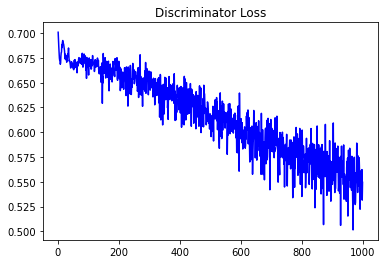

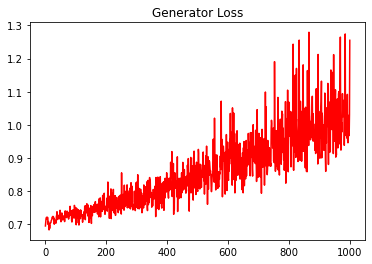

In [8]:
performanceMetrics.plotTrainingLoss2(discLossG1,genLossG1,np.linspace(1,n_epochs,n_epochs).astype(int))

In [9]:
GAN1_metrics = train_test.test_generator(generator,test_data,device)
sb.glue("GAN_1 Metrics",GAN1_metrics)

tensor([[-0.6606],
        [ 1.1123],
        [ 0.1266],
        [-0.9951],
        [ 0.2214],
        [ 1.0972],
        [-2.0811],
        [ 0.3083],
        [ 0.4697],
        [ 0.5050],
        [ 0.5689],
        [ 0.7270],
        [-0.6275],
        [-1.1805],
        [ 0.6150],
        [ 0.3547],
        [-0.1222],
        [-0.8052],
        [ 0.6950],
        [ 0.4870]], grad_fn=<MmBackward>)
tensor([[ 0.1895],
        [ 1.0435],
        [-0.2128],
        [-1.2202],
        [ 0.4954],
        [ 1.0369],
        [-0.9371],
        [ 0.1014],
        [ 0.5365],
        [ 0.5738],
        [ 0.6804],
        [ 0.6581],
        [-1.2370],
        [-1.3725],
        [ 0.5825],
        [ 0.1130],
        [-0.4284],
        [-0.9379],
        [ 0.4928],
        [ 0.7186]], grad_fn=<MmBackward>)
tensor([[ 0.7586],
        [ 0.6817],
        [-0.6202],
        [-1.0747],
        [-0.1016],
        [ 0.9365],
        [-0.3514],
        [ 0.3411],
        [ 0.4412],
        [ 0.4878],
    

tensor([[ 0.2378],
        [ 0.8853],
        [-0.0029],
        [-0.8592],
        [-0.0110],
        [ 0.9164],
        [-0.8390],
        [ 0.3129],
        [ 0.4674],
        [ 0.4034],
        [ 0.5192],
        [ 0.5848],
        [-0.8230],
        [-0.7466],
        [ 0.6070],
        [ 0.0994],
        [ 0.3640],
        [-1.1128],
        [ 0.7592],
        [ 0.5045]], grad_fn=<MmBackward>)
tensor([[ 0.0697],
        [ 0.8381],
        [-0.2071],
        [-1.0956],
        [ 0.0442],
        [ 0.9355],
        [-0.7722],
        [ 0.3737],
        [ 0.3602],
        [ 0.4843],
        [ 0.5866],
        [ 0.5686],
        [-0.7200],
        [-0.8151],
        [ 0.5423],
        [ 0.1872],
        [ 0.3362],
        [-1.3140],
        [ 0.6340],
        [ 0.3523]], grad_fn=<MmBackward>)
tensor([[ 0.0588],
        [ 1.0013],
        [ 0.2182],
        [-0.8898],
        [-0.0236],
        [ 0.9520],
        [-1.0282],
        [ 0.3970],
        [ 0.5758],
        [ 0.4020],
    

tensor([[-0.4879],
        [ 1.3077],
        [ 0.2455],
        [-0.7302],
        [-0.0735],
        [ 1.1553],
        [-1.0427],
        [ 0.3893],
        [ 0.6508],
        [ 0.5034],
        [ 0.6244],
        [ 0.6074],
        [-0.5055],
        [-1.0284],
        [ 0.6039],
        [ 0.3913],
        [ 0.1792],
        [-0.7612],
        [ 0.6299],
        [ 0.5339]], grad_fn=<MmBackward>)
tensor([[-0.0540],
        [ 0.9550],
        [-0.0574],
        [-1.1452],
        [-0.1295],
        [ 1.1515],
        [-1.2466],
        [ 0.2405],
        [ 0.4603],
        [ 0.3969],
        [ 0.6595],
        [ 0.6878],
        [-0.5053],
        [-1.2427],
        [ 0.4817],
        [ 0.0258],
        [ 0.0399],
        [-0.9718],
        [ 0.5987],
        [ 0.4742]], grad_fn=<MmBackward>)
tensor([[ 0.6676],
        [ 1.0364],
        [-0.2582],
        [-1.2351],
        [ 0.1782],
        [ 0.8037],
        [-0.2221],
        [ 0.3311],
        [ 0.4358],
        [ 0.4417],
    

tensor([[-0.5449],
        [ 0.8534],
        [-0.0497],
        [-0.8657],
        [-0.1367],
        [ 1.3102],
        [-1.5795],
        [ 0.4978],
        [ 0.4695],
        [ 0.6965],
        [ 0.5721],
        [ 0.6827],
        [-0.5884],
        [ 0.1239],
        [ 0.5685],
        [-0.2486],
        [-0.2435],
        [-1.0617],
        [ 0.5676],
        [ 0.4702]], grad_fn=<MmBackward>)
tensor([[-0.2201],
        [ 0.9348],
        [ 0.1081],
        [-1.0199],
        [-0.0564],
        [ 0.8428],
        [-1.5874],
        [ 0.2543],
        [ 0.4160],
        [ 0.5642],
        [ 0.4771],
        [ 0.7054],
        [-0.5928],
        [-0.2713],
        [ 0.6292],
        [ 0.2829],
        [-0.1282],
        [-0.8777],
        [ 0.6480],
        [ 0.4515]], grad_fn=<MmBackward>)
tensor([[-0.0258],
        [ 1.1000],
        [ 0.1736],
        [-0.7720],
        [ 0.2420],
        [ 1.2357],
        [-0.9701],
        [ 0.5355],
        [ 0.6227],
        [ 0.7065],
    

tensor([[-1.1094],
        [ 0.9197],
        [ 0.0503],
        [-0.9276],
        [ 0.5307],
        [ 1.0279],
        [-1.2423],
        [ 0.1274],
        [ 0.4315],
        [ 0.6217],
        [ 0.5977],
        [ 0.6496],
        [-0.4277],
        [-1.1061],
        [ 0.7204],
        [ 0.2138],
        [-0.2304],
        [-0.5959],
        [ 0.5837],
        [ 0.4206]], grad_fn=<MmBackward>)
tensor([[-0.3531],
        [ 0.8894],
        [-0.0195],
        [-0.9672],
        [ 0.2012],
        [ 1.2115],
        [-1.0283],
        [ 0.2985],
        [ 0.4510],
        [ 0.5626],
        [ 0.6190],
        [ 0.6199],
        [-0.8736],
        [-0.9977],
        [ 0.5969],
        [ 0.2071],
        [ 0.3657],
        [-0.8772],
        [ 0.6936],
        [ 0.5082]], grad_fn=<MmBackward>)
tensor([[-0.0936],
        [ 1.0331],
        [-0.0487],
        [-0.7875],
        [ 0.8583],
        [ 0.9667],
        [-0.6988],
        [ 0.5902],
        [ 0.3946],
        [ 0.6105],
    

tensor([[ 0.0572],
        [ 0.9403],
        [-0.1769],
        [-0.9350],
        [-0.5588],
        [ 1.0941],
        [-1.1194],
        [ 0.3132],
        [ 0.4313],
        [ 0.5664],
        [ 0.6609],
        [ 0.6473],
        [-0.8719],
        [ 0.1834],
        [ 0.5030],
        [ 0.2126],
        [-0.0500],
        [-1.3131],
        [ 0.6250],
        [ 0.3766]], grad_fn=<MmBackward>)
tensor([[-0.1872],
        [ 1.0634],
        [ 0.1740],
        [-1.0212],
        [-0.1206],
        [ 1.3442],
        [-1.3367],
        [ 0.2136],
        [ 0.6017],
        [ 0.4046],
        [ 0.6555],
        [ 0.5856],
        [-0.8155],
        [-1.6519],
        [ 0.7719],
        [ 0.2172],
        [-0.0224],
        [-0.8119],
        [ 0.7624],
        [ 0.5777]], grad_fn=<MmBackward>)
tensor([[ 0.1824],
        [ 1.1771],
        [ 0.0425],
        [-0.8902],
        [ 0.6369],
        [ 1.1650],
        [-0.7773],
        [ 0.5512],
        [ 0.5825],
        [ 0.7127],
    

tensor([[-0.7701],
        [ 1.2200],
        [-0.0840],
        [-0.7741],
        [-0.3215],
        [ 1.2829],
        [-0.5521],
        [ 0.5725],
        [ 0.5557],
        [ 0.5183],
        [ 0.4012],
        [ 0.6196],
        [-0.4278],
        [-1.0353],
        [ 0.8606],
        [ 0.2981],
        [ 0.5707],
        [-0.9030],
        [ 0.5848],
        [ 0.6762]], grad_fn=<MmBackward>)
tensor([[-0.6335],
        [ 0.8546],
        [ 0.0186],
        [-0.9384],
        [ 0.5821],
        [ 1.1954],
        [-1.7047],
        [ 0.3240],
        [ 0.4484],
        [ 0.6524],
        [ 0.5770],
        [ 0.6815],
        [-0.7177],
        [ 0.2366],
        [ 0.6386],
        [-0.2326],
        [-0.2760],
        [-1.0567],
        [ 0.6335],
        [ 0.4157]], grad_fn=<MmBackward>)
tensor([[-0.4858],
        [ 1.0187],
        [-0.0105],
        [-0.8262],
        [ 0.2641],
        [ 1.1442],
        [-1.3996],
        [ 0.2374],
        [ 0.5992],
        [ 0.4089],
    

tensor([[-0.2922],
        [ 0.9888],
        [ 0.1864],
        [-0.8060],
        [ 0.1120],
        [ 1.2665],
        [-1.7624],
        [ 0.5345],
        [ 0.6282],
        [ 0.7910],
        [ 0.5918],
        [ 0.6264],
        [-0.5744],
        [-0.6819],
        [ 0.6202],
        [ 0.2853],
        [ 0.0157],
        [-0.8682],
        [ 0.5896],
        [ 0.5313]], grad_fn=<MmBackward>)
tensor([[-0.8019],
        [ 0.9029],
        [ 0.2668],
        [-0.9343],
        [ 0.2295],
        [ 1.2138],
        [-1.8298],
        [ 0.1860],
        [ 0.4598],
        [ 0.5093],
        [ 0.6569],
        [ 0.6694],
        [-0.5143],
        [-0.9108],
        [ 0.5767],
        [ 0.3820],
        [ 0.2510],
        [-0.6558],
        [ 0.7631],
        [ 0.5167]], grad_fn=<MmBackward>)
tensor([[-1.4641],
        [ 1.2185],
        [ 0.2453],
        [-0.7037],
        [ 0.3903],
        [ 1.1458],
        [-0.9989],
        [ 0.4164],
        [ 0.5003],
        [ 0.6684],
    

tensor([[ 0.3419],
        [ 0.9912],
        [-0.0607],
        [-0.7857],
        [-0.2917],
        [ 1.3002],
        [-0.5856],
        [ 0.4635],
        [ 0.4844],
        [ 0.4898],
        [ 0.7683],
        [ 0.5778],
        [-1.1867],
        [-1.4201],
        [ 0.4686],
        [ 0.0688],
        [ 0.2355],
        [-1.3088],
        [ 0.5811],
        [ 0.7179]], grad_fn=<MmBackward>)
tensor([[-0.2385],
        [ 0.9093],
        [ 0.3153],
        [-0.7846],
        [ 0.2993],
        [ 0.9876],
        [-0.7489],
        [ 0.4146],
        [ 0.4932],
        [ 0.4913],
        [ 0.6618],
        [ 0.7383],
        [-0.5601],
        [-1.3960],
        [ 0.6388],
        [-0.0374],
        [ 0.1190],
        [-0.7328],
        [ 0.8271],
        [ 0.6064]], grad_fn=<MmBackward>)
tensor([[-0.0800],
        [ 1.0541],
        [-0.1187],
        [-0.7649],
        [ 0.0541],
        [ 1.0546],
        [-0.6449],
        [ 0.3110],
        [ 0.5519],
        [ 0.4063],
    

tensor([[-0.0731],
        [ 1.0212],
        [-0.2031],
        [-1.0656],
        [ 0.2009],
        [ 0.9851],
        [-1.3782],
        [ 0.3825],
        [ 0.4507],
        [ 0.7122],
        [ 0.4910],
        [ 0.6498],
        [-0.9986],
        [-1.0624],
        [ 0.5301],
        [ 0.1106],
        [-0.0016],
        [-1.0638],
        [ 0.7532],
        [ 0.8840]], grad_fn=<MmBackward>)
tensor([[-0.0981],
        [ 0.9277],
        [-0.3574],
        [-0.6818],
        [ 0.5957],
        [ 0.9228],
        [-0.5905],
        [ 0.3957],
        [ 0.5954],
        [ 0.5850],
        [ 0.4628],
        [ 0.6069],
        [-0.7409],
        [-0.6509],
        [ 0.6748],
        [ 0.2408],
        [-0.2779],
        [-1.3453],
        [ 0.8289],
        [ 0.4845]], grad_fn=<MmBackward>)
tensor([[ 0.0951],
        [ 0.8874],
        [ 0.1275],
        [-0.7785],
        [ 0.3273],
        [ 1.2138],
        [-0.5990],
        [ 0.4652],
        [ 0.5448],
        [ 0.5588],
    

tensor([[-0.3974],
        [ 1.0969],
        [ 0.0589],
        [-0.6114],
        [ 0.3035],
        [ 1.1413],
        [-0.9120],
        [ 0.5227],
        [ 0.6061],
        [ 0.6225],
        [ 0.5197],
        [ 0.6306],
        [-0.6422],
        [-1.1079],
        [ 0.5649],
        [ 0.2377],
        [-0.1659],
        [-0.8182],
        [ 0.8062],
        [ 0.5106]], grad_fn=<MmBackward>)
tensor([[-0.2384],
        [ 1.1176],
        [-0.1005],
        [-0.8531],
        [ 0.4649],
        [ 1.0549],
        [-0.9352],
        [ 0.4903],
        [ 0.6449],
        [ 0.4080],
        [ 0.5202],
        [ 0.6103],
        [-0.8061],
        [-1.2534],
        [ 0.7762],
        [ 0.3466],
        [ 0.2497],
        [-1.2700],
        [ 0.7626],
        [ 0.5070]], grad_fn=<MmBackward>)
tensor([[-0.4423],
        [ 0.9389],
        [ 0.2846],
        [-0.7725],
        [ 0.1201],
        [ 1.0889],
        [-0.9185],
        [ 0.3463],
        [ 0.4573],
        [ 0.5964],
    

tensor([[-1.4697],
        [ 1.0183],
        [-0.2742],
        [-0.9568],
        [ 0.3261],
        [ 1.0826],
        [-0.8108],
        [ 0.1695],
        [ 0.4285],
        [ 0.6465],
        [ 0.3455],
        [ 0.5846],
        [-0.5080],
        [-1.1452],
        [ 0.5621],
        [ 0.2531],
        [-0.1178],
        [-0.5847],
        [ 0.5066],
        [ 0.3904]], grad_fn=<MmBackward>)
tensor([[ 0.0036],
        [ 1.1358],
        [-0.1252],
        [-0.9378],
        [ 0.5877],
        [ 1.1299],
        [-0.8121],
        [ 0.5888],
        [ 0.5686],
        [ 0.5090],
        [ 0.6090],
        [ 0.5846],
        [-0.7428],
        [-1.2203],
        [ 0.5676],
        [ 0.3076],
        [ 0.0436],
        [-1.2933],
        [ 0.7413],
        [ 0.7406]], grad_fn=<MmBackward>)
tensor([[ 0.0913],
        [ 0.9363],
        [ 0.0481],
        [-1.0969],
        [ 0.0436],
        [ 1.2196],
        [-0.9493],
        [ 0.4618],
        [ 0.5490],
        [ 0.6580],
    

tensor([[-0.2478],
        [ 0.8946],
        [ 0.0630],
        [-1.2592],
        [ 0.5299],
        [ 1.0961],
        [-0.7372],
        [ 0.2185],
        [ 0.5275],
        [ 0.4822],
        [ 0.5781],
        [ 0.6180],
        [-0.7111],
        [-1.3763],
        [ 0.4595],
        [ 0.0625],
        [ 0.2298],
        [-0.8818],
        [ 0.6647],
        [ 0.5340]], grad_fn=<MmBackward>)
tensor([[ 0.0214],
        [ 1.0062],
        [-0.3998],
        [-1.0283],
        [ 0.4403],
        [ 1.0446],
        [-1.2259],
        [ 0.4142],
        [ 0.4860],
        [ 0.5505],
        [ 0.7542],
        [ 0.6416],
        [-0.8434],
        [-1.3553],
        [ 0.5834],
        [ 0.2787],
        [-0.1464],
        [-1.2505],
        [ 0.7671],
        [ 0.5075]], grad_fn=<MmBackward>)
tensor([[-1.4396],
        [ 0.9168],
        [ 0.3150],
        [-0.7692],
        [ 0.2264],
        [ 1.1979],
        [-1.3061],
        [ 0.3248],
        [ 0.4070],
        [ 0.7749],
    

tensor([[-0.3562],
        [ 0.9838],
        [ 0.3365],
        [-0.6693],
        [-0.1114],
        [ 0.9493],
        [-0.9442],
        [ 0.4468],
        [ 0.5427],
        [ 0.4324],
        [ 0.5656],
        [ 0.6598],
        [-0.6156],
        [-1.1269],
        [ 0.5593],
        [-0.0306],
        [ 0.0423],
        [-0.8679],
        [ 0.7290],
        [ 0.5687]], grad_fn=<MmBackward>)
tensor([[-0.1945],
        [ 0.9487],
        [ 0.1756],
        [-0.8939],
        [-0.2034],
        [ 1.3144],
        [-1.5387],
        [ 0.2673],
        [ 0.5252],
        [ 0.6735],
        [ 0.7583],
        [ 0.6175],
        [-0.9588],
        [ 0.1188],
        [ 0.6017],
        [ 0.0416],
        [-0.1578],
        [-1.0772],
        [ 0.6100],
        [ 0.4868]], grad_fn=<MmBackward>)
tensor([[-0.7643],
        [ 1.0769],
        [ 0.1819],
        [-1.0041],
        [ 0.3387],
        [ 0.9037],
        [-0.8219],
        [ 0.3009],
        [ 0.5153],
        [ 0.4897],
    

tensor([[-0.3441],
        [ 1.0736],
        [ 0.2909],
        [-0.6168],
        [ 0.1669],
        [ 1.3280],
        [-1.0897],
        [ 0.5121],
        [ 0.7644],
        [ 0.6046],
        [ 0.4916],
        [ 0.7014],
        [-0.8087],
        [-1.1022],
        [ 0.8640],
        [ 0.1516],
        [ 0.0140],
        [-0.9068],
        [ 0.6471],
        [ 0.6404]], grad_fn=<MmBackward>)
tensor([[-0.8908],
        [ 0.9223],
        [ 0.2552],
        [-0.7343],
        [ 0.3320],
        [ 1.2173],
        [-1.5351],
        [ 0.3674],
        [ 0.4505],
        [ 0.7012],
        [ 0.5908],
        [ 0.6337],
        [-0.5501],
        [-0.4696],
        [ 0.6127],
        [-0.0639],
        [ 0.1828],
        [-0.6327],
        [ 0.7610],
        [ 0.4827]], grad_fn=<MmBackward>)
tensor([[-0.5190],
        [ 1.1676],
        [ 0.0836],
        [-0.9168],
        [ 0.3576],
        [ 1.1729],
        [-0.8932],
        [ 0.3729],
        [ 0.6177],
        [ 0.5747],
    

tensor([[ 0.1064],
        [ 0.7993],
        [-0.1354],
        [-0.9887],
        [ 0.2606],
        [ 1.1266],
        [-0.5773],
        [ 0.4743],
        [ 0.5147],
        [ 0.5593],
        [ 0.3685],
        [ 0.7109],
        [-0.6562],
        [-1.2967],
        [ 0.5613],
        [ 0.2201],
        [-0.2363],
        [-1.0879],
        [ 0.4891],
        [ 0.5793]], grad_fn=<MmBackward>)
tensor([[ 0.2110],
        [ 0.9541],
        [-0.1688],
        [-0.9974],
        [ 0.2022],
        [ 1.0043],
        [-0.7405],
        [ 0.3672],
        [ 0.4951],
        [ 0.5467],
        [ 0.5468],
        [ 0.5688],
        [-0.7302],
        [-1.0756],
        [ 0.5841],
        [-0.2208],
        [-0.3940],
        [-1.3721],
        [ 0.5591],
        [ 0.4705]], grad_fn=<MmBackward>)
tensor([[-0.6621],
        [ 1.1263],
        [ 0.3047],
        [-0.6535],
        [ 0.3687],
        [ 0.8976],
        [-1.4222],
        [ 0.4555],
        [ 0.6491],
        [ 0.4919],
    

tensor([[-0.7087],
        [ 1.0646],
        [ 0.2092],
        [-0.8739],
        [ 0.2119],
        [ 1.0335],
        [-0.8218],
        [ 0.3369],
        [ 0.4512],
        [ 0.5725],
        [ 0.5530],
        [ 0.6402],
        [-0.4254],
        [-1.1638],
        [ 0.5090],
        [ 0.3269],
        [ 0.2811],
        [-0.7465],
        [ 0.6858],
        [ 0.4935]], grad_fn=<MmBackward>)
tensor([[-1.0964],
        [ 1.0441],
        [ 0.1805],
        [-0.8024],
        [ 0.2686],
        [ 1.0660],
        [-1.5982],
        [ 0.3809],
        [ 0.5080],
        [ 0.5435],
        [ 0.5466],
        [ 0.6260],
        [-0.3906],
        [-0.9499],
        [ 0.6457],
        [ 0.0575],
        [-0.1012],
        [-0.4914],
        [ 0.5562],
        [ 0.5202]], grad_fn=<MmBackward>)
tensor([[ 0.1775],
        [ 0.6994],
        [-0.5017],
        [-0.9351],
        [ 0.0847],
        [ 0.8796],
        [-0.4066],
        [ 0.2031],
        [ 0.3876],
        [ 0.5319],
    

tensor([[-0.6225],
        [ 1.0241],
        [ 0.0857],
        [-0.7433],
        [ 0.0653],
        [ 0.9786],
        [-0.9285],
        [ 0.4030],
        [ 0.6159],
        [ 0.6977],
        [ 0.5455],
        [ 0.6764],
        [-0.7036],
        [-0.6909],
        [ 0.6265],
        [-0.0381],
        [-0.1558],
        [-0.7268],
        [ 0.5415],
        [ 0.5022]], grad_fn=<MmBackward>)
tensor([[-0.2416],
        [ 1.0467],
        [ 0.1581],
        [-0.6865],
        [ 0.0799],
        [ 1.2069],
        [-0.9002],
        [ 0.3720],
        [ 0.6260],
        [ 0.6816],
        [ 0.5651],
        [ 0.6458],
        [-0.5929],
        [-1.6277],
        [ 0.8800],
        [ 0.1550],
        [-0.0161],
        [-0.7921],
        [ 0.6659],
        [ 0.5765]], grad_fn=<MmBackward>)
tensor([[-1.2218],
        [ 1.0405],
        [-0.0046],
        [-1.1940],
        [ 0.4069],
        [ 0.8394],
        [-1.0583],
        [-0.0814],
        [ 0.4452],
        [ 0.3494],
    

tensor([[ 0.0756],
        [ 0.8998],
        [ 0.0820],
        [-0.9465],
        [ 0.4342],
        [ 1.2379],
        [-1.0542],
        [ 0.6394],
        [ 0.5176],
        [ 0.6804],
        [ 0.5580],
        [ 0.5705],
        [-0.7393],
        [-1.6378],
        [ 0.5539],
        [ 0.2846],
        [-0.0314],
        [-1.1051],
        [ 0.5961],
        [ 0.6065]], grad_fn=<MmBackward>)
tensor([[-0.7632],
        [ 1.2333],
        [ 0.0487],
        [-0.7811],
        [ 0.4820],
        [ 1.1587],
        [-0.8434],
        [ 0.4228],
        [ 0.5794],
        [ 0.4669],
        [ 0.4944],
        [ 0.6135],
        [-0.6489],
        [-1.4412],
        [ 0.5780],
        [ 0.1100],
        [-0.0339],
        [-0.6530],
        [ 0.5110],
        [ 0.5083]], grad_fn=<MmBackward>)
tensor([[-0.7686],
        [ 1.1392],
        [ 0.0428],
        [-1.0855],
        [ 0.2943],
        [ 1.1122],
        [-1.4528],
        [ 0.3657],
        [ 0.5140],
        [ 0.4629],
    

tensor([[-0.0472],
        [ 0.8260],
        [-0.1186],
        [-1.1518],
        [ 0.4622],
        [ 0.9969],
        [-0.9284],
        [ 0.3326],
        [ 0.5401],
        [ 0.4574],
        [ 0.6197],
        [ 0.7706],
        [-1.0019],
        [-1.1828],
        [ 0.6688],
        [ 0.2152],
        [-0.2693],
        [-1.4984],
        [ 0.7960],
        [ 0.4124]], grad_fn=<MmBackward>)
tensor([[-0.3808],
        [ 0.9106],
        [ 0.3045],
        [-0.7020],
        [-0.1751],
        [ 1.0391],
        [-1.1324],
        [ 0.2879],
        [ 0.5111],
        [ 0.4851],
        [ 0.5938],
        [ 0.6364],
        [-0.6402],
        [-0.5491],
        [ 0.6486],
        [ 0.2780],
        [ 0.0287],
        [-0.6409],
        [ 0.7330],
        [ 0.4901]], grad_fn=<MmBackward>)
tensor([[ 0.1395],
        [ 0.9342],
        [ 0.1541],
        [-0.9632],
        [ 0.0288],
        [ 0.9057],
        [-0.7309],
        [ 0.4471],
        [ 0.5130],
        [ 0.3888],
    

tensor([[-0.3231],
        [ 0.9638],
        [ 0.2409],
        [-0.8792],
        [ 0.4040],
        [ 1.1834],
        [-1.1384],
        [ 0.2657],
        [ 0.5265],
        [ 0.4462],
        [ 0.5754],
        [ 0.6781],
        [-0.7429],
        [-1.5816],
        [ 0.5649],
        [ 0.1928],
        [-0.1624],
        [-0.4612],
        [ 0.7615],
        [ 0.5669]], grad_fn=<MmBackward>)
tensor([[-1.6806],
        [ 1.1534],
        [-0.2100],
        [-0.7286],
        [ 0.4847],
        [ 1.2201],
        [-0.4647],
        [ 0.3129],
        [ 0.5023],
        [ 0.6470],
        [ 0.5953],
        [ 0.6434],
        [-0.8980],
        [-1.3846],
        [ 0.5898],
        [ 0.2845],
        [-0.0261],
        [-0.2514],
        [ 0.5057],
        [ 0.6301]], grad_fn=<MmBackward>)
tensor([[-0.5418],
        [ 0.9044],
        [ 0.1511],
        [-0.9239],
        [-0.0028],
        [ 1.0284],
        [-0.3230],
        [ 0.2812],
        [ 0.5867],
        [ 0.6041],
    

tensor([[ 0.1135],
        [ 1.0069],
        [ 0.0812],
        [-0.7786],
        [ 0.3629],
        [ 1.1949],
        [-0.7297],
        [ 0.4628],
        [ 0.5654],
        [ 0.4057],
        [ 0.4668],
        [ 0.5326],
        [-0.9630],
        [-1.1722],
        [ 0.5127],
        [ 0.0120],
        [-0.0025],
        [-1.0617],
        [ 0.6871],
        [ 0.6347]], grad_fn=<MmBackward>)
tensor([[-0.6942],
        [ 1.1114],
        [ 0.2768],
        [-0.6966],
        [ 0.4282],
        [ 1.0978],
        [-1.7068],
        [ 0.5137],
        [ 0.5702],
        [ 0.6978],
        [ 0.5450],
        [ 0.6601],
        [-0.4342],
        [-1.5125],
        [ 0.5580],
        [ 0.3202],
        [-0.1620],
        [-0.5543],
        [ 0.6113],
        [ 0.5487]], grad_fn=<MmBackward>)
tensor([[-0.6134],
        [ 0.9257],
        [ 0.0533],
        [-0.8798],
        [ 0.6386],
        [ 0.9941],
        [-1.0649],
        [ 0.4721],
        [ 0.5549],
        [ 0.6680],
    

tensor([[-1.4112],
        [ 0.9936],
        [ 0.2781],
        [-0.8984],
        [ 0.3511],
        [ 0.8300],
        [-0.8116],
        [ 0.3487],
        [ 0.5634],
        [ 0.5360],
        [ 0.4879],
        [ 0.7320],
        [-0.4348],
        [-1.3417],
        [ 0.7285],
        [ 0.2555],
        [ 0.5260],
        [-0.6676],
        [ 0.8386],
        [ 0.4754]], grad_fn=<MmBackward>)
tensor([[ 0.0053],
        [ 0.8942],
        [ 0.0183],
        [-0.9051],
        [ 0.0403],
        [ 0.9848],
        [-0.9275],
        [ 0.2937],
        [ 0.4146],
        [ 0.4567],
        [ 0.5222],
        [ 0.6201],
        [-0.8833],
        [-0.4274],
        [ 0.6124],
        [ 0.2816],
        [-0.0091],
        [-1.1161],
        [ 0.7130],
        [ 0.4557]], grad_fn=<MmBackward>)
tensor([[-1.7731],
        [ 1.1033],
        [-0.3778],
        [-0.7421],
        [-0.2467],
        [ 0.9835],
        [-0.6279],
        [ 0.3587],
        [ 0.4141],
        [ 0.8254],
    

tensor([[ 0.1989],
        [ 1.1190],
        [-0.0495],
        [-0.8912],
        [-0.3177],
        [ 0.9803],
        [-1.0837],
        [ 0.5172],
        [ 0.5019],
        [ 0.4204],
        [ 0.6461],
        [ 0.5005],
        [-0.9087],
        [-0.7617],
        [ 0.5076],
        [ 0.1661],
        [ 0.0193],
        [-1.1465],
        [ 0.5983],
        [ 0.5738]], grad_fn=<MmBackward>)
tensor([[-0.0916],
        [ 1.1067],
        [-0.0048],
        [-0.7657],
        [ 0.2179],
        [ 1.1062],
        [-0.8138],
        [ 0.4353],
        [ 0.6928],
        [ 0.4937],
        [ 0.5511],
        [ 0.5724],
        [-0.8406],
        [-1.1868],
        [ 0.6384],
        [ 0.2725],
        [-0.2448],
        [-0.9900],
        [ 0.8410],
        [ 0.5282]], grad_fn=<MmBackward>)
tensor([[ 0.0563],
        [ 1.1652],
        [ 0.1292],
        [-0.8578],
        [ 0.3993],
        [ 1.0798],
        [-1.1167],
        [ 0.4745],
        [ 0.5689],
        [ 0.7688],
    

tensor([[-0.4249],
        [ 0.8031],
        [-0.1372],
        [-1.0125],
        [-0.7922],
        [ 1.2665],
        [-0.5784],
        [ 0.3055],
        [ 0.4606],
        [ 0.5406],
        [ 0.5591],
        [ 0.5983],
        [-0.5765],
        [ 0.2460],
        [ 0.4288],
        [ 0.0950],
        [ 0.3199],
        [-1.0263],
        [ 0.6190],
        [ 0.4621]], grad_fn=<MmBackward>)
tensor([[-1.0730],
        [ 1.2133],
        [ 0.1461],
        [-0.6524],
        [-0.2320],
        [ 1.1240],
        [-1.1471],
        [ 0.3150],
        [ 0.5677],
        [ 0.7882],
        [ 0.6339],
        [ 0.6590],
        [-0.4381],
        [-1.2521],
        [ 0.8636],
        [ 0.1663],
        [ 0.0622],
        [-0.6123],
        [ 0.7248],
        [ 0.5158]], grad_fn=<MmBackward>)
tensor([[-1.1561],
        [ 1.1393],
        [ 0.0973],
        [-0.7511],
        [ 0.2875],
        [ 1.0240],
        [-1.5153],
        [ 0.4737],
        [ 0.4541],
        [ 0.4941],
    

tensor([[-0.1414],
        [ 0.9678],
        [ 0.1298],
        [-0.9372],
        [-0.1104],
        [ 1.0622],
        [-1.1995],
        [ 0.3604],
        [ 0.6067],
        [ 0.4679],
        [ 0.6896],
        [ 0.6204],
        [-0.7034],
        [-0.9022],
        [ 0.6561],
        [ 0.4021],
        [ 0.0228],
        [-0.7771],
        [ 0.5343],
        [ 0.5379]], grad_fn=<MmBackward>)
tensor([[-1.6689],
        [ 1.0120],
        [ 0.2221],
        [-0.7011],
        [ 0.0446],
        [ 1.3428],
        [-1.2162],
        [ 0.2739],
        [ 0.5760],
        [ 0.5162],
        [ 0.5692],
        [ 0.6319],
        [-0.2989],
        [-0.8412],
        [ 0.7476],
        [ 0.2888],
        [ 0.3405],
        [-0.4057],
        [ 0.7406],
        [ 0.5020]], grad_fn=<MmBackward>)
tensor([[-0.1064],
        [ 1.2244],
        [ 0.1229],
        [-0.7380],
        [ 0.1243],
        [ 1.1043],
        [-1.0473],
        [ 0.4257],
        [ 0.5449],
        [ 0.7070],
    

tensor([[-5.4831e-01],
        [ 1.1867e+00],
        [ 1.9934e-01],
        [-8.5328e-01],
        [ 1.0885e-01],
        [ 1.0140e+00],
        [-1.5788e+00],
        [ 4.6820e-01],
        [ 5.1118e-01],
        [ 4.0225e-01],
        [ 5.9152e-01],
        [ 5.4127e-01],
        [-4.4591e-01],
        [-1.0234e+00],
        [ 6.1745e-01],
        [ 3.4633e-01],
        [ 8.4245e-04],
        [-5.6076e-01],
        [ 6.8631e-01],
        [ 5.1223e-01]], grad_fn=<MmBackward>)
tensor([[-0.4594],
        [ 1.2540],
        [ 0.1917],
        [-0.7985],
        [ 0.6138],
        [ 1.0184],
        [-0.9254],
        [ 0.4893],
        [ 0.5265],
        [ 0.6503],
        [ 0.6306],
        [ 0.8025],
        [-0.5824],
        [-1.6722],
        [ 0.4990],
        [ 0.4009],
        [-0.0910],
        [-0.8974],
        [ 0.6356],
        [ 0.5342]], grad_fn=<MmBackward>)
tensor([[-0.0034],
        [ 0.9356],
        [ 0.1276],
        [-0.8424],
        [ 0.3509],
        [ 1.0215],


tensor([[ 0.2219],
        [ 0.9288],
        [-0.0746],
        [-1.4066],
        [ 0.2627],
        [ 1.1081],
        [-0.2605],
        [ 0.1463],
        [ 0.4999],
        [ 0.5081],
        [ 0.5239],
        [ 0.6110],
        [-1.1972],
        [-1.6285],
        [ 0.7318],
        [ 0.1238],
        [ 0.3004],
        [-1.1436],
        [ 0.8170],
        [ 0.5797]], grad_fn=<MmBackward>)
tensor([[ 0.5315],
        [ 0.9528],
        [-0.2132],
        [-1.3066],
        [ 0.2011],
        [ 1.1044],
        [-0.0910],
        [ 0.3421],
        [ 0.5391],
        [ 0.4135],
        [ 0.4485],
        [ 0.5086],
        [-0.8459],
        [-1.1419],
        [ 0.4292],
        [ 0.2456],
        [ 0.3338],
        [-1.1908],
        [ 0.4457],
        [ 0.5972]], grad_fn=<MmBackward>)
tensor([[-0.2994],
        [ 1.1186],
        [ 0.0441],
        [-0.8081],
        [-0.2904],
        [ 1.0761],
        [-1.5725],
        [ 0.4321],
        [ 0.5473],
        [ 0.7654],
    

tensor([[-0.4457],
        [ 1.2259],
        [ 0.1922],
        [-0.7361],
        [ 0.2127],
        [ 0.9502],
        [-0.9653],
        [ 0.5508],
        [ 0.6588],
        [ 0.5592],
        [ 0.5978],
        [ 0.6928],
        [-0.6901],
        [-1.3736],
        [ 0.7669],
        [ 0.1535],
        [ 0.0116],
        [-0.9065],
        [ 0.5733],
        [ 0.5699]], grad_fn=<MmBackward>)
tensor([[-0.0123],
        [ 1.1586],
        [ 0.0749],
        [-0.8220],
        [ 0.3789],
        [ 1.1785],
        [-0.6563],
        [ 0.5778],
        [ 0.6359],
        [ 0.7471],
        [ 0.4608],
        [ 0.6939],
        [-1.0572],
        [-1.5099],
        [ 0.6315],
        [ 0.0907],
        [-0.0904],
        [-1.1883],
        [ 0.4965],
        [ 0.6627]], grad_fn=<MmBackward>)
tensor([[ 0.1232],
        [ 0.9071],
        [ 0.1922],
        [-0.9392],
        [ 0.3006],
        [ 1.0451],
        [-0.9458],
        [ 0.3216],
        [ 0.6443],
        [ 0.3480],
    

tensor([[ 0.0780],
        [ 0.9166],
        [ 0.6938],
        [-0.9205],
        [-0.3990],
        [ 1.1870],
        [-0.8003],
        [ 0.4467],
        [ 0.5297],
        [ 0.4484],
        [ 0.6441],
        [ 0.5836],
        [-0.8974],
        [-0.9391],
        [ 0.4614],
        [ 0.1534],
        [ 0.3869],
        [-1.1944],
        [ 0.3752],
        [ 0.4887]], grad_fn=<MmBackward>)
tensor([[ 0.1167],
        [ 0.9830],
        [ 0.2048],
        [-0.6904],
        [ 0.0067],
        [ 1.0147],
        [-1.0228],
        [ 0.5276],
        [ 0.5141],
        [ 0.4623],
        [ 0.4972],
        [ 0.6105],
        [-1.0604],
        [-0.5408],
        [ 0.5952],
        [-0.0079],
        [ 0.3047],
        [-1.1441],
        [ 0.7685],
        [ 0.5454]], grad_fn=<MmBackward>)
tensor([[-1.1963],
        [ 1.1229],
        [-0.1668],
        [-0.8889],
        [-0.5699],
        [ 0.9962],
        [-1.2436],
        [ 0.3595],
        [ 0.4328],
        [ 0.6338],
    

tensor([[-0.1957],
        [ 1.3068],
        [ 0.0437],
        [-1.0038],
        [ 0.2004],
        [ 0.9380],
        [-1.3769],
        [ 0.3649],
        [ 0.5851],
        [ 0.6422],
        [ 0.6872],
        [ 0.7094],
        [-0.7466],
        [-1.2901],
        [ 0.6163],
        [ 0.3893],
        [-0.2188],
        [-1.0370],
        [ 0.6268],
        [ 0.5184]], grad_fn=<MmBackward>)
tensor([[-1.1709],
        [ 0.9774],
        [ 0.2786],
        [-0.5937],
        [ 0.0489],
        [ 1.2512],
        [-1.3907],
        [ 0.4808],
        [ 0.5442],
        [ 0.7577],
        [ 0.5137],
        [ 0.6704],
        [-0.5619],
        [ 0.4150],
        [ 0.6328],
        [-0.0063],
        [-0.2160],
        [-0.5049],
        [ 0.6947],
        [ 0.4858]], grad_fn=<MmBackward>)
tensor([[ 0.0353],
        [ 0.9142],
        [-0.1335],
        [-1.0421],
        [-0.0029],
        [ 1.1613],
        [-0.1707],
        [ 0.2858],
        [ 0.5301],
        [ 0.4676],
    

tensor([[-0.6407],
        [ 1.0953],
        [ 0.2342],
        [-0.7697],
        [ 0.3647],
        [ 1.0385],
        [-1.6348],
        [ 0.4483],
        [ 0.5310],
        [ 0.5907],
        [ 0.5159],
        [ 0.6803],
        [-0.6663],
        [ 0.1423],
        [ 0.6335],
        [ 0.0344],
        [ 0.0386],
        [-0.7900],
        [ 0.7743],
        [ 0.4860]], grad_fn=<MmBackward>)
tensor([[-0.1379],
        [ 1.1432],
        [ 0.0790],
        [-0.9093],
        [-0.2011],
        [ 1.0436],
        [-1.0708],
        [ 0.3577],
        [ 0.5056],
        [ 0.5698],
        [ 0.6381],
        [ 0.6599],
        [-0.6659],
        [ 0.2957],
        [ 0.6241],
        [ 0.3183],
        [-0.2605],
        [-1.2586],
        [ 0.6487],
        [ 0.5515]], grad_fn=<MmBackward>)
tensor([[-0.2264],
        [ 0.9242],
        [ 0.0120],
        [-1.1770],
        [ 0.2884],
        [ 0.9000],
        [-0.6856],
        [ 0.4176],
        [ 0.4785],
        [ 0.5351],
    

tensor([[ 0.2892],
        [ 0.9452],
        [ 0.0140],
        [-0.9393],
        [-0.3105],
        [ 1.3356],
        [-0.9451],
        [ 0.4496],
        [ 0.5160],
        [ 0.3367],
        [ 0.5781],
        [ 0.5455],
        [-1.1686],
        [-0.6623],
        [ 0.6171],
        [ 0.1344],
        [ 0.0107],
        [-1.2459],
        [ 0.6801],
        [ 0.4769]], grad_fn=<MmBackward>)
tensor([[ 0.0969],
        [ 1.0952],
        [-0.3498],
        [-0.8890],
        [ 0.1971],
        [ 1.0781],
        [-0.5614],
        [ 0.4791],
        [ 0.5509],
        [ 0.4278],
        [ 0.5235],
        [ 0.5011],
        [-0.6622],
        [-1.5917],
        [ 0.5117],
        [ 0.1668],
        [-0.1333],
        [-1.3689],
        [ 0.6988],
        [ 0.5413]], grad_fn=<MmBackward>)
tensor([[-1.1697],
        [ 1.1010],
        [ 0.3840],
        [-0.6412],
        [ 0.3304],
        [ 1.3684],
        [-0.9131],
        [ 0.3662],
        [ 0.6133],
        [ 0.6641],
    

tensor([[-0.2365],
        [ 1.0536],
        [-0.3616],
        [-1.0389],
        [-0.2201],
        [ 1.1477],
        [-0.3560],
        [ 0.3421],
        [ 0.4085],
        [ 0.5432],
        [ 0.6702],
        [ 0.6103],
        [-0.7471],
        [-0.7883],
        [ 0.4543],
        [ 0.2475],
        [ 0.4854],
        [-1.0974],
        [ 0.5221],
        [ 0.4808]], grad_fn=<MmBackward>)
tensor([[-0.6480],
        [ 0.9438],
        [ 0.0284],
        [-0.9083],
        [ 0.2446],
        [ 1.0727],
        [-0.9343],
        [ 0.1051],
        [ 0.4623],
        [ 0.5691],
        [ 0.7205],
        [ 0.7311],
        [-0.5491],
        [-1.1956],
        [ 0.6518],
        [-0.0637],
        [-0.2307],
        [-0.6764],
        [ 0.5754],
        [ 0.4203]], grad_fn=<MmBackward>)
tensor([[-0.6861],
        [ 1.0747],
        [ 0.3137],
        [-0.9361],
        [ 0.4061],
        [ 0.9397],
        [-0.9658],
        [ 0.2281],
        [ 0.4911],
        [ 0.4242],
    

tensor([[-1.2356],
        [ 1.2007],
        [ 0.2311],
        [-0.6425],
        [ 0.4592],
        [ 1.1579],
        [-1.0549],
        [ 0.4098],
        [ 0.5973],
        [ 0.6804],
        [ 0.6289],
        [ 0.6735],
        [-0.5948],
        [-1.3138],
        [ 0.6725],
        [ 0.0209],
        [-0.1251],
        [-0.4413],
        [ 0.5028],
        [ 0.5138]], grad_fn=<MmBackward>)
tensor([[-0.3462],
        [ 0.9718],
        [ 0.1523],
        [-0.7545],
        [ 0.3432],
        [ 1.2096],
        [-1.5430],
        [ 0.4582],
        [ 0.6661],
        [ 0.5379],
        [ 0.6401],
        [ 0.7158],
        [-0.6267],
        [-1.2337],
        [ 0.6443],
        [ 0.3146],
        [-0.0077],
        [-0.6542],
        [ 0.6191],
        [ 0.5360]], grad_fn=<MmBackward>)
tensor([[-0.9207],
        [ 1.1097],
        [ 0.2138],
        [-0.8730],
        [ 0.3231],
        [ 0.8312],
        [-1.8327],
        [ 0.2951],
        [ 0.4785],
        [ 0.5850],
    

tensor([[-0.2294],
        [ 0.9547],
        [ 0.0561],
        [-0.8353],
        [ 0.4093],
        [ 0.9423],
        [-0.8013],
        [ 0.1850],
        [ 0.4768],
        [ 0.6431],
        [ 0.6735],
        [ 0.5912],
        [-0.9534],
        [-1.6018],
        [ 0.5567],
        [-0.0109],
        [ 0.0991],
        [-0.8072],
        [ 0.6244],
        [ 0.5016]], grad_fn=<MmBackward>)
tensor([[-0.0670],
        [ 0.9417],
        [ 0.1885],
        [-0.8722],
        [ 0.2808],
        [ 1.2302],
        [-1.6196],
        [ 0.4664],
        [ 0.5811],
        [ 0.4479],
        [ 0.6623],
        [ 0.7823],
        [-0.7788],
        [ 0.1125],
        [ 0.7089],
        [-0.0179],
        [-0.1703],
        [-1.0047],
        [ 0.7014],
        [ 0.5351]], grad_fn=<MmBackward>)
tensor([[-1.0167],
        [ 1.1164],
        [ 0.0548],
        [-0.7183],
        [ 0.3106],
        [ 1.0596],
        [-1.3126],
        [ 0.4567],
        [ 0.5833],
        [ 0.7349],
    

tensor([[-0.3192],
        [ 0.9449],
        [ 0.2385],
        [-0.7685],
        [ 0.1489],
        [ 1.0213],
        [-1.3255],
        [ 0.3241],
        [ 0.6257],
        [ 0.6098],
        [ 0.7024],
        [ 0.6200],
        [-0.6623],
        [-0.9976],
        [ 0.6870],
        [ 0.4322],
        [ 0.0270],
        [-0.7900],
        [ 0.6248],
        [ 0.5544]], grad_fn=<MmBackward>)
tensor([[ 0.1729],
        [ 1.0048],
        [-0.0682],
        [-0.7645],
        [ 0.1343],
        [ 1.0963],
        [-1.0074],
        [ 0.5345],
        [ 0.5077],
        [ 0.6551],
        [ 0.6397],
        [ 0.7955],
        [-0.5735],
        [-0.9652],
        [ 0.5421],
        [-0.2048],
        [ 0.2015],
        [-1.1676],
        [ 0.5028],
        [ 0.5055]], grad_fn=<MmBackward>)
tensor([[-0.1677],
        [ 1.0070],
        [ 0.0703],
        [-0.9539],
        [ 0.6891],
        [ 0.9649],
        [-1.3060],
        [ 0.4530],
        [ 0.5081],
        [ 0.8507],
    

tensor([[ 0.1700],
        [ 1.1586],
        [-0.0710],
        [-1.1358],
        [ 0.1487],
        [ 0.8781],
        [-1.1379],
        [ 0.4425],
        [ 0.4790],
        [ 0.7569],
        [ 0.6496],
        [ 0.5739],
        [-0.5364],
        [-1.5001],
        [ 0.5353],
        [-0.0301],
        [-0.1214],
        [-0.9898],
        [ 0.5376],
        [ 0.5224]], grad_fn=<MmBackward>)
tensor([[-0.7153],
        [ 1.1163],
        [-0.2341],
        [-0.8823],
        [ 0.2325],
        [ 1.0787],
        [-1.6027],
        [ 0.2346],
        [ 0.5056],
        [ 0.6337],
        [ 0.6174],
        [ 0.6103],
        [-0.6500],
        [-1.2698],
        [ 0.6126],
        [ 0.2640],
        [ 0.0790],
        [-0.8591],
        [ 0.7436],
        [ 0.5061]], grad_fn=<MmBackward>)
tensor([[ 0.0838],
        [ 0.9788],
        [ 0.0655],
        [-0.8503],
        [ 0.1589],
        [ 1.0692],
        [-1.5839],
        [ 0.5475],
        [ 0.5660],
        [ 0.7415],
    

tensor([[-0.1339],
        [ 0.8802],
        [ 0.0194],
        [-0.8511],
        [ 0.1188],
        [ 0.8661],
        [-0.5760],
        [ 0.4650],
        [ 0.5501],
        [ 0.4080],
        [ 0.4574],
        [ 0.5707],
        [-1.0465],
        [-1.2589],
        [ 0.6195],
        [ 0.2511],
        [ 0.1802],
        [-1.2299],
        [ 0.6547],
        [ 0.6094]], grad_fn=<MmBackward>)
tensor([[ 0.0473],
        [ 1.0190],
        [-0.0423],
        [-1.1631],
        [ 0.4435],
        [ 1.1105],
        [-0.7789],
        [ 0.1447],
        [ 0.4783],
        [ 0.4105],
        [ 0.5452],
        [ 0.7514],
        [-0.8780],
        [-1.8071],
        [ 0.5940],
        [ 0.3289],
        [-0.1508],
        [-0.7354],
        [ 0.5749],
        [ 0.4965]], grad_fn=<MmBackward>)
tensor([[-0.7687],
        [ 1.0522],
        [ 0.2973],
        [-0.7486],
        [ 0.3531],
        [ 1.3830],
        [-1.3594],
        [ 0.4481],
        [ 0.7043],
        [ 0.4866],
    

tensor([[-0.0828],
        [ 0.9307],
        [ 0.2338],
        [-0.8258],
        [ 0.3779],
        [ 1.0476],
        [-0.9714],
        [ 0.4834],
        [ 0.5739],
        [ 0.4099],
        [ 0.6624],
        [ 0.5821],
        [-0.4386],
        [-1.6049],
        [ 0.6297],
        [ 0.2205],
        [-0.0187],
        [-0.8622],
        [ 0.6662],
        [ 0.6256]], grad_fn=<MmBackward>)
tensor([[-1.1034],
        [ 0.9160],
        [ 0.1474],
        [-1.0149],
        [ 0.2353],
        [ 1.2174],
        [-1.8785],
        [ 0.1403],
        [ 0.4236],
        [ 0.7490],
        [ 0.5369],
        [ 0.8236],
        [-0.5624],
        [-1.1022],
        [ 0.6108],
        [ 0.0133],
        [-0.1101],
        [-0.6167],
        [ 0.6434],
        [ 0.3911]], grad_fn=<MmBackward>)
tensor([[-0.0039],
        [ 1.0778],
        [ 0.0087],
        [-0.8742],
        [ 0.1038],
        [ 1.3059],
        [-0.7772],
        [ 0.3700],
        [ 0.5777],
        [ 0.5401],
    

tensor([[ 0.1080],
        [ 0.9377],
        [ 0.0838],
        [-0.6601],
        [ 0.3454],
        [ 1.2557],
        [-0.9433],
        [ 0.5625],
        [ 0.5965],
        [ 0.4896],
        [ 0.4519],
        [ 0.5274],
        [-0.7278],
        [-1.0042],
        [ 0.5079],
        [-0.0563],
        [ 0.1391],
        [-1.0602],
        [ 0.6055],
        [ 0.6330]], grad_fn=<MmBackward>)
tensor([[ 0.2513],
        [ 0.9055],
        [-0.1125],
        [-1.0571],
        [ 0.0415],
        [ 1.0339],
        [-0.6947],
        [ 0.2370],
        [ 0.5347],
        [ 0.6097],
        [ 0.7451],
        [ 0.5229],
        [-0.8758],
        [-1.1093],
        [ 0.4904],
        [ 0.1849],
        [ 0.2508],
        [-0.9449],
        [ 0.5804],
        [ 0.5758]], grad_fn=<MmBackward>)
tensor([[-0.4001],
        [ 1.0485],
        [-0.0215],
        [-0.9749],
        [ 0.2720],
        [ 1.1566],
        [-2.4089],
        [ 0.1721],
        [ 0.5807],
        [ 0.5679],
    

tensor([[-0.0381],
        [ 1.0675],
        [-0.0709],
        [-0.9428],
        [ 0.3409],
        [ 0.9881],
        [-0.7098],
        [ 0.4458],
        [ 0.5531],
        [ 0.6442],
        [ 0.6222],
        [ 0.6532],
        [-1.0268],
        [-1.0932],
        [ 0.5471],
        [-0.1985],
        [-0.2414],
        [-1.2683],
        [ 0.7054],
        [ 0.5340]], grad_fn=<MmBackward>)
tensor([[ 0.3723],
        [ 1.0426],
        [-0.0284],
        [-1.2508],
        [ 0.1917],
        [ 1.3111],
        [-0.2322],
        [ 0.2714],
        [ 0.5623],
        [ 0.4724],
        [ 0.6857],
        [ 0.5806],
        [-1.1467],
        [-1.0784],
        [ 0.5859],
        [ 0.1533],
        [-0.1788],
        [-1.1381],
        [ 0.6737],
        [ 0.5611]], grad_fn=<MmBackward>)
tensor([[-0.9146],
        [ 0.8986],
        [ 0.0902],
        [-0.6622],
        [ 0.4023],
        [ 0.8432],
        [-1.2999],
        [ 0.4440],
        [ 0.4571],
        [ 0.6602],
    

tensor([[ 0.5112],
        [ 0.9843],
        [-0.1695],
        [-0.9569],
        [ 0.1692],
        [ 0.8647],
        [-0.2822],
        [ 0.4370],
        [ 0.4330],
        [ 0.4465],
        [ 0.4239],
        [ 0.5668],
        [-0.9678],
        [-1.1306],
        [ 0.4466],
        [ 0.2389],
        [ 0.1035],
        [-1.2017],
        [ 0.5992],
        [ 0.4791]], grad_fn=<MmBackward>)
tensor([[-6.3987e-02],
        [ 9.3137e-01],
        [ 1.7586e-01],
        [-7.1291e-01],
        [ 3.4797e-01],
        [ 1.3608e+00],
        [-9.5918e-01],
        [ 5.3091e-01],
        [ 6.6102e-01],
        [ 3.8774e-01],
        [ 5.8519e-01],
        [ 5.4272e-01],
        [-7.9996e-01],
        [-1.5398e+00],
        [ 5.5736e-01],
        [ 1.8430e-01],
        [ 9.3406e-04],
        [-8.4701e-01],
        [ 6.1828e-01],
        [ 6.5020e-01]], grad_fn=<MmBackward>)
tensor([[ 0.0189],
        [ 1.0208],
        [-0.0133],
        [-0.7929],
        [ 0.5225],
        [ 1.1929],


tensor([[ 0.0099],
        [ 1.1443],
        [ 0.0739],
        [-0.7834],
        [ 0.2746],
        [ 1.1374],
        [-0.9887],
        [ 0.4725],
        [ 0.6365],
        [ 0.5923],
        [ 0.6858],
        [ 0.5946],
        [-0.7191],
        [-1.3534],
        [ 0.5407],
        [ 0.0262],
        [-0.0124],
        [-1.0110],
        [ 0.5226],
        [ 0.6021]], grad_fn=<MmBackward>)
tensor([[-0.0689],
        [ 1.0028],
        [ 0.1871],
        [-1.1702],
        [ 0.1905],
        [ 1.1344],
        [-0.9087],
        [ 0.2738],
        [ 0.5250],
        [ 0.4410],
        [ 0.9043],
        [ 0.6186],
        [-1.1063],
        [-1.5221],
        [ 0.5881],
        [ 0.3055],
        [-0.1959],
        [-1.0417],
        [ 0.6582],
        [ 0.4629]], grad_fn=<MmBackward>)
tensor([[ 0.1219],
        [ 0.9255],
        [ 0.1987],
        [-0.7626],
        [-0.3904],
        [ 1.2920],
        [-1.0439],
        [ 0.5819],
        [ 0.5748],
        [ 0.5464],
    

tensor([[ 0.3564],
        [ 1.0603],
        [-0.1403],
        [-1.0134],
        [-0.1716],
        [ 0.8763],
        [-0.6163],
        [ 0.4117],
        [ 0.3977],
        [ 0.4358],
        [ 0.7028],
        [ 0.5487],
        [-0.7698],
        [-0.2154],
        [ 0.4644],
        [-0.0168],
        [-0.0914],
        [-1.3445],
        [ 0.6813],
        [ 0.9067]], grad_fn=<MmBackward>)
tensor([[-1.5423],
        [ 0.9691],
        [ 0.3439],
        [-0.8095],
        [-0.3494],
        [ 1.2017],
        [-2.3676],
        [ 0.3120],
        [ 0.5522],
        [ 0.5558],
        [ 0.5572],
        [ 0.7251],
        [-0.6509],
        [ 0.3684],
        [ 0.6715],
        [ 0.3186],
        [-0.2064],
        [-0.4678],
        [ 0.7470],
        [ 0.4487]], grad_fn=<MmBackward>)
tensor([[-1.4321],
        [ 1.0245],
        [ 0.0552],
        [-0.9005],
        [ 0.3896],
        [ 1.2950],
        [-1.1258],
        [ 0.2434],
        [ 0.5794],
        [ 0.6557],
    

tensor([[-0.5477],
        [ 1.1833],
        [ 0.0405],
        [-0.9026],
        [ 0.2240],
        [ 1.0699],
        [-2.1203],
        [ 0.2987],
        [ 0.4605],
        [ 0.5856],
        [ 0.5688],
        [ 0.6475],
        [-0.6517],
        [-1.1928],
        [ 0.5456],
        [ 0.2398],
        [ 0.1381],
        [-0.6610],
        [ 0.5974],
        [ 0.5113]], grad_fn=<MmBackward>)
tensor([[ 0.3358],
        [ 1.0577],
        [-0.2226],
        [-0.8794],
        [-0.0462],
        [ 1.0799],
        [-0.4415],
        [ 0.4736],
        [ 0.4350],
        [ 0.5489],
        [ 0.7932],
        [ 0.5685],
        [-0.7510],
        [-0.8891],
        [ 0.4633],
        [ 0.0408],
        [-0.0544],
        [-1.2048],
        [ 0.5460],
        [ 0.5471]], grad_fn=<MmBackward>)
tensor([[ 0.1850],
        [ 0.9328],
        [-0.2500],
        [-1.0654],
        [-0.4782],
        [ 1.2103],
        [-0.6029],
        [ 0.3718],
        [ 0.4926],
        [ 0.5092],
    

tensor([[ 0.0343],
        [ 1.2443],
        [-0.1871],
        [-1.0179],
        [ 0.5468],
        [ 1.0849],
        [-0.8810],
        [ 0.4846],
        [ 0.5288],
        [ 0.6944],
        [ 0.4830],
        [ 0.6077],
        [ 0.1991],
        [-1.6045],
        [ 0.5137],
        [ 0.2732],
        [-0.3370],
        [-1.5896],
        [ 0.5882],
        [ 0.5241]], grad_fn=<MmBackward>)
tensor([[ 0.1247],
        [ 0.8662],
        [-0.0737],
        [-0.8108],
        [ 0.0408],
        [ 1.2240],
        [-0.7948],
        [ 0.4633],
        [ 0.6598],
        [ 0.3500],
        [ 0.6228],
        [ 0.5346],
        [-0.7731],
        [-1.4193],
        [ 0.5837],
        [ 0.1887],
        [ 0.2665],
        [-1.1343],
        [ 0.7128],
        [ 0.5920]], grad_fn=<MmBackward>)
tensor([[-0.0813],
        [ 1.1954],
        [ 0.0791],
        [-0.7766],
        [-0.1480],
        [ 1.0639],
        [-0.8023],
        [ 0.3426],
        [ 0.4573],
        [ 0.5940],
    

tensor([[ 0.0383],
        [ 1.2554],
        [ 0.1514],
        [-0.8191],
        [-0.0542],
        [ 0.9710],
        [-0.9223],
        [ 0.3722],
        [ 0.4984],
        [ 0.4388],
        [ 0.5526],
        [ 0.6202],
        [-0.8248],
        [-1.1604],
        [ 0.5121],
        [ 0.0738],
        [ 0.2711],
        [-0.7042],
        [ 0.5755],
        [ 0.6378]], grad_fn=<MmBackward>)
tensor([[ 1.6627e-01],
        [ 1.3070e+00],
        [-1.3399e-01],
        [-9.0577e-01],
        [ 1.0215e-01],
        [ 9.6555e-01],
        [-8.7470e-01],
        [ 4.1566e-01],
        [ 5.7664e-01],
        [ 3.6554e-01],
        [ 6.0012e-01],
        [ 5.7426e-01],
        [-5.8041e-01],
        [-1.0379e+00],
        [ 5.0518e-01],
        [ 1.1596e-01],
        [-9.1448e-04],
        [-1.1326e+00],
        [ 5.4028e-01],
        [ 5.7757e-01]], grad_fn=<MmBackward>)
tensor([[-0.4585],
        [ 1.2452],
        [ 0.1307],
        [-0.8758],
        [ 0.3677],
        [ 0.9580],


tensor([[-1.8058],
        [ 0.9581],
        [-0.1448],
        [-0.7786],
        [-0.4340],
        [ 1.0714],
        [-0.3450],
        [ 0.4970],
        [ 0.4114],
        [ 0.6031],
        [ 0.4208],
        [ 0.5645],
        [-0.5515],
        [-1.3783],
        [ 0.4725],
        [-0.0762],
        [ 0.5592],
        [-0.3557],
        [ 0.5688],
        [ 0.5773]], grad_fn=<MmBackward>)
tensor([[-0.1671],
        [ 0.9080],
        [ 0.0108],
        [-1.1207],
        [ 0.4190],
        [ 0.9234],
        [-0.7520],
        [ 0.1913],
        [ 0.5129],
        [ 0.8179],
        [ 0.7810],
        [ 0.6561],
        [-0.6474],
        [-1.4432],
        [ 0.5306],
        [ 0.2639],
        [-0.1436],
        [-1.1070],
        [ 0.5918],
        [ 0.4010]], grad_fn=<MmBackward>)
tensor([[-1.3869],
        [ 1.1859],
        [ 0.0772],
        [-0.7254],
        [ 0.5360],
        [ 1.0986],
        [-1.0309],
        [ 0.2812],
        [ 0.5789],
        [ 0.6611],
    

tensor([[-0.2339],
        [ 0.9577],
        [ 0.0760],
        [-0.8666],
        [ 0.3089],
        [ 0.9472],
        [-1.2428],
        [ 0.4428],
        [ 0.5355],
        [ 0.3894],
        [ 0.7434],
        [ 0.6863],
        [-0.6744],
        [-1.2238],
        [ 0.6165],
        [ 0.1028],
        [-0.2013],
        [-0.9702],
        [ 0.7218],
        [ 0.5085]], grad_fn=<MmBackward>)
tensor([[-0.0807],
        [ 1.1142],
        [ 0.0276],
        [-0.9888],
        [ 0.1175],
        [ 1.0257],
        [-0.7630],
        [ 0.4901],
        [ 0.4909],
        [ 0.4960],
        [ 0.6006],
        [ 0.6598],
        [-0.9344],
        [-1.4086],
        [ 0.5722],
        [ 0.1079],
        [ 0.3330],
        [-1.1101],
        [ 0.6654],
        [ 0.5511]], grad_fn=<MmBackward>)
tensor([[-1.5636],
        [ 0.9245],
        [-0.5143],
        [-0.8893],
        [ 0.5374],
        [ 1.0282],
        [-1.1825],
        [ 0.1339],
        [ 0.4481],
        [ 0.4024],
    

tensor([[ 0.5121],
        [ 0.9401],
        [-0.4283],
        [-0.6397],
        [ 0.0057],
        [ 1.0539],
        [-0.3379],
        [ 0.3108],
        [ 0.5120],
        [ 0.6892],
        [ 0.3037],
        [ 0.4630],
        [-1.4962],
        [-1.1984],
        [ 0.5027],
        [ 0.0544],
        [ 0.3666],
        [-1.2346],
        [ 0.7371],
        [ 0.5434]], grad_fn=<MmBackward>)
tensor([[-1.7967],
        [ 0.9107],
        [-0.2862],
        [-0.8236],
        [ 0.4716],
        [ 1.1139],
        [-0.2311],
        [ 0.7706],
        [ 0.4185],
        [ 0.5954],
        [ 0.3408],
        [ 0.6222],
        [-0.4432],
        [-1.2631],
        [ 0.5683],
        [ 0.2588],
        [-0.0038],
        [-0.5373],
        [ 0.5148],
        [ 0.6657]], grad_fn=<MmBackward>)
tensor([[-0.4262],
        [ 0.9469],
        [ 0.1919],
        [-0.8072],
        [-0.0499],
        [ 1.1914],
        [-1.2826],
        [ 0.2816],
        [ 0.5127],
        [ 0.5062],
    

tensor([[-1.8274],
        [ 1.1098],
        [ 0.0453],
        [-0.6514],
        [ 0.1499],
        [ 1.1864],
        [-0.9627],
        [ 0.4032],
        [ 0.5711],
        [ 0.6616],
        [ 0.5877],
        [ 0.7165],
        [-0.9251],
        [-1.6251],
        [ 0.8694],
        [ 0.1528],
        [-0.0454],
        [-0.6353],
        [ 0.6107],
        [ 0.5856]], grad_fn=<MmBackward>)
tensor([[-0.1347],
        [ 1.1213],
        [ 0.1692],
        [-0.6847],
        [ 0.3080],
        [ 1.0272],
        [-0.6255],
        [ 0.5450],
        [ 0.5414],
        [ 0.4714],
        [ 0.4613],
        [ 0.7739],
        [-1.0526],
        [-1.2532],
        [ 0.5248],
        [ 0.1982],
        [ 0.2556],
        [-1.0108],
        [ 0.5775],
        [ 0.5984]], grad_fn=<MmBackward>)


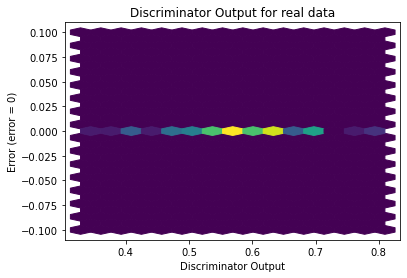

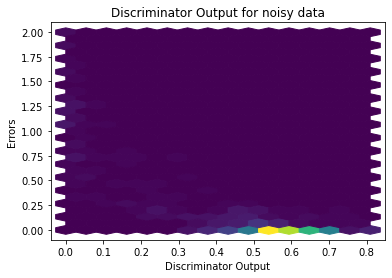

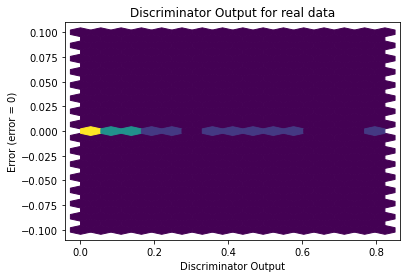

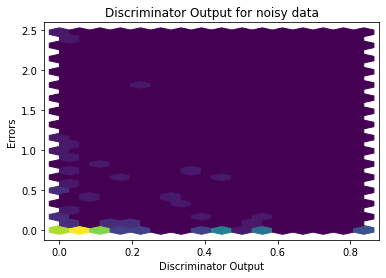

In [10]:
sanityChecks.discProbVsError(train_data,discriminator,device)
sanityChecks.discProbVsError(test_data,discriminator,device)